# <center>Reinforcement Learning for Super Mario Gameplay: Mastering the Classic Platformer through AI</center>

# Experiment Summary

This project aims to utilize reinforcement learning (RL) techniques to train an artificial intelligence agent capable of playing the iconic Super Mario game. By applying RL algorithms, the agent will learn to navigate through complex levels, avoid obstacles, collect power-ups, and complete levels as efficiently as possible. This project showcases the potential of RL in solving challenging real-time gaming tasks and highlights the capabilities of AI agents in mastering complex environments.

# Problem Statement

Can we develop an AI agent capable of autonomously playing Super Mario by learning through reinforcement learning techniques, effectively navigating the game, making intelligent decisions based on the environment's state, and optimizing gameplay performance to achieve high scores and complete levels?

# Methodology

1. **Environment Setup:** Create a simulation environment that emulates Super Mario gameplay, providing the agent with access to game state information and enabling it to interact with the environment through actions.

2. **Action Selection:** Define a set of actions that the agent can take, such as moving left or right, jumping, or using power-ups, to interact with the game environment effectively.

3. **State Representation:** Design a state representation that captures relevant information from the game environment, including the positions of enemies, obstacles, power-ups, Mario's position, health, and score.

4. **RL Algorithm Selection:** Choose a suitable RL algorithm such as Q-learning, Deep Q-Networks (DQN), or Proximal Policy Optimization (PPO) to train the agent. The algorithm should handle the high-dimensional state space and dynamic nature of the Super Mario game.

5. **Reward Design:** The reward function assumes the objective of the game is to move as far right as possible (increase the agent's x value), as fast as possible, without dying

6. **Training and Optimization:** Train the RL agent using the chosen algorithm, fine-tuning the parameters, and optimizing the model to maximize the reward accumulation and improve gameplay performance.

7. **Evaluation:** Assess the agent's performance by evaluating its ability to complete levels, achieve high scores, and demonstrate effective gameplay strategies. Compare the agent's performance to baseline benchmarks and human gameplay to gauge its success.

# Motivation

The motivation behind this project is to explore the capabilities of reinforcement learning in training an agent to play the game Super Mario Bros. Reinforcement learning allows an agent to learn optimal strategies through interaction with its environment, making it an ideal approach for training an AI agent to play complex video games like Super Mario Bros. By successfully training an AI agent to play Super Mario Bros, we can demonstrate the potential of reinforcement learning algorithms in solving challenging real-world problems and showcase the ability of AI to achieve human-level performance in complex tasks.

# Data Souce

The data source for this project is the Super Mario Bros environment provided by the gym-super-mario-bros library. This library provides a collection of Super Mario Bros levels as OpenAI Gym environments. The environments offer an interface to interact with the game, including actions, observations, and rewards. The game environment provides a simulated platform for training the reinforcement learning agent. The data consists of game states, actions, rewards, and terminal states, which are used to train the AI agent through reinforcement learning algorithms.

# Reinforcement Learning

## The Basics of Setting Up a Mario Environment

Before diving into the methodology, it is essential to understand how to set up the Super Mario environment. This involves importing the necessary libraries and configuring the environment to ensure seamless interaction with the game.

To begin, we import the following libraries:

1. `gym_super_mario_bros` - provides access to the Super Mario Bros environment.
2. `JoypadSpace` - wrapper from the `nes_py.wrappers` module that simplifies the controls for Super Mario Bros, making it easier to handle and manipulate the game.
3. `SIMPLE_MOVEMENT` - module from the `gym_super_mario_bros.actions` that returns a predefined set of actions representing a simplified control scheme for Super Mario Bros.

In [2]:
# !pip install gym_super_mario_bros==7.3.0 nes_py

In [1]:
# Import super mario bros
import gym_super_mario_bros

# Import joypad wrapper
from nes_py.wrappers import JoypadSpace

# Import simplified controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

If we print SIMPLE_MOVEMENT, we can observe that it consists of seven control configurations, which are:

- **['NOOP']:** Represents no action (no operation).
- **['right']:** Corresponds to moving right.
- **['right', 'A']:** Indicates moving right while pressing the 'A' button, which is often used for running or jumping.
- **['right', 'B']:** Represents moving right while pressing the 'B' button, which may trigger specific actions in certain situations.
- **['right', 'A', 'B']:** Refers to moving right while simultaneously pressing both the 'A' and 'B' buttons, allowing for combined actions.
- **['A']:** Represents pressing the 'A' button independently, enabling actions associated with 'A' alone.
- **['left']:** Corresponds to moving left.

These control configurations, despite being relatively simple, provide enough flexibility for an AI agent to navigate and interact with the complex Super Mario game environment. Each configuration enables the agent to perform specific actions, such as moving in different directions, running, jumping, and combining button presses for more advanced maneuvers.

In [2]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

When we compare the total action space of the original Super Mario game to the simplified movement set, we can appreciate the significant reduction in complexity:

- **Original Game Action Space:** Discrete(256)
- **Simple Movement Action Space:** Discrete(7)

In the original Super Mario game, the action space is represented as a Discrete(256) space, meaning there are 256 distinct actions available to the player. These actions encompass a wide range of possibilities, including different combinations of button presses, movements in various directions, and interactions with the game environment.

In contrast, the simplified movement set reduces the action space to just seven distinct actions. These actions are carefully chosen to cover the essential movements and actions needed to navigate the Super Mario game effectively. By focusing on the most critical actions, such as moving left or right, jumping, running, and combinations of these actions, the simplified movement set provides a more manageable and intuitive control scheme.

In [3]:
# Setup the game
env_mario = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env_mario, SIMPLE_MOVEMENT)

print(f'Original Game Action Space:   {env_mario.action_space}')
print(f'Simple Movement Action Space: {env.action_space}')

Original Game Action Space:   Discrete(256)
Simple Movement Action Space: Discrete(7)


Next, we proceed to explore the Super Mario environment by employing random movements throughout the game. 

During this exploration, we let the AI agent take random actions by sampling from the simplified control set. This enables us to observe the agent's interactions with the game environment and witness the consequences of its unpredictable movements.

In [4]:
import gym
from gym import wrappers

# Create a flag - restart or not
done = True

# Create a monitor wrapper to record the gameplay
env = wrappers.Monitor(env, './video', force=True)

# Loop through each frame in the game
for step in range(3000):
    # Start the game to begin with
    if done:
        # Start the game
        state = env.reset()
    
    # Do random actions
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)

    # Show the game on the screen
    env.render()

# Close the monitor wrapper
env.close()


C:\Users\Stellar\mambaforge\envs\nlp\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
C:\Users\Stellar\mambaforge\envs\nlp\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In this video, the AI becomes completely stuck in the second pipe, lacking the intuition required to successfully overcome it.

<center><video controls src="videos/mario_gameplay_random.mp4" width="960" height="540" /></center>

The frame size of the image in our environment is accessed through the following code blocks, resulting in a shape of (240, 256, 3). This indicates that our environment has a width of 240 pixels, a height of 256 pixels, and three color channels, representing RGB (red, green, blue).

In [6]:
state = env.reset()

In [13]:
state[0].shape

(240, 256, 3)

This table provides an overview of the information that can be obtained from the info dictionary returned by the step() method.

| Key      | Type   | Description                            |
|:---------|:------:|:--------------------------------------|
| coins    | int    | The number of collected coins           |
| flag_get | bool   | True if Mario reached a flag or ax      |
| life     | int    | The number of lives left                |
| score    | int    | The cumulative in-game score            |
| stage    | int    | The current stage                       |
| status   | str    | Mario's status                          |
| time     | int    | The time left on the clock              |
| world    | int    | The current world                       |
| x_pos    | int    | Mario's x position in the stage         |
| y_pos    | int    | Mario's y position in the stage         |


Each key corresponds to a specific piece of information related to the game state, such as the number of coins collected, Mario's position, the current stage and world, the score, and more. This information can be utilized for monitoring the progress of the AI agent, analyzing its performance, and designing appropriate reward systems or evaluation metrics.

In [23]:
env.step(1)[3]

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 43,
 'x_pos_screen': 43,
 'y_pos': 79}

## Environment Setup

To optimize the computational efficiency of our training process, we preprocess the environment using various wrappers. The sequence of wrappers applied results in our model training on a grayscale environment that is stacked with four consecutive frames. This preprocessing step reduces the dimensionality of the input data while capturing temporal information.

In [ ]:
# # Install pytorch
# !pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [10]:
# # Install stable baselines for RL stuff
# !pip install stable-baselines3[extra]

In [2]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

## Action Selection and State Representation

The following wrappers are applied in order:

- **JoypadSpace:** This wrapper simplifies the controls of the Super Mario game by providing a predefined set of actions known as SIMPLE_MOVEMENT.

- **GrayScaleObservation:** This wrapper converts the color images of the environment into grayscale, reducing the input data's dimensionality.

- **DummyVecEnv:** This wrapper converts the environment into a vectorized form, allowing for parallel execution of multiple environments.

- **VecFrameStack:** This wrapper stacks the consecutive grayscale frames to create a temporal dimension, providing the agent with a sense of motion and enabling it to capture dynamic information.

By applying these wrappers, we transform the original environment into a preprocessed form suitable for training our reinforcement learning model.

In [3]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# # 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

Eventually, the shape of our preprocessed environment should be (1, 240, 256, 4), where each dimension represents the following:

- **Dimension 1:** Represents the number of parallel environments. In this case, we have a single environment running.
- **Dimension 2:** Represents the height of the environment image, which is 240 pixels.
- **Dimension 3:** Represents the width of the environment image, which is 256 pixels.
- **Dimension 4:** Represents the number of stacked frames. We stack four consecutive frames together to capture temporal information and provide a sense of motion to the agent.

By reshaping the environment in this way, we create a 4-dimensional input that allows our reinforcement learning model to perceive the environment's visual information over time and make informed decisions based on the stacked frames.

In [6]:
state = env.reset()

In [7]:
state.shape

(1, 240, 256, 4)

The code snippet `plt.imshow(state[0])` visualizes the current state of the environment. Here's what it shows:

*The resulting image represents the current state of the environment from the agent's perspective.*

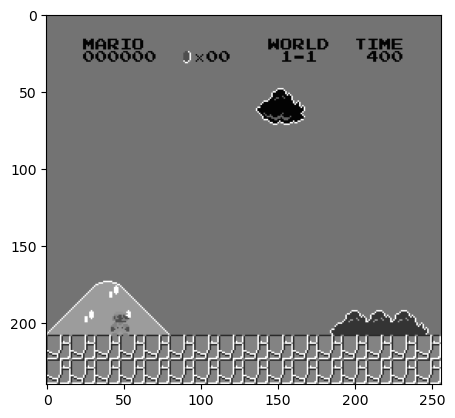

In [7]:
plt.imshow(state[0]);

To visualize the temporal progression of the game, we can display four consecutive frames stacked together. This allows us to observe how the environment changes over time.

In [16]:
state, reward, done, info = env.step([5])

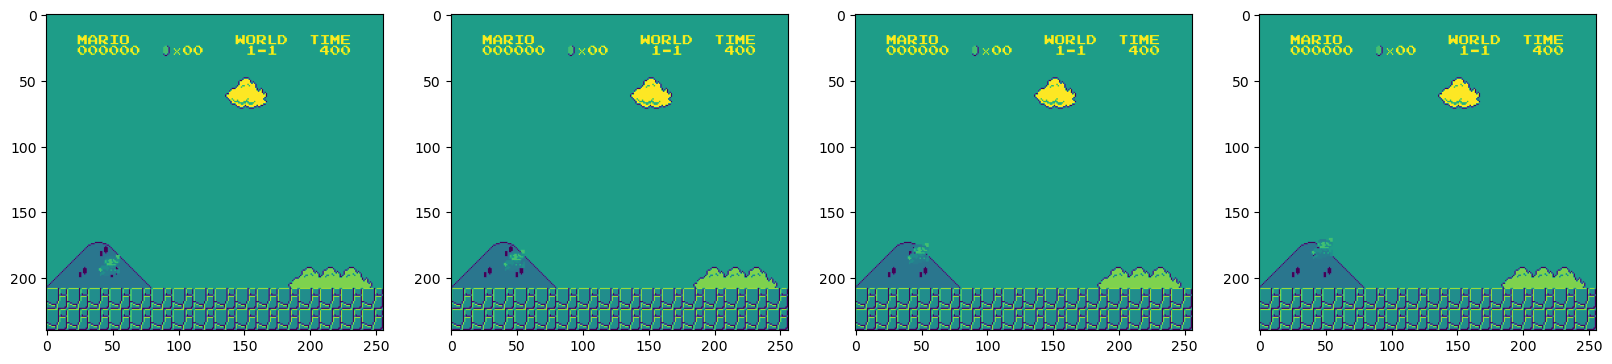

In [17]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

## Training the RL Model

In [5]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

Here, we define a custom callback class called TrainAndLoggingCallback, which inherits from the BaseCallback class in the Stable Baselines library. This callback is used to save the model at specified intervals during the training process.

In [7]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [10]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [11]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=1000000, save_path=CHECKPOINT_DIR)

### RL Algorithm Selection

Next, we choose the `Proximal Policy Optimization` (PPO) algorithm as our desired reinforcement learning (RL) algorithm. Specifically, we select the `CnnPolicy` variant of PPO.

The reason for selecting the `PPO` algorithm with `CnnPolicy` is that it is well-suited for environments with high-dimensional observations, such as images. In our case, the Super Mario environment provides visual input in the form of game frames. The CnnPolicy utilizes a convolutional neural network (CNN) architecture to process and extract relevant features from these visual observations. This allows the RL agent to effectively learn and make decisions based on the visual information provided.

In addition to selecting the PPO algorithm with CnnPolicy, we also need to set some important hyperparameters that govern the training process. Two such hyperparameters are the learning rate and the number of steps (n_steps).

**Definitions below:**

- **Learning rate:**
    - Determines the step size for updating the RL agent's policy based on observed rewards and feedback.
    - Higher learning rates can lead to faster learning but may result in instability.
    - Lower learning rates provide more stable learning but slower convergence.
    - The specific value depends on the problem characteristics and training requirements.

- **Number of steps (n_steps):**
    - Defines the number of steps taken in each policy update of the RL agent.
    - Influences the trade-off between exploration and exploitation.
    - Larger values allow more thorough exploration before policy updates, potentially leading to more informed decisions.
    - Increases computational cost of training.

In [12]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=1e-5, 
            n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


### Reward Design

Reward Function

The reward function assumes the objective of the game is to move as far right as possible (increase the agent's x value), as fast as possible, without dying. To model this game, three separate variables compose the reward:

1. **v: the difference in agent x values between states**
   - in this case, this is the instantaneous velocity for the given step
   - v = x1 - x0
     - x0 is the x position before the step
     - x1 is the x position after the step
   - moving right ⇔ v > 0
   - moving left ⇔ v < 0
   - not moving ⇔ v = 0
--------------------------------
2. **c: the difference in the game clock between frames**
   - the penalty prevents the agent from standing still
   - c = c0 - c1
     - c0 is the clock reading before the step
     - c1 is the clock reading after the step
   - no clock tick ⇔ c = 0
   - clock tick ⇔ c < 0
--------------------------------
3. **d: a death penalty that penalizes the agent for dying in a state**
   - this penalty encourages the agent to avoid death
   - alive ⇔ d = 0
   - dead ⇔ d = -15
   
**r = v + c + d**

*The reward is clipped into the range (-15, 15).*

More Information Here: https://pypi.org/project/gym-super-mario-bros/

### Model Training

Next, we train the model using our chosen RL algorithm and specify the number of timesteps for training. In this case, we set the number of timesteps to 10 million. 

Training the model over a large number of timesteps allows it to learn and improve its performance by interacting with the environment and receiving feedback. The specific choice of 10 million timesteps can be adjusted based on the complexity of the problem and the desired level of training.

In [ ]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=10000000, callback=callback)

Logging to ./logs/PPO_1


C:\Users\Stellar\mambaforge\envs\nlp\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 64  |
|    iterations      | 1   |
|    time_elapsed    | 7   |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 2            |
|    time_elapsed         | 15           |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 0.0061207125 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | -0.00182     |
|    learning_rate        | 1e-05        |
|    loss                 | 63.3         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00684     |
|    value_loss           | 158          |
------------------------------------------
-----------------------

------------------------------------------
| time/                   |              |
|    fps                  | 69           |
|    iterations           | 13           |
|    time_elapsed         | 96           |
|    total_timesteps      | 6656         |
| train/                  |              |
|    approx_kl            | 0.0014301323 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.87        |
|    explained_variance   | -0.00151     |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0534       |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00175     |
|    value_loss           | 0.167        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 69           |
|    iterations           | 14           |
|    time_elapsed         | 103          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 69          |
|    iterations           | 24          |
|    time_elapsed         | 177         |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.001326358 |
|    clip_fraction        | 0.000977    |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.79       |
|    explained_variance   | -0.025      |
|    learning_rate        | 1e-05       |
|    loss                 | 27.5        |
|    n_updates            | 230         |
|    policy_gradient_loss | 2.13e-05    |
|    value_loss           | 75.9        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 69          |
|    iterations           | 25          |
|    time_elapsed         | 184         |
|    total_timesteps      | 12800 

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 35           |
|    time_elapsed         | 260          |
|    total_timesteps      | 17920        |
| train/                  |              |
|    approx_kl            | 0.0063365167 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.79        |
|    explained_variance   | -0.023       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0944       |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00232     |
|    value_loss           | 0.528        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 36          |
|    time_elapsed         | 267         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 46           |
|    time_elapsed         | 343          |
|    total_timesteps      | 23552        |
| train/                  |              |
|    approx_kl            | 0.0045185885 |
|    clip_fraction        | 0.00566      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.22        |
|    explained_variance   | 0.593        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.8         |
|    n_updates            | 450          |
|    policy_gradient_loss | -6.58e-05    |
|    value_loss           | 72.4         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 47          |
|    time_elapsed         | 350         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 57           |
|    time_elapsed         | 427          |
|    total_timesteps      | 29184        |
| train/                  |              |
|    approx_kl            | 0.0044519356 |
|    clip_fraction        | 0.0111       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.36        |
|    explained_variance   | -0.0531      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0571       |
|    n_updates            | 560          |
|    policy_gradient_loss | -0.00319     |
|    value_loss           | 0.279        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 58          |
|    time_elapsed         | 435         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 68           |
|    time_elapsed         | 512          |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 0.0015439284 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.412       |
|    explained_variance   | 0.401        |
|    learning_rate        | 1e-05        |
|    loss                 | 171          |
|    n_updates            | 670          |
|    policy_gradient_loss | -5.88e-05    |
|    value_loss           | 537          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 69          |
|    time_elapsed         | 520         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 79           |
|    time_elapsed         | 598          |
|    total_timesteps      | 40448        |
| train/                  |              |
|    approx_kl            | 0.0021636633 |
|    clip_fraction        | 0.0154       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.374       |
|    explained_variance   | 0.598        |
|    learning_rate        | 1e-05        |
|    loss                 | 82.8         |
|    n_updates            | 780          |
|    policy_gradient_loss | -0.00152     |
|    value_loss           | 237          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 80           |
|    time_elapsed         | 606          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 90          |
|    time_elapsed         | 684         |
|    total_timesteps      | 46080       |
| train/                  |             |
|    approx_kl            | 0.003088264 |
|    clip_fraction        | 0.0789      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.737      |
|    explained_variance   | 0.0604      |
|    learning_rate        | 1e-05       |
|    loss                 | 6.72        |
|    n_updates            | 890         |
|    policy_gradient_loss | 0.000265    |
|    value_loss           | 45.3        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 91          |
|    time_elapsed         | 692         |
|    total_timesteps      | 46592 

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 101         |
|    time_elapsed         | 769         |
|    total_timesteps      | 51712       |
| train/                  |             |
|    approx_kl            | 0.008463006 |
|    clip_fraction        | 0.0809      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.57       |
|    explained_variance   | 0.718       |
|    learning_rate        | 1e-05       |
|    loss                 | 65.4        |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.00462    |
|    value_loss           | 223         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 67         |
|    iterations           | 102        |
|    time_elapsed         | 777        |
|    total_timesteps      | 52224      

-------------------------------------------
| time/                   |               |
|    fps                  | 66            |
|    iterations           | 112           |
|    time_elapsed         | 857           |
|    total_timesteps      | 57344         |
| train/                  |               |
|    approx_kl            | 0.00050978235 |
|    clip_fraction        | 0.00723       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.202        |
|    explained_variance   | 0.795         |
|    learning_rate        | 1e-05         |
|    loss                 | 43.1          |
|    n_updates            | 1110          |
|    policy_gradient_loss | -0.00112      |
|    value_loss           | 189           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 66          |
|    iterations           | 113         |
|    time_elapsed         | 864         

------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 123          |
|    time_elapsed         | 940          |
|    total_timesteps      | 62976        |
| train/                  |              |
|    approx_kl            | 0.0010671734 |
|    clip_fraction        | 0.00996      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.153       |
|    explained_variance   | 0.494        |
|    learning_rate        | 1e-05        |
|    loss                 | 122          |
|    n_updates            | 1220         |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 231          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 124          |
|    time_elapsed         | 947          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 134          |
|    time_elapsed         | 1024         |
|    total_timesteps      | 68608        |
| train/                  |              |
|    approx_kl            | 0.0016729856 |
|    clip_fraction        | 0.0084       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0883      |
|    explained_variance   | 0.406        |
|    learning_rate        | 1e-05        |
|    loss                 | 186          |
|    n_updates            | 1330         |
|    policy_gradient_loss | 0.000882     |
|    value_loss           | 860          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 135          |
|    time_elapsed         | 1031         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 145          |
|    time_elapsed         | 1108         |
|    total_timesteps      | 74240        |
| train/                  |              |
|    approx_kl            | 0.0006208586 |
|    clip_fraction        | 0.0084       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.164       |
|    explained_variance   | 0.454        |
|    learning_rate        | 1e-05        |
|    loss                 | 127          |
|    n_updates            | 1440         |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 739          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 146          |
|    time_elapsed         | 1116         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 66          |
|    iterations           | 156         |
|    time_elapsed         | 1194        |
|    total_timesteps      | 79872       |
| train/                  |             |
|    approx_kl            | 0.001481765 |
|    clip_fraction        | 0.0121      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.163      |
|    explained_variance   | 0.892       |
|    learning_rate        | 1e-05       |
|    loss                 | 42.7        |
|    n_updates            | 1550        |
|    policy_gradient_loss | -0.00325    |
|    value_loss           | 150         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 157          |
|    time_elapsed         | 1201         |
|    total_timesteps      | 8

------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 167          |
|    time_elapsed         | 1280         |
|    total_timesteps      | 85504        |
| train/                  |              |
|    approx_kl            | 0.0016190645 |
|    clip_fraction        | 0.00957      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0778      |
|    explained_variance   | 0.394        |
|    learning_rate        | 1e-05        |
|    loss                 | 588          |
|    n_updates            | 1660         |
|    policy_gradient_loss | -0.0028      |
|    value_loss           | 579          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 168          |
|    time_elapsed         | 1288         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 66            |
|    iterations           | 178           |
|    time_elapsed         | 1367          |
|    total_timesteps      | 91136         |
| train/                  |               |
|    approx_kl            | 0.00036072417 |
|    clip_fraction        | 0.00352       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0532       |
|    explained_variance   | 0.545         |
|    learning_rate        | 1e-05         |
|    loss                 | 90.1          |
|    n_updates            | 1770          |
|    policy_gradient_loss | -9.91e-05     |
|    value_loss           | 542           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 179          |
|    time_elapsed         | 1375    

------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 189          |
|    time_elapsed         | 1453         |
|    total_timesteps      | 96768        |
| train/                  |              |
|    approx_kl            | 0.0006555361 |
|    clip_fraction        | 0.0107       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.143       |
|    explained_variance   | 0.636        |
|    learning_rate        | 1e-05        |
|    loss                 | 69           |
|    n_updates            | 1880         |
|    policy_gradient_loss | -0.00181     |
|    value_loss           | 235          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 66            |
|    iterations           | 190           |
|    time_elapsed         | 1461          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 66            |
|    iterations           | 200           |
|    time_elapsed         | 1537          |
|    total_timesteps      | 102400        |
| train/                  |               |
|    approx_kl            | 0.00089100807 |
|    clip_fraction        | 0.0236        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.23         |
|    explained_variance   | 0.57          |
|    learning_rate        | 1e-05         |
|    loss                 | 171           |
|    n_updates            | 1990          |
|    policy_gradient_loss | -0.00031      |
|    value_loss           | 494           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 66          |
|    iterations           | 201         |
|    time_elapsed         | 1545        

------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 211          |
|    time_elapsed         | 1621         |
|    total_timesteps      | 108032       |
| train/                  |              |
|    approx_kl            | 0.0064238105 |
|    clip_fraction        | 0.0682       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.43        |
|    explained_variance   | 0.948        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.6         |
|    n_updates            | 2100         |
|    policy_gradient_loss | -0.00135     |
|    value_loss           | 76.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 212          |
|    time_elapsed         | 1629         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 66          |
|    iterations           | 222         |
|    time_elapsed         | 1704        |
|    total_timesteps      | 113664      |
| train/                  |             |
|    approx_kl            | 0.018931236 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.774      |
|    explained_variance   | 0.561       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.49        |
|    n_updates            | 2210        |
|    policy_gradient_loss | -0.00305    |
|    value_loss           | 2.41        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 66          |
|    iterations           | 223         |
|    time_elapsed         | 1712        |
|    total_timesteps      | 114176

-------------------------------------------
| time/                   |               |
|    fps                  | 66            |
|    iterations           | 233           |
|    time_elapsed         | 1787          |
|    total_timesteps      | 119296        |
| train/                  |               |
|    approx_kl            | 0.00045756344 |
|    clip_fraction        | 0.00391       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.3          |
|    explained_variance   | 0.93          |
|    learning_rate        | 1e-05         |
|    loss                 | 36.6          |
|    n_updates            | 2320          |
|    policy_gradient_loss | -0.000901     |
|    value_loss           | 105           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 66            |
|    iterations           | 234           |
|    time_elapsed         | 1795

-------------------------------------------
| time/                   |               |
|    fps                  | 66            |
|    iterations           | 244           |
|    time_elapsed         | 1870          |
|    total_timesteps      | 124928        |
| train/                  |               |
|    approx_kl            | 0.00013476529 |
|    clip_fraction        | 0.00195       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0795       |
|    explained_variance   | 0.756         |
|    learning_rate        | 1e-05         |
|    loss                 | 125           |
|    n_updates            | 2430          |
|    policy_gradient_loss | -0.00123      |
|    value_loss           | 299           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 245          |
|    time_elapsed         | 1877    

------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 255          |
|    time_elapsed         | 1952         |
|    total_timesteps      | 130560       |
| train/                  |              |
|    approx_kl            | 0.0059334263 |
|    clip_fraction        | 0.0242       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.189       |
|    explained_variance   | 0.725        |
|    learning_rate        | 1e-05        |
|    loss                 | 428          |
|    n_updates            | 2540         |
|    policy_gradient_loss | -0.00249     |
|    value_loss           | 682          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 256          |
|    time_elapsed         | 1959         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 266          |
|    time_elapsed         | 2035         |
|    total_timesteps      | 136192       |
| train/                  |              |
|    approx_kl            | 0.0015343586 |
|    clip_fraction        | 0.0209       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.245       |
|    explained_variance   | 0.784        |
|    learning_rate        | 1e-05        |
|    loss                 | 64.5         |
|    n_updates            | 2650         |
|    policy_gradient_loss | -0.00218     |
|    value_loss           | 252          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 66           |
|    iterations           | 267          |
|    time_elapsed         | 2042         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 277          |
|    time_elapsed         | 2116         |
|    total_timesteps      | 141824       |
| train/                  |              |
|    approx_kl            | 0.0010609075 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.192       |
|    explained_variance   | 0.695        |
|    learning_rate        | 1e-05        |
|    loss                 | 68.1         |
|    n_updates            | 2760         |
|    policy_gradient_loss | -1.66e-05    |
|    value_loss           | 400          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 67            |
|    iterations           | 278           |
|    time_elapsed         | 2123          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 67            |
|    iterations           | 288           |
|    time_elapsed         | 2198          |
|    total_timesteps      | 147456        |
| train/                  |               |
|    approx_kl            | 0.00081368524 |
|    clip_fraction        | 0.0109        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0943       |
|    explained_variance   | 0.821         |
|    learning_rate        | 1e-05         |
|    loss                 | 48.1          |
|    n_updates            | 2870          |
|    policy_gradient_loss | -0.00076      |
|    value_loss           | 162           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 289         |
|    time_elapsed         | 2205        

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 299          |
|    time_elapsed         | 2280         |
|    total_timesteps      | 153088       |
| train/                  |              |
|    approx_kl            | 0.0033897047 |
|    clip_fraction        | 0.0145       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0836      |
|    explained_variance   | 0.578        |
|    learning_rate        | 1e-05        |
|    loss                 | 102          |
|    n_updates            | 2980         |
|    policy_gradient_loss | -0.00155     |
|    value_loss           | 561          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 300          |
|    time_elapsed         | 2287         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 310          |
|    time_elapsed         | 2362         |
|    total_timesteps      | 158720       |
| train/                  |              |
|    approx_kl            | 0.0073950393 |
|    clip_fraction        | 0.0498       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.336       |
|    explained_variance   | 0.843        |
|    learning_rate        | 1e-05        |
|    loss                 | 90.8         |
|    n_updates            | 3090         |
|    policy_gradient_loss | -0.00378     |
|    value_loss           | 261          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 311         |
|    time_elapsed         | 2369        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 321          |
|    time_elapsed         | 2443         |
|    total_timesteps      | 164352       |
| train/                  |              |
|    approx_kl            | 0.0134066995 |
|    clip_fraction        | 0.0219       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.222       |
|    explained_variance   | 0.66         |
|    learning_rate        | 1e-05        |
|    loss                 | 129          |
|    n_updates            | 3200         |
|    policy_gradient_loss | -0.00139     |
|    value_loss           | 453          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 322          |
|    time_elapsed         | 2451         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 332          |
|    time_elapsed         | 2525         |
|    total_timesteps      | 169984       |
| train/                  |              |
|    approx_kl            | 0.0031338746 |
|    clip_fraction        | 0.0254       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.242       |
|    explained_variance   | 0.947        |
|    learning_rate        | 1e-05        |
|    loss                 | 44.7         |
|    n_updates            | 3310         |
|    policy_gradient_loss | -0.00298     |
|    value_loss           | 145          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 333         |
|    time_elapsed         | 2533        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 343          |
|    time_elapsed         | 2607         |
|    total_timesteps      | 175616       |
| train/                  |              |
|    approx_kl            | 0.0020122472 |
|    clip_fraction        | 0.0191       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.277       |
|    explained_variance   | 0.5          |
|    learning_rate        | 1e-05        |
|    loss                 | 57.9         |
|    n_updates            | 3420         |
|    policy_gradient_loss | -0.000846    |
|    value_loss           | 189          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 344          |
|    time_elapsed         | 2614         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 354          |
|    time_elapsed         | 2689         |
|    total_timesteps      | 181248       |
| train/                  |              |
|    approx_kl            | 0.0043709464 |
|    clip_fraction        | 0.059        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.213       |
|    explained_variance   | 0.917        |
|    learning_rate        | 1e-05        |
|    loss                 | 10.2         |
|    n_updates            | 3530         |
|    policy_gradient_loss | 0.00101      |
|    value_loss           | 63.5         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 355         |
|    time_elapsed         | 2696        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 365          |
|    time_elapsed         | 2771         |
|    total_timesteps      | 186880       |
| train/                  |              |
|    approx_kl            | 0.0014466377 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.271       |
|    explained_variance   | 0.635        |
|    learning_rate        | 1e-05        |
|    loss                 | 62.8         |
|    n_updates            | 3640         |
|    policy_gradient_loss | -0.00088     |
|    value_loss           | 203          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 366          |
|    time_elapsed         | 2778         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 376         |
|    time_elapsed         | 2853        |
|    total_timesteps      | 192512      |
| train/                  |             |
|    approx_kl            | 0.016581394 |
|    clip_fraction        | 0.077       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.373      |
|    explained_variance   | 0.505       |
|    learning_rate        | 1e-05       |
|    loss                 | 522         |
|    n_updates            | 3750        |
|    policy_gradient_loss | -0.00135    |
|    value_loss           | 1.01e+03    |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 377          |
|    time_elapsed         | 2861         |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 387         |
|    time_elapsed         | 2935        |
|    total_timesteps      | 198144      |
| train/                  |             |
|    approx_kl            | 0.007817831 |
|    clip_fraction        | 0.0736      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.642      |
|    explained_variance   | 0.936       |
|    learning_rate        | 1e-05       |
|    loss                 | 25.6        |
|    n_updates            | 3860        |
|    policy_gradient_loss | -0.0044     |
|    value_loss           | 108         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 388          |
|    time_elapsed         | 2943         |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 398         |
|    time_elapsed         | 3017        |
|    total_timesteps      | 203776      |
| train/                  |             |
|    approx_kl            | 0.006296606 |
|    clip_fraction        | 0.0473      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.447      |
|    explained_variance   | 0.809       |
|    learning_rate        | 1e-05       |
|    loss                 | 39.2        |
|    n_updates            | 3970        |
|    policy_gradient_loss | -0.00302    |
|    value_loss           | 133         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 399         |
|    time_elapsed         | 3024        |
|    total_timesteps      | 204288

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 409         |
|    time_elapsed         | 3098        |
|    total_timesteps      | 209408      |
| train/                  |             |
|    approx_kl            | 0.008725542 |
|    clip_fraction        | 0.0609      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.656      |
|    explained_variance   | 0.777       |
|    learning_rate        | 1e-05       |
|    loss                 | 72.3        |
|    n_updates            | 4080        |
|    policy_gradient_loss | 0.000586    |
|    value_loss           | 198         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 410         |
|    time_elapsed         | 3106        |
|    total_timesteps      | 209920

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 420         |
|    time_elapsed         | 3180        |
|    total_timesteps      | 215040      |
| train/                  |             |
|    approx_kl            | 0.014325755 |
|    clip_fraction        | 0.0885      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | 0.862       |
|    learning_rate        | 1e-05       |
|    loss                 | 14          |
|    n_updates            | 4190        |
|    policy_gradient_loss | -0.00157    |
|    value_loss           | 81.9        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 421          |
|    time_elapsed         | 3187         |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 431          |
|    time_elapsed         | 3262         |
|    total_timesteps      | 220672       |
| train/                  |              |
|    approx_kl            | 0.0034933188 |
|    clip_fraction        | 0.0242       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.138       |
|    explained_variance   | 0.929        |
|    learning_rate        | 1e-05        |
|    loss                 | 13.7         |
|    n_updates            | 4300         |
|    policy_gradient_loss | -0.000627    |
|    value_loss           | 59.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 432          |
|    time_elapsed         | 3269         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 442          |
|    time_elapsed         | 3344         |
|    total_timesteps      | 226304       |
| train/                  |              |
|    approx_kl            | 0.0019620112 |
|    clip_fraction        | 0.0197       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.136       |
|    explained_variance   | 0.702        |
|    learning_rate        | 1e-05        |
|    loss                 | 292          |
|    n_updates            | 4410         |
|    policy_gradient_loss | -0.00279     |
|    value_loss           | 621          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 443         |
|    time_elapsed         | 3351        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 453          |
|    time_elapsed         | 3426         |
|    total_timesteps      | 231936       |
| train/                  |              |
|    approx_kl            | 0.0024730132 |
|    clip_fraction        | 0.016        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.151       |
|    explained_variance   | 0.926        |
|    learning_rate        | 1e-05        |
|    loss                 | 33.1         |
|    n_updates            | 4520         |
|    policy_gradient_loss | -0.00256     |
|    value_loss           | 101          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 454         |
|    time_elapsed         | 3433        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 464          |
|    time_elapsed         | 3508         |
|    total_timesteps      | 237568       |
| train/                  |              |
|    approx_kl            | 0.0042588357 |
|    clip_fraction        | 0.0336       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.386       |
|    explained_variance   | 0.567        |
|    learning_rate        | 1e-05        |
|    loss                 | 87.8         |
|    n_updates            | 4630         |
|    policy_gradient_loss | -0.00651     |
|    value_loss           | 162          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 465         |
|    time_elapsed         | 3516        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 475          |
|    time_elapsed         | 3590         |
|    total_timesteps      | 243200       |
| train/                  |              |
|    approx_kl            | 0.0010975223 |
|    clip_fraction        | 0.0164       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.286       |
|    explained_variance   | 0.928        |
|    learning_rate        | 1e-05        |
|    loss                 | 77.8         |
|    n_updates            | 4740         |
|    policy_gradient_loss | -7.26e-05    |
|    value_loss           | 203          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 476         |
|    time_elapsed         | 3597        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 486          |
|    time_elapsed         | 3672         |
|    total_timesteps      | 248832       |
| train/                  |              |
|    approx_kl            | 0.0056610378 |
|    clip_fraction        | 0.0451       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.746       |
|    explained_variance   | -0.147       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.314        |
|    n_updates            | 4850         |
|    policy_gradient_loss | -0.000423    |
|    value_loss           | 0.914        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 487         |
|    time_elapsed         | 3680        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 497         |
|    time_elapsed         | 3754        |
|    total_timesteps      | 254464      |
| train/                  |             |
|    approx_kl            | 0.011320492 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.494      |
|    explained_variance   | 0.797       |
|    learning_rate        | 1e-05       |
|    loss                 | 15.3        |
|    n_updates            | 4960        |
|    policy_gradient_loss | -0.0132     |
|    value_loss           | 87.1        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 498          |
|    time_elapsed         | 3762         |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 508          |
|    time_elapsed         | 3836         |
|    total_timesteps      | 260096       |
| train/                  |              |
|    approx_kl            | 0.0014432892 |
|    clip_fraction        | 0.0199       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.148       |
|    explained_variance   | 0.665        |
|    learning_rate        | 1e-05        |
|    loss                 | 199          |
|    n_updates            | 5070         |
|    policy_gradient_loss | -0.00274     |
|    value_loss           | 628          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 509         |
|    time_elapsed         | 3844        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 519          |
|    time_elapsed         | 3918         |
|    total_timesteps      | 265728       |
| train/                  |              |
|    approx_kl            | 0.0042929705 |
|    clip_fraction        | 0.0213       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.192       |
|    explained_variance   | 0.503        |
|    learning_rate        | 1e-05        |
|    loss                 | 87.1         |
|    n_updates            | 5180         |
|    policy_gradient_loss | -0.0037      |
|    value_loss           | 631          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 520          |
|    time_elapsed         | 3925         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 530          |
|    time_elapsed         | 3999         |
|    total_timesteps      | 271360       |
| train/                  |              |
|    approx_kl            | 0.0023154644 |
|    clip_fraction        | 0.024        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.321       |
|    explained_variance   | 0.786        |
|    learning_rate        | 1e-05        |
|    loss                 | 27.7         |
|    n_updates            | 5290         |
|    policy_gradient_loss | 0.000254     |
|    value_loss           | 62.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 531          |
|    time_elapsed         | 4006         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 541         |
|    time_elapsed         | 4080        |
|    total_timesteps      | 276992      |
| train/                  |             |
|    approx_kl            | 0.004041624 |
|    clip_fraction        | 0.0166      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0719     |
|    explained_variance   | 0.329       |
|    learning_rate        | 1e-05       |
|    loss                 | 85.9        |
|    n_updates            | 5400        |
|    policy_gradient_loss | 0.0017      |
|    value_loss           | 723         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 542          |
|    time_elapsed         | 4088         |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 552          |
|    time_elapsed         | 4162         |
|    total_timesteps      | 282624       |
| train/                  |              |
|    approx_kl            | 0.0039190985 |
|    clip_fraction        | 0.0555       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.272       |
|    explained_variance   | 0.749        |
|    learning_rate        | 1e-05        |
|    loss                 | 30.2         |
|    n_updates            | 5510         |
|    policy_gradient_loss | -0.00203     |
|    value_loss           | 160          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 553          |
|    time_elapsed         | 4169         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 563         |
|    time_elapsed         | 4243        |
|    total_timesteps      | 288256      |
| train/                  |             |
|    approx_kl            | 0.008580237 |
|    clip_fraction        | 0.0879      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.498      |
|    explained_variance   | 0.91        |
|    learning_rate        | 1e-05       |
|    loss                 | 38.5        |
|    n_updates            | 5620        |
|    policy_gradient_loss | -0.00902    |
|    value_loss           | 128         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 564         |
|    time_elapsed         | 4251        |
|    total_timesteps      | 288768

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 574         |
|    time_elapsed         | 4325        |
|    total_timesteps      | 293888      |
| train/                  |             |
|    approx_kl            | 0.007926651 |
|    clip_fraction        | 0.0424      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.319      |
|    explained_variance   | 0.89        |
|    learning_rate        | 1e-05       |
|    loss                 | 16.8        |
|    n_updates            | 5730        |
|    policy_gradient_loss | -0.00442    |
|    value_loss           | 74.7        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 575         |
|    time_elapsed         | 4332        |
|    total_timesteps      | 294400

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 585         |
|    time_elapsed         | 4406        |
|    total_timesteps      | 299520      |
| train/                  |             |
|    approx_kl            | 0.001022005 |
|    clip_fraction        | 0.0152      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.156      |
|    explained_variance   | 0.884       |
|    learning_rate        | 1e-05       |
|    loss                 | 23.4        |
|    n_updates            | 5840        |
|    policy_gradient_loss | -0.0018     |
|    value_loss           | 53.6        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 586          |
|    time_elapsed         | 4413         |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 596         |
|    time_elapsed         | 4488        |
|    total_timesteps      | 305152      |
| train/                  |             |
|    approx_kl            | 0.008964235 |
|    clip_fraction        | 0.0531      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.335      |
|    explained_variance   | 0.835       |
|    learning_rate        | 1e-05       |
|    loss                 | 30.6        |
|    n_updates            | 5950        |
|    policy_gradient_loss | -0.00235    |
|    value_loss           | 97.6        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 597          |
|    time_elapsed         | 4495         |
|    total_timesteps      | 3

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 607           |
|    time_elapsed         | 4570          |
|    total_timesteps      | 310784        |
| train/                  |               |
|    approx_kl            | 0.00061600003 |
|    clip_fraction        | 0.0105        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.248        |
|    explained_variance   | 0.729         |
|    learning_rate        | 1e-05         |
|    loss                 | 136           |
|    n_updates            | 6060          |
|    policy_gradient_loss | -0.00591      |
|    value_loss           | 511           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 608          |
|    time_elapsed         | 4577    

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 618         |
|    time_elapsed         | 4652        |
|    total_timesteps      | 316416      |
| train/                  |             |
|    approx_kl            | 0.024813674 |
|    clip_fraction        | 0.0305      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.287      |
|    explained_variance   | 0.822       |
|    learning_rate        | 1e-05       |
|    loss                 | 28.4        |
|    n_updates            | 6170        |
|    policy_gradient_loss | -0.000526   |
|    value_loss           | 137         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 619         |
|    time_elapsed         | 4660        |
|    total_timesteps      | 316928

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 629          |
|    time_elapsed         | 4735         |
|    total_timesteps      | 322048       |
| train/                  |              |
|    approx_kl            | 0.0054213335 |
|    clip_fraction        | 0.0221       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.174       |
|    explained_variance   | 0.798        |
|    learning_rate        | 1e-05        |
|    loss                 | 66.6         |
|    n_updates            | 6280         |
|    policy_gradient_loss | -0.00532     |
|    value_loss           | 195          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 630         |
|    time_elapsed         | 4742        |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 640           |
|    time_elapsed         | 4816          |
|    total_timesteps      | 327680        |
| train/                  |               |
|    approx_kl            | 0.00072313147 |
|    clip_fraction        | 0.0043        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0969       |
|    explained_variance   | 0.907         |
|    learning_rate        | 1e-05         |
|    loss                 | 8.13          |
|    n_updates            | 6390          |
|    policy_gradient_loss | -0.00316      |
|    value_loss           | 66.6          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 641           |
|    time_elapsed         | 4824

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 651         |
|    time_elapsed         | 4898        |
|    total_timesteps      | 333312      |
| train/                  |             |
|    approx_kl            | 0.000965117 |
|    clip_fraction        | 0.00937     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.125      |
|    explained_variance   | 0.681       |
|    learning_rate        | 1e-05       |
|    loss                 | 44.9        |
|    n_updates            | 6500        |
|    policy_gradient_loss | -0.00201    |
|    value_loss           | 406         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 652          |
|    time_elapsed         | 4905         |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 662         |
|    time_elapsed         | 4980        |
|    total_timesteps      | 338944      |
| train/                  |             |
|    approx_kl            | 0.007657852 |
|    clip_fraction        | 0.0543      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.219      |
|    explained_variance   | 0.841       |
|    learning_rate        | 1e-05       |
|    loss                 | 31.6        |
|    n_updates            | 6610        |
|    policy_gradient_loss | -0.0107     |
|    value_loss           | 120         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 663         |
|    time_elapsed         | 4987        |
|    total_timesteps      | 339456

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 673          |
|    time_elapsed         | 5061         |
|    total_timesteps      | 344576       |
| train/                  |              |
|    approx_kl            | 0.0032690486 |
|    clip_fraction        | 0.015        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.21        |
|    explained_variance   | 0.802        |
|    learning_rate        | 1e-05        |
|    loss                 | 204          |
|    n_updates            | 6720         |
|    policy_gradient_loss | 0.00261      |
|    value_loss           | 301          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 674         |
|    time_elapsed         | 5069        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 684         |
|    time_elapsed         | 5144        |
|    total_timesteps      | 350208      |
| train/                  |             |
|    approx_kl            | 0.004191826 |
|    clip_fraction        | 0.0596      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.451      |
|    explained_variance   | 0.906       |
|    learning_rate        | 1e-05       |
|    loss                 | 38.4        |
|    n_updates            | 6830        |
|    policy_gradient_loss | 0.000193    |
|    value_loss           | 186         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 685         |
|    time_elapsed         | 5151        |
|    total_timesteps      | 350720

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 695         |
|    time_elapsed         | 5226        |
|    total_timesteps      | 355840      |
| train/                  |             |
|    approx_kl            | 0.010079545 |
|    clip_fraction        | 0.0623      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.296      |
|    explained_variance   | -0.217      |
|    learning_rate        | 1e-05       |
|    loss                 | 40.6        |
|    n_updates            | 6940        |
|    policy_gradient_loss | 0.00807     |
|    value_loss           | 146         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 696          |
|    time_elapsed         | 5234         |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 706          |
|    time_elapsed         | 5309         |
|    total_timesteps      | 361472       |
| train/                  |              |
|    approx_kl            | 0.0037504206 |
|    clip_fraction        | 0.0234       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.273       |
|    explained_variance   | 0.872        |
|    learning_rate        | 1e-05        |
|    loss                 | 43.8         |
|    n_updates            | 7050         |
|    policy_gradient_loss | 0.0013       |
|    value_loss           | 181          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 707         |
|    time_elapsed         | 5317        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 717         |
|    time_elapsed         | 5392        |
|    total_timesteps      | 367104      |
| train/                  |             |
|    approx_kl            | 0.002134333 |
|    clip_fraction        | 0.0127      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0722     |
|    explained_variance   | 0.712       |
|    learning_rate        | 1e-05       |
|    loss                 | 33.4        |
|    n_updates            | 7160        |
|    policy_gradient_loss | -2.42e-05   |
|    value_loss           | 118         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 718           |
|    time_elapsed         | 5400          |
|    total_timesteps    

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 728         |
|    time_elapsed         | 5475        |
|    total_timesteps      | 372736      |
| train/                  |             |
|    approx_kl            | 0.014051768 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.489      |
|    explained_variance   | 0.601       |
|    learning_rate        | 1e-05       |
|    loss                 | 195         |
|    n_updates            | 7270        |
|    policy_gradient_loss | 0.0113      |
|    value_loss           | 308         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 729         |
|    time_elapsed         | 5483        |
|    total_timesteps      | 373248

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 739         |
|    time_elapsed         | 5558        |
|    total_timesteps      | 378368      |
| train/                  |             |
|    approx_kl            | 0.027039548 |
|    clip_fraction        | 0.0842      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.337      |
|    explained_variance   | 0.472       |
|    learning_rate        | 1e-05       |
|    loss                 | 131         |
|    n_updates            | 7380        |
|    policy_gradient_loss | 0.00448     |
|    value_loss           | 588         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 740         |
|    time_elapsed         | 5566        |
|    total_timesteps      | 378880

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 750          |
|    time_elapsed         | 5641         |
|    total_timesteps      | 384000       |
| train/                  |              |
|    approx_kl            | 0.0069291964 |
|    clip_fraction        | 0.0131       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.115       |
|    explained_variance   | 0.181        |
|    learning_rate        | 1e-05        |
|    loss                 | 278          |
|    n_updates            | 7490         |
|    policy_gradient_loss | -0.00521     |
|    value_loss           | 931          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 751          |
|    time_elapsed         | 5648         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 761         |
|    time_elapsed         | 5722        |
|    total_timesteps      | 389632      |
| train/                  |             |
|    approx_kl            | 0.011364577 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.472      |
|    explained_variance   | 0.731       |
|    learning_rate        | 1e-05       |
|    loss                 | 16.1        |
|    n_updates            | 7600        |
|    policy_gradient_loss | -0.00304    |
|    value_loss           | 254         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 762          |
|    time_elapsed         | 5729         |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 772         |
|    time_elapsed         | 5805        |
|    total_timesteps      | 395264      |
| train/                  |             |
|    approx_kl            | 0.005355385 |
|    clip_fraction        | 0.0111      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.202      |
|    explained_variance   | 0.82        |
|    learning_rate        | 1e-05       |
|    loss                 | 43.9        |
|    n_updates            | 7710        |
|    policy_gradient_loss | -0.00246    |
|    value_loss           | 148         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 773          |
|    time_elapsed         | 5812         |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 783          |
|    time_elapsed         | 5887         |
|    total_timesteps      | 400896       |
| train/                  |              |
|    approx_kl            | 0.0071442537 |
|    clip_fraction        | 0.058        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.543       |
|    explained_variance   | 0.711        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.4         |
|    n_updates            | 7820         |
|    policy_gradient_loss | -0.00643     |
|    value_loss           | 58.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 784          |
|    time_elapsed         | 5894         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 794          |
|    time_elapsed         | 5969         |
|    total_timesteps      | 406528       |
| train/                  |              |
|    approx_kl            | 0.0032394724 |
|    clip_fraction        | 0.0754       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.593       |
|    explained_variance   | 0.356        |
|    learning_rate        | 1e-05        |
|    loss                 | 3.58         |
|    n_updates            | 7930         |
|    policy_gradient_loss | -0.0011      |
|    value_loss           | 9.33         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 795         |
|    time_elapsed         | 5976        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 805          |
|    time_elapsed         | 6051         |
|    total_timesteps      | 412160       |
| train/                  |              |
|    approx_kl            | 0.0038660595 |
|    clip_fraction        | 0.0449       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.263       |
|    explained_variance   | 0.892        |
|    learning_rate        | 1e-05        |
|    loss                 | 105          |
|    n_updates            | 8040         |
|    policy_gradient_loss | -0.00557     |
|    value_loss           | 347          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 806         |
|    time_elapsed         | 6059        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 816          |
|    time_elapsed         | 6134         |
|    total_timesteps      | 417792       |
| train/                  |              |
|    approx_kl            | 0.0029925024 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.17        |
|    explained_variance   | 0.904        |
|    learning_rate        | 1e-05        |
|    loss                 | 191          |
|    n_updates            | 8150         |
|    policy_gradient_loss | -0.000314    |
|    value_loss           | 114          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 817         |
|    time_elapsed         | 6141        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 827          |
|    time_elapsed         | 6216         |
|    total_timesteps      | 423424       |
| train/                  |              |
|    approx_kl            | 0.0070428364 |
|    clip_fraction        | 0.0539       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.349       |
|    explained_variance   | 0.94         |
|    learning_rate        | 1e-05        |
|    loss                 | 47.6         |
|    n_updates            | 8260         |
|    policy_gradient_loss | -0.00502     |
|    value_loss           | 164          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 828         |
|    time_elapsed         | 6223        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 838         |
|    time_elapsed         | 6298        |
|    total_timesteps      | 429056      |
| train/                  |             |
|    approx_kl            | 0.002105666 |
|    clip_fraction        | 0.00801     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0569     |
|    explained_variance   | 0.796       |
|    learning_rate        | 1e-05       |
|    loss                 | 48.3        |
|    n_updates            | 8370        |
|    policy_gradient_loss | 0.000976    |
|    value_loss           | 377         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 839         |
|    time_elapsed         | 6306        |
|    total_timesteps      | 429568

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 849         |
|    time_elapsed         | 6381        |
|    total_timesteps      | 434688      |
| train/                  |             |
|    approx_kl            | 0.011092035 |
|    clip_fraction        | 0.0375      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.498      |
|    explained_variance   | 0.854       |
|    learning_rate        | 1e-05       |
|    loss                 | 140         |
|    n_updates            | 8480        |
|    policy_gradient_loss | -0.00672    |
|    value_loss           | 460         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 850          |
|    time_elapsed         | 6388         |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 860         |
|    time_elapsed         | 6464        |
|    total_timesteps      | 440320      |
| train/                  |             |
|    approx_kl            | 0.009345749 |
|    clip_fraction        | 0.0281      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.142      |
|    explained_variance   | 0.754       |
|    learning_rate        | 1e-05       |
|    loss                 | 63.2        |
|    n_updates            | 8590        |
|    policy_gradient_loss | -0.00639    |
|    value_loss           | 171         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 861          |
|    time_elapsed         | 6471         |
|    total_timesteps      | 4

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 871        |
|    time_elapsed         | 6547       |
|    total_timesteps      | 445952     |
| train/                  |            |
|    approx_kl            | 0.01124499 |
|    clip_fraction        | 0.0678     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.346     |
|    explained_variance   | 0.902      |
|    learning_rate        | 1e-05      |
|    loss                 | 32.3       |
|    n_updates            | 8700       |
|    policy_gradient_loss | -0.00567   |
|    value_loss           | 100        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 872          |
|    time_elapsed         | 6554         |
|    total_timesteps      | 446464       |
| tr

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 882        |
|    time_elapsed         | 6629       |
|    total_timesteps      | 451584     |
| train/                  |            |
|    approx_kl            | 0.03019338 |
|    clip_fraction        | 0.17       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.867     |
|    explained_variance   | 0.694      |
|    learning_rate        | 1e-05      |
|    loss                 | 124        |
|    n_updates            | 8810       |
|    policy_gradient_loss | 0.00132    |
|    value_loss           | 604        |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 883        |
|    time_elapsed         | 6637       |
|    total_timesteps      | 452096     |
| train/        

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 893         |
|    time_elapsed         | 6711        |
|    total_timesteps      | 457216      |
| train/                  |             |
|    approx_kl            | 0.010774351 |
|    clip_fraction        | 0.0871      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | -1.79       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.417       |
|    n_updates            | 8920        |
|    policy_gradient_loss | -0.00232    |
|    value_loss           | 1.33        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 894          |
|    time_elapsed         | 6719         |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 904          |
|    time_elapsed         | 6794         |
|    total_timesteps      | 462848       |
| train/                  |              |
|    approx_kl            | 0.0014831303 |
|    clip_fraction        | 0.0082       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.749       |
|    explained_variance   | 0.187        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.35         |
|    n_updates            | 9030         |
|    policy_gradient_loss | 0.000766     |
|    value_loss           | 1.23         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 905          |
|    time_elapsed         | 6801         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 915        |
|    time_elapsed         | 6876       |
|    total_timesteps      | 468480     |
| train/                  |            |
|    approx_kl            | 0.01391311 |
|    clip_fraction        | 0.142      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.832     |
|    explained_variance   | 0.723      |
|    learning_rate        | 1e-05      |
|    loss                 | 306        |
|    n_updates            | 9140       |
|    policy_gradient_loss | 0.00441    |
|    value_loss           | 702        |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 916        |
|    time_elapsed         | 6883       |
|    total_timesteps      | 468992     |
| train/        

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 926         |
|    time_elapsed         | 6959        |
|    total_timesteps      | 474112      |
| train/                  |             |
|    approx_kl            | 0.006528072 |
|    clip_fraction        | 0.0482      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.37       |
|    explained_variance   | 0.934       |
|    learning_rate        | 1e-05       |
|    loss                 | 22          |
|    n_updates            | 9250        |
|    policy_gradient_loss | -0.0032     |
|    value_loss           | 101         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 927         |
|    time_elapsed         | 6966        |
|    total_timesteps      | 474624

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 937         |
|    time_elapsed         | 7042        |
|    total_timesteps      | 479744      |
| train/                  |             |
|    approx_kl            | 0.017161915 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.623      |
|    explained_variance   | 0.867       |
|    learning_rate        | 1e-05       |
|    loss                 | 126         |
|    n_updates            | 9360        |
|    policy_gradient_loss | 0.0117      |
|    value_loss           | 398         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 938          |
|    time_elapsed         | 7049         |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 948          |
|    time_elapsed         | 7124         |
|    total_timesteps      | 485376       |
| train/                  |              |
|    approx_kl            | 0.0037519955 |
|    clip_fraction        | 0.0186       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.239       |
|    explained_variance   | 0.548        |
|    learning_rate        | 1e-05        |
|    loss                 | 19           |
|    n_updates            | 9470         |
|    policy_gradient_loss | -0.0077      |
|    value_loss           | 162          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 949         |
|    time_elapsed         | 7132        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 959         |
|    time_elapsed         | 7207        |
|    total_timesteps      | 491008      |
| train/                  |             |
|    approx_kl            | 0.011706952 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.689      |
|    explained_variance   | 0.925       |
|    learning_rate        | 1e-05       |
|    loss                 | 33.5        |
|    n_updates            | 9580        |
|    policy_gradient_loss | -0.00917    |
|    value_loss           | 119         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 960         |
|    time_elapsed         | 7215        |
|    total_timesteps      | 491520

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 970         |
|    time_elapsed         | 7290        |
|    total_timesteps      | 496640      |
| train/                  |             |
|    approx_kl            | 0.003274754 |
|    clip_fraction        | 0.0186      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.176      |
|    explained_variance   | 0.816       |
|    learning_rate        | 1e-05       |
|    loss                 | 50.1        |
|    n_updates            | 9690        |
|    policy_gradient_loss | -0.00399    |
|    value_loss           | 183         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 971         |
|    time_elapsed         | 7298        |
|    total_timesteps      | 497152

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 981         |
|    time_elapsed         | 7374        |
|    total_timesteps      | 502272      |
| train/                  |             |
|    approx_kl            | 0.011629878 |
|    clip_fraction        | 0.0674      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.681      |
|    explained_variance   | 0.951       |
|    learning_rate        | 1e-05       |
|    loss                 | 14.7        |
|    n_updates            | 9800        |
|    policy_gradient_loss | -0.000636   |
|    value_loss           | 81.8        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 982         |
|    time_elapsed         | 7382        |
|    total_timesteps      | 502784

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 992          |
|    time_elapsed         | 7457         |
|    total_timesteps      | 507904       |
| train/                  |              |
|    approx_kl            | 0.0018655449 |
|    clip_fraction        | 0.0174       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.659       |
|    explained_variance   | 0.947        |
|    learning_rate        | 1e-05        |
|    loss                 | 56           |
|    n_updates            | 9910         |
|    policy_gradient_loss | 0.000387     |
|    value_loss           | 182          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 993         |
|    time_elapsed         | 7465        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1003         |
|    time_elapsed         | 7540         |
|    total_timesteps      | 513536       |
| train/                  |              |
|    approx_kl            | 0.0062649744 |
|    clip_fraction        | 0.0604       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.467       |
|    explained_variance   | 0.474        |
|    learning_rate        | 1e-05        |
|    loss                 | 20.5         |
|    n_updates            | 10020        |
|    policy_gradient_loss | -0.00458     |
|    value_loss           | 142          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1004         |
|    time_elapsed         | 7547         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1014         |
|    time_elapsed         | 7622         |
|    total_timesteps      | 519168       |
| train/                  |              |
|    approx_kl            | 0.0015741962 |
|    clip_fraction        | 0.0797       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.5         |
|    explained_variance   | -2.22        |
|    learning_rate        | 1e-05        |
|    loss                 | 3.54         |
|    n_updates            | 10130        |
|    policy_gradient_loss | 0.00397      |
|    value_loss           | 8.06         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1015         |
|    time_elapsed         | 7629         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1025         |
|    time_elapsed         | 7703         |
|    total_timesteps      | 524800       |
| train/                  |              |
|    approx_kl            | 0.0013126254 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0567      |
|    explained_variance   | 0.814        |
|    learning_rate        | 1e-05        |
|    loss                 | 28.1         |
|    n_updates            | 10240        |
|    policy_gradient_loss | -0.00658     |
|    value_loss           | 276          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1026        |
|    time_elapsed         | 7711        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1036         |
|    time_elapsed         | 7786         |
|    total_timesteps      | 530432       |
| train/                  |              |
|    approx_kl            | 0.0022817333 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.222       |
|    explained_variance   | 0.848        |
|    learning_rate        | 1e-05        |
|    loss                 | 31.6         |
|    n_updates            | 10350        |
|    policy_gradient_loss | 0.00107      |
|    value_loss           | 105          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1037        |
|    time_elapsed         | 7794        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1047         |
|    time_elapsed         | 7869         |
|    total_timesteps      | 536064       |
| train/                  |              |
|    approx_kl            | 0.0025854395 |
|    clip_fraction        | 0.0363       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.177       |
|    explained_variance   | 0.828        |
|    learning_rate        | 1e-05        |
|    loss                 | 41.8         |
|    n_updates            | 10460        |
|    policy_gradient_loss | -0.000911    |
|    value_loss           | 143          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1048        |
|    time_elapsed         | 7876        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1058        |
|    time_elapsed         | 7951        |
|    total_timesteps      | 541696      |
| train/                  |             |
|    approx_kl            | 0.015002059 |
|    clip_fraction        | 0.0182      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.138      |
|    explained_variance   | 0.886       |
|    learning_rate        | 1e-05       |
|    loss                 | 7.58        |
|    n_updates            | 10570       |
|    policy_gradient_loss | -0.014      |
|    value_loss           | 149         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1059        |
|    time_elapsed         | 7958        |
|    total_timesteps      | 542208

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1069         |
|    time_elapsed         | 8033         |
|    total_timesteps      | 547328       |
| train/                  |              |
|    approx_kl            | 0.0017421631 |
|    clip_fraction        | 0.0201       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.116       |
|    explained_variance   | 0.741        |
|    learning_rate        | 1e-05        |
|    loss                 | 33.1         |
|    n_updates            | 10680        |
|    policy_gradient_loss | 0.000741     |
|    value_loss           | 142          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1070         |
|    time_elapsed         | 8041         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1080         |
|    time_elapsed         | 8116         |
|    total_timesteps      | 552960       |
| train/                  |              |
|    approx_kl            | 0.0051111463 |
|    clip_fraction        | 0.0268       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.616       |
|    explained_variance   | 0.984        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.9         |
|    n_updates            | 10790        |
|    policy_gradient_loss | -0.00172     |
|    value_loss           | 56.5         |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 1081       |
|    time_elapsed         | 8123       |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1091         |
|    time_elapsed         | 8198         |
|    total_timesteps      | 558592       |
| train/                  |              |
|    approx_kl            | 0.0023441282 |
|    clip_fraction        | 0.0213       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.293       |
|    explained_variance   | 0.889        |
|    learning_rate        | 1e-05        |
|    loss                 | 39.7         |
|    n_updates            | 10900        |
|    policy_gradient_loss | -0.00232     |
|    value_loss           | 83.9         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1092        |
|    time_elapsed         | 8206        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1102         |
|    time_elapsed         | 8282         |
|    total_timesteps      | 564224       |
| train/                  |              |
|    approx_kl            | 0.0056680627 |
|    clip_fraction        | 0.0643       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.581       |
|    explained_variance   | 0.975        |
|    learning_rate        | 1e-05        |
|    loss                 | 41.5         |
|    n_updates            | 11010        |
|    policy_gradient_loss | -0.00548     |
|    value_loss           | 111          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1103         |
|    time_elapsed         | 8289         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1113        |
|    time_elapsed         | 8365        |
|    total_timesteps      | 569856      |
| train/                  |             |
|    approx_kl            | 0.007255345 |
|    clip_fraction        | 0.048       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.251      |
|    explained_variance   | 0.828       |
|    learning_rate        | 1e-05       |
|    loss                 | 189         |
|    n_updates            | 11120       |
|    policy_gradient_loss | -0.0076     |
|    value_loss           | 406         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1114         |
|    time_elapsed         | 8372         |
|    total_timesteps      | 5

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1124        |
|    time_elapsed         | 8446        |
|    total_timesteps      | 575488      |
| train/                  |             |
|    approx_kl            | 0.010407622 |
|    clip_fraction        | 0.00547     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0776     |
|    explained_variance   | 0.912       |
|    learning_rate        | 1e-05       |
|    loss                 | 22.5        |
|    n_updates            | 11230       |
|    policy_gradient_loss | -0.0037     |
|    value_loss           | 112         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1125        |
|    time_elapsed         | 8453        |
|    total_timesteps      | 576000

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1135         |
|    time_elapsed         | 8529         |
|    total_timesteps      | 581120       |
| train/                  |              |
|    approx_kl            | 0.0062043252 |
|    clip_fraction        | 0.0766       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.658       |
|    explained_variance   | 0.973        |
|    learning_rate        | 1e-05        |
|    loss                 | 49.1         |
|    n_updates            | 11340        |
|    policy_gradient_loss | -0.00564     |
|    value_loss           | 120          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1136        |
|    time_elapsed         | 8536        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1146         |
|    time_elapsed         | 8611         |
|    total_timesteps      | 586752       |
| train/                  |              |
|    approx_kl            | 0.0057454943 |
|    clip_fraction        | 0.0312       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.214       |
|    explained_variance   | 0.867        |
|    learning_rate        | 1e-05        |
|    loss                 | 87.4         |
|    n_updates            | 11450        |
|    policy_gradient_loss | -0.00228     |
|    value_loss           | 253          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1147         |
|    time_elapsed         | 8619         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1157         |
|    time_elapsed         | 8694         |
|    total_timesteps      | 592384       |
| train/                  |              |
|    approx_kl            | 0.0018847954 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.144       |
|    explained_variance   | 0.602        |
|    learning_rate        | 1e-05        |
|    loss                 | 152          |
|    n_updates            | 11560        |
|    policy_gradient_loss | 2.64e-05     |
|    value_loss           | 715          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1158         |
|    time_elapsed         | 8701         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1168        |
|    time_elapsed         | 8776        |
|    total_timesteps      | 598016      |
| train/                  |             |
|    approx_kl            | 0.013913886 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.681      |
|    explained_variance   | 0.551       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.99        |
|    n_updates            | 11670       |
|    policy_gradient_loss | 0.00591     |
|    value_loss           | 7.12        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1169        |
|    time_elapsed         | 8783        |
|    total_timesteps      | 598528

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1179        |
|    time_elapsed         | 8858        |
|    total_timesteps      | 603648      |
| train/                  |             |
|    approx_kl            | 0.009185972 |
|    clip_fraction        | 0.0182      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.167      |
|    explained_variance   | 0.691       |
|    learning_rate        | 1e-05       |
|    loss                 | 185         |
|    n_updates            | 11780       |
|    policy_gradient_loss | -0.0042     |
|    value_loss           | 496         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1180         |
|    time_elapsed         | 8866         |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1190        |
|    time_elapsed         | 8941        |
|    total_timesteps      | 609280      |
| train/                  |             |
|    approx_kl            | 0.019570628 |
|    clip_fraction        | 0.0389      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.314      |
|    explained_variance   | 0.785       |
|    learning_rate        | 1e-05       |
|    loss                 | 26.1        |
|    n_updates            | 11890       |
|    policy_gradient_loss | -0.00317    |
|    value_loss           | 94.3        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1191         |
|    time_elapsed         | 8948         |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1201        |
|    time_elapsed         | 9023        |
|    total_timesteps      | 614912      |
| train/                  |             |
|    approx_kl            | 0.007840286 |
|    clip_fraction        | 0.0963      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.461      |
|    explained_variance   | 0.803       |
|    learning_rate        | 1e-05       |
|    loss                 | 50.8        |
|    n_updates            | 12000       |
|    policy_gradient_loss | -0.00469    |
|    value_loss           | 180         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 1202       |
|    time_elapsed         | 9031       |
|    total_timesteps      | 615424     

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1212        |
|    time_elapsed         | 9106        |
|    total_timesteps      | 620544      |
| train/                  |             |
|    approx_kl            | 0.012159234 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.77       |
|    explained_variance   | 0.945       |
|    learning_rate        | 1e-05       |
|    loss                 | 47.3        |
|    n_updates            | 12110       |
|    policy_gradient_loss | -0.00835    |
|    value_loss           | 126         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1213        |
|    time_elapsed         | 9114        |
|    total_timesteps      | 621056

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1223         |
|    time_elapsed         | 9189         |
|    total_timesteps      | 626176       |
| train/                  |              |
|    approx_kl            | 0.0046446165 |
|    clip_fraction        | 0.0795       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.957       |
|    explained_variance   | 0.334        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.378        |
|    n_updates            | 12220        |
|    policy_gradient_loss | -0.00242     |
|    value_loss           | 1.61         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1224         |
|    time_elapsed         | 9197         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1234         |
|    time_elapsed         | 9272         |
|    total_timesteps      | 631808       |
| train/                  |              |
|    approx_kl            | 0.0017703881 |
|    clip_fraction        | 0.0211       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.326       |
|    explained_variance   | 0.937        |
|    learning_rate        | 1e-05        |
|    loss                 | 22.9         |
|    n_updates            | 12330        |
|    policy_gradient_loss | -0.00031     |
|    value_loss           | 114          |
------------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 68        |
|    iterations           | 1235      |
|    time_elapsed         | 9280      |
|    total_timesteps      

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1245         |
|    time_elapsed         | 9355         |
|    total_timesteps      | 637440       |
| train/                  |              |
|    approx_kl            | 0.0061933817 |
|    clip_fraction        | 0.0391       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.295       |
|    explained_variance   | 0.838        |
|    learning_rate        | 1e-05        |
|    loss                 | 56.3         |
|    n_updates            | 12440        |
|    policy_gradient_loss | -0.00557     |
|    value_loss           | 127          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1246        |
|    time_elapsed         | 9363        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1256         |
|    time_elapsed         | 9438         |
|    total_timesteps      | 643072       |
| train/                  |              |
|    approx_kl            | 0.0016397556 |
|    clip_fraction        | 0.023        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.281       |
|    explained_variance   | 0.891        |
|    learning_rate        | 1e-05        |
|    loss                 | 92.4         |
|    n_updates            | 12550        |
|    policy_gradient_loss | 0.000919     |
|    value_loss           | 183          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1257         |
|    time_elapsed         | 9445         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1267         |
|    time_elapsed         | 9520         |
|    total_timesteps      | 648704       |
| train/                  |              |
|    approx_kl            | 0.0018125466 |
|    clip_fraction        | 0.00742      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.155       |
|    explained_variance   | 0.72         |
|    learning_rate        | 1e-05        |
|    loss                 | 30.1         |
|    n_updates            | 12660        |
|    policy_gradient_loss | -0.0017      |
|    value_loss           | 113          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1268         |
|    time_elapsed         | 9527         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1278         |
|    time_elapsed         | 9602         |
|    total_timesteps      | 654336       |
| train/                  |              |
|    approx_kl            | 0.0017777054 |
|    clip_fraction        | 0.0111       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.262       |
|    explained_variance   | 0.885        |
|    learning_rate        | 1e-05        |
|    loss                 | 76.2         |
|    n_updates            | 12770        |
|    policy_gradient_loss | 0.000838     |
|    value_loss           | 208          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1279        |
|    time_elapsed         | 9609        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 1289       |
|    time_elapsed         | 9684       |
|    total_timesteps      | 659968     |
| train/                  |            |
|    approx_kl            | 0.00343636 |
|    clip_fraction        | 0.0348     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.334     |
|    explained_variance   | 0.755      |
|    learning_rate        | 1e-05      |
|    loss                 | 60         |
|    n_updates            | 12880      |
|    policy_gradient_loss | -0.0055    |
|    value_loss           | 278        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1290        |
|    time_elapsed         | 9692        |
|    total_timesteps      | 660480      |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1300        |
|    time_elapsed         | 9767        |
|    total_timesteps      | 665600      |
| train/                  |             |
|    approx_kl            | 0.012466509 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.82       |
|    explained_variance   | 0.141       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.85        |
|    n_updates            | 12990       |
|    policy_gradient_loss | -0.00917    |
|    value_loss           | 6.52        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1301         |
|    time_elapsed         | 9774         |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1311        |
|    time_elapsed         | 9849        |
|    total_timesteps      | 671232      |
| train/                  |             |
|    approx_kl            | 0.002736386 |
|    clip_fraction        | 0.0506      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.931      |
|    explained_variance   | -0.627      |
|    learning_rate        | 1e-05       |
|    loss                 | 1.46        |
|    n_updates            | 13100       |
|    policy_gradient_loss | -0.00169    |
|    value_loss           | 5.45        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1312         |
|    time_elapsed         | 9856         |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1322        |
|    time_elapsed         | 9931        |
|    total_timesteps      | 676864      |
| train/                  |             |
|    approx_kl            | 0.015120467 |
|    clip_fraction        | 0.0656      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.717      |
|    explained_variance   | 0.875       |
|    learning_rate        | 1e-05       |
|    loss                 | 24          |
|    n_updates            | 13210       |
|    policy_gradient_loss | -0.00123    |
|    value_loss           | 42.6        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1323         |
|    time_elapsed         | 9938         |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1333        |
|    time_elapsed         | 10013       |
|    total_timesteps      | 682496      |
| train/                  |             |
|    approx_kl            | 0.011269735 |
|    clip_fraction        | 0.0369      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.805      |
|    explained_variance   | 0.281       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.15        |
|    n_updates            | 13320       |
|    policy_gradient_loss | -0.00346    |
|    value_loss           | 4.53        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1334        |
|    time_elapsed         | 10021       |
|    total_timesteps      | 683008

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1344         |
|    time_elapsed         | 10096        |
|    total_timesteps      | 688128       |
| train/                  |              |
|    approx_kl            | 0.0005018349 |
|    clip_fraction        | 0.0135       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.596       |
|    explained_variance   | -0.056       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.851        |
|    n_updates            | 13430        |
|    policy_gradient_loss | -0.000495    |
|    value_loss           | 3.14         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1345        |
|    time_elapsed         | 10104       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1355         |
|    time_elapsed         | 10179        |
|    total_timesteps      | 693760       |
| train/                  |              |
|    approx_kl            | 0.0068311486 |
|    clip_fraction        | 0.034        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.62        |
|    explained_variance   | -0.183       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.105        |
|    n_updates            | 13540        |
|    policy_gradient_loss | -0.00108     |
|    value_loss           | 0.374        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1356        |
|    time_elapsed         | 10187       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1366        |
|    time_elapsed         | 10260       |
|    total_timesteps      | 699392      |
| train/                  |             |
|    approx_kl            | 0.007991405 |
|    clip_fraction        | 0.048       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.79       |
|    explained_variance   | 0.319       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.261       |
|    n_updates            | 13650       |
|    policy_gradient_loss | -0.00374    |
|    value_loss           | 1.25        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1367         |
|    time_elapsed         | 10268        |
|    total_timesteps      | 6

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 1377          |
|    time_elapsed         | 10342         |
|    total_timesteps      | 705024        |
| train/                  |               |
|    approx_kl            | 0.00052511913 |
|    clip_fraction        | 0.0203        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.644        |
|    explained_variance   | -0.493        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.099         |
|    n_updates            | 13760         |
|    policy_gradient_loss | -0.00191      |
|    value_loss           | 0.173         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1378         |
|    time_elapsed         | 10350   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1388         |
|    time_elapsed         | 10425        |
|    total_timesteps      | 710656       |
| train/                  |              |
|    approx_kl            | 0.0071525117 |
|    clip_fraction        | 0.118        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.713       |
|    explained_variance   | -0.113       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0834       |
|    n_updates            | 13870        |
|    policy_gradient_loss | -0.00769     |
|    value_loss           | 0.264        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1389         |
|    time_elapsed         | 10432        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1399         |
|    time_elapsed         | 10507        |
|    total_timesteps      | 716288       |
| train/                  |              |
|    approx_kl            | 0.0016351873 |
|    clip_fraction        | 0.0186       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.559       |
|    explained_variance   | 0.355        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0792       |
|    n_updates            | 13980        |
|    policy_gradient_loss | -0.000367    |
|    value_loss           | 0.247        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1400         |
|    time_elapsed         | 10514        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1410        |
|    time_elapsed         | 10589       |
|    total_timesteps      | 721920      |
| train/                  |             |
|    approx_kl            | 0.011794664 |
|    clip_fraction        | 0.0996      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.689      |
|    explained_variance   | 0.949       |
|    learning_rate        | 1e-05       |
|    loss                 | 7.57        |
|    n_updates            | 14090       |
|    policy_gradient_loss | -0.00817    |
|    value_loss           | 21.2        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1411         |
|    time_elapsed         | 10596        |
|    total_timesteps      | 7

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1421         |
|    time_elapsed         | 10671        |
|    total_timesteps      | 727552       |
| train/                  |              |
|    approx_kl            | 0.0052918345 |
|    clip_fraction        | 0.0805       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.567       |
|    explained_variance   | -0.369       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.134        |
|    n_updates            | 14200        |
|    policy_gradient_loss | -0.00413     |
|    value_loss           | 0.252        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1422        |
|    time_elapsed         | 10678       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1432        |
|    time_elapsed         | 10753       |
|    total_timesteps      | 733184      |
| train/                  |             |
|    approx_kl            | 0.009860838 |
|    clip_fraction        | 0.0822      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.438      |
|    explained_variance   | 0.864       |
|    learning_rate        | 1e-05       |
|    loss                 | 9.98        |
|    n_updates            | 14310       |
|    policy_gradient_loss | -0.000677   |
|    value_loss           | 123         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1433         |
|    time_elapsed         | 10761        |
|    total_timesteps      | 7

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 1443          |
|    time_elapsed         | 10836         |
|    total_timesteps      | 738816        |
| train/                  |               |
|    approx_kl            | 0.00059527764 |
|    clip_fraction        | 0.0158        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.224        |
|    explained_variance   | 0.901         |
|    learning_rate        | 1e-05         |
|    loss                 | 40.1          |
|    n_updates            | 14420         |
|    policy_gradient_loss | -0.000609     |
|    value_loss           | 101           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1444         |
|    time_elapsed         | 10843   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1454         |
|    time_elapsed         | 10919        |
|    total_timesteps      | 744448       |
| train/                  |              |
|    approx_kl            | 0.0025261468 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.128       |
|    explained_variance   | 0.887        |
|    learning_rate        | 1e-05        |
|    loss                 | 25           |
|    n_updates            | 14530        |
|    policy_gradient_loss | -0.00186     |
|    value_loss           | 97.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1455        |
|    time_elapsed         | 10926       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1465         |
|    time_elapsed         | 11002        |
|    total_timesteps      | 750080       |
| train/                  |              |
|    approx_kl            | 0.0015409081 |
|    clip_fraction        | 0.0129       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.118       |
|    explained_variance   | 0.857        |
|    learning_rate        | 1e-05        |
|    loss                 | 24.6         |
|    n_updates            | 14640        |
|    policy_gradient_loss | 0.000657     |
|    value_loss           | 75.4         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1466        |
|    time_elapsed         | 11009       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1476         |
|    time_elapsed         | 11085        |
|    total_timesteps      | 755712       |
| train/                  |              |
|    approx_kl            | 0.0021532648 |
|    clip_fraction        | 0.0277       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.185       |
|    explained_variance   | 0.939        |
|    learning_rate        | 1e-05        |
|    loss                 | 28.8         |
|    n_updates            | 14750        |
|    policy_gradient_loss | 0.000959     |
|    value_loss           | 80           |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1477        |
|    time_elapsed         | 11092       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1487         |
|    time_elapsed         | 11167        |
|    total_timesteps      | 761344       |
| train/                  |              |
|    approx_kl            | 0.0024383808 |
|    clip_fraction        | 0.0352       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.133       |
|    explained_variance   | 0.824        |
|    learning_rate        | 1e-05        |
|    loss                 | 24.8         |
|    n_updates            | 14860        |
|    policy_gradient_loss | -0.00368     |
|    value_loss           | 88.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1488         |
|    time_elapsed         | 11175        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1498         |
|    time_elapsed         | 11250        |
|    total_timesteps      | 766976       |
| train/                  |              |
|    approx_kl            | 0.0056572007 |
|    clip_fraction        | 0.0406       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.26        |
|    explained_variance   | 0.857        |
|    learning_rate        | 1e-05        |
|    loss                 | 24.4         |
|    n_updates            | 14970        |
|    policy_gradient_loss | -0.00382     |
|    value_loss           | 74.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1499         |
|    time_elapsed         | 11257        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 1509       |
|    time_elapsed         | 11331      |
|    total_timesteps      | 772608     |
| train/                  |            |
|    approx_kl            | 0.01895692 |
|    clip_fraction        | 0.0678     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.564     |
|    explained_variance   | 0.974      |
|    learning_rate        | 1e-05      |
|    loss                 | 17.3       |
|    n_updates            | 15080      |
|    policy_gradient_loss | -0.000589  |
|    value_loss           | 81.1       |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1510        |
|    time_elapsed         | 11339       |
|    total_timesteps      | 773120      |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1520         |
|    time_elapsed         | 11413        |
|    total_timesteps      | 778240       |
| train/                  |              |
|    approx_kl            | 0.0016598251 |
|    clip_fraction        | 0.0217       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.318       |
|    explained_variance   | 0.87         |
|    learning_rate        | 1e-05        |
|    loss                 | 26.8         |
|    n_updates            | 15190        |
|    policy_gradient_loss | -0.00196     |
|    value_loss           | 91.6         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 1521          |
|    time_elapsed         | 11421         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1531        |
|    time_elapsed         | 11495       |
|    total_timesteps      | 783872      |
| train/                  |             |
|    approx_kl            | 0.011827341 |
|    clip_fraction        | 0.0281      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.207      |
|    explained_variance   | 0.919       |
|    learning_rate        | 1e-05       |
|    loss                 | 44          |
|    n_updates            | 15300       |
|    policy_gradient_loss | -0.00343    |
|    value_loss           | 121         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1532         |
|    time_elapsed         | 11503        |
|    total_timesteps      | 7

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 1542          |
|    time_elapsed         | 11577         |
|    total_timesteps      | 789504        |
| train/                  |               |
|    approx_kl            | 0.00040640833 |
|    clip_fraction        | 0.0266        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.691        |
|    explained_variance   | 0.514         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.785         |
|    n_updates            | 15410         |
|    policy_gradient_loss | -8.49e-05     |
|    value_loss           | 5.91          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1543        |
|    time_elapsed         | 11585       

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1553         |
|    time_elapsed         | 11659        |
|    total_timesteps      | 795136       |
| train/                  |              |
|    approx_kl            | 0.0033696466 |
|    clip_fraction        | 0.0455       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.507       |
|    explained_variance   | 0.911        |
|    learning_rate        | 1e-05        |
|    loss                 | 36.7         |
|    n_updates            | 15520        |
|    policy_gradient_loss | 0.000482     |
|    value_loss           | 165          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1554         |
|    time_elapsed         | 11667        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1564        |
|    time_elapsed         | 11741       |
|    total_timesteps      | 800768      |
| train/                  |             |
|    approx_kl            | 0.005649518 |
|    clip_fraction        | 0.0273      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.727      |
|    explained_variance   | -0.124      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.14        |
|    n_updates            | 15630       |
|    policy_gradient_loss | -0.004      |
|    value_loss           | 0.63        |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 1565       |
|    time_elapsed         | 11749      |
|    total_timesteps      | 801280     

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1575        |
|    time_elapsed         | 11824       |
|    total_timesteps      | 806400      |
| train/                  |             |
|    approx_kl            | 0.004306821 |
|    clip_fraction        | 0.00137     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.729      |
|    explained_variance   | -0.159      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.696       |
|    n_updates            | 15740       |
|    policy_gradient_loss | -0.00201    |
|    value_loss           | 1.98        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1576        |
|    time_elapsed         | 11832       |
|    total_timesteps      | 806912

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1586         |
|    time_elapsed         | 11908        |
|    total_timesteps      | 812032       |
| train/                  |              |
|    approx_kl            | 0.0025628356 |
|    clip_fraction        | 0.0227       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.807       |
|    explained_variance   | 0.806        |
|    learning_rate        | 1e-05        |
|    loss                 | 40.5         |
|    n_updates            | 15850        |
|    policy_gradient_loss | 0.00284      |
|    value_loss           | 47.6         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1587        |
|    time_elapsed         | 11915       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1597         |
|    time_elapsed         | 11990        |
|    total_timesteps      | 817664       |
| train/                  |              |
|    approx_kl            | 0.0027625137 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.388       |
|    explained_variance   | 0.26         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0684       |
|    n_updates            | 15960        |
|    policy_gradient_loss | -0.000562    |
|    value_loss           | 0.214        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 1598          |
|    time_elapsed         | 11997         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1608         |
|    time_elapsed         | 12072        |
|    total_timesteps      | 823296       |
| train/                  |              |
|    approx_kl            | 0.0017594524 |
|    clip_fraction        | 0.00742      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.352       |
|    explained_variance   | 0.0477       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0788       |
|    n_updates            | 16070        |
|    policy_gradient_loss | -0.000467    |
|    value_loss           | 0.222        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 1609          |
|    time_elapsed         | 12079         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1619         |
|    time_elapsed         | 12154        |
|    total_timesteps      | 828928       |
| train/                  |              |
|    approx_kl            | 0.0014309702 |
|    clip_fraction        | 0.0203       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.641       |
|    explained_variance   | 0.9          |
|    learning_rate        | 1e-05        |
|    loss                 | 2.59         |
|    n_updates            | 16180        |
|    policy_gradient_loss | -0.00137     |
|    value_loss           | 12.7         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 1620          |
|    time_elapsed         | 12161         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1630         |
|    time_elapsed         | 12235        |
|    total_timesteps      | 834560       |
| train/                  |              |
|    approx_kl            | 0.0030171117 |
|    clip_fraction        | 0.0225       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.397       |
|    explained_variance   | -0.0928      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0913       |
|    n_updates            | 16290        |
|    policy_gradient_loss | -0.00149     |
|    value_loss           | 0.106        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1631        |
|    time_elapsed         | 12243       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1641        |
|    time_elapsed         | 12317       |
|    total_timesteps      | 840192      |
| train/                  |             |
|    approx_kl            | 0.013224848 |
|    clip_fraction        | 0.0875      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.733      |
|    explained_variance   | 0.387       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.314       |
|    n_updates            | 16400       |
|    policy_gradient_loss | -0.00684    |
|    value_loss           | 0.781       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1642        |
|    time_elapsed         | 12325       |
|    total_timesteps      | 840704

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 1652          |
|    time_elapsed         | 12400         |
|    total_timesteps      | 845824        |
| train/                  |               |
|    approx_kl            | 0.00019419147 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.628        |
|    explained_variance   | 0.032         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.283         |
|    n_updates            | 16510         |
|    policy_gradient_loss | 0.000518      |
|    value_loss           | 0.346         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1653         |
|    time_elapsed         | 12407   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1663         |
|    time_elapsed         | 12482        |
|    total_timesteps      | 851456       |
| train/                  |              |
|    approx_kl            | 0.0031112274 |
|    clip_fraction        | 0.0574       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.498       |
|    explained_variance   | 0.926        |
|    learning_rate        | 1e-05        |
|    loss                 | 1.54         |
|    n_updates            | 16620        |
|    policy_gradient_loss | -0.00188     |
|    value_loss           | 16.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1664         |
|    time_elapsed         | 12490        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1674         |
|    time_elapsed         | 12564        |
|    total_timesteps      | 857088       |
| train/                  |              |
|    approx_kl            | 0.0034741415 |
|    clip_fraction        | 0.0127       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.139       |
|    explained_variance   | 0.926        |
|    learning_rate        | 1e-05        |
|    loss                 | 32.5         |
|    n_updates            | 16730        |
|    policy_gradient_loss | -0.00358     |
|    value_loss           | 83           |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1675         |
|    time_elapsed         | 12572        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1685        |
|    time_elapsed         | 12648       |
|    total_timesteps      | 862720      |
| train/                  |             |
|    approx_kl            | 0.005670485 |
|    clip_fraction        | 0.0361      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.444      |
|    explained_variance   | 0.895       |
|    learning_rate        | 1e-05       |
|    loss                 | 234         |
|    n_updates            | 16840       |
|    policy_gradient_loss | -0.00711    |
|    value_loss           | 651         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1686         |
|    time_elapsed         | 12656        |
|    total_timesteps      | 8

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1696        |
|    time_elapsed         | 12732       |
|    total_timesteps      | 868352      |
| train/                  |             |
|    approx_kl            | 0.015818287 |
|    clip_fraction        | 0.0713      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.279      |
|    explained_variance   | 0.325       |
|    learning_rate        | 1e-05       |
|    loss                 | 457         |
|    n_updates            | 16950       |
|    policy_gradient_loss | 0.000407    |
|    value_loss           | 712         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1697         |
|    time_elapsed         | 12739        |
|    total_timesteps      | 8

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1707        |
|    time_elapsed         | 12815       |
|    total_timesteps      | 873984      |
| train/                  |             |
|    approx_kl            | 0.004053903 |
|    clip_fraction        | 0.0193      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.294      |
|    explained_variance   | 0.857       |
|    learning_rate        | 1e-05       |
|    loss                 | 22.1        |
|    n_updates            | 17060       |
|    policy_gradient_loss | -0.00127    |
|    value_loss           | 60.7        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1708        |
|    time_elapsed         | 12822       |
|    total_timesteps      | 874496

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1718         |
|    time_elapsed         | 12897        |
|    total_timesteps      | 879616       |
| train/                  |              |
|    approx_kl            | 0.0028446508 |
|    clip_fraction        | 0.026        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.397       |
|    explained_variance   | 0.959        |
|    learning_rate        | 1e-05        |
|    loss                 | 17           |
|    n_updates            | 17170        |
|    policy_gradient_loss | 0.00106      |
|    value_loss           | 65.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1719        |
|    time_elapsed         | 12905       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1729        |
|    time_elapsed         | 12980       |
|    total_timesteps      | 885248      |
| train/                  |             |
|    approx_kl            | 0.002038165 |
|    clip_fraction        | 0.0234      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.406      |
|    explained_variance   | 0.813       |
|    learning_rate        | 1e-05       |
|    loss                 | 18.9        |
|    n_updates            | 17280       |
|    policy_gradient_loss | 0.000503    |
|    value_loss           | 71.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1730        |
|    time_elapsed         | 12988       |
|    total_timesteps      | 885760

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1740         |
|    time_elapsed         | 13063        |
|    total_timesteps      | 890880       |
| train/                  |              |
|    approx_kl            | 0.0032507768 |
|    clip_fraction        | 0.0381       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.325       |
|    explained_variance   | 0.873        |
|    learning_rate        | 1e-05        |
|    loss                 | 24.1         |
|    n_updates            | 17390        |
|    policy_gradient_loss | 0.000478     |
|    value_loss           | 95.3         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1741         |
|    time_elapsed         | 13070        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1751         |
|    time_elapsed         | 13145        |
|    total_timesteps      | 896512       |
| train/                  |              |
|    approx_kl            | 0.0033580381 |
|    clip_fraction        | 0.0193       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.242       |
|    explained_variance   | 0.721        |
|    learning_rate        | 1e-05        |
|    loss                 | 60.8         |
|    n_updates            | 17500        |
|    policy_gradient_loss | -0.000598    |
|    value_loss           | 377          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 1752          |
|    time_elapsed         | 13152         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1762         |
|    time_elapsed         | 13227        |
|    total_timesteps      | 902144       |
| train/                  |              |
|    approx_kl            | 0.0037755521 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.187       |
|    explained_variance   | 0.737        |
|    learning_rate        | 1e-05        |
|    loss                 | 13.3         |
|    n_updates            | 17610        |
|    policy_gradient_loss | -0.00281     |
|    value_loss           | 65.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1763        |
|    time_elapsed         | 13235       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1773         |
|    time_elapsed         | 13309        |
|    total_timesteps      | 907776       |
| train/                  |              |
|    approx_kl            | 0.0018863159 |
|    clip_fraction        | 0.0242       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.188       |
|    explained_variance   | 0.618        |
|    learning_rate        | 1e-05        |
|    loss                 | 100          |
|    n_updates            | 17720        |
|    policy_gradient_loss | -0.00103     |
|    value_loss           | 251          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1774         |
|    time_elapsed         | 13317        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1784         |
|    time_elapsed         | 13392        |
|    total_timesteps      | 913408       |
| train/                  |              |
|    approx_kl            | 0.0031767911 |
|    clip_fraction        | 0.0248       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.181       |
|    explained_variance   | 0.482        |
|    learning_rate        | 1e-05        |
|    loss                 | 27.4         |
|    n_updates            | 17830        |
|    policy_gradient_loss | -0.000584    |
|    value_loss           | 174          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1785        |
|    time_elapsed         | 13399       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1795         |
|    time_elapsed         | 13474        |
|    total_timesteps      | 919040       |
| train/                  |              |
|    approx_kl            | 0.0039797984 |
|    clip_fraction        | 0.0434       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.372       |
|    explained_variance   | 0.831        |
|    learning_rate        | 1e-05        |
|    loss                 | 86.8         |
|    n_updates            | 17940        |
|    policy_gradient_loss | -0.00131     |
|    value_loss           | 259          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1796        |
|    time_elapsed         | 13481       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1806         |
|    time_elapsed         | 13556        |
|    total_timesteps      | 924672       |
| train/                  |              |
|    approx_kl            | 0.0072632656 |
|    clip_fraction        | 0.0453       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.168       |
|    explained_variance   | 0.778        |
|    learning_rate        | 1e-05        |
|    loss                 | 24.1         |
|    n_updates            | 18050        |
|    policy_gradient_loss | -0.00373     |
|    value_loss           | 84.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1807         |
|    time_elapsed         | 13564        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1817         |
|    time_elapsed         | 13639        |
|    total_timesteps      | 930304       |
| train/                  |              |
|    approx_kl            | 0.0023032364 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0927      |
|    explained_variance   | 0.323        |
|    learning_rate        | 1e-05        |
|    loss                 | 148          |
|    n_updates            | 18160        |
|    policy_gradient_loss | -0.00741     |
|    value_loss           | 692          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1818        |
|    time_elapsed         | 13647       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1828        |
|    time_elapsed         | 13722       |
|    total_timesteps      | 935936      |
| train/                  |             |
|    approx_kl            | 0.036619745 |
|    clip_fraction        | 0.076       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.327      |
|    explained_variance   | 0.715       |
|    learning_rate        | 1e-05       |
|    loss                 | 33.2        |
|    n_updates            | 18270       |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 118         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1829        |
|    time_elapsed         | 13729       |
|    total_timesteps      | 936448

---------------------------------------
| time/                   |           |
|    fps                  | 68        |
|    iterations           | 1839      |
|    time_elapsed         | 13805     |
|    total_timesteps      | 941568    |
| train/                  |           |
|    approx_kl            | 0.0136104 |
|    clip_fraction        | 0.0309    |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.172    |
|    explained_variance   | 0.745     |
|    learning_rate        | 1e-05     |
|    loss                 | 169       |
|    n_updates            | 18380     |
|    policy_gradient_loss | -0.022    |
|    value_loss           | 386       |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1840        |
|    time_elapsed         | 13812       |
|    total_timesteps      | 942080      |
| train/                  | 

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1850        |
|    time_elapsed         | 13886       |
|    total_timesteps      | 947200      |
| train/                  |             |
|    approx_kl            | 0.012145315 |
|    clip_fraction        | 0.0336      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.437      |
|    explained_variance   | 0.881       |
|    learning_rate        | 1e-05       |
|    loss                 | 144         |
|    n_updates            | 18490       |
|    policy_gradient_loss | 0.00174     |
|    value_loss           | 346         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1851        |
|    time_elapsed         | 13894       |
|    total_timesteps      | 947712

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 1861       |
|    time_elapsed         | 13969      |
|    total_timesteps      | 952832     |
| train/                  |            |
|    approx_kl            | 0.01161565 |
|    clip_fraction        | 0.025      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.127     |
|    explained_variance   | 0.706      |
|    learning_rate        | 1e-05      |
|    loss                 | 41.4       |
|    n_updates            | 18600      |
|    policy_gradient_loss | 0.0016     |
|    value_loss           | 333        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1862        |
|    time_elapsed         | 13976       |
|    total_timesteps      | 953344      |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1872        |
|    time_elapsed         | 14051       |
|    total_timesteps      | 958464      |
| train/                  |             |
|    approx_kl            | 0.015979175 |
|    clip_fraction        | 0.0119      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.131      |
|    explained_variance   | 0.722       |
|    learning_rate        | 1e-05       |
|    loss                 | 21          |
|    n_updates            | 18710       |
|    policy_gradient_loss | 0.000285    |
|    value_loss           | 106         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1873        |
|    time_elapsed         | 14059       |
|    total_timesteps      | 958976

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 1883       |
|    time_elapsed         | 14134      |
|    total_timesteps      | 964096     |
| train/                  |            |
|    approx_kl            | 0.02156572 |
|    clip_fraction        | 0.0541     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.211     |
|    explained_variance   | 0.939      |
|    learning_rate        | 1e-05      |
|    loss                 | 17.6       |
|    n_updates            | 18820      |
|    policy_gradient_loss | 0.00154    |
|    value_loss           | 131        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1884         |
|    time_elapsed         | 14141        |
|    total_timesteps      | 964608       |
| tr

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 1894          |
|    time_elapsed         | 14216         |
|    total_timesteps      | 969728        |
| train/                  |               |
|    approx_kl            | 0.00067104306 |
|    clip_fraction        | 0.0303        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.484        |
|    explained_variance   | 0.997         |
|    learning_rate        | 1e-05         |
|    loss                 | 19.5          |
|    n_updates            | 18930         |
|    policy_gradient_loss | -0.000458     |
|    value_loss           | 32.8          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1895        |
|    time_elapsed         | 14224       

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1905         |
|    time_elapsed         | 14298        |
|    total_timesteps      | 975360       |
| train/                  |              |
|    approx_kl            | 0.0055367975 |
|    clip_fraction        | 0.0496       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.294       |
|    explained_variance   | 0.874        |
|    learning_rate        | 1e-05        |
|    loss                 | 60.9         |
|    n_updates            | 19040        |
|    policy_gradient_loss | -0.00923     |
|    value_loss           | 263          |
------------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 68        |
|    iterations           | 1906      |
|    time_elapsed         | 14306     |
|    total_timesteps      

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1916         |
|    time_elapsed         | 14381        |
|    total_timesteps      | 980992       |
| train/                  |              |
|    approx_kl            | 0.0074763345 |
|    clip_fraction        | 0.0307       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.306       |
|    explained_variance   | 0.749        |
|    learning_rate        | 1e-05        |
|    loss                 | 138          |
|    n_updates            | 19150        |
|    policy_gradient_loss | -0.00764     |
|    value_loss           | 436          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1917         |
|    time_elapsed         | 14388        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1927        |
|    time_elapsed         | 14464       |
|    total_timesteps      | 986624      |
| train/                  |             |
|    approx_kl            | 0.007822334 |
|    clip_fraction        | 0.0797      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.433      |
|    explained_variance   | 0.841       |
|    learning_rate        | 1e-05       |
|    loss                 | 10.3        |
|    n_updates            | 19260       |
|    policy_gradient_loss | -0.00788    |
|    value_loss           | 61.7        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1928        |
|    time_elapsed         | 14471       |
|    total_timesteps      | 987136

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1938         |
|    time_elapsed         | 14547        |
|    total_timesteps      | 992256       |
| train/                  |              |
|    approx_kl            | 0.0050764326 |
|    clip_fraction        | 0.0299       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.193       |
|    explained_variance   | 0.878        |
|    learning_rate        | 1e-05        |
|    loss                 | 28.9         |
|    n_updates            | 19370        |
|    policy_gradient_loss | 0.00298      |
|    value_loss           | 102          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1939        |
|    time_elapsed         | 14555       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1949        |
|    time_elapsed         | 14630       |
|    total_timesteps      | 997888      |
| train/                  |             |
|    approx_kl            | 0.009322919 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.677      |
|    explained_variance   | -0.171      |
|    learning_rate        | 1e-05       |
|    loss                 | 4.46        |
|    n_updates            | 19480       |
|    policy_gradient_loss | -0.0087     |
|    value_loss           | 40.6        |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 1950       |
|    time_elapsed         | 14638      |
|    total_timesteps      | 998400     

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1960         |
|    time_elapsed         | 14713        |
|    total_timesteps      | 1003520      |
| train/                  |              |
|    approx_kl            | 0.0017716248 |
|    clip_fraction        | 0.00449      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.749       |
|    explained_variance   | -3.69        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.648        |
|    n_updates            | 19590        |
|    policy_gradient_loss | -0.000249    |
|    value_loss           | 1.42         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1961        |
|    time_elapsed         | 14720       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1971        |
|    time_elapsed         | 14795       |
|    total_timesteps      | 1009152     |
| train/                  |             |
|    approx_kl            | 0.004561483 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.535      |
|    explained_variance   | -0.171      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.469       |
|    n_updates            | 19700       |
|    policy_gradient_loss | 0.00131     |
|    value_loss           | 1.08        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1972         |
|    time_elapsed         | 14802        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1982        |
|    time_elapsed         | 14877       |
|    total_timesteps      | 1014784     |
| train/                  |             |
|    approx_kl            | 0.008022646 |
|    clip_fraction        | 0.0641      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.69       |
|    explained_variance   | 0.363       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.673       |
|    n_updates            | 19810       |
|    policy_gradient_loss | -0.00186    |
|    value_loss           | 2.39        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1983        |
|    time_elapsed         | 14884       |
|    total_timesteps      | 101529

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 1993         |
|    time_elapsed         | 14959        |
|    total_timesteps      | 1020416      |
| train/                  |              |
|    approx_kl            | 0.0033886987 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.656       |
|    explained_variance   | 0.94         |
|    learning_rate        | 1e-05        |
|    loss                 | 45.6         |
|    n_updates            | 19920        |
|    policy_gradient_loss | 0.000163     |
|    value_loss           | 65.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 1994        |
|    time_elapsed         | 14966       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2004        |
|    time_elapsed         | 15041       |
|    total_timesteps      | 1026048     |
| train/                  |             |
|    approx_kl            | 0.014465206 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.72       |
|    explained_variance   | -1.47       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.124       |
|    n_updates            | 20030       |
|    policy_gradient_loss | -0.0082     |
|    value_loss           | 0.418       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2005         |
|    time_elapsed         | 15048        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2015        |
|    time_elapsed         | 15123       |
|    total_timesteps      | 1031680     |
| train/                  |             |
|    approx_kl            | 0.018811688 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.779      |
|    explained_variance   | 0.854       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.695       |
|    n_updates            | 20140       |
|    policy_gradient_loss | -0.00172    |
|    value_loss           | 2.76        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2016         |
|    time_elapsed         | 15130        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2026        |
|    time_elapsed         | 15205       |
|    total_timesteps      | 1037312     |
| train/                  |             |
|    approx_kl            | 0.018583275 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.747      |
|    explained_variance   | 0.0928      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.419       |
|    n_updates            | 20250       |
|    policy_gradient_loss | -0.0148     |
|    value_loss           | 1.17        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2027        |
|    time_elapsed         | 15213       |
|    total_timesteps      | 103782

---------------------------------------
| time/                   |           |
|    fps                  | 68        |
|    iterations           | 2037      |
|    time_elapsed         | 15288     |
|    total_timesteps      | 1042944   |
| train/                  |           |
|    approx_kl            | 0.0114116 |
|    clip_fraction        | 0.00449   |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.805    |
|    explained_variance   | 0.718     |
|    learning_rate        | 1e-05     |
|    loss                 | 0.194     |
|    n_updates            | 20360     |
|    policy_gradient_loss | -0.000671 |
|    value_loss           | 0.561     |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2038        |
|    time_elapsed         | 15295       |
|    total_timesteps      | 1043456     |
| train/                  | 

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2048        |
|    time_elapsed         | 15369       |
|    total_timesteps      | 1048576     |
| train/                  |             |
|    approx_kl            | 0.015052671 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.835      |
|    explained_variance   | -0.538      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.256       |
|    n_updates            | 20470       |
|    policy_gradient_loss | -0.00931    |
|    value_loss           | 0.93        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2049        |
|    time_elapsed         | 15377       |
|    total_timesteps      | 104908

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2059         |
|    time_elapsed         | 15452        |
|    total_timesteps      | 1054208      |
| train/                  |              |
|    approx_kl            | 0.0045851716 |
|    clip_fraction        | 0.0174       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.789       |
|    explained_variance   | -0.269       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.731        |
|    n_updates            | 20580        |
|    policy_gradient_loss | -0.000516    |
|    value_loss           | 3.6          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2060        |
|    time_elapsed         | 15459       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2070         |
|    time_elapsed         | 15535        |
|    total_timesteps      | 1059840      |
| train/                  |              |
|    approx_kl            | 0.0036351786 |
|    clip_fraction        | 0.0504       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.668       |
|    explained_variance   | 0.77         |
|    learning_rate        | 1e-05        |
|    loss                 | 8.08         |
|    n_updates            | 20690        |
|    policy_gradient_loss | 0.000879     |
|    value_loss           | 44.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2071        |
|    time_elapsed         | 15543       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2081        |
|    time_elapsed         | 15617       |
|    total_timesteps      | 1065472     |
| train/                  |             |
|    approx_kl            | 0.010876143 |
|    clip_fraction        | 0.0836      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.771      |
|    explained_variance   | -0.849      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.133       |
|    n_updates            | 20800       |
|    policy_gradient_loss | -0.00275    |
|    value_loss           | 0.953       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2082        |
|    time_elapsed         | 15625       |
|    total_timesteps      | 106598

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2092         |
|    time_elapsed         | 15700        |
|    total_timesteps      | 1071104      |
| train/                  |              |
|    approx_kl            | 0.0019881763 |
|    clip_fraction        | 0.106        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.764       |
|    explained_variance   | -0.517       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.417        |
|    n_updates            | 20910        |
|    policy_gradient_loss | -0.00198     |
|    value_loss           | 1            |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2093        |
|    time_elapsed         | 15708       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 2103       |
|    time_elapsed         | 15784      |
|    total_timesteps      | 1076736    |
| train/                  |            |
|    approx_kl            | 0.01058361 |
|    clip_fraction        | 0.0902     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.07      |
|    explained_variance   | 0.717      |
|    learning_rate        | 1e-05      |
|    loss                 | 0.345      |
|    n_updates            | 21020      |
|    policy_gradient_loss | -0.00828   |
|    value_loss           | 4.08       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2104         |
|    time_elapsed         | 15791        |
|    total_timesteps      | 1077248      |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2114        |
|    time_elapsed         | 15866       |
|    total_timesteps      | 1082368     |
| train/                  |             |
|    approx_kl            | 0.006568131 |
|    clip_fraction        | 0.0359      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | 0.629       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0777      |
|    n_updates            | 21130       |
|    policy_gradient_loss | -0.005      |
|    value_loss           | 0.389       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2115        |
|    time_elapsed         | 15874       |
|    total_timesteps      | 108288

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2125        |
|    time_elapsed         | 15948       |
|    total_timesteps      | 1088000     |
| train/                  |             |
|    approx_kl            | 0.013233192 |
|    clip_fraction        | 0.0703      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.824      |
|    explained_variance   | -0.26       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.264       |
|    n_updates            | 21240       |
|    policy_gradient_loss | -0.0036     |
|    value_loss           | 1.31        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2126        |
|    time_elapsed         | 15956       |
|    total_timesteps      | 108851

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2136         |
|    time_elapsed         | 16036        |
|    total_timesteps      | 1093632      |
| train/                  |              |
|    approx_kl            | 0.0029648105 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.87        |
|    explained_variance   | -0.0756      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.517        |
|    n_updates            | 21350        |
|    policy_gradient_loss | 0.000774     |
|    value_loss           | 2.42         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2137         |
|    time_elapsed         | 16044        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 2147          |
|    time_elapsed         | 16124         |
|    total_timesteps      | 1099264       |
| train/                  |               |
|    approx_kl            | 0.00070613227 |
|    clip_fraction        | 0.0211        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.7          |
|    explained_variance   | -0.217        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.258         |
|    n_updates            | 21460         |
|    policy_gradient_loss | -0.000207     |
|    value_loss           | 0.68          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2148         |
|    time_elapsed         | 16132   

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2158        |
|    time_elapsed         | 16209       |
|    total_timesteps      | 1104896     |
| train/                  |             |
|    approx_kl            | 0.006754569 |
|    clip_fraction        | 0.0879      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.646      |
|    explained_variance   | 0.403       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.133       |
|    n_updates            | 21570       |
|    policy_gradient_loss | -0.00494    |
|    value_loss           | 0.787       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2159        |
|    time_elapsed         | 16217       |
|    total_timesteps      | 110540

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2169         |
|    time_elapsed         | 16294        |
|    total_timesteps      | 1110528      |
| train/                  |              |
|    approx_kl            | 0.0006681819 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.752       |
|    explained_variance   | -0.534       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0728       |
|    n_updates            | 21680        |
|    policy_gradient_loss | -0.0013      |
|    value_loss           | 0.296        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2170         |
|    time_elapsed         | 16302        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2180        |
|    time_elapsed         | 16378       |
|    total_timesteps      | 1116160     |
| train/                  |             |
|    approx_kl            | 0.011851861 |
|    clip_fraction        | 0.0945      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.761      |
|    explained_variance   | 0.283       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.365       |
|    n_updates            | 21790       |
|    policy_gradient_loss | -0.00325    |
|    value_loss           | 1.05        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2181         |
|    time_elapsed         | 16386        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2191         |
|    time_elapsed         | 16462        |
|    total_timesteps      | 1121792      |
| train/                  |              |
|    approx_kl            | 0.0050030774 |
|    clip_fraction        | 0.00527      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.889       |
|    explained_variance   | -0.625       |
|    learning_rate        | 1e-05        |
|    loss                 | 1.21         |
|    n_updates            | 21900        |
|    policy_gradient_loss | -0.000525    |
|    value_loss           | 5.78         |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 2192       |
|    time_elapsed         | 16469      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2202         |
|    time_elapsed         | 16545        |
|    total_timesteps      | 1127424      |
| train/                  |              |
|    approx_kl            | 0.0042747096 |
|    clip_fraction        | 0.00977      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.11        |
|    explained_variance   | 0.53         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.657        |
|    n_updates            | 22010        |
|    policy_gradient_loss | -0.00231     |
|    value_loss           | 3.7          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 2203       |
|    time_elapsed         | 16553      |
|    total_timesteps 

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2213        |
|    time_elapsed         | 16628       |
|    total_timesteps      | 1133056     |
| train/                  |             |
|    approx_kl            | 0.013395011 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.836       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.333       |
|    n_updates            | 22120       |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 0.806       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2214        |
|    time_elapsed         | 16635       |
|    total_timesteps      | 113356

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2224        |
|    time_elapsed         | 16710       |
|    total_timesteps      | 1138688     |
| train/                  |             |
|    approx_kl            | 0.005418541 |
|    clip_fraction        | 0.0297      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.883      |
|    explained_variance   | 0.964       |
|    learning_rate        | 1e-05       |
|    loss                 | 2.58        |
|    n_updates            | 22230       |
|    policy_gradient_loss | -0.0027     |
|    value_loss           | 13.3        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2225        |
|    time_elapsed         | 16718       |
|    total_timesteps      | 113920

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2235         |
|    time_elapsed         | 16794        |
|    total_timesteps      | 1144320      |
| train/                  |              |
|    approx_kl            | 0.0044469116 |
|    clip_fraction        | 0.00937      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.86        |
|    explained_variance   | 0.968        |
|    learning_rate        | 1e-05        |
|    loss                 | 2.86         |
|    n_updates            | 22340        |
|    policy_gradient_loss | -0.0026      |
|    value_loss           | 14.2         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2236        |
|    time_elapsed         | 16801       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2246        |
|    time_elapsed         | 16876       |
|    total_timesteps      | 1149952     |
| train/                  |             |
|    approx_kl            | 0.013147332 |
|    clip_fraction        | 0.0637      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.644       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.185       |
|    n_updates            | 22450       |
|    policy_gradient_loss | -0.00213    |
|    value_loss           | 1.03        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2247         |
|    time_elapsed         | 16883        |
|    total_timesteps      | 1

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 2257       |
|    time_elapsed         | 16960      |
|    total_timesteps      | 1155584    |
| train/                  |            |
|    approx_kl            | 0.01186543 |
|    clip_fraction        | 0.0701     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.782     |
|    explained_variance   | 0.934      |
|    learning_rate        | 1e-05      |
|    loss                 | 6.14       |
|    n_updates            | 22560      |
|    policy_gradient_loss | -0.00495   |
|    value_loss           | 62.1       |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2258        |
|    time_elapsed         | 16967       |
|    total_timesteps      | 1156096     |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2268        |
|    time_elapsed         | 17044       |
|    total_timesteps      | 1161216     |
| train/                  |             |
|    approx_kl            | 0.013129458 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.668      |
|    explained_variance   | 0.926       |
|    learning_rate        | 1e-05       |
|    loss                 | 35.2        |
|    n_updates            | 22670       |
|    policy_gradient_loss | 0.0201      |
|    value_loss           | 233         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2269        |
|    time_elapsed         | 17051       |
|    total_timesteps      | 116172

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2279         |
|    time_elapsed         | 17127        |
|    total_timesteps      | 1166848      |
| train/                  |              |
|    approx_kl            | 0.0067653917 |
|    clip_fraction        | 0.0104       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.07        |
|    explained_variance   | 0.617        |
|    learning_rate        | 1e-05        |
|    loss                 | 2.79         |
|    n_updates            | 22780        |
|    policy_gradient_loss | 0.00161      |
|    value_loss           | 6.64         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2280        |
|    time_elapsed         | 17134       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2290        |
|    time_elapsed         | 17211       |
|    total_timesteps      | 1172480     |
| train/                  |             |
|    approx_kl            | 0.007387488 |
|    clip_fraction        | 0.0793      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.867      |
|    explained_variance   | 0.826       |
|    learning_rate        | 1e-05       |
|    loss                 | 7.58        |
|    n_updates            | 22890       |
|    policy_gradient_loss | 0.00594     |
|    value_loss           | 41.3        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2291        |
|    time_elapsed         | 17219       |
|    total_timesteps      | 117299

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2301         |
|    time_elapsed         | 17296        |
|    total_timesteps      | 1178112      |
| train/                  |              |
|    approx_kl            | 0.0045765983 |
|    clip_fraction        | 0.172        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.05        |
|    explained_variance   | -1.53        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.831        |
|    n_updates            | 23000        |
|    policy_gradient_loss | -0.00303     |
|    value_loss           | 7.14         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2302        |
|    time_elapsed         | 17303       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2312        |
|    time_elapsed         | 17380       |
|    total_timesteps      | 1183744     |
| train/                  |             |
|    approx_kl            | 0.004549494 |
|    clip_fraction        | 0.0346      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.198      |
|    explained_variance   | 0.766       |
|    learning_rate        | 1e-05       |
|    loss                 | 294         |
|    n_updates            | 23110       |
|    policy_gradient_loss | 0.00212     |
|    value_loss           | 476         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 2313          |
|    time_elapsed         | 17388         |
|    total_timesteps    

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2323        |
|    time_elapsed         | 17464       |
|    total_timesteps      | 1189376     |
| train/                  |             |
|    approx_kl            | 0.009319274 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.588      |
|    explained_variance   | 0.95        |
|    learning_rate        | 1e-05       |
|    loss                 | 15.2        |
|    n_updates            | 23220       |
|    policy_gradient_loss | -0.000162   |
|    value_loss           | 74.9        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2324        |
|    time_elapsed         | 17472       |
|    total_timesteps      | 118988

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2334        |
|    time_elapsed         | 17548       |
|    total_timesteps      | 1195008     |
| train/                  |             |
|    approx_kl            | 0.006730796 |
|    clip_fraction        | 0.0301      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.215      |
|    explained_variance   | 0.823       |
|    learning_rate        | 1e-05       |
|    loss                 | 44.1        |
|    n_updates            | 23330       |
|    policy_gradient_loss | -0.00747    |
|    value_loss           | 133         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2335        |
|    time_elapsed         | 17556       |
|    total_timesteps      | 119552

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2345        |
|    time_elapsed         | 17632       |
|    total_timesteps      | 1200640     |
| train/                  |             |
|    approx_kl            | 0.008462939 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.911      |
|    explained_variance   | 0.82        |
|    learning_rate        | 1e-05       |
|    loss                 | 1.58        |
|    n_updates            | 23440       |
|    policy_gradient_loss | -0.00608    |
|    value_loss           | 3.16        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2346        |
|    time_elapsed         | 17640       |
|    total_timesteps      | 120115

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2356         |
|    time_elapsed         | 17716        |
|    total_timesteps      | 1206272      |
| train/                  |              |
|    approx_kl            | 0.0048460076 |
|    clip_fraction        | 0.0713       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.987       |
|    explained_variance   | 0.231        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.228        |
|    n_updates            | 23550        |
|    policy_gradient_loss | -0.00378     |
|    value_loss           | 0.838        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2357        |
|    time_elapsed         | 17724       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2367         |
|    time_elapsed         | 17802        |
|    total_timesteps      | 1211904      |
| train/                  |              |
|    approx_kl            | 0.0015525095 |
|    clip_fraction        | 0.0137       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.819       |
|    explained_variance   | 0.249        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.774        |
|    n_updates            | 23660        |
|    policy_gradient_loss | -0.00123     |
|    value_loss           | 4.54         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2368        |
|    time_elapsed         | 17810       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 2378       |
|    time_elapsed         | 17887      |
|    total_timesteps      | 1217536    |
| train/                  |            |
|    approx_kl            | 0.01554025 |
|    clip_fraction        | 0.0777     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.985     |
|    explained_variance   | 0.517      |
|    learning_rate        | 1e-05      |
|    loss                 | 0.0695     |
|    n_updates            | 23770      |
|    policy_gradient_loss | -0.00713   |
|    value_loss           | 0.309      |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2379        |
|    time_elapsed         | 17895       |
|    total_timesteps      | 1218048     |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2389        |
|    time_elapsed         | 17972       |
|    total_timesteps      | 1223168     |
| train/                  |             |
|    approx_kl            | 0.012675374 |
|    clip_fraction        | 0.0359      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.82       |
|    explained_variance   | 0.477       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.992       |
|    n_updates            | 23880       |
|    policy_gradient_loss | -0.00481    |
|    value_loss           | 2.29        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2390        |
|    time_elapsed         | 17980       |
|    total_timesteps      | 122368

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2400        |
|    time_elapsed         | 18056       |
|    total_timesteps      | 1228800     |
| train/                  |             |
|    approx_kl            | 0.008088441 |
|    clip_fraction        | 0.0186      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.717      |
|    explained_variance   | 0.632       |
|    learning_rate        | 1e-05       |
|    loss                 | 2.88        |
|    n_updates            | 23990       |
|    policy_gradient_loss | -0.00396    |
|    value_loss           | 11.8        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2401         |
|    time_elapsed         | 18063        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2411         |
|    time_elapsed         | 18140        |
|    total_timesteps      | 1234432      |
| train/                  |              |
|    approx_kl            | 0.0011999886 |
|    clip_fraction        | 0.00762      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.406       |
|    explained_variance   | 0.977        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.469        |
|    n_updates            | 24100        |
|    policy_gradient_loss | -0.000531    |
|    value_loss           | 1.86         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2412        |
|    time_elapsed         | 18147       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2422        |
|    time_elapsed         | 18223       |
|    total_timesteps      | 1240064     |
| train/                  |             |
|    approx_kl            | 0.015556288 |
|    clip_fraction        | 0.092       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.756      |
|    explained_variance   | 0.0193      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.00267     |
|    n_updates            | 24210       |
|    policy_gradient_loss | -0.00732    |
|    value_loss           | 0.184       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2423         |
|    time_elapsed         | 18230        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2433        |
|    time_elapsed         | 18306       |
|    total_timesteps      | 1245696     |
| train/                  |             |
|    approx_kl            | 0.008098064 |
|    clip_fraction        | 0.0711      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.827      |
|    explained_variance   | -0.244      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.053       |
|    n_updates            | 24320       |
|    policy_gradient_loss | -0.00531    |
|    value_loss           | 0.158       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2434         |
|    time_elapsed         | 18314        |
|    total_timesteps      | 1

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 2444       |
|    time_elapsed         | 18391      |
|    total_timesteps      | 1251328    |
| train/                  |            |
|    approx_kl            | 0.00643803 |
|    clip_fraction        | 0.085      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.773     |
|    explained_variance   | 0.931      |
|    learning_rate        | 1e-05      |
|    loss                 | 0.802      |
|    n_updates            | 24430      |
|    policy_gradient_loss | -0.0127    |
|    value_loss           | 2.83       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2445         |
|    time_elapsed         | 18399        |
|    total_timesteps      | 1251840      |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2455        |
|    time_elapsed         | 18476       |
|    total_timesteps      | 1256960     |
| train/                  |             |
|    approx_kl            | 0.013207046 |
|    clip_fraction        | 0.0742      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.893      |
|    explained_variance   | -0.0129     |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0352      |
|    n_updates            | 24540       |
|    policy_gradient_loss | -0.00528    |
|    value_loss           | 0.103       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2456        |
|    time_elapsed         | 18484       |
|    total_timesteps      | 125747

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 2466          |
|    time_elapsed         | 18561         |
|    total_timesteps      | 1262592       |
| train/                  |               |
|    approx_kl            | 0.00038414367 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.862        |
|    explained_variance   | 0.00896       |
|    learning_rate        | 1e-05         |
|    loss                 | 0.102         |
|    n_updates            | 24650         |
|    policy_gradient_loss | 0.00077       |
|    value_loss           | 0.343         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2467         |
|    time_elapsed         | 18568   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2477         |
|    time_elapsed         | 18645        |
|    total_timesteps      | 1268224      |
| train/                  |              |
|    approx_kl            | 0.0028460529 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.786       |
|    explained_variance   | 0.0518       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.203        |
|    n_updates            | 24760        |
|    policy_gradient_loss | -0.000779    |
|    value_loss           | 0.868        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2478        |
|    time_elapsed         | 18653       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2488         |
|    time_elapsed         | 18730        |
|    total_timesteps      | 1273856      |
| train/                  |              |
|    approx_kl            | 0.0093941325 |
|    clip_fraction        | 0.154        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.771       |
|    explained_variance   | 0.0246       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0637       |
|    n_updates            | 24870        |
|    policy_gradient_loss | -0.0139      |
|    value_loss           | 0.142        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2489        |
|    time_elapsed         | 18738       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2499         |
|    time_elapsed         | 18815        |
|    total_timesteps      | 1279488      |
| train/                  |              |
|    approx_kl            | 0.0040157125 |
|    clip_fraction        | 0.0389       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.77        |
|    explained_variance   | 0.54         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.132        |
|    n_updates            | 24980        |
|    policy_gradient_loss | -0.000909    |
|    value_loss           | 0.448        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2500         |
|    time_elapsed         | 18822        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2510        |
|    time_elapsed         | 18898       |
|    total_timesteps      | 1285120     |
| train/                  |             |
|    approx_kl            | 0.008644647 |
|    clip_fraction        | 0.0213      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.943      |
|    explained_variance   | -0.31       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0415      |
|    n_updates            | 25090       |
|    policy_gradient_loss | -0.00234    |
|    value_loss           | 0.178       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2511         |
|    time_elapsed         | 18905        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2521         |
|    time_elapsed         | 18981        |
|    total_timesteps      | 1290752      |
| train/                  |              |
|    approx_kl            | 0.0043873843 |
|    clip_fraction        | 0.0457       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.688       |
|    explained_variance   | 0.98         |
|    learning_rate        | 1e-05        |
|    loss                 | 6.61         |
|    n_updates            | 25200        |
|    policy_gradient_loss | -0.00496     |
|    value_loss           | 13.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2522         |
|    time_elapsed         | 18989        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2532         |
|    time_elapsed         | 19066        |
|    total_timesteps      | 1296384      |
| train/                  |              |
|    approx_kl            | 0.0029563215 |
|    clip_fraction        | 0.0264       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.549       |
|    explained_variance   | 0.123        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0524       |
|    n_updates            | 25310        |
|    policy_gradient_loss | -0.0035      |
|    value_loss           | 0.118        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2533         |
|    time_elapsed         | 19074        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2543         |
|    time_elapsed         | 19151        |
|    total_timesteps      | 1302016      |
| train/                  |              |
|    approx_kl            | 0.0017519686 |
|    clip_fraction        | 0.0174       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.46        |
|    explained_variance   | 0.00191      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0418       |
|    n_updates            | 25420        |
|    policy_gradient_loss | -0.00144     |
|    value_loss           | 0.238        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2544         |
|    time_elapsed         | 19158        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 2554        |
|    time_elapsed         | 19234       |
|    total_timesteps      | 1307648     |
| train/                  |             |
|    approx_kl            | 0.008057548 |
|    clip_fraction        | 0.0654      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.905       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.6         |
|    n_updates            | 25530       |
|    policy_gradient_loss | -0.00398    |
|    value_loss           | 8.6         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2555         |
|    time_elapsed         | 19242        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2565         |
|    time_elapsed         | 19319        |
|    total_timesteps      | 1313280      |
| train/                  |              |
|    approx_kl            | 0.0054308674 |
|    clip_fraction        | 0.0738       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.705       |
|    explained_variance   | 0.0348       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0365       |
|    n_updates            | 25640        |
|    policy_gradient_loss | -0.00606     |
|    value_loss           | 0.116        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 2566        |
|    time_elapsed         | 19327       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 67            |
|    iterations           | 2576          |
|    time_elapsed         | 19403         |
|    total_timesteps      | 1318912       |
| train/                  |               |
|    approx_kl            | 9.1212336e-05 |
|    clip_fraction        | 0.00137       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0568       |
|    explained_variance   | -0.14         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.102         |
|    n_updates            | 25750         |
|    policy_gradient_loss | -0.000685     |
|    value_loss           | 0.375         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2577         |
|    time_elapsed         | 19411   

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2587         |
|    time_elapsed         | 19487        |
|    total_timesteps      | 1324544      |
| train/                  |              |
|    approx_kl            | 0.0062416834 |
|    clip_fraction        | 0.0143       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.662       |
|    explained_variance   | 0.421        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.129        |
|    n_updates            | 25860        |
|    policy_gradient_loss | -0.000481    |
|    value_loss           | 0.401        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2588         |
|    time_elapsed         | 19494        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2598         |
|    time_elapsed         | 19569        |
|    total_timesteps      | 1330176      |
| train/                  |              |
|    approx_kl            | 0.0021470818 |
|    clip_fraction        | 0.00547      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.445       |
|    explained_variance   | -0.0547      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0558       |
|    n_updates            | 25970        |
|    policy_gradient_loss | -0.00055     |
|    value_loss           | 0.123        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2599         |
|    time_elapsed         | 19576        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 2609        |
|    time_elapsed         | 19650       |
|    total_timesteps      | 1335808     |
| train/                  |             |
|    approx_kl            | 0.001644419 |
|    clip_fraction        | 0.0084      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.489      |
|    explained_variance   | -0.166      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.132       |
|    n_updates            | 26080       |
|    policy_gradient_loss | 0.000143    |
|    value_loss           | 0.136       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2610         |
|    time_elapsed         | 19657        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 67            |
|    iterations           | 2620          |
|    time_elapsed         | 19731         |
|    total_timesteps      | 1341440       |
| train/                  |               |
|    approx_kl            | 0.00012597872 |
|    clip_fraction        | 0.00391       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0823       |
|    explained_variance   | 0.482         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0576        |
|    n_updates            | 26190         |
|    policy_gradient_loss | -0.000673     |
|    value_loss           | 0.204         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2621         |
|    time_elapsed         | 19738   

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2631         |
|    time_elapsed         | 19811        |
|    total_timesteps      | 1347072      |
| train/                  |              |
|    approx_kl            | 0.0043821554 |
|    clip_fraction        | 0.0277       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.688       |
|    explained_variance   | 0.946        |
|    learning_rate        | 1e-05        |
|    loss                 | 16           |
|    n_updates            | 26300        |
|    policy_gradient_loss | -0.00445     |
|    value_loss           | 49.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2632         |
|    time_elapsed         | 19819        |
|    total_

---------------------------------------
| time/                   |           |
|    fps                  | 68        |
|    iterations           | 2642      |
|    time_elapsed         | 19891     |
|    total_timesteps      | 1352704   |
| train/                  |           |
|    approx_kl            | 0.0057566 |
|    clip_fraction        | 0.027     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.582    |
|    explained_variance   | 0.0709    |
|    learning_rate        | 1e-05     |
|    loss                 | 0.0488    |
|    n_updates            | 26410     |
|    policy_gradient_loss | -0.00256  |
|    value_loss           | 0.121     |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2643        |
|    time_elapsed         | 19898       |
|    total_timesteps      | 1353216     |
| train/                  | 

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2653         |
|    time_elapsed         | 19971        |
|    total_timesteps      | 1358336      |
| train/                  |              |
|    approx_kl            | 0.0043811826 |
|    clip_fraction        | 0.0381       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.552       |
|    explained_variance   | 0.16         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0282       |
|    n_updates            | 26520        |
|    policy_gradient_loss | -0.00399     |
|    value_loss           | 0.138        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2654         |
|    time_elapsed         | 19979        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 2664          |
|    time_elapsed         | 20051         |
|    total_timesteps      | 1363968       |
| train/                  |               |
|    approx_kl            | 0.00078003516 |
|    clip_fraction        | 0.00391       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.249        |
|    explained_variance   | 0.966         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.089         |
|    n_updates            | 26630         |
|    policy_gradient_loss | -0.000661     |
|    value_loss           | 0.453         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2665         |
|    time_elapsed         | 20059   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2675         |
|    time_elapsed         | 20131        |
|    total_timesteps      | 1369600      |
| train/                  |              |
|    approx_kl            | 0.0013103442 |
|    clip_fraction        | 0.0135       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.264       |
|    explained_variance   | 0.143        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0253       |
|    n_updates            | 26740        |
|    policy_gradient_loss | -0.00218     |
|    value_loss           | 0.0937       |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 2676          |
|    time_elapsed         | 20139         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2686         |
|    time_elapsed         | 20212        |
|    total_timesteps      | 1375232      |
| train/                  |              |
|    approx_kl            | 0.0022879941 |
|    clip_fraction        | 0.0303       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.394       |
|    explained_variance   | 0.204        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.056        |
|    n_updates            | 26850        |
|    policy_gradient_loss | -0.00282     |
|    value_loss           | 0.203        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2687         |
|    time_elapsed         | 20219        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2697        |
|    time_elapsed         | 20292       |
|    total_timesteps      | 1380864     |
| train/                  |             |
|    approx_kl            | 0.000896108 |
|    clip_fraction        | 0.00918     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.45       |
|    explained_variance   | 0.798       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0442      |
|    n_updates            | 26960       |
|    policy_gradient_loss | -0.00146    |
|    value_loss           | 0.143       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2698         |
|    time_elapsed         | 20300        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2708        |
|    time_elapsed         | 20373       |
|    total_timesteps      | 1386496     |
| train/                  |             |
|    approx_kl            | 0.006273288 |
|    clip_fraction        | 0.0609      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.516      |
|    explained_variance   | 0.101       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0446      |
|    n_updates            | 27070       |
|    policy_gradient_loss | -0.00549    |
|    value_loss           | 0.103       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 2709          |
|    time_elapsed         | 20380         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2719         |
|    time_elapsed         | 20454        |
|    total_timesteps      | 1392128      |
| train/                  |              |
|    approx_kl            | 0.0019121317 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.401       |
|    explained_variance   | 0.113        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.122        |
|    n_updates            | 27180        |
|    policy_gradient_loss | 3.9e-05      |
|    value_loss           | 0.192        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2720         |
|    time_elapsed         | 20461        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2730         |
|    time_elapsed         | 20534        |
|    total_timesteps      | 1397760      |
| train/                  |              |
|    approx_kl            | 0.0030872053 |
|    clip_fraction        | 0.0262       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.432       |
|    explained_variance   | 0.329        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0467       |
|    n_updates            | 27290        |
|    policy_gradient_loss | -0.00191     |
|    value_loss           | 0.416        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2731         |
|    time_elapsed         | 20542        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2741        |
|    time_elapsed         | 20615       |
|    total_timesteps      | 1403392     |
| train/                  |             |
|    approx_kl            | 0.003168692 |
|    clip_fraction        | 0.0104      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.561      |
|    explained_variance   | 0.928       |
|    learning_rate        | 1e-05       |
|    loss                 | 57.5        |
|    n_updates            | 27400       |
|    policy_gradient_loss | 0.000879    |
|    value_loss           | 153         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2742         |
|    time_elapsed         | 20622        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2752         |
|    time_elapsed         | 20695        |
|    total_timesteps      | 1409024      |
| train/                  |              |
|    approx_kl            | 0.0034018238 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.466       |
|    explained_variance   | -0.0389      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0335       |
|    n_updates            | 27510        |
|    policy_gradient_loss | -0.00157     |
|    value_loss           | 0.116        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2753        |
|    time_elapsed         | 20703       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2763         |
|    time_elapsed         | 20776        |
|    total_timesteps      | 1414656      |
| train/                  |              |
|    approx_kl            | 0.0011796339 |
|    clip_fraction        | 0.00234      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.503       |
|    explained_variance   | 0.108        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0673       |
|    n_updates            | 27620        |
|    policy_gradient_loss | -9.14e-05    |
|    value_loss           | 0.309        |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 2764       |
|    time_elapsed         | 20783      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2774         |
|    time_elapsed         | 20857        |
|    total_timesteps      | 1420288      |
| train/                  |              |
|    approx_kl            | 0.0011456666 |
|    clip_fraction        | 0.0178       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.123       |
|    explained_variance   | 0.656        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.209        |
|    n_updates            | 27730        |
|    policy_gradient_loss | 0.000865     |
|    value_loss           | 0.636        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2775        |
|    time_elapsed         | 20864       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2785        |
|    time_elapsed         | 20938       |
|    total_timesteps      | 1425920     |
| train/                  |             |
|    approx_kl            | 0.002242912 |
|    clip_fraction        | 0.0189      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.26       |
|    explained_variance   | 0.0356      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0186      |
|    n_updates            | 27840       |
|    policy_gradient_loss | -0.00177    |
|    value_loss           | 0.137       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2786         |
|    time_elapsed         | 20945        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2796         |
|    time_elapsed         | 21018        |
|    total_timesteps      | 1431552      |
| train/                  |              |
|    approx_kl            | 0.0014513631 |
|    clip_fraction        | 0.0186       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.259       |
|    explained_variance   | -0.121       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.203        |
|    n_updates            | 27950        |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 0.201        |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 2797       |
|    time_elapsed         | 21026      |
|    total_timesteps 

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 2807          |
|    time_elapsed         | 21099         |
|    total_timesteps      | 1437184       |
| train/                  |               |
|    approx_kl            | 0.00028324104 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.29         |
|    explained_variance   | 0.515         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.185         |
|    n_updates            | 28060         |
|    policy_gradient_loss | 0.000136      |
|    value_loss           | 0.293         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2808         |
|    time_elapsed         | 21106   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2818         |
|    time_elapsed         | 21180        |
|    total_timesteps      | 1442816      |
| train/                  |              |
|    approx_kl            | 0.0021742305 |
|    clip_fraction        | 0.0377       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.263       |
|    explained_variance   | 0.0974       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0545       |
|    n_updates            | 28170        |
|    policy_gradient_loss | -0.0025      |
|    value_loss           | 0.113        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2819         |
|    time_elapsed         | 21188        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2829         |
|    time_elapsed         | 21261        |
|    total_timesteps      | 1448448      |
| train/                  |              |
|    approx_kl            | 0.0049885274 |
|    clip_fraction        | 0.0223       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.5         |
|    explained_variance   | 0.298        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0973       |
|    n_updates            | 28280        |
|    policy_gradient_loss | -0.00112     |
|    value_loss           | 0.569        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2830         |
|    time_elapsed         | 21268        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2840         |
|    time_elapsed         | 21342        |
|    total_timesteps      | 1454080      |
| train/                  |              |
|    approx_kl            | 0.0016229659 |
|    clip_fraction        | 0.0291       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.456       |
|    explained_variance   | 0.344        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0623       |
|    n_updates            | 28390        |
|    policy_gradient_loss | -0.000459    |
|    value_loss           | 0.124        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2841         |
|    time_elapsed         | 21349        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 2851          |
|    time_elapsed         | 21423         |
|    total_timesteps      | 1459712       |
| train/                  |               |
|    approx_kl            | 0.00062357006 |
|    clip_fraction        | 0.00586       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.397        |
|    explained_variance   | 0.94          |
|    learning_rate        | 1e-05         |
|    loss                 | 15.2          |
|    n_updates            | 28500         |
|    policy_gradient_loss | 0.00194       |
|    value_loss           | 118           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2852         |
|    time_elapsed         | 21430   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2862         |
|    time_elapsed         | 21504        |
|    total_timesteps      | 1465344      |
| train/                  |              |
|    approx_kl            | 0.0058921706 |
|    clip_fraction        | 0.0402       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.396       |
|    explained_variance   | -0.0966      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0198       |
|    n_updates            | 28610        |
|    policy_gradient_loss | -0.00313     |
|    value_loss           | 0.118        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2863         |
|    time_elapsed         | 21511        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2873        |
|    time_elapsed         | 21584       |
|    total_timesteps      | 1470976     |
| train/                  |             |
|    approx_kl            | 0.003136008 |
|    clip_fraction        | 0.0607      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.298      |
|    explained_variance   | 0.315       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0751      |
|    n_updates            | 28720       |
|    policy_gradient_loss | -0.00417    |
|    value_loss           | 0.204       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2874         |
|    time_elapsed         | 21592        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 2884          |
|    time_elapsed         | 21665         |
|    total_timesteps      | 1476608       |
| train/                  |               |
|    approx_kl            | 0.00046956073 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.38         |
|    explained_variance   | 0.835         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.134         |
|    n_updates            | 28830         |
|    policy_gradient_loss | -0.00013      |
|    value_loss           | 0.386         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 2885          |
|    time_elapsed         | 2167

--------------------------------------------
| time/                   |                |
|    fps                  | 68             |
|    iterations           | 2895           |
|    time_elapsed         | 21747          |
|    total_timesteps      | 1482240        |
| train/                  |                |
|    approx_kl            | 0.000120299985 |
|    clip_fraction        | 0.0084         |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.401         |
|    explained_variance   | 0.224          |
|    learning_rate        | 1e-05          |
|    loss                 | 0.0323         |
|    n_updates            | 28940          |
|    policy_gradient_loss | -0.000213      |
|    value_loss           | 0.133          |
--------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2896        |
|    time_elapsed     

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2906         |
|    time_elapsed         | 21827        |
|    total_timesteps      | 1487872      |
| train/                  |              |
|    approx_kl            | 0.0039705657 |
|    clip_fraction        | 0.016        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.485       |
|    explained_variance   | 0.145        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.125        |
|    n_updates            | 29050        |
|    policy_gradient_loss | -0.00132     |
|    value_loss           | 0.264        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2907         |
|    time_elapsed         | 21835        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2917         |
|    time_elapsed         | 21908        |
|    total_timesteps      | 1493504      |
| train/                  |              |
|    approx_kl            | 0.0022921578 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.527       |
|    explained_variance   | 0.712        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.067        |
|    n_updates            | 29160        |
|    policy_gradient_loss | -0.00154     |
|    value_loss           | 0.228        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 2918          |
|    time_elapsed         | 21915         |
|    t

---------------------------------------
| time/                   |           |
|    fps                  | 68        |
|    iterations           | 2928      |
|    time_elapsed         | 21989     |
|    total_timesteps      | 1499136   |
| train/                  |           |
|    approx_kl            | 0.0036493 |
|    clip_fraction        | 0.0369    |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.387    |
|    explained_variance   | 0.132     |
|    learning_rate        | 1e-05     |
|    loss                 | 0.0582    |
|    n_updates            | 29270     |
|    policy_gradient_loss | -0.00341  |
|    value_loss           | 0.0998    |
---------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2929         |
|    time_elapsed         | 21996        |
|    total_timesteps      | 1499648      |
| train/              

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2939         |
|    time_elapsed         | 22070        |
|    total_timesteps      | 1504768      |
| train/                  |              |
|    approx_kl            | 0.0021570772 |
|    clip_fraction        | 0.0348       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.394       |
|    explained_variance   | 0.0219       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0574       |
|    n_updates            | 29380        |
|    policy_gradient_loss | -0.00337     |
|    value_loss           | 0.149        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2940         |
|    time_elapsed         | 22077        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2950         |
|    time_elapsed         | 22151        |
|    total_timesteps      | 1510400      |
| train/                  |              |
|    approx_kl            | 0.0017466291 |
|    clip_fraction        | 0.00996      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.343       |
|    explained_variance   | 0.14         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0507       |
|    n_updates            | 29490        |
|    policy_gradient_loss | -0.000964    |
|    value_loss           | 0.188        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2951         |
|    time_elapsed         | 22158        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2961         |
|    time_elapsed         | 22232        |
|    total_timesteps      | 1516032      |
| train/                  |              |
|    approx_kl            | 0.0046980353 |
|    clip_fraction        | 0.0523       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.37        |
|    explained_variance   | 0.974        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.5         |
|    n_updates            | 29600        |
|    policy_gradient_loss | 0.00102      |
|    value_loss           | 45.8         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2962        |
|    time_elapsed         | 22239       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2972         |
|    time_elapsed         | 22312        |
|    total_timesteps      | 1521664      |
| train/                  |              |
|    approx_kl            | 0.0014665984 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.377       |
|    explained_variance   | 0.0156       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0877       |
|    n_updates            | 29710        |
|    policy_gradient_loss | -0.000702    |
|    value_loss           | 0.115        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2973        |
|    time_elapsed         | 22320       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 2983        |
|    time_elapsed         | 22394       |
|    total_timesteps      | 1527296     |
| train/                  |             |
|    approx_kl            | 0.000837566 |
|    clip_fraction        | 0.0121      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.328      |
|    explained_variance   | 0.292       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0533      |
|    n_updates            | 29820       |
|    policy_gradient_loss | -0.000324   |
|    value_loss           | 0.164       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2984         |
|    time_elapsed         | 22402        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2994         |
|    time_elapsed         | 22475        |
|    total_timesteps      | 1532928      |
| train/                  |              |
|    approx_kl            | 0.0008087609 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.374       |
|    explained_variance   | 0.823        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0598       |
|    n_updates            | 29930        |
|    policy_gradient_loss | -0.000614    |
|    value_loss           | 0.412        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 2995         |
|    time_elapsed         | 22483        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3005         |
|    time_elapsed         | 22555        |
|    total_timesteps      | 1538560      |
| train/                  |              |
|    approx_kl            | 0.0012896657 |
|    clip_fraction        | 0.023        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.313       |
|    explained_variance   | 0.028        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.113        |
|    n_updates            | 30040        |
|    policy_gradient_loss | -0.00173     |
|    value_loss           | 0.12         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3006         |
|    time_elapsed         | 22563        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3016         |
|    time_elapsed         | 22637        |
|    total_timesteps      | 1544192      |
| train/                  |              |
|    approx_kl            | 7.123931e-05 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.532       |
|    explained_variance   | 0.0777       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0569       |
|    n_updates            | 30150        |
|    policy_gradient_loss | -7.73e-05    |
|    value_loss           | 0.218        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3017         |
|    time_elapsed         | 22644        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3027          |
|    time_elapsed         | 22718         |
|    total_timesteps      | 1549824       |
| train/                  |               |
|    approx_kl            | 0.00089972466 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | 0.698         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0517        |
|    n_updates            | 30260         |
|    policy_gradient_loss | 0.000138      |
|    value_loss           | 0.212         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3028        |
|    time_elapsed         | 22725       

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3038          |
|    time_elapsed         | 22799         |
|    total_timesteps      | 1555456       |
| train/                  |               |
|    approx_kl            | 0.00057834736 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.477        |
|    explained_variance   | -0.054        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.035         |
|    n_updates            | 30370         |
|    policy_gradient_loss | -0.000136     |
|    value_loss           | 0.109         |
-------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 3039       |
|    time_elapsed         | 22806      |
|  

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3049         |
|    time_elapsed         | 22880        |
|    total_timesteps      | 1561088      |
| train/                  |              |
|    approx_kl            | 0.0069276467 |
|    clip_fraction        | 0.0293       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.629       |
|    explained_variance   | 0.398        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0466       |
|    n_updates            | 30480        |
|    policy_gradient_loss | -0.003       |
|    value_loss           | 0.15         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3050         |
|    time_elapsed         | 22887        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3060         |
|    time_elapsed         | 22961        |
|    total_timesteps      | 1566720      |
| train/                  |              |
|    approx_kl            | 0.0005308257 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.683       |
|    explained_variance   | -0.103       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.406        |
|    n_updates            | 30590        |
|    policy_gradient_loss | 0.00121      |
|    value_loss           | 0.968        |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 3061       |
|    time_elapsed         | 22968      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3071         |
|    time_elapsed         | 23042        |
|    total_timesteps      | 1572352      |
| train/                  |              |
|    approx_kl            | 0.0051928647 |
|    clip_fraction        | 0.0934       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.542       |
|    explained_variance   | 0.958        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.7         |
|    n_updates            | 30700        |
|    policy_gradient_loss | 0.00639      |
|    value_loss           | 58.6         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3072          |
|    time_elapsed         | 23050         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3082          |
|    time_elapsed         | 23123         |
|    total_timesteps      | 1577984       |
| train/                  |               |
|    approx_kl            | 0.00028731546 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.22         |
|    explained_variance   | 0.09          |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0468        |
|    n_updates            | 30810         |
|    policy_gradient_loss | -0.00017      |
|    value_loss           | 0.129         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3083         |
|    time_elapsed         | 23130   

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3093        |
|    time_elapsed         | 23204       |
|    total_timesteps      | 1583616     |
| train/                  |             |
|    approx_kl            | 0.000664799 |
|    clip_fraction        | 0.00137     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.42       |
|    explained_variance   | 0.0903      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0867      |
|    n_updates            | 30920       |
|    policy_gradient_loss | -0.00015    |
|    value_loss           | 0.138       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3094          |
|    time_elapsed         | 23211         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3104         |
|    time_elapsed         | 23285        |
|    total_timesteps      | 1589248      |
| train/                  |              |
|    approx_kl            | 0.0029184571 |
|    clip_fraction        | 0.00391      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.54        |
|    explained_variance   | 0.65         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.067        |
|    n_updates            | 31030        |
|    policy_gradient_loss | -0.00173     |
|    value_loss           | 0.251        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3105         |
|    time_elapsed         | 23292        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3115         |
|    time_elapsed         | 23366        |
|    total_timesteps      | 1594880      |
| train/                  |              |
|    approx_kl            | 0.0032578208 |
|    clip_fraction        | 0.0357       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.432       |
|    explained_variance   | 0.143        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0305       |
|    n_updates            | 31140        |
|    policy_gradient_loss | -0.00309     |
|    value_loss           | 0.0911       |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3116        |
|    time_elapsed         | 23373       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3126          |
|    time_elapsed         | 23447         |
|    total_timesteps      | 1600512       |
| train/                  |               |
|    approx_kl            | 0.00053732574 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.409        |
|    explained_variance   | 0.284         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0465        |
|    n_updates            | 31250         |
|    policy_gradient_loss | 0.000135      |
|    value_loss           | 0.141         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3127         |
|    time_elapsed         | 23455   

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3137        |
|    time_elapsed         | 23529       |
|    total_timesteps      | 1606144     |
| train/                  |             |
|    approx_kl            | 0.004346183 |
|    clip_fraction        | 0.0307      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.49       |
|    explained_variance   | 0.922       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0677      |
|    n_updates            | 31360       |
|    policy_gradient_loss | -0.00252    |
|    value_loss           | 0.17        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3138         |
|    time_elapsed         | 23536        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3148          |
|    time_elapsed         | 23610         |
|    total_timesteps      | 1611776       |
| train/                  |               |
|    approx_kl            | 0.00021046354 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.215        |
|    explained_variance   | 0.342         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0942        |
|    n_updates            | 31470         |
|    policy_gradient_loss | -1.78e-05     |
|    value_loss           | 0.189         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3149         |
|    time_elapsed         | 23617   

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3159          |
|    time_elapsed         | 23691         |
|    total_timesteps      | 1617408       |
| train/                  |               |
|    approx_kl            | 0.00080604723 |
|    clip_fraction        | 0.00977       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0991       |
|    explained_variance   | 0.0893        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0379        |
|    n_updates            | 31580         |
|    policy_gradient_loss | -0.00107      |
|    value_loss           | 0.119         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3160          |
|    time_elapsed         | 2369

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3170         |
|    time_elapsed         | 23773        |
|    total_timesteps      | 1623040      |
| train/                  |              |
|    approx_kl            | 0.0012250454 |
|    clip_fraction        | 0.0143       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.153       |
|    explained_variance   | 0.58         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.11         |
|    n_updates            | 31690        |
|    policy_gradient_loss | -0.00296     |
|    value_loss           | 0.371        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3171          |
|    time_elapsed         | 23780         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3181         |
|    time_elapsed         | 23854        |
|    total_timesteps      | 1628672      |
| train/                  |              |
|    approx_kl            | 0.0070739933 |
|    clip_fraction        | 0.0525       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.384       |
|    explained_variance   | 0.977        |
|    learning_rate        | 1e-05        |
|    loss                 | 1.61         |
|    n_updates            | 31800        |
|    policy_gradient_loss | 0.00101      |
|    value_loss           | 15.5         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3182         |
|    time_elapsed         | 23862        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3192          |
|    time_elapsed         | 23935         |
|    total_timesteps      | 1634304       |
| train/                  |               |
|    approx_kl            | 0.00031453092 |
|    clip_fraction        | 0.00371       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0839       |
|    explained_variance   | 0.259         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0391        |
|    n_updates            | 31910         |
|    policy_gradient_loss | -0.000342     |
|    value_loss           | 0.272         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3193          |
|    time_elapsed         | 2394

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3203          |
|    time_elapsed         | 24017         |
|    total_timesteps      | 1639936       |
| train/                  |               |
|    approx_kl            | 0.00010228343 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0702       |
|    explained_variance   | 0.253         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0594        |
|    n_updates            | 32020         |
|    policy_gradient_loss | -0.000374     |
|    value_loss           | 0.196         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3204          |
|    time_elapsed         | 2402

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3214        |
|    time_elapsed         | 24098       |
|    total_timesteps      | 1645568     |
| train/                  |             |
|    approx_kl            | 0.010474041 |
|    clip_fraction        | 0.0154      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.214      |
|    explained_variance   | 0.177       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0703      |
|    n_updates            | 32130       |
|    policy_gradient_loss | -0.00403    |
|    value_loss           | 0.295       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3215         |
|    time_elapsed         | 24106        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3225         |
|    time_elapsed         | 24180        |
|    total_timesteps      | 1651200      |
| train/                  |              |
|    approx_kl            | 3.112224e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0574      |
|    explained_variance   | 0.268        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0369       |
|    n_updates            | 32240        |
|    policy_gradient_loss | -3.84e-05    |
|    value_loss           | 0.106        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3226          |
|    time_elapsed         | 24187         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3236          |
|    time_elapsed         | 24261         |
|    total_timesteps      | 1656832       |
| train/                  |               |
|    approx_kl            | 0.00027457823 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0592       |
|    explained_variance   | -0.0436       |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0479        |
|    n_updates            | 32350         |
|    policy_gradient_loss | -0.000181     |
|    value_loss           | 0.157         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3237          |
|    time_elapsed         | 2426

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3247         |
|    time_elapsed         | 24343        |
|    total_timesteps      | 1662464      |
| train/                  |              |
|    approx_kl            | 0.0005764029 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.211       |
|    explained_variance   | 0.288        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.101        |
|    n_updates            | 32460        |
|    policy_gradient_loss | -0.00162     |
|    value_loss           | 0.256        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3248          |
|    time_elapsed         | 24350         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3258          |
|    time_elapsed         | 24425         |
|    total_timesteps      | 1668096       |
| train/                  |               |
|    approx_kl            | 0.00024305156 |
|    clip_fraction        | 0.00586       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.121        |
|    explained_variance   | 0.0554        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.035         |
|    n_updates            | 32570         |
|    policy_gradient_loss | -0.000893     |
|    value_loss           | 0.104         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3259          |
|    time_elapsed         | 2443

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3269          |
|    time_elapsed         | 24506         |
|    total_timesteps      | 1673728       |
| train/                  |               |
|    approx_kl            | 0.00041945686 |
|    clip_fraction        | 0.00195       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.144        |
|    explained_variance   | 0.117         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0459        |
|    n_updates            | 32680         |
|    policy_gradient_loss | -0.000342     |
|    value_loss           | 0.129         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3270          |
|    time_elapsed         | 2451

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3280          |
|    time_elapsed         | 24588         |
|    total_timesteps      | 1679360       |
| train/                  |               |
|    approx_kl            | 0.00080743176 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.183        |
|    explained_variance   | 0.385         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.12          |
|    n_updates            | 32790         |
|    policy_gradient_loss | -0.000642     |
|    value_loss           | 0.607         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3281          |
|    time_elapsed         | 2459

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3291         |
|    time_elapsed         | 24669        |
|    total_timesteps      | 1684992      |
| train/                  |              |
|    approx_kl            | 0.0019982588 |
|    clip_fraction        | 0.00723      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.264       |
|    explained_variance   | 0.955        |
|    learning_rate        | 1e-05        |
|    loss                 | 31.5         |
|    n_updates            | 32900        |
|    policy_gradient_loss | 0.00174      |
|    value_loss           | 72.7         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3292        |
|    time_elapsed         | 24677       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3302         |
|    time_elapsed         | 24751        |
|    total_timesteps      | 1690624      |
| train/                  |              |
|    approx_kl            | 0.0004862172 |
|    clip_fraction        | 0.0143       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.183       |
|    explained_variance   | 0.215        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0479       |
|    n_updates            | 33010        |
|    policy_gradient_loss | -0.00229     |
|    value_loss           | 0.0926       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3303         |
|    time_elapsed         | 24758        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3313         |
|    time_elapsed         | 24832        |
|    total_timesteps      | 1696256      |
| train/                  |              |
|    approx_kl            | 0.0006304891 |
|    clip_fraction        | 0.0125       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.112       |
|    explained_variance   | 0.13         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0459       |
|    n_updates            | 33120        |
|    policy_gradient_loss | -0.00211     |
|    value_loss           | 0.0981       |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3314          |
|    time_elapsed         | 24839         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3324          |
|    time_elapsed         | 24913         |
|    total_timesteps      | 1701888       |
| train/                  |               |
|    approx_kl            | 0.00034800405 |
|    clip_fraction        | 0.00762       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.343        |
|    explained_variance   | 0.5           |
|    learning_rate        | 1e-05         |
|    loss                 | 0.723         |
|    n_updates            | 33230         |
|    policy_gradient_loss | -0.000309     |
|    value_loss           | 8.15          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3325         |
|    time_elapsed         | 24921   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3335         |
|    time_elapsed         | 24995        |
|    total_timesteps      | 1707520      |
| train/                  |              |
|    approx_kl            | 0.0013555937 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.201       |
|    explained_variance   | 0.0679       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0289       |
|    n_updates            | 33340        |
|    policy_gradient_loss | -0.00159     |
|    value_loss           | 0.163        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3336         |
|    time_elapsed         | 25002        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3346         |
|    time_elapsed         | 25077        |
|    total_timesteps      | 1713152      |
| train/                  |              |
|    approx_kl            | 0.0007296045 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.225       |
|    explained_variance   | 0.358        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0932       |
|    n_updates            | 33450        |
|    policy_gradient_loss | -4.34e-05    |
|    value_loss           | 0.107        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3347          |
|    time_elapsed         | 25084         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3357         |
|    time_elapsed         | 25158        |
|    total_timesteps      | 1718784      |
| train/                  |              |
|    approx_kl            | 0.0008842391 |
|    clip_fraction        | 0.00527      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.176       |
|    explained_variance   | 0.771        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.106        |
|    n_updates            | 33560        |
|    policy_gradient_loss | -2.88e-06    |
|    value_loss           | 0.193        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3358          |
|    time_elapsed         | 25166         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3368          |
|    time_elapsed         | 25240         |
|    total_timesteps      | 1724416       |
| train/                  |               |
|    approx_kl            | 0.00043656386 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.183        |
|    explained_variance   | 0.108         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0308        |
|    n_updates            | 33670         |
|    policy_gradient_loss | -0.000213     |
|    value_loss           | 0.0866        |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3369         |
|    time_elapsed         | 25247   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3379         |
|    time_elapsed         | 25321        |
|    total_timesteps      | 1730048      |
| train/                  |              |
|    approx_kl            | 0.0010221157 |
|    clip_fraction        | 0.00742      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.179       |
|    explained_variance   | 0.544        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0744       |
|    n_updates            | 33780        |
|    policy_gradient_loss | -0.0013      |
|    value_loss           | 0.218        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3380          |
|    time_elapsed         | 25329         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3390         |
|    time_elapsed         | 25403        |
|    total_timesteps      | 1735680      |
| train/                  |              |
|    approx_kl            | 0.0008429125 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.129       |
|    explained_variance   | 0.77         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.068        |
|    n_updates            | 33890        |
|    policy_gradient_loss | -0.00175     |
|    value_loss           | 0.238        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3391         |
|    time_elapsed         | 25410        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3401         |
|    time_elapsed         | 25485        |
|    total_timesteps      | 1741312      |
| train/                  |              |
|    approx_kl            | 0.0002879697 |
|    clip_fraction        | 0.00937      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.151       |
|    explained_variance   | 0.16         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0383       |
|    n_updates            | 34000        |
|    policy_gradient_loss | -0.00111     |
|    value_loss           | 0.0866       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3402         |
|    time_elapsed         | 25492        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3412          |
|    time_elapsed         | 25566         |
|    total_timesteps      | 1746944       |
| train/                  |               |
|    approx_kl            | 2.7061556e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.118        |
|    explained_variance   | -0.112        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.051         |
|    n_updates            | 34110         |
|    policy_gradient_loss | -1.94e-05     |
|    value_loss           | 0.104         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3413         |
|    time_elapsed         | 25574   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3423         |
|    time_elapsed         | 25648        |
|    total_timesteps      | 1752576      |
| train/                  |              |
|    approx_kl            | 0.0011088952 |
|    clip_fraction        | 0.0152       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.151       |
|    explained_variance   | 0.128        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0609       |
|    n_updates            | 34220        |
|    policy_gradient_loss | -0.00174     |
|    value_loss           | 0.151        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3424          |
|    time_elapsed         | 25655         |
|    t

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 3434       |
|    time_elapsed         | 25729      |
|    total_timesteps      | 1758208    |
| train/                  |            |
|    approx_kl            | 0.00227072 |
|    clip_fraction        | 0.0115     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.537     |
|    explained_variance   | 0.94       |
|    learning_rate        | 1e-05      |
|    loss                 | 34.5       |
|    n_updates            | 34330      |
|    policy_gradient_loss | 0.000186   |
|    value_loss           | 61         |
----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3435          |
|    time_elapsed         | 25736         |
|    total_timesteps      | 1758720       

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3445          |
|    time_elapsed         | 25811         |
|    total_timesteps      | 1763840       |
| train/                  |               |
|    approx_kl            | 0.00042327272 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.179        |
|    explained_variance   | 0.209         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0343        |
|    n_updates            | 34440         |
|    policy_gradient_loss | 9.82e-05      |
|    value_loss           | 0.0826        |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3446         |
|    time_elapsed         | 25818   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3456         |
|    time_elapsed         | 25892        |
|    total_timesteps      | 1769472      |
| train/                  |              |
|    approx_kl            | 0.0005816517 |
|    clip_fraction        | 0.00762      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.136       |
|    explained_variance   | 0.26         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0382       |
|    n_updates            | 34550        |
|    policy_gradient_loss | -0.000585    |
|    value_loss           | 0.103        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3457         |
|    time_elapsed         | 25899        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3467         |
|    time_elapsed         | 25974        |
|    total_timesteps      | 1775104      |
| train/                  |              |
|    approx_kl            | 0.0008122751 |
|    clip_fraction        | 0.0229       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.228       |
|    explained_variance   | 0.138        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0362       |
|    n_updates            | 34660        |
|    policy_gradient_loss | -0.00315     |
|    value_loss           | 0.121        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3468          |
|    time_elapsed         | 25981         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3478         |
|    time_elapsed         | 26055        |
|    total_timesteps      | 1780736      |
| train/                  |              |
|    approx_kl            | 0.0009552804 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.278       |
|    explained_variance   | 0.124        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0926       |
|    n_updates            | 34770        |
|    policy_gradient_loss | -0.000924    |
|    value_loss           | 0.0751       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3479         |
|    time_elapsed         | 26063        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3489         |
|    time_elapsed         | 26137        |
|    total_timesteps      | 1786368      |
| train/                  |              |
|    approx_kl            | 6.512366e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.149       |
|    explained_variance   | 0.0943       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0514       |
|    n_updates            | 34880        |
|    policy_gradient_loss | 2.9e-05      |
|    value_loss           | 0.109        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3490         |
|    time_elapsed         | 26144        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3500          |
|    time_elapsed         | 26218         |
|    total_timesteps      | 1792000       |
| train/                  |               |
|    approx_kl            | 0.00026468234 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.197        |
|    explained_variance   | 0.18          |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0411        |
|    n_updates            | 34990         |
|    policy_gradient_loss | -0.000344     |
|    value_loss           | 0.143         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3501          |
|    time_elapsed         | 2622

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3511          |
|    time_elapsed         | 26300         |
|    total_timesteps      | 1797632       |
| train/                  |               |
|    approx_kl            | 2.7114525e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0461       |
|    explained_variance   | 0.051         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0663        |
|    n_updates            | 35100         |
|    policy_gradient_loss | -9.51e-05     |
|    value_loss           | 0.11          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3512         |
|    time_elapsed         | 26307   

--------------------------------------------
| time/                   |                |
|    fps                  | 68             |
|    iterations           | 3522           |
|    time_elapsed         | 26382          |
|    total_timesteps      | 1803264        |
| train/                  |                |
|    approx_kl            | 0.000113181886 |
|    clip_fraction        | 0.00137        |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.0512        |
|    explained_variance   | 0.318          |
|    learning_rate        | 1e-05          |
|    loss                 | 0.0549         |
|    n_updates            | 35210          |
|    policy_gradient_loss | -0.000601      |
|    value_loss           | 0.0859         |
--------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3523          |
|    time_elap

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3533         |
|    time_elapsed         | 26464        |
|    total_timesteps      | 1808896      |
| train/                  |              |
|    approx_kl            | 9.485043e-05 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0864      |
|    explained_variance   | 0.554        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0286       |
|    n_updates            | 35320        |
|    policy_gradient_loss | -3.68e-05    |
|    value_loss           | 0.103        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3534         |
|    time_elapsed         | 26471        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3544        |
|    time_elapsed         | 26545       |
|    total_timesteps      | 1814528     |
| train/                  |             |
|    approx_kl            | 0.004606176 |
|    clip_fraction        | 0.0295      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.304      |
|    explained_variance   | 0.981       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.638       |
|    n_updates            | 35430       |
|    policy_gradient_loss | 0.00123     |
|    value_loss           | 9.78        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3545          |
|    time_elapsed         | 26552         |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3555          |
|    time_elapsed         | 26626         |
|    total_timesteps      | 1820160       |
| train/                  |               |
|    approx_kl            | 0.00029736257 |
|    clip_fraction        | 0.00313       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0753       |
|    explained_variance   | 0.309         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0716        |
|    n_updates            | 35540         |
|    policy_gradient_loss | -7.02e-05     |
|    value_loss           | 0.113         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3556         |
|    time_elapsed         | 26633   

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3566          |
|    time_elapsed         | 26707         |
|    total_timesteps      | 1825792       |
| train/                  |               |
|    approx_kl            | 0.00021466613 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0383       |
|    explained_variance   | -0.0157       |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0616        |
|    n_updates            | 35650         |
|    policy_gradient_loss | -0.000331     |
|    value_loss           | 0.132         |
-------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 3567       |
|    time_elapsed         | 26714      |
|  

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3577          |
|    time_elapsed         | 26788         |
|    total_timesteps      | 1831424       |
| train/                  |               |
|    approx_kl            | 0.00067556824 |
|    clip_fraction        | 0.0412        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.243        |
|    explained_variance   | 0.442         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0802        |
|    n_updates            | 35760         |
|    policy_gradient_loss | -0.0031       |
|    value_loss           | 0.136         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3578          |
|    time_elapsed         | 2679

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3588          |
|    time_elapsed         | 26869         |
|    total_timesteps      | 1837056       |
| train/                  |               |
|    approx_kl            | 0.00020747166 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0715       |
|    explained_variance   | 0.0777        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0731        |
|    n_updates            | 35870         |
|    policy_gradient_loss | -0.00019      |
|    value_loss           | 0.0831        |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3589        |
|    time_elapsed         | 26877       

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3599          |
|    time_elapsed         | 26950         |
|    total_timesteps      | 1842688       |
| train/                  |               |
|    approx_kl            | 0.00050702516 |
|    clip_fraction        | 0.00898       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.136        |
|    explained_variance   | 0.352         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0668        |
|    n_updates            | 35980         |
|    policy_gradient_loss | -0.001        |
|    value_loss           | 0.151         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3600          |
|    time_elapsed         | 2695

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3610         |
|    time_elapsed         | 27031        |
|    total_timesteps      | 1848320      |
| train/                  |              |
|    approx_kl            | 0.0020060553 |
|    clip_fraction        | 0.00723      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.17        |
|    explained_variance   | 0.276        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0638       |
|    n_updates            | 36090        |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 0.411        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3611          |
|    time_elapsed         | 27039         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3621        |
|    time_elapsed         | 27112       |
|    total_timesteps      | 1853952     |
| train/                  |             |
|    approx_kl            | 0.000658609 |
|    clip_fraction        | 0.00449     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.11       |
|    explained_variance   | 0.00861     |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0417      |
|    n_updates            | 36200       |
|    policy_gradient_loss | -0.000324   |
|    value_loss           | 0.102       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3622         |
|    time_elapsed         | 27120        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3632          |
|    time_elapsed         | 27195         |
|    total_timesteps      | 1859584       |
| train/                  |               |
|    approx_kl            | 0.00029175146 |
|    clip_fraction        | 0.00977       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0936       |
|    explained_variance   | 0.291         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0453        |
|    n_updates            | 36310         |
|    policy_gradient_loss | -0.00105      |
|    value_loss           | 0.0947        |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3633          |
|    time_elapsed         | 2720

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3643          |
|    time_elapsed         | 27276         |
|    total_timesteps      | 1865216       |
| train/                  |               |
|    approx_kl            | 0.00036746997 |
|    clip_fraction        | 0.00605       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.124        |
|    explained_variance   | 0.0384        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0465        |
|    n_updates            | 36420         |
|    policy_gradient_loss | -0.000898     |
|    value_loss           | 0.117         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3644          |
|    time_elapsed         | 2728

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3654        |
|    time_elapsed         | 27358       |
|    total_timesteps      | 1870848     |
| train/                  |             |
|    approx_kl            | 0.008217879 |
|    clip_fraction        | 0.0631      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.284      |
|    explained_variance   | 0.851       |
|    learning_rate        | 1e-05       |
|    loss                 | 288         |
|    n_updates            | 36530       |
|    policy_gradient_loss | 0.00314     |
|    value_loss           | 469         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3655         |
|    time_elapsed         | 27366        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3665          |
|    time_elapsed         | 27440         |
|    total_timesteps      | 1876480       |
| train/                  |               |
|    approx_kl            | 2.5664922e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0522       |
|    explained_variance   | 0.224         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0565        |
|    n_updates            | 36640         |
|    policy_gradient_loss | -4.53e-06     |
|    value_loss           | 0.191         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3666        |
|    time_elapsed         | 27447       

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3676          |
|    time_elapsed         | 27522         |
|    total_timesteps      | 1882112       |
| train/                  |               |
|    approx_kl            | 0.00038874522 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0494       |
|    explained_variance   | 0.233         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0461        |
|    n_updates            | 36750         |
|    policy_gradient_loss | -0.000138     |
|    value_loss           | 0.105         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3677          |
|    time_elapsed         | 2752

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3687          |
|    time_elapsed         | 27603         |
|    total_timesteps      | 1887744       |
| train/                  |               |
|    approx_kl            | 0.00040402706 |
|    clip_fraction        | 0.00898       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0789       |
|    explained_variance   | 0.741         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.06          |
|    n_updates            | 36860         |
|    policy_gradient_loss | -0.00169      |
|    value_loss           | 0.293         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3688          |
|    time_elapsed         | 2761

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3698         |
|    time_elapsed         | 27684        |
|    total_timesteps      | 1893376      |
| train/                  |              |
|    approx_kl            | 0.0005792278 |
|    clip_fraction        | 0.00605      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0841      |
|    explained_variance   | 0.204        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0504       |
|    n_updates            | 36970        |
|    policy_gradient_loss | -0.00104     |
|    value_loss           | 0.241        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3699         |
|    time_elapsed         | 27692        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3709          |
|    time_elapsed         | 27766         |
|    total_timesteps      | 1899008       |
| train/                  |               |
|    approx_kl            | 0.00064828957 |
|    clip_fraction        | 0.00605       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.133        |
|    explained_variance   | 0.436         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0453        |
|    n_updates            | 37080         |
|    policy_gradient_loss | -0.000226     |
|    value_loss           | 0.211         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3710          |
|    time_elapsed         | 2777

--------------------------------------------
| time/                   |                |
|    fps                  | 68             |
|    iterations           | 3720           |
|    time_elapsed         | 27847          |
|    total_timesteps      | 1904640        |
| train/                  |                |
|    approx_kl            | 0.000114889815 |
|    clip_fraction        | 0.00508        |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.157         |
|    explained_variance   | 0.366          |
|    learning_rate        | 1e-05          |
|    loss                 | 0.0847         |
|    n_updates            | 37190          |
|    policy_gradient_loss | -6.39e-05      |
|    value_loss           | 0.126          |
--------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3721         |
|    time_elapsed 

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3731          |
|    time_elapsed         | 27930         |
|    total_timesteps      | 1910272       |
| train/                  |               |
|    approx_kl            | 0.00038314937 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0567       |
|    explained_variance   | 0.088         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0502        |
|    n_updates            | 37300         |
|    policy_gradient_loss | -0.000925     |
|    value_loss           | 0.0915        |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 68             |
|    iterations           | 3732           |
|    time_elapsed         | 

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3742        |
|    time_elapsed         | 28014       |
|    total_timesteps      | 1915904     |
| train/                  |             |
|    approx_kl            | 1.07917e-07 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0334     |
|    explained_variance   | 0.191       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0365      |
|    n_updates            | 37410       |
|    policy_gradient_loss | 8.88e-06    |
|    value_loss           | 0.12        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3743          |
|    time_elapsed         | 28022         |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3753          |
|    time_elapsed         | 28097         |
|    total_timesteps      | 1921536       |
| train/                  |               |
|    approx_kl            | 0.00047065958 |
|    clip_fraction        | 0.00273       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.035        |
|    explained_variance   | 0.429         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.069         |
|    n_updates            | 37520         |
|    policy_gradient_loss | -0.00094      |
|    value_loss           | 0.147         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3754          |
|    time_elapsed         | 2810

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3764         |
|    time_elapsed         | 28179        |
|    total_timesteps      | 1927168      |
| train/                  |              |
|    approx_kl            | 0.0010577445 |
|    clip_fraction        | 0.0123       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0817      |
|    explained_variance   | 0.988        |
|    learning_rate        | 1e-05        |
|    loss                 | 11.7         |
|    n_updates            | 37630        |
|    policy_gradient_loss | -0.00218     |
|    value_loss           | 16.4         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3765        |
|    time_elapsed         | 28187       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3775          |
|    time_elapsed         | 28261         |
|    total_timesteps      | 1932800       |
| train/                  |               |
|    approx_kl            | 2.9237708e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.066        |
|    explained_variance   | 0.487         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.058         |
|    n_updates            | 37740         |
|    policy_gradient_loss | -2.72e-05     |
|    value_loss           | 0.257         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3776          |
|    time_elapsed         | 2826

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3786          |
|    time_elapsed         | 28342         |
|    total_timesteps      | 1938432       |
| train/                  |               |
|    approx_kl            | 5.7404395e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.1          |
|    explained_variance   | 0.439         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0317        |
|    n_updates            | 37850         |
|    policy_gradient_loss | -0.000138     |
|    value_loss           | 0.169         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3787          |
|    time_elapsed         | 2835

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3797          |
|    time_elapsed         | 28424         |
|    total_timesteps      | 1944064       |
| train/                  |               |
|    approx_kl            | 0.00030959188 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.176        |
|    explained_variance   | 0.869         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0449        |
|    n_updates            | 37960         |
|    policy_gradient_loss | -0.000647     |
|    value_loss           | 0.145         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3798          |
|    time_elapsed         | 2843

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3808          |
|    time_elapsed         | 28506         |
|    total_timesteps      | 1949696       |
| train/                  |               |
|    approx_kl            | 0.00047093176 |
|    clip_fraction        | 0.00801       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0911       |
|    explained_variance   | 0.203         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0306        |
|    n_updates            | 38070         |
|    policy_gradient_loss | -0.000721     |
|    value_loss           | 0.0785        |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3809         |
|    time_elapsed         | 28513   

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3819          |
|    time_elapsed         | 28591         |
|    total_timesteps      | 1955328       |
| train/                  |               |
|    approx_kl            | 1.8556253e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0732       |
|    explained_variance   | 0.35          |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0641        |
|    n_updates            | 38180         |
|    policy_gradient_loss | 2.52e-05      |
|    value_loss           | 0.216         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3820          |
|    time_elapsed         | 2859

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3830         |
|    time_elapsed         | 28671        |
|    total_timesteps      | 1960960      |
| train/                  |              |
|    approx_kl            | 0.0010523939 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.189       |
|    explained_variance   | 0.862        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.131        |
|    n_updates            | 38290        |
|    policy_gradient_loss | -0.000409    |
|    value_loss           | 0.331        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3831         |
|    time_elapsed         | 28678        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3841          |
|    time_elapsed         | 28754         |
|    total_timesteps      | 1966592       |
| train/                  |               |
|    approx_kl            | 0.00085500395 |
|    clip_fraction        | 0.0105        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.137        |
|    explained_variance   | 0.0798        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0271        |
|    n_updates            | 38400         |
|    policy_gradient_loss | -0.00149      |
|    value_loss           | 0.0969        |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3842          |
|    time_elapsed         | 2876

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3852        |
|    time_elapsed         | 28837       |
|    total_timesteps      | 1972224     |
| train/                  |             |
|    approx_kl            | 0.000923223 |
|    clip_fraction        | 0.0156      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.154      |
|    explained_variance   | 0.123       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0353      |
|    n_updates            | 38510       |
|    policy_gradient_loss | -0.00185    |
|    value_loss           | 0.168       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3853          |
|    time_elapsed         | 28845         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3863         |
|    time_elapsed         | 28920        |
|    total_timesteps      | 1977856      |
| train/                  |              |
|    approx_kl            | 0.0014072888 |
|    clip_fraction        | 0.00996      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.221       |
|    explained_variance   | 0.813        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.106        |
|    n_updates            | 38620        |
|    policy_gradient_loss | -0.000215    |
|    value_loss           | 1.11         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3864         |
|    time_elapsed         | 28928        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3874          |
|    time_elapsed         | 29004         |
|    total_timesteps      | 1983488       |
| train/                  |               |
|    approx_kl            | 0.00041601446 |
|    clip_fraction        | 0.00859       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.16         |
|    explained_variance   | 0.384         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0531        |
|    n_updates            | 38730         |
|    policy_gradient_loss | -0.000694     |
|    value_loss           | 0.0998        |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3875        |
|    time_elapsed         | 29012       

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3885         |
|    time_elapsed         | 29088        |
|    total_timesteps      | 1989120      |
| train/                  |              |
|    approx_kl            | 0.0012657854 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.254       |
|    explained_variance   | 0.152        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0238       |
|    n_updates            | 38840        |
|    policy_gradient_loss | -0.000799    |
|    value_loss           | 0.0934       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3886         |
|    time_elapsed         | 29095        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3896          |
|    time_elapsed         | 29172         |
|    total_timesteps      | 1994752       |
| train/                  |               |
|    approx_kl            | 0.00015290466 |
|    clip_fraction        | 0.0043        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.123        |
|    explained_variance   | 0.156         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0377        |
|    n_updates            | 38950         |
|    policy_gradient_loss | -0.00101      |
|    value_loss           | 0.0798        |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3897         |
|    time_elapsed         | 29179   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3907         |
|    time_elapsed         | 29255        |
|    total_timesteps      | 2000384      |
| train/                  |              |
|    approx_kl            | 0.0033915485 |
|    clip_fraction        | 0.0254       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.19        |
|    explained_variance   | 0.982        |
|    learning_rate        | 1e-05        |
|    loss                 | 1.74         |
|    n_updates            | 39060        |
|    policy_gradient_loss | -0.0076      |
|    value_loss           | 8.52         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3908          |
|    time_elapsed         | 29262         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3918        |
|    time_elapsed         | 29338       |
|    total_timesteps      | 2006016     |
| train/                  |             |
|    approx_kl            | 0.000189982 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.153      |
|    explained_variance   | 0.441       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0376      |
|    n_updates            | 39170       |
|    policy_gradient_loss | 0.000113    |
|    value_loss           | 0.175       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3919          |
|    time_elapsed         | 29345         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3929         |
|    time_elapsed         | 29420        |
|    total_timesteps      | 2011648      |
| train/                  |              |
|    approx_kl            | 8.197664e-05 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.298       |
|    explained_variance   | 0.289        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0381       |
|    n_updates            | 39280        |
|    policy_gradient_loss | 0.000395     |
|    value_loss           | 0.0971       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3930         |
|    time_elapsed         | 29428        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 3940        |
|    time_elapsed         | 29502       |
|    total_timesteps      | 2017280     |
| train/                  |             |
|    approx_kl            | 0.002533873 |
|    clip_fraction        | 0.042       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.398      |
|    explained_variance   | 0.617       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0324      |
|    n_updates            | 39390       |
|    policy_gradient_loss | -0.003      |
|    value_loss           | 0.13        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3941         |
|    time_elapsed         | 29510        |
|    total_timesteps      | 2

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3951          |
|    time_elapsed         | 29585         |
|    total_timesteps      | 2022912       |
| train/                  |               |
|    approx_kl            | 0.00020017126 |
|    clip_fraction        | 0.00215       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0762       |
|    explained_variance   | 0.0916        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.037         |
|    n_updates            | 39500         |
|    policy_gradient_loss | -0.000875     |
|    value_loss           | 0.0888        |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3952         |
|    time_elapsed         | 29592   

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3962          |
|    time_elapsed         | 29667         |
|    total_timesteps      | 2028544       |
| train/                  |               |
|    approx_kl            | 0.00058587384 |
|    clip_fraction        | 0.00879       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.09         |
|    explained_variance   | 0.108         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0389        |
|    n_updates            | 39610         |
|    policy_gradient_loss | -0.00043      |
|    value_loss           | 0.107         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3963         |
|    time_elapsed         | 29675   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3973         |
|    time_elapsed         | 29750        |
|    total_timesteps      | 2034176      |
| train/                  |              |
|    approx_kl            | 0.0018340693 |
|    clip_fraction        | 0.0145       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.245       |
|    explained_variance   | 0.742        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0687       |
|    n_updates            | 39720        |
|    policy_gradient_loss | -0.00131     |
|    value_loss           | 0.175        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3974          |
|    time_elapsed         | 29758         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3984         |
|    time_elapsed         | 29834        |
|    total_timesteps      | 2039808      |
| train/                  |              |
|    approx_kl            | 0.0008742218 |
|    clip_fraction        | 0.0232       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.236       |
|    explained_variance   | 0.323        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0651       |
|    n_updates            | 39830        |
|    policy_gradient_loss | -0.00245     |
|    value_loss           | 0.0768       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3985         |
|    time_elapsed         | 29841        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 3995          |
|    time_elapsed         | 29917         |
|    total_timesteps      | 2045440       |
| train/                  |               |
|    approx_kl            | 0.00083204475 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.438        |
|    explained_variance   | 0.294         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.111         |
|    n_updates            | 39940         |
|    policy_gradient_loss | -0.000987     |
|    value_loss           | 0.486         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 3996         |
|    time_elapsed         | 29924   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4006         |
|    time_elapsed         | 29999        |
|    total_timesteps      | 2051072      |
| train/                  |              |
|    approx_kl            | 0.0027263858 |
|    clip_fraction        | 0.00937      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.386       |
|    explained_variance   | 0.851        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0357       |
|    n_updates            | 40050        |
|    policy_gradient_loss | -0.00282     |
|    value_loss           | 0.112        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4007         |
|    time_elapsed         | 30007        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4017        |
|    time_elapsed         | 30081       |
|    total_timesteps      | 2056704     |
| train/                  |             |
|    approx_kl            | 0.009493772 |
|    clip_fraction        | 0.0225      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.281      |
|    explained_variance   | 0.939       |
|    learning_rate        | 1e-05       |
|    loss                 | 121         |
|    n_updates            | 40160       |
|    policy_gradient_loss | 0.00202     |
|    value_loss           | 142         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4018        |
|    time_elapsed         | 30089       |
|    total_timesteps      | 205721

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4028        |
|    time_elapsed         | 30163       |
|    total_timesteps      | 2062336     |
| train/                  |             |
|    approx_kl            | 0.003975872 |
|    clip_fraction        | 0.0414      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.391      |
|    explained_variance   | 0.0315      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0184      |
|    n_updates            | 40270       |
|    policy_gradient_loss | -0.00544    |
|    value_loss           | 0.0955      |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4029         |
|    time_elapsed         | 30171        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4039        |
|    time_elapsed         | 30246       |
|    total_timesteps      | 2067968     |
| train/                  |             |
|    approx_kl            | 0.001210693 |
|    clip_fraction        | 0.00371     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.288      |
|    explained_variance   | 0.106       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0135      |
|    n_updates            | 40380       |
|    policy_gradient_loss | -0.00105    |
|    value_loss           | 0.144       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4040          |
|    time_elapsed         | 30253         |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4050          |
|    time_elapsed         | 30328         |
|    total_timesteps      | 2073600       |
| train/                  |               |
|    approx_kl            | 0.00091573596 |
|    clip_fraction        | 0.0178        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.212        |
|    explained_variance   | 0.735         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0442        |
|    n_updates            | 40490         |
|    policy_gradient_loss | -0.00192      |
|    value_loss           | 0.131         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4051         |
|    time_elapsed         | 30335   

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4061          |
|    time_elapsed         | 30410         |
|    total_timesteps      | 2079232       |
| train/                  |               |
|    approx_kl            | 0.00019401626 |
|    clip_fraction        | 0.00215       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.148        |
|    explained_variance   | 0.321         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0357        |
|    n_updates            | 40600         |
|    policy_gradient_loss | -0.000464     |
|    value_loss           | 0.093         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4062          |
|    time_elapsed         | 3041

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4072          |
|    time_elapsed         | 30493         |
|    total_timesteps      | 2084864       |
| train/                  |               |
|    approx_kl            | 0.00060446514 |
|    clip_fraction        | 0.0084        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.11         |
|    explained_variance   | 0.11          |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0309        |
|    n_updates            | 40710         |
|    policy_gradient_loss | -0.00115      |
|    value_loss           | 0.138         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4073         |
|    time_elapsed         | 30500   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4083         |
|    time_elapsed         | 30575        |
|    total_timesteps      | 2090496      |
| train/                  |              |
|    approx_kl            | 0.0011144261 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.258       |
|    explained_variance   | 0.834        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.029        |
|    n_updates            | 40820        |
|    policy_gradient_loss | -0.00133     |
|    value_loss           | 0.115        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4084         |
|    time_elapsed         | 30583        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4094         |
|    time_elapsed         | 30658        |
|    total_timesteps      | 2096128      |
| train/                  |              |
|    approx_kl            | 0.0005690007 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.137       |
|    explained_variance   | 0.233        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0328       |
|    n_updates            | 40930        |
|    policy_gradient_loss | -0.000378    |
|    value_loss           | 0.0757       |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4095          |
|    time_elapsed         | 30665         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4105          |
|    time_elapsed         | 30741         |
|    total_timesteps      | 2101760       |
| train/                  |               |
|    approx_kl            | 0.00051096326 |
|    clip_fraction        | 0.00293       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0995       |
|    explained_variance   | 0.217         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0478        |
|    n_updates            | 41040         |
|    policy_gradient_loss | -0.00133      |
|    value_loss           | 0.117         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4106          |
|    time_elapsed         | 3074

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4116          |
|    time_elapsed         | 30824         |
|    total_timesteps      | 2107392       |
| train/                  |               |
|    approx_kl            | 0.00040430017 |
|    clip_fraction        | 0.00488       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.106        |
|    explained_variance   | 0.356         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0306        |
|    n_updates            | 41150         |
|    policy_gradient_loss | -0.000865     |
|    value_loss           | 0.111         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4117          |
|    time_elapsed         | 3083

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4127         |
|    time_elapsed         | 30906        |
|    total_timesteps      | 2113024      |
| train/                  |              |
|    approx_kl            | 0.0027124388 |
|    clip_fraction        | 0.0365       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.164       |
|    explained_variance   | 0.983        |
|    learning_rate        | 1e-05        |
|    loss                 | 1.6          |
|    n_updates            | 41260        |
|    policy_gradient_loss | 0.00381      |
|    value_loss           | 25.7         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4128          |
|    time_elapsed         | 30914         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4138         |
|    time_elapsed         | 30989        |
|    total_timesteps      | 2118656      |
| train/                  |              |
|    approx_kl            | 0.0012151565 |
|    clip_fraction        | 0.0197       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.128       |
|    explained_variance   | 0.294        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0384       |
|    n_updates            | 41370        |
|    policy_gradient_loss | -0.00251     |
|    value_loss           | 0.0746       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4139         |
|    time_elapsed         | 30997        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4149         |
|    time_elapsed         | 31072        |
|    total_timesteps      | 2124288      |
| train/                  |              |
|    approx_kl            | 0.0002913986 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.1         |
|    explained_variance   | 0.333        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.034        |
|    n_updates            | 41480        |
|    policy_gradient_loss | -0.000768    |
|    value_loss           | 0.123        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4150          |
|    time_elapsed         | 31079         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4160         |
|    time_elapsed         | 31154        |
|    total_timesteps      | 2129920      |
| train/                  |              |
|    approx_kl            | 4.920701e-05 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0129      |
|    explained_variance   | 0.881        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0444       |
|    n_updates            | 41590        |
|    policy_gradient_loss | -2.09e-05    |
|    value_loss           | 0.16         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4161          |
|    time_elapsed         | 31161         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4171         |
|    time_elapsed         | 31236        |
|    total_timesteps      | 2135552      |
| train/                  |              |
|    approx_kl            | 0.0006730885 |
|    clip_fraction        | 0.0043       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0748      |
|    explained_variance   | 0.289        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0342       |
|    n_updates            | 41700        |
|    policy_gradient_loss | -0.00115     |
|    value_loss           | 0.0918       |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4172          |
|    time_elapsed         | 31244         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4182          |
|    time_elapsed         | 31319         |
|    total_timesteps      | 2141184       |
| train/                  |               |
|    approx_kl            | 5.0007482e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0487       |
|    explained_variance   | 0.246         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.026         |
|    n_updates            | 41810         |
|    policy_gradient_loss | -1.61e-05     |
|    value_loss           | 0.086         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4183         |
|    time_elapsed         | 31326   

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4193          |
|    time_elapsed         | 31401         |
|    total_timesteps      | 2146816       |
| train/                  |               |
|    approx_kl            | 0.00019668334 |
|    clip_fraction        | 0.00742       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.16         |
|    explained_variance   | 0.806         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.11          |
|    n_updates            | 41920         |
|    policy_gradient_loss | -0.000944     |
|    value_loss           | 0.213         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4194         |
|    time_elapsed         | 31409   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4204         |
|    time_elapsed         | 31484        |
|    total_timesteps      | 2152448      |
| train/                  |              |
|    approx_kl            | 0.0007277974 |
|    clip_fraction        | 0.00898      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0448      |
|    explained_variance   | 0.222        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0407       |
|    n_updates            | 42030        |
|    policy_gradient_loss | -0.00199     |
|    value_loss           | 0.0823       |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4205          |
|    time_elapsed         | 31492         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4215          |
|    time_elapsed         | 31567         |
|    total_timesteps      | 2158080       |
| train/                  |               |
|    approx_kl            | 0.00038646476 |
|    clip_fraction        | 0.00254       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0286       |
|    explained_variance   | 0.533         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0371        |
|    n_updates            | 42140         |
|    policy_gradient_loss | -0.000776     |
|    value_loss           | 0.111         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4216          |
|    time_elapsed         | 3157

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4226          |
|    time_elapsed         | 31650         |
|    total_timesteps      | 2163712       |
| train/                  |               |
|    approx_kl            | 0.00078986445 |
|    clip_fraction        | 0.0104        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0713       |
|    explained_variance   | 0.447         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0202        |
|    n_updates            | 42250         |
|    policy_gradient_loss | -0.00194      |
|    value_loss           | 0.0916        |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4227          |
|    time_elapsed         | 3165

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4237        |
|    time_elapsed         | 31732       |
|    total_timesteps      | 2169344     |
| train/                  |             |
|    approx_kl            | 0.013163894 |
|    clip_fraction        | 0.0473      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.163      |
|    explained_variance   | 0.884       |
|    learning_rate        | 1e-05       |
|    loss                 | 189         |
|    n_updates            | 42360       |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 473         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4238        |
|    time_elapsed         | 31740       |
|    total_timesteps      | 216985

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4248         |
|    time_elapsed         | 31815        |
|    total_timesteps      | 2174976      |
| train/                  |              |
|    approx_kl            | 0.0006189536 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.102       |
|    explained_variance   | 0.319        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0562       |
|    n_updates            | 42470        |
|    policy_gradient_loss | -0.000819    |
|    value_loss           | 0.145        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4249          |
|    time_elapsed         | 31822         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4259         |
|    time_elapsed         | 31896        |
|    total_timesteps      | 2180608      |
| train/                  |              |
|    approx_kl            | 0.0006701818 |
|    clip_fraction        | 0.00742      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.123       |
|    explained_variance   | 0.307        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.023        |
|    n_updates            | 42580        |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 0.116        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4260         |
|    time_elapsed         | 31904        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4270         |
|    time_elapsed         | 31978        |
|    total_timesteps      | 2186240      |
| train/                  |              |
|    approx_kl            | 9.370234e-05 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.109       |
|    explained_variance   | 0.446        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0523       |
|    n_updates            | 42690        |
|    policy_gradient_loss | -0.000616    |
|    value_loss           | 0.161        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4271          |
|    time_elapsed         | 31986         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4281          |
|    time_elapsed         | 32060         |
|    total_timesteps      | 2191872       |
| train/                  |               |
|    approx_kl            | 0.00011388003 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.099        |
|    explained_variance   | 0.0989        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0269        |
|    n_updates            | 42800         |
|    policy_gradient_loss | -0.000157     |
|    value_loss           | 0.082         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4282          |
|    time_elapsed         | 3206

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4292          |
|    time_elapsed         | 32143         |
|    total_timesteps      | 2197504       |
| train/                  |               |
|    approx_kl            | 0.00018321222 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0716       |
|    explained_variance   | 0.335         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0205        |
|    n_updates            | 42910         |
|    policy_gradient_loss | -1.09e-05     |
|    value_loss           | 0.112         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4293          |
|    time_elapsed         | 3215

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4303         |
|    time_elapsed         | 32225        |
|    total_timesteps      | 2203136      |
| train/                  |              |
|    approx_kl            | 0.0003576799 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.161       |
|    explained_variance   | 0.313        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.129        |
|    n_updates            | 43020        |
|    policy_gradient_loss | -0.000328    |
|    value_loss           | 0.358        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4304          |
|    time_elapsed         | 32232         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4314         |
|    time_elapsed         | 32308        |
|    total_timesteps      | 2208768      |
| train/                  |              |
|    approx_kl            | 6.436522e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.265       |
|    explained_variance   | 0.149        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.034        |
|    n_updates            | 43130        |
|    policy_gradient_loss | 0.000244     |
|    value_loss           | 0.057        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4315         |
|    time_elapsed         | 32315        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4325         |
|    time_elapsed         | 32391        |
|    total_timesteps      | 2214400      |
| train/                  |              |
|    approx_kl            | 0.0007869962 |
|    clip_fraction        | 0.00723      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.184       |
|    explained_variance   | 0.169        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0476       |
|    n_updates            | 43240        |
|    policy_gradient_loss | 0.000107     |
|    value_loss           | 0.107        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4326          |
|    time_elapsed         | 32398         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4336         |
|    time_elapsed         | 32473        |
|    total_timesteps      | 2220032      |
| train/                  |              |
|    approx_kl            | 0.0003438294 |
|    clip_fraction        | 0.00371      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.191       |
|    explained_variance   | 0.555        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.163        |
|    n_updates            | 43350        |
|    policy_gradient_loss | -0.000397    |
|    value_loss           | 0.469        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4337         |
|    time_elapsed         | 32481        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4347         |
|    time_elapsed         | 32557        |
|    total_timesteps      | 2225664      |
| train/                  |              |
|    approx_kl            | 0.0002412654 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.139       |
|    explained_variance   | 0.333        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0169       |
|    n_updates            | 43460        |
|    policy_gradient_loss | -0.000221    |
|    value_loss           | 0.0613       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4348         |
|    time_elapsed         | 32564        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4358         |
|    time_elapsed         | 32639        |
|    total_timesteps      | 2231296      |
| train/                  |              |
|    approx_kl            | 0.0008824923 |
|    clip_fraction        | 0.0189       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0821      |
|    explained_variance   | 0.237        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0294       |
|    n_updates            | 43570        |
|    policy_gradient_loss | -0.00179     |
|    value_loss           | 0.0801       |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4359          |
|    time_elapsed         | 32647         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4369          |
|    time_elapsed         | 32722         |
|    total_timesteps      | 2236928       |
| train/                  |               |
|    approx_kl            | 0.00038550666 |
|    clip_fraction        | 0.00605       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.113        |
|    explained_variance   | 0.413         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0371        |
|    n_updates            | 43680         |
|    policy_gradient_loss | -0.000884     |
|    value_loss           | 0.127         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4370         |
|    time_elapsed         | 32729   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4380         |
|    time_elapsed         | 32804        |
|    total_timesteps      | 2242560      |
| train/                  |              |
|    approx_kl            | 0.0019792053 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0921      |
|    explained_variance   | 0.988        |
|    learning_rate        | 1e-05        |
|    loss                 | 5.23         |
|    n_updates            | 43790        |
|    policy_gradient_loss | 0.00222      |
|    value_loss           | 18.7         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4381          |
|    time_elapsed         | 32811         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4391          |
|    time_elapsed         | 32886         |
|    total_timesteps      | 2248192       |
| train/                  |               |
|    approx_kl            | 0.00023036182 |
|    clip_fraction        | 0.00234       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0362       |
|    explained_variance   | 0.167         |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0355        |
|    n_updates            | 43900         |
|    policy_gradient_loss | -0.000427     |
|    value_loss           | 0.0863        |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4392         |
|    time_elapsed         | 32893   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4402         |
|    time_elapsed         | 32968        |
|    total_timesteps      | 2253824      |
| train/                  |              |
|    approx_kl            | 9.160256e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0477      |
|    explained_variance   | 0.595        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.031        |
|    n_updates            | 44010        |
|    policy_gradient_loss | -0.000118    |
|    value_loss           | 0.144        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4403          |
|    time_elapsed         | 32975         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4413          |
|    time_elapsed         | 33050         |
|    total_timesteps      | 2259456       |
| train/                  |               |
|    approx_kl            | 0.00064500736 |
|    clip_fraction        | 0.00332       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.16         |
|    explained_variance   | 0.93          |
|    learning_rate        | 1e-05         |
|    loss                 | 0.0868        |
|    n_updates            | 44120         |
|    policy_gradient_loss | -0.000155     |
|    value_loss           | 0.32          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4414         |
|    time_elapsed         | 33057   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4424         |
|    time_elapsed         | 33132        |
|    total_timesteps      | 2265088      |
| train/                  |              |
|    approx_kl            | 0.0007918187 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.124       |
|    explained_variance   | 0.308        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0562       |
|    n_updates            | 44230        |
|    policy_gradient_loss | -0.00144     |
|    value_loss           | 0.151        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4425          |
|    time_elapsed         | 33139         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4435         |
|    time_elapsed         | 33214        |
|    total_timesteps      | 2270720      |
| train/                  |              |
|    approx_kl            | 0.0008147502 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.223       |
|    explained_variance   | 0.521        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0575       |
|    n_updates            | 44340        |
|    policy_gradient_loss | -0.000259    |
|    value_loss           | 0.177        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4436         |
|    time_elapsed         | 33221        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4446         |
|    time_elapsed         | 33296        |
|    total_timesteps      | 2276352      |
| train/                  |              |
|    approx_kl            | 0.0011898398 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.561       |
|    explained_variance   | 0.853        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.127        |
|    n_updates            | 44450        |
|    policy_gradient_loss | -0.000503    |
|    value_loss           | 0.273        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4447          |
|    time_elapsed         | 33304         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4457         |
|    time_elapsed         | 33379        |
|    total_timesteps      | 2281984      |
| train/                  |              |
|    approx_kl            | 0.0006507704 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.618       |
|    explained_variance   | 0.126        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0323       |
|    n_updates            | 44560        |
|    policy_gradient_loss | -0.000894    |
|    value_loss           | 0.145        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4458          |
|    time_elapsed         | 33386         |
|    t

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 4468       |
|    time_elapsed         | 33462      |
|    total_timesteps      | 2287616    |
| train/                  |            |
|    approx_kl            | 0.01747122 |
|    clip_fraction        | 0.0787     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.681     |
|    explained_variance   | 0.161      |
|    learning_rate        | 1e-05      |
|    loss                 | 0.131      |
|    n_updates            | 44670      |
|    policy_gradient_loss | 0.000938   |
|    value_loss           | 0.852      |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4469        |
|    time_elapsed         | 33469       |
|    total_timesteps      | 2288128     |
| train/  

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 4479       |
|    time_elapsed         | 33545      |
|    total_timesteps      | 2293248    |
| train/                  |            |
|    approx_kl            | 0.03593193 |
|    clip_fraction        | 0.149      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.263     |
|    explained_variance   | 0.918      |
|    learning_rate        | 1e-05      |
|    loss                 | 60         |
|    n_updates            | 44780      |
|    policy_gradient_loss | 0.00735    |
|    value_loss           | 262        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4480         |
|    time_elapsed         | 33552        |
|    total_timesteps      | 2293760      |
| tr

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4490          |
|    time_elapsed         | 33628         |
|    total_timesteps      | 2298880       |
| train/                  |               |
|    approx_kl            | 5.4133125e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00476      |
|    explained_variance   | 0.657         |
|    learning_rate        | 1e-05         |
|    loss                 | 207           |
|    n_updates            | 44890         |
|    policy_gradient_loss | -6.53e-05     |
|    value_loss           | 537           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4491        |
|    time_elapsed         | 33636       

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4501        |
|    time_elapsed         | 33711       |
|    total_timesteps      | 2304512     |
| train/                  |             |
|    approx_kl            | 0.005063795 |
|    clip_fraction        | 0.0564      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.356      |
|    explained_variance   | 0.705       |
|    learning_rate        | 1e-05       |
|    loss                 | 42.2        |
|    n_updates            | 45000       |
|    policy_gradient_loss | -0.00444    |
|    value_loss           | 135         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4502         |
|    time_elapsed         | 33718        |
|    total_timesteps      | 2

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4512          |
|    time_elapsed         | 33793         |
|    total_timesteps      | 2310144       |
| train/                  |               |
|    approx_kl            | 1.5250407e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0027       |
|    explained_variance   | 0.674         |
|    learning_rate        | 1e-05         |
|    loss                 | 368           |
|    n_updates            | 45110         |
|    policy_gradient_loss | -2.9e-05      |
|    value_loss           | 606           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4513          |
|    time_elapsed         | 3380

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4523          |
|    time_elapsed         | 33876         |
|    total_timesteps      | 2315776       |
| train/                  |               |
|    approx_kl            | 1.0279473e-07 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00382      |
|    explained_variance   | 0.663         |
|    learning_rate        | 1e-05         |
|    loss                 | 194           |
|    n_updates            | 45220         |
|    policy_gradient_loss | -3.76e-06     |
|    value_loss           | 390           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4524         |
|    time_elapsed         | 33883   

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4534          |
|    time_elapsed         | 33958         |
|    total_timesteps      | 2321408       |
| train/                  |               |
|    approx_kl            | 0.00078370725 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00606      |
|    explained_variance   | 0.754         |
|    learning_rate        | 1e-05         |
|    loss                 | 103           |
|    n_updates            | 45330         |
|    policy_gradient_loss | 0.000504      |
|    value_loss           | 407           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4535         |
|    time_elapsed         | 33965   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4545         |
|    time_elapsed         | 34041        |
|    total_timesteps      | 2327040      |
| train/                  |              |
|    approx_kl            | 8.079223e-08 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.00295     |
|    explained_variance   | 0.627        |
|    learning_rate        | 1e-05        |
|    loss                 | 66.7         |
|    n_updates            | 45440        |
|    policy_gradient_loss | -3.86e-05    |
|    value_loss           | 412          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4546         |
|    time_elapsed         | 34048        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4556          |
|    time_elapsed         | 34123         |
|    total_timesteps      | 2332672       |
| train/                  |               |
|    approx_kl            | 1.1578668e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00858      |
|    explained_variance   | 0.726         |
|    learning_rate        | 1e-05         |
|    loss                 | 170           |
|    n_updates            | 45550         |
|    policy_gradient_loss | -0.000102     |
|    value_loss           | 432           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4557         |
|    time_elapsed         | 34131   

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4567          |
|    time_elapsed         | 34206         |
|    total_timesteps      | 2338304       |
| train/                  |               |
|    approx_kl            | 2.9802322e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00296      |
|    explained_variance   | 0.642         |
|    learning_rate        | 1e-05         |
|    loss                 | 251           |
|    n_updates            | 45660         |
|    policy_gradient_loss | -1.07e-05     |
|    value_loss           | 388           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4568          |
|    time_elapsed         | 3421

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4578         |
|    time_elapsed         | 34288        |
|    total_timesteps      | 2343936      |
| train/                  |              |
|    approx_kl            | 0.0114881005 |
|    clip_fraction        | 0.0334       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.65        |
|    explained_variance   | -0.995       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.0809       |
|    n_updates            | 45770        |
|    policy_gradient_loss | -0.00251     |
|    value_loss           | 0.301        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4579        |
|    time_elapsed         | 34295       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4589        |
|    time_elapsed         | 34371       |
|    total_timesteps      | 2349568     |
| train/                  |             |
|    approx_kl            | 0.008159142 |
|    clip_fraction        | 0.0424      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.266      |
|    explained_variance   | 0.963       |
|    learning_rate        | 1e-05       |
|    loss                 | 26.3        |
|    n_updates            | 45880       |
|    policy_gradient_loss | 0.00918     |
|    value_loss           | 71.3        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4590        |
|    time_elapsed         | 34379       |
|    total_timesteps      | 235008

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4600        |
|    time_elapsed         | 34454       |
|    total_timesteps      | 2355200     |
| train/                  |             |
|    approx_kl            | 0.009565132 |
|    clip_fraction        | 0.0479      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.105      |
|    explained_variance   | 0.894       |
|    learning_rate        | 1e-05       |
|    loss                 | 45.5        |
|    n_updates            | 45990       |
|    policy_gradient_loss | 0.00334     |
|    value_loss           | 158         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4601         |
|    time_elapsed         | 34461        |
|    total_timesteps      | 2

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4611          |
|    time_elapsed         | 34537         |
|    total_timesteps      | 2360832       |
| train/                  |               |
|    approx_kl            | 2.7939677e-09 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00186      |
|    explained_variance   | 0.624         |
|    learning_rate        | 1e-05         |
|    loss                 | 178           |
|    n_updates            | 46100         |
|    policy_gradient_loss | -7.53e-06     |
|    value_loss           | 421           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4612          |
|    time_elapsed         | 3454

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4622         |
|    time_elapsed         | 34620        |
|    total_timesteps      | 2366464      |
| train/                  |              |
|    approx_kl            | 0.0036557508 |
|    clip_fraction        | 0.0602       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.128       |
|    explained_variance   | 0.807        |
|    learning_rate        | 1e-05        |
|    loss                 | 11.9         |
|    n_updates            | 46210        |
|    policy_gradient_loss | -0.00784     |
|    value_loss           | 82.2         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4623        |
|    time_elapsed         | 34628       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4633          |
|    time_elapsed         | 34703         |
|    total_timesteps      | 2372096       |
| train/                  |               |
|    approx_kl            | 1.0523945e-07 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00257      |
|    explained_variance   | 0.69          |
|    learning_rate        | 1e-05         |
|    loss                 | 236           |
|    n_updates            | 46320         |
|    policy_gradient_loss | -4.28e-05     |
|    value_loss           | 533           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4634          |
|    time_elapsed         | 3471

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4644          |
|    time_elapsed         | 34786         |
|    total_timesteps      | 2377728       |
| train/                  |               |
|    approx_kl            | 1.2805685e-09 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.000601     |
|    explained_variance   | 0.693         |
|    learning_rate        | 1e-05         |
|    loss                 | 261           |
|    n_updates            | 46430         |
|    policy_gradient_loss | -1.14e-06     |
|    value_loss           | 401           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4645         |
|    time_elapsed         | 34793   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4655         |
|    time_elapsed         | 34868        |
|    total_timesteps      | 2383360      |
| train/                  |              |
|    approx_kl            | 7.660128e-08 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.00112     |
|    explained_variance   | 0.675        |
|    learning_rate        | 1e-05        |
|    loss                 | 164          |
|    n_updates            | 46540        |
|    policy_gradient_loss | -1.35e-05    |
|    value_loss           | 387          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4656          |
|    time_elapsed         | 34876         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4666          |
|    time_elapsed         | 34951         |
|    total_timesteps      | 2388992       |
| train/                  |               |
|    approx_kl            | 7.6019205e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00171      |
|    explained_variance   | 0.687         |
|    learning_rate        | 1e-05         |
|    loss                 | 236           |
|    n_updates            | 46650         |
|    policy_gradient_loss | -3.66e-05     |
|    value_loss           | 524           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4667          |
|    time_elapsed         | 3495

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4677         |
|    time_elapsed         | 35034        |
|    total_timesteps      | 2394624      |
| train/                  |              |
|    approx_kl            | 0.0080109695 |
|    clip_fraction        | 0.0166       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0541      |
|    explained_variance   | 0.488        |
|    learning_rate        | 1e-05        |
|    loss                 | 36.2         |
|    n_updates            | 46760        |
|    policy_gradient_loss | -0.00196     |
|    value_loss           | 152          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4678          |
|    time_elapsed         | 35042         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4688          |
|    time_elapsed         | 35117         |
|    total_timesteps      | 2400256       |
| train/                  |               |
|    approx_kl            | 7.9278834e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0174       |
|    explained_variance   | -0.217        |
|    learning_rate        | 1e-05         |
|    loss                 | 0.575         |
|    n_updates            | 46870         |
|    policy_gradient_loss | -1.65e-05     |
|    value_loss           | 3.7           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4689          |
|    time_elapsed         | 3512

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4699          |
|    time_elapsed         | 35200         |
|    total_timesteps      | 2405888       |
| train/                  |               |
|    approx_kl            | 3.0500814e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00147      |
|    explained_variance   | 0.675         |
|    learning_rate        | 1e-05         |
|    loss                 | 296           |
|    n_updates            | 46980         |
|    policy_gradient_loss | -1.4e-05      |
|    value_loss           | 378           |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 68             |
|    iterations           | 4700           |
|    time_elapsed         | 

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4710         |
|    time_elapsed         | 35284        |
|    total_timesteps      | 2411520      |
| train/                  |              |
|    approx_kl            | 3.131572e-08 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.00272     |
|    explained_variance   | 0.669        |
|    learning_rate        | 1e-05        |
|    loss                 | 327          |
|    n_updates            | 47090        |
|    policy_gradient_loss | 4.28e-06     |
|    value_loss           | 383          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4711          |
|    time_elapsed         | 35292         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4721         |
|    time_elapsed         | 35367        |
|    total_timesteps      | 2417152      |
| train/                  |              |
|    approx_kl            | 0.0014463757 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0461      |
|    explained_variance   | 0.813        |
|    learning_rate        | 1e-05        |
|    loss                 | 47           |
|    n_updates            | 47200        |
|    policy_gradient_loss | -0.000219    |
|    value_loss           | 169          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4722         |
|    time_elapsed         | 35375        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4732        |
|    time_elapsed         | 35450       |
|    total_timesteps      | 2422784     |
| train/                  |             |
|    approx_kl            | 6.74685e-06 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0244     |
|    explained_variance   | 0.667       |
|    learning_rate        | 1e-05       |
|    loss                 | 370         |
|    n_updates            | 47310       |
|    policy_gradient_loss | -0.00017    |
|    value_loss           | 450         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4733        |
|    time_elapsed         | 35458       |
|    total_timesteps      | 242329

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4743        |
|    time_elapsed         | 35533       |
|    total_timesteps      | 2428416     |
| train/                  |             |
|    approx_kl            | 0.010291861 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.575      |
|    explained_variance   | -0.749      |
|    learning_rate        | 1e-05       |
|    loss                 | 1.85        |
|    n_updates            | 47420       |
|    policy_gradient_loss | -0.00205    |
|    value_loss           | 7.47        |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 4744       |
|    time_elapsed         | 35541      |
|    total_timesteps      | 2428928    

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4754          |
|    time_elapsed         | 35616         |
|    total_timesteps      | 2434048       |
| train/                  |               |
|    approx_kl            | 0.00031339505 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0159       |
|    explained_variance   | 0.659         |
|    learning_rate        | 1e-05         |
|    loss                 | 292           |
|    n_updates            | 47530         |
|    policy_gradient_loss | -0.000336     |
|    value_loss           | 644           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4755          |
|    time_elapsed         | 3562

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4765          |
|    time_elapsed         | 35698         |
|    total_timesteps      | 2439680       |
| train/                  |               |
|    approx_kl            | 0.00065934076 |
|    clip_fraction        | 0.00488       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0485       |
|    explained_variance   | 0.641         |
|    learning_rate        | 1e-05         |
|    loss                 | 58.5          |
|    n_updates            | 47640         |
|    policy_gradient_loss | -0.000105     |
|    value_loss           | 279           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4766         |
|    time_elapsed         | 35706   

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4776          |
|    time_elapsed         | 35781         |
|    total_timesteps      | 2445312       |
| train/                  |               |
|    approx_kl            | 0.00090981345 |
|    clip_fraction        | 0.00215       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.255        |
|    explained_variance   | 0.793         |
|    learning_rate        | 1e-05         |
|    loss                 | 96.5          |
|    n_updates            | 47750         |
|    policy_gradient_loss | 0.000166      |
|    value_loss           | 256           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4777         |
|    time_elapsed         | 35789   

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4787          |
|    time_elapsed         | 35864         |
|    total_timesteps      | 2450944       |
| train/                  |               |
|    approx_kl            | 0.00026465312 |
|    clip_fraction        | 0.00801       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.153        |
|    explained_variance   | 0.845         |
|    learning_rate        | 1e-05         |
|    loss                 | 69            |
|    n_updates            | 47860         |
|    policy_gradient_loss | -0.00133      |
|    value_loss           | 255           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4788        |
|    time_elapsed         | 35872       

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4798          |
|    time_elapsed         | 35947         |
|    total_timesteps      | 2456576       |
| train/                  |               |
|    approx_kl            | 0.00028402603 |
|    clip_fraction        | 0.00664       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0582       |
|    explained_variance   | 0.875         |
|    learning_rate        | 1e-05         |
|    loss                 | 67.5          |
|    n_updates            | 47970         |
|    policy_gradient_loss | -0.000432     |
|    value_loss           | 149           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4799         |
|    time_elapsed         | 35954   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4809         |
|    time_elapsed         | 36029        |
|    total_timesteps      | 2462208      |
| train/                  |              |
|    approx_kl            | 0.0008982783 |
|    clip_fraction        | 0.0162       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.133       |
|    explained_variance   | 0.749        |
|    learning_rate        | 1e-05        |
|    loss                 | 48.5         |
|    n_updates            | 48080        |
|    policy_gradient_loss | -0.000784    |
|    value_loss           | 217          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4810        |
|    time_elapsed         | 36037       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4820         |
|    time_elapsed         | 36112        |
|    total_timesteps      | 2467840      |
| train/                  |              |
|    approx_kl            | 0.0089838365 |
|    clip_fraction        | 0.0449       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.395       |
|    explained_variance   | 0.884        |
|    learning_rate        | 1e-05        |
|    loss                 | 163          |
|    n_updates            | 48190        |
|    policy_gradient_loss | -0.000888    |
|    value_loss           | 384          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4821         |
|    time_elapsed         | 36120        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4831        |
|    time_elapsed         | 36196       |
|    total_timesteps      | 2473472     |
| train/                  |             |
|    approx_kl            | 0.004878811 |
|    clip_fraction        | 0.0309      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.407      |
|    explained_variance   | 0.712       |
|    learning_rate        | 1e-05       |
|    loss                 | 20.8        |
|    n_updates            | 48300       |
|    policy_gradient_loss | -0.00263    |
|    value_loss           | 73.3        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4832         |
|    time_elapsed         | 36204        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4842         |
|    time_elapsed         | 36279        |
|    total_timesteps      | 2479104      |
| train/                  |              |
|    approx_kl            | 0.0072935354 |
|    clip_fraction        | 0.0416       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.437       |
|    explained_variance   | 0.993        |
|    learning_rate        | 1e-05        |
|    loss                 | 5.33         |
|    n_updates            | 48410        |
|    policy_gradient_loss | -0.00527     |
|    value_loss           | 19.4         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4843        |
|    time_elapsed         | 36287       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4853        |
|    time_elapsed         | 36362       |
|    total_timesteps      | 2484736     |
| train/                  |             |
|    approx_kl            | 0.006285598 |
|    clip_fraction        | 0.0787      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.403      |
|    explained_variance   | 0.902       |
|    learning_rate        | 1e-05       |
|    loss                 | 41.3        |
|    n_updates            | 48520       |
|    policy_gradient_loss | -0.00248    |
|    value_loss           | 162         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4854         |
|    time_elapsed         | 36370        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4864        |
|    time_elapsed         | 36444       |
|    total_timesteps      | 2490368     |
| train/                  |             |
|    approx_kl            | 0.001386121 |
|    clip_fraction        | 0.0277      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.367      |
|    explained_variance   | 0.629       |
|    learning_rate        | 1e-05       |
|    loss                 | 16          |
|    n_updates            | 48630       |
|    policy_gradient_loss | -0.00117    |
|    value_loss           | 111         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4865         |
|    time_elapsed         | 36452        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4875        |
|    time_elapsed         | 36526       |
|    total_timesteps      | 2496000     |
| train/                  |             |
|    approx_kl            | 0.003713599 |
|    clip_fraction        | 0.0203      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.254      |
|    explained_variance   | 0.856       |
|    learning_rate        | 1e-05       |
|    loss                 | 32.2        |
|    n_updates            | 48740       |
|    policy_gradient_loss | -0.00231    |
|    value_loss           | 83.1        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4876        |
|    time_elapsed         | 36534       |
|    total_timesteps      | 249651

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4886         |
|    time_elapsed         | 36609        |
|    total_timesteps      | 2501632      |
| train/                  |              |
|    approx_kl            | 0.0066942032 |
|    clip_fraction        | 0.0223       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.22        |
|    explained_variance   | 0.855        |
|    learning_rate        | 1e-05        |
|    loss                 | 50.2         |
|    n_updates            | 48850        |
|    policy_gradient_loss | 0.00418      |
|    value_loss           | 279          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4887        |
|    time_elapsed         | 36616       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4897        |
|    time_elapsed         | 36691       |
|    total_timesteps      | 2507264     |
| train/                  |             |
|    approx_kl            | 0.000707065 |
|    clip_fraction        | 0.00488     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0483     |
|    explained_variance   | 0.614       |
|    learning_rate        | 1e-05       |
|    loss                 | 33.4        |
|    n_updates            | 48960       |
|    policy_gradient_loss | -0.000225   |
|    value_loss           | 116         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4898         |
|    time_elapsed         | 36698        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4908         |
|    time_elapsed         | 36773        |
|    total_timesteps      | 2512896      |
| train/                  |              |
|    approx_kl            | 0.0055502094 |
|    clip_fraction        | 0.0633       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.454       |
|    explained_variance   | 0.97         |
|    learning_rate        | 1e-05        |
|    loss                 | 11.7         |
|    n_updates            | 49070        |
|    policy_gradient_loss | -0.00416     |
|    value_loss           | 51.1         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4909          |
|    time_elapsed         | 36781         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4919         |
|    time_elapsed         | 36855        |
|    total_timesteps      | 2518528      |
| train/                  |              |
|    approx_kl            | 0.0029008538 |
|    clip_fraction        | 0.0316       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.353       |
|    explained_variance   | 0.905        |
|    learning_rate        | 1e-05        |
|    loss                 | 56.5         |
|    n_updates            | 49180        |
|    policy_gradient_loss | -0.00193     |
|    value_loss           | 118          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4920         |
|    time_elapsed         | 36863        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4930        |
|    time_elapsed         | 36938       |
|    total_timesteps      | 2524160     |
| train/                  |             |
|    approx_kl            | 0.006505679 |
|    clip_fraction        | 0.0748      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.384      |
|    explained_variance   | 0.887       |
|    learning_rate        | 1e-05       |
|    loss                 | 60.3        |
|    n_updates            | 49290       |
|    policy_gradient_loss | -0.000374   |
|    value_loss           | 147         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4931        |
|    time_elapsed         | 36945       |
|    total_timesteps      | 252467

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4941         |
|    time_elapsed         | 37021        |
|    total_timesteps      | 2529792      |
| train/                  |              |
|    approx_kl            | 0.0024242671 |
|    clip_fraction        | 0.084        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.375       |
|    explained_variance   | 0.781        |
|    learning_rate        | 1e-05        |
|    loss                 | 21.9         |
|    n_updates            | 49400        |
|    policy_gradient_loss | -0.000656    |
|    value_loss           | 67.1         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4942         |
|    time_elapsed         | 37029        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4952        |
|    time_elapsed         | 37104       |
|    total_timesteps      | 2535424     |
| train/                  |             |
|    approx_kl            | 0.011164999 |
|    clip_fraction        | 0.0811      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.406      |
|    explained_variance   | 0.915       |
|    learning_rate        | 1e-05       |
|    loss                 | 38.2        |
|    n_updates            | 49510       |
|    policy_gradient_loss | -0.00921    |
|    value_loss           | 108         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4953         |
|    time_elapsed         | 37112        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4963        |
|    time_elapsed         | 37187       |
|    total_timesteps      | 2541056     |
| train/                  |             |
|    approx_kl            | 0.006044325 |
|    clip_fraction        | 0.018       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.404      |
|    explained_variance   | 0.919       |
|    learning_rate        | 1e-05       |
|    loss                 | 20.8        |
|    n_updates            | 49620       |
|    policy_gradient_loss | -0.00315    |
|    value_loss           | 80.3        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4964        |
|    time_elapsed         | 37195       |
|    total_timesteps      | 254156

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4974         |
|    time_elapsed         | 37270        |
|    total_timesteps      | 2546688      |
| train/                  |              |
|    approx_kl            | 0.0008684506 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.284       |
|    explained_variance   | 0.914        |
|    learning_rate        | 1e-05        |
|    loss                 | 15.1         |
|    n_updates            | 49730        |
|    policy_gradient_loss | -0.000545    |
|    value_loss           | 80.6         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 4975          |
|    time_elapsed         | 37277         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4985         |
|    time_elapsed         | 37352        |
|    total_timesteps      | 2552320      |
| train/                  |              |
|    approx_kl            | 0.0062411902 |
|    clip_fraction        | 0.0869       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.408       |
|    explained_variance   | 0.943        |
|    learning_rate        | 1e-05        |
|    loss                 | 52.7         |
|    n_updates            | 49840        |
|    policy_gradient_loss | -0.00881     |
|    value_loss           | 115          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 4986        |
|    time_elapsed         | 37359       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4996         |
|    time_elapsed         | 37434        |
|    total_timesteps      | 2557952      |
| train/                  |              |
|    approx_kl            | 0.0035673794 |
|    clip_fraction        | 0.0125       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.401       |
|    explained_variance   | 0.78         |
|    learning_rate        | 1e-05        |
|    loss                 | 62.5         |
|    n_updates            | 49950        |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 113          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 4997         |
|    time_elapsed         | 37441        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5007         |
|    time_elapsed         | 37516        |
|    total_timesteps      | 2563584      |
| train/                  |              |
|    approx_kl            | 0.0037540728 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.283       |
|    explained_variance   | 0.908        |
|    learning_rate        | 1e-05        |
|    loss                 | 17.9         |
|    n_updates            | 50060        |
|    policy_gradient_loss | -0.0027      |
|    value_loss           | 81.7         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5008        |
|    time_elapsed         | 37523       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5018         |
|    time_elapsed         | 37597        |
|    total_timesteps      | 2569216      |
| train/                  |              |
|    approx_kl            | 0.0026710192 |
|    clip_fraction        | 0.0463       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.262       |
|    explained_variance   | 0.743        |
|    learning_rate        | 1e-05        |
|    loss                 | 274          |
|    n_updates            | 50170        |
|    policy_gradient_loss | -0.00476     |
|    value_loss           | 393          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5019         |
|    time_elapsed         | 37605        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5029        |
|    time_elapsed         | 37680       |
|    total_timesteps      | 2574848     |
| train/                  |             |
|    approx_kl            | 0.005458061 |
|    clip_fraction        | 0.0723      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.433      |
|    explained_variance   | 0.785       |
|    learning_rate        | 1e-05       |
|    loss                 | 32.2        |
|    n_updates            | 50280       |
|    policy_gradient_loss | 0.00303     |
|    value_loss           | 119         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5030        |
|    time_elapsed         | 37687       |
|    total_timesteps      | 257536

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5040         |
|    time_elapsed         | 37762        |
|    total_timesteps      | 2580480      |
| train/                  |              |
|    approx_kl            | 0.0015173614 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.208       |
|    explained_variance   | 0.742        |
|    learning_rate        | 1e-05        |
|    loss                 | 29.9         |
|    n_updates            | 50390        |
|    policy_gradient_loss | -0.00216     |
|    value_loss           | 114          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5041        |
|    time_elapsed         | 37770       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5051        |
|    time_elapsed         | 37845       |
|    total_timesteps      | 2586112     |
| train/                  |             |
|    approx_kl            | 0.017416034 |
|    clip_fraction        | 0.0436      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0931     |
|    explained_variance   | 0.602       |
|    learning_rate        | 1e-05       |
|    loss                 | 218         |
|    n_updates            | 50500       |
|    policy_gradient_loss | 0.0103      |
|    value_loss           | 523         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5052         |
|    time_elapsed         | 37852        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5062         |
|    time_elapsed         | 37928        |
|    total_timesteps      | 2591744      |
| train/                  |              |
|    approx_kl            | 0.0041780286 |
|    clip_fraction        | 0.0264       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.21        |
|    explained_variance   | 0.909        |
|    learning_rate        | 1e-05        |
|    loss                 | 59.6         |
|    n_updates            | 50610        |
|    policy_gradient_loss | -0.00266     |
|    value_loss           | 214          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5063         |
|    time_elapsed         | 37936        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5073         |
|    time_elapsed         | 38011        |
|    total_timesteps      | 2597376      |
| train/                  |              |
|    approx_kl            | 0.0052967286 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.588       |
|    explained_variance   | -0.0709      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.406        |
|    n_updates            | 50720        |
|    policy_gradient_loss | 0.000571     |
|    value_loss           | 3.82         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5074         |
|    time_elapsed         | 38019        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5084          |
|    time_elapsed         | 38094         |
|    total_timesteps      | 2603008       |
| train/                  |               |
|    approx_kl            | 0.00037327502 |
|    clip_fraction        | 0.00215       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0349       |
|    explained_variance   | 0.382         |
|    learning_rate        | 1e-05         |
|    loss                 | 28.2          |
|    n_updates            | 50830         |
|    policy_gradient_loss | -1.83e-05     |
|    value_loss           | 93.2          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5085         |
|    time_elapsed         | 38101   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5095         |
|    time_elapsed         | 38176        |
|    total_timesteps      | 2608640      |
| train/                  |              |
|    approx_kl            | 0.0008854971 |
|    clip_fraction        | 0.0043       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0811      |
|    explained_variance   | 0.932        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.8         |
|    n_updates            | 50940        |
|    policy_gradient_loss | -0.00111     |
|    value_loss           | 116          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5096         |
|    time_elapsed         | 38184        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5106         |
|    time_elapsed         | 38259        |
|    total_timesteps      | 2614272      |
| train/                  |              |
|    approx_kl            | 0.0009900484 |
|    clip_fraction        | 0.00527      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0409      |
|    explained_variance   | 0.93         |
|    learning_rate        | 1e-05        |
|    loss                 | 27           |
|    n_updates            | 51050        |
|    policy_gradient_loss | -0.000516    |
|    value_loss           | 111          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5107          |
|    time_elapsed         | 38266         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5117         |
|    time_elapsed         | 38341        |
|    total_timesteps      | 2619904      |
| train/                  |              |
|    approx_kl            | 0.0036354957 |
|    clip_fraction        | 0.0277       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.103       |
|    explained_variance   | 0.78         |
|    learning_rate        | 1e-05        |
|    loss                 | 63.3         |
|    n_updates            | 51160        |
|    policy_gradient_loss | -0.00688     |
|    value_loss           | 288          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5118         |
|    time_elapsed         | 38348        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5128        |
|    time_elapsed         | 38423       |
|    total_timesteps      | 2625536     |
| train/                  |             |
|    approx_kl            | 0.007894483 |
|    clip_fraction        | 0.0242      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.146      |
|    explained_variance   | 0.808       |
|    learning_rate        | 1e-05       |
|    loss                 | 31          |
|    n_updates            | 51270       |
|    policy_gradient_loss | -0.00337    |
|    value_loss           | 106         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5129         |
|    time_elapsed         | 38431        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5139         |
|    time_elapsed         | 38506        |
|    total_timesteps      | 2631168      |
| train/                  |              |
|    approx_kl            | 0.0024124694 |
|    clip_fraction        | 0.0496       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.313       |
|    explained_variance   | 0.757        |
|    learning_rate        | 1e-05        |
|    loss                 | 1.32         |
|    n_updates            | 51380        |
|    policy_gradient_loss | -0.00131     |
|    value_loss           | 6.74         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5140          |
|    time_elapsed         | 38513         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5150          |
|    time_elapsed         | 38588         |
|    total_timesteps      | 2636800       |
| train/                  |               |
|    approx_kl            | 0.00036776788 |
|    clip_fraction        | 0.00684       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0591       |
|    explained_variance   | 0.839         |
|    learning_rate        | 1e-05         |
|    loss                 | 25            |
|    n_updates            | 51490         |
|    policy_gradient_loss | -0.000493     |
|    value_loss           | 127           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5151         |
|    time_elapsed         | 38596   

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5161        |
|    time_elapsed         | 38671       |
|    total_timesteps      | 2642432     |
| train/                  |             |
|    approx_kl            | 0.008676784 |
|    clip_fraction        | 0.0129      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.155      |
|    explained_variance   | 0.759       |
|    learning_rate        | 1e-05       |
|    loss                 | 25.5        |
|    n_updates            | 51600       |
|    policy_gradient_loss | -0.00574    |
|    value_loss           | 120         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5162         |
|    time_elapsed         | 38678        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5172         |
|    time_elapsed         | 38753        |
|    total_timesteps      | 2648064      |
| train/                  |              |
|    approx_kl            | 0.0015229245 |
|    clip_fraction        | 0.016        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.249       |
|    explained_variance   | 0.919        |
|    learning_rate        | 1e-05        |
|    loss                 | 22.6         |
|    n_updates            | 51710        |
|    policy_gradient_loss | 0.00237      |
|    value_loss           | 92.7         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5173        |
|    time_elapsed         | 38761       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5183        |
|    time_elapsed         | 38837       |
|    total_timesteps      | 2653696     |
| train/                  |             |
|    approx_kl            | 0.019191142 |
|    clip_fraction        | 0.0656      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.39       |
|    explained_variance   | 0.704       |
|    learning_rate        | 1e-05       |
|    loss                 | 45.4        |
|    n_updates            | 51820       |
|    policy_gradient_loss | 0.0182      |
|    value_loss           | 271         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5184         |
|    time_elapsed         | 38844        |
|    total_timesteps      | 2

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5194       |
|    time_elapsed         | 38919      |
|    total_timesteps      | 2659328    |
| train/                  |            |
|    approx_kl            | 0.00753997 |
|    clip_fraction        | 0.0311     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.284     |
|    explained_variance   | 0.723      |
|    learning_rate        | 1e-05      |
|    loss                 | 25.6       |
|    n_updates            | 51930      |
|    policy_gradient_loss | -0.0128    |
|    value_loss           | 233        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5195         |
|    time_elapsed         | 38927        |
|    total_timesteps      | 2659840      |
| tr

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5205          |
|    time_elapsed         | 39003         |
|    total_timesteps      | 2664960       |
| train/                  |               |
|    approx_kl            | 0.00059680734 |
|    clip_fraction        | 0.0154        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.15         |
|    explained_variance   | 0.643         |
|    learning_rate        | 1e-05         |
|    loss                 | 17.9          |
|    n_updates            | 52040         |
|    policy_gradient_loss | 0.00113       |
|    value_loss           | 73.4          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5206        |
|    time_elapsed         | 39010       

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5216          |
|    time_elapsed         | 39085         |
|    total_timesteps      | 2670592       |
| train/                  |               |
|    approx_kl            | 0.00018439034 |
|    clip_fraction        | 0.00371       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0388       |
|    explained_variance   | 0.759         |
|    learning_rate        | 1e-05         |
|    loss                 | 33.6          |
|    n_updates            | 52150         |
|    policy_gradient_loss | -0.0022       |
|    value_loss           | 101           |
-------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5217       |
|    time_elapsed         | 39092      |
|  

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5227         |
|    time_elapsed         | 39166        |
|    total_timesteps      | 2676224      |
| train/                  |              |
|    approx_kl            | 0.0062400834 |
|    clip_fraction        | 0.0303       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.235       |
|    explained_variance   | 0.895        |
|    learning_rate        | 1e-05        |
|    loss                 | 36.6         |
|    n_updates            | 52260        |
|    policy_gradient_loss | -0.0064      |
|    value_loss           | 127          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5228        |
|    time_elapsed         | 39174       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5238         |
|    time_elapsed         | 39249        |
|    total_timesteps      | 2681856      |
| train/                  |              |
|    approx_kl            | 0.0032695914 |
|    clip_fraction        | 0.0084       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0754      |
|    explained_variance   | 0.729        |
|    learning_rate        | 1e-05        |
|    loss                 | 31.2         |
|    n_updates            | 52370        |
|    policy_gradient_loss | -0.00479     |
|    value_loss           | 414          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5239         |
|    time_elapsed         | 39256        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5249         |
|    time_elapsed         | 39331        |
|    total_timesteps      | 2687488      |
| train/                  |              |
|    approx_kl            | 0.0018955745 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0685      |
|    explained_variance   | 0.909        |
|    learning_rate        | 1e-05        |
|    loss                 | 9.43         |
|    n_updates            | 52480        |
|    policy_gradient_loss | 0.00373      |
|    value_loss           | 148          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5250        |
|    time_elapsed         | 39339       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5260         |
|    time_elapsed         | 39414        |
|    total_timesteps      | 2693120      |
| train/                  |              |
|    approx_kl            | 0.0037367712 |
|    clip_fraction        | 0.0393       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.227       |
|    explained_variance   | 0.822        |
|    learning_rate        | 1e-05        |
|    loss                 | 42           |
|    n_updates            | 52590        |
|    policy_gradient_loss | -0.00124     |
|    value_loss           | 232          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5261        |
|    time_elapsed         | 39421       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5271         |
|    time_elapsed         | 39496        |
|    total_timesteps      | 2698752      |
| train/                  |              |
|    approx_kl            | 0.0009855655 |
|    clip_fraction        | 0.00625      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.286       |
|    explained_variance   | 0.945        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.8         |
|    n_updates            | 52700        |
|    policy_gradient_loss | 0.000439     |
|    value_loss           | 81           |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5272        |
|    time_elapsed         | 39503       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5282        |
|    time_elapsed         | 39579       |
|    total_timesteps      | 2704384     |
| train/                  |             |
|    approx_kl            | 0.005665644 |
|    clip_fraction        | 0.0535      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.407      |
|    explained_variance   | 0.991       |
|    learning_rate        | 1e-05       |
|    loss                 | 14.7        |
|    n_updates            | 52810       |
|    policy_gradient_loss | -0.00816    |
|    value_loss           | 41.9        |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5283       |
|    time_elapsed         | 39587      |
|    total_timesteps      | 2704896    

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5293         |
|    time_elapsed         | 39661        |
|    total_timesteps      | 2710016      |
| train/                  |              |
|    approx_kl            | 0.0030448842 |
|    clip_fraction        | 0.0164       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.255       |
|    explained_variance   | 0.505        |
|    learning_rate        | 1e-05        |
|    loss                 | 341          |
|    n_updates            | 52920        |
|    policy_gradient_loss | 0.000923     |
|    value_loss           | 626          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5294        |
|    time_elapsed         | 39669       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5304         |
|    time_elapsed         | 39745        |
|    total_timesteps      | 2715648      |
| train/                  |              |
|    approx_kl            | 0.0033809214 |
|    clip_fraction        | 0.0404       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.282       |
|    explained_variance   | 0.833        |
|    learning_rate        | 1e-05        |
|    loss                 | 25.4         |
|    n_updates            | 53030        |
|    policy_gradient_loss | 0.000774     |
|    value_loss           | 97.5         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5305         |
|    time_elapsed         | 39753        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5315         |
|    time_elapsed         | 39828        |
|    total_timesteps      | 2721280      |
| train/                  |              |
|    approx_kl            | 0.0024015692 |
|    clip_fraction        | 0.033        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.345       |
|    explained_variance   | 0.921        |
|    learning_rate        | 1e-05        |
|    loss                 | 38           |
|    n_updates            | 53140        |
|    policy_gradient_loss | 0.000472     |
|    value_loss           | 149          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5316         |
|    time_elapsed         | 39835        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5326         |
|    time_elapsed         | 39911        |
|    total_timesteps      | 2726912      |
| train/                  |              |
|    approx_kl            | 0.0021359802 |
|    clip_fraction        | 0.0133       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.331       |
|    explained_variance   | 0.951        |
|    learning_rate        | 1e-05        |
|    loss                 | 45.4         |
|    n_updates            | 53250        |
|    policy_gradient_loss | -0.00287     |
|    value_loss           | 116          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5327         |
|    time_elapsed         | 39918        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5337         |
|    time_elapsed         | 39993        |
|    total_timesteps      | 2732544      |
| train/                  |              |
|    approx_kl            | 0.0033769144 |
|    clip_fraction        | 0.0299       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.376       |
|    explained_variance   | 0.949        |
|    learning_rate        | 1e-05        |
|    loss                 | 12.5         |
|    n_updates            | 53360        |
|    policy_gradient_loss | -0.00254     |
|    value_loss           | 77.6         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5338        |
|    time_elapsed         | 40000       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5348        |
|    time_elapsed         | 40075       |
|    total_timesteps      | 2738176     |
| train/                  |             |
|    approx_kl            | 0.002070629 |
|    clip_fraction        | 0.0244      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.315      |
|    explained_variance   | 0.884       |
|    learning_rate        | 1e-05       |
|    loss                 | 23.9        |
|    n_updates            | 53470       |
|    policy_gradient_loss | -0.00269    |
|    value_loss           | 109         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5349        |
|    time_elapsed         | 40082       |
|    total_timesteps      | 273868

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5359          |
|    time_elapsed         | 40157         |
|    total_timesteps      | 2743808       |
| train/                  |               |
|    approx_kl            | 0.00059145305 |
|    clip_fraction        | 0.0125        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.527        |
|    explained_variance   | -0.918        |
|    learning_rate        | 1e-05         |
|    loss                 | 1.22          |
|    n_updates            | 53580         |
|    policy_gradient_loss | -0.000232     |
|    value_loss           | 6.69          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5360         |
|    time_elapsed         | 40164   

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5370        |
|    time_elapsed         | 40239       |
|    total_timesteps      | 2749440     |
| train/                  |             |
|    approx_kl            | 0.004846014 |
|    clip_fraction        | 0.0234      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.181      |
|    explained_variance   | 0.807       |
|    learning_rate        | 1e-05       |
|    loss                 | 21.2        |
|    n_updates            | 53690       |
|    policy_gradient_loss | -0.00531    |
|    value_loss           | 134         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5371        |
|    time_elapsed         | 40247       |
|    total_timesteps      | 274995

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5381        |
|    time_elapsed         | 40321       |
|    total_timesteps      | 2755072     |
| train/                  |             |
|    approx_kl            | 0.015133778 |
|    clip_fraction        | 0.0852      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.45       |
|    explained_variance   | 0.732       |
|    learning_rate        | 1e-05       |
|    loss                 | 78.1        |
|    n_updates            | 53800       |
|    policy_gradient_loss | -0.000652   |
|    value_loss           | 561         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5382         |
|    time_elapsed         | 40329        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5392        |
|    time_elapsed         | 40404       |
|    total_timesteps      | 2760704     |
| train/                  |             |
|    approx_kl            | 0.001955675 |
|    clip_fraction        | 0.023       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.216      |
|    explained_variance   | 0.831       |
|    learning_rate        | 1e-05       |
|    loss                 | 101         |
|    n_updates            | 53910       |
|    policy_gradient_loss | -0.00185    |
|    value_loss           | 269         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5393       |
|    time_elapsed         | 40411      |
|    total_timesteps      | 2761216    

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5403        |
|    time_elapsed         | 40487       |
|    total_timesteps      | 2766336     |
| train/                  |             |
|    approx_kl            | 0.011821557 |
|    clip_fraction        | 0.0779      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.301      |
|    explained_variance   | 0.889       |
|    learning_rate        | 1e-05       |
|    loss                 | 7.34        |
|    n_updates            | 54020       |
|    policy_gradient_loss | -0.00708    |
|    value_loss           | 57.2        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5404        |
|    time_elapsed         | 40494       |
|    total_timesteps      | 276684

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5414        |
|    time_elapsed         | 40569       |
|    total_timesteps      | 2771968     |
| train/                  |             |
|    approx_kl            | 0.007715129 |
|    clip_fraction        | 0.0605      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.435      |
|    explained_variance   | 0.501       |
|    learning_rate        | 1e-05       |
|    loss                 | 119         |
|    n_updates            | 54130       |
|    policy_gradient_loss | 0.00689     |
|    value_loss           | 443         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5415        |
|    time_elapsed         | 40576       |
|    total_timesteps      | 277248

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5425         |
|    time_elapsed         | 40651        |
|    total_timesteps      | 2777600      |
| train/                  |              |
|    approx_kl            | 0.0132110175 |
|    clip_fraction        | 0.0518       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.654       |
|    explained_variance   | 0.88         |
|    learning_rate        | 1e-05        |
|    loss                 | 1.36         |
|    n_updates            | 54240        |
|    policy_gradient_loss | -0.00228     |
|    value_loss           | 2.84         |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5426       |
|    time_elapsed         | 40659      |
|    total_timesteps 

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5436        |
|    time_elapsed         | 40734       |
|    total_timesteps      | 2783232     |
| train/                  |             |
|    approx_kl            | 0.005560983 |
|    clip_fraction        | 0.00898     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.576      |
|    explained_variance   | 0.723       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.434       |
|    n_updates            | 54350       |
|    policy_gradient_loss | -0.000228   |
|    value_loss           | 1.03        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5437         |
|    time_elapsed         | 40741        |
|    total_timesteps      | 2

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5447       |
|    time_elapsed         | 40819      |
|    total_timesteps      | 2788864    |
| train/                  |            |
|    approx_kl            | 0.00970255 |
|    clip_fraction        | 0.0678     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.525     |
|    explained_variance   | 0.721      |
|    learning_rate        | 1e-05      |
|    loss                 | 92.8       |
|    n_updates            | 54460      |
|    policy_gradient_loss | -0.000428  |
|    value_loss           | 456        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5448         |
|    time_elapsed         | 40827        |
|    total_timesteps      | 2789376      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5458         |
|    time_elapsed         | 40902        |
|    total_timesteps      | 2794496      |
| train/                  |              |
|    approx_kl            | 0.0017465841 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.321       |
|    explained_variance   | 0.923        |
|    learning_rate        | 1e-05        |
|    loss                 | 28           |
|    n_updates            | 54570        |
|    policy_gradient_loss | -0.0014      |
|    value_loss           | 126          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5459         |
|    time_elapsed         | 40909        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5469         |
|    time_elapsed         | 40984        |
|    total_timesteps      | 2800128      |
| train/                  |              |
|    approx_kl            | 0.0017737083 |
|    clip_fraction        | 0.0271       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.271       |
|    explained_variance   | 0.92         |
|    learning_rate        | 1e-05        |
|    loss                 | 5.77         |
|    n_updates            | 54680        |
|    policy_gradient_loss | -0.00275     |
|    value_loss           | 59.6         |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5470       |
|    time_elapsed         | 40991      |
|    total_timesteps 

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5480        |
|    time_elapsed         | 41066       |
|    total_timesteps      | 2805760     |
| train/                  |             |
|    approx_kl            | 0.003013853 |
|    clip_fraction        | 0.0244      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.408      |
|    explained_variance   | 0.813       |
|    learning_rate        | 1e-05       |
|    loss                 | 14          |
|    n_updates            | 54790       |
|    policy_gradient_loss | -0.00272    |
|    value_loss           | 50.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5481        |
|    time_elapsed         | 41073       |
|    total_timesteps      | 280627

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5491        |
|    time_elapsed         | 41148       |
|    total_timesteps      | 2811392     |
| train/                  |             |
|    approx_kl            | 0.001148082 |
|    clip_fraction        | 0.0244      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.369      |
|    explained_variance   | 0.968       |
|    learning_rate        | 1e-05       |
|    loss                 | 3.3         |
|    n_updates            | 54900       |
|    policy_gradient_loss | -0.00151    |
|    value_loss           | 7.42        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5492         |
|    time_elapsed         | 41155        |
|    total_timesteps      | 2

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5502          |
|    time_elapsed         | 41230         |
|    total_timesteps      | 2817024       |
| train/                  |               |
|    approx_kl            | 0.00082703645 |
|    clip_fraction        | 0.00527       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.345        |
|    explained_variance   | 0.901         |
|    learning_rate        | 1e-05         |
|    loss                 | 37.2          |
|    n_updates            | 55010         |
|    policy_gradient_loss | 0.000285      |
|    value_loss           | 134           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5503         |
|    time_elapsed         | 41237   

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5513        |
|    time_elapsed         | 41311       |
|    total_timesteps      | 2822656     |
| train/                  |             |
|    approx_kl            | 0.003442041 |
|    clip_fraction        | 0.0291      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.433      |
|    explained_variance   | 0.848       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.94        |
|    n_updates            | 55120       |
|    policy_gradient_loss | -0.000617   |
|    value_loss           | 9.26        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5514         |
|    time_elapsed         | 41319        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5524         |
|    time_elapsed         | 41393        |
|    total_timesteps      | 2828288      |
| train/                  |              |
|    approx_kl            | 0.0014556024 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.397       |
|    explained_variance   | 0.939        |
|    learning_rate        | 1e-05        |
|    loss                 | 10.9         |
|    n_updates            | 55230        |
|    policy_gradient_loss | -0.000544    |
|    value_loss           | 86.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5525         |
|    time_elapsed         | 41400        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5535         |
|    time_elapsed         | 41475        |
|    total_timesteps      | 2833920      |
| train/                  |              |
|    approx_kl            | 0.0082505215 |
|    clip_fraction        | 0.0262       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.177       |
|    explained_variance   | 0.777        |
|    learning_rate        | 1e-05        |
|    loss                 | 31.7         |
|    n_updates            | 55340        |
|    policy_gradient_loss | -0.00112     |
|    value_loss           | 115          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5536          |
|    time_elapsed         | 41482         |
|    t

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5546       |
|    time_elapsed         | 41558      |
|    total_timesteps      | 2839552    |
| train/                  |            |
|    approx_kl            | 0.00832269 |
|    clip_fraction        | 0.0666     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.36      |
|    explained_variance   | 0.889      |
|    learning_rate        | 1e-05      |
|    loss                 | 15.3       |
|    n_updates            | 55450      |
|    policy_gradient_loss | 0.000108   |
|    value_loss           | 133        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5547         |
|    time_elapsed         | 41565        |
|    total_timesteps      | 2840064      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5557         |
|    time_elapsed         | 41640        |
|    total_timesteps      | 2845184      |
| train/                  |              |
|    approx_kl            | 0.0020014327 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.264       |
|    explained_variance   | 0.776        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.2         |
|    n_updates            | 55560        |
|    policy_gradient_loss | 0.00037      |
|    value_loss           | 95.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5558        |
|    time_elapsed         | 41648       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5568         |
|    time_elapsed         | 41723        |
|    total_timesteps      | 2850816      |
| train/                  |              |
|    approx_kl            | 0.0076023997 |
|    clip_fraction        | 0.0416       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.457       |
|    explained_variance   | 0.873        |
|    learning_rate        | 1e-05        |
|    loss                 | 459          |
|    n_updates            | 55670        |
|    policy_gradient_loss | -0.00585     |
|    value_loss           | 483          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5569        |
|    time_elapsed         | 41731       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5579        |
|    time_elapsed         | 41806       |
|    total_timesteps      | 2856448     |
| train/                  |             |
|    approx_kl            | 0.009641303 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.608      |
|    explained_variance   | 0.938       |
|    learning_rate        | 1e-05       |
|    loss                 | 122         |
|    n_updates            | 55780       |
|    policy_gradient_loss | -0.00602    |
|    value_loss           | 212         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5580         |
|    time_elapsed         | 41813        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5590         |
|    time_elapsed         | 41888        |
|    total_timesteps      | 2862080      |
| train/                  |              |
|    approx_kl            | 0.0010241456 |
|    clip_fraction        | 0.0467       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.355       |
|    explained_variance   | 0.785        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.2         |
|    n_updates            | 55890        |
|    policy_gradient_loss | 0.00181      |
|    value_loss           | 83.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5591        |
|    time_elapsed         | 41895       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5601         |
|    time_elapsed         | 41970        |
|    total_timesteps      | 2867712      |
| train/                  |              |
|    approx_kl            | 0.0044353353 |
|    clip_fraction        | 0.0379       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.271       |
|    explained_variance   | 0.84         |
|    learning_rate        | 1e-05        |
|    loss                 | 22.4         |
|    n_updates            | 56000        |
|    policy_gradient_loss | -0.00962     |
|    value_loss           | 171          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5602         |
|    time_elapsed         | 41977        |
|    total_

---------------------------------------
| time/                   |           |
|    fps                  | 68        |
|    iterations           | 5612      |
|    time_elapsed         | 42052     |
|    total_timesteps      | 2873344   |
| train/                  |           |
|    approx_kl            | 0.0280226 |
|    clip_fraction        | 0.119     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.327    |
|    explained_variance   | 0.789     |
|    learning_rate        | 1e-05     |
|    loss                 | 43.4      |
|    n_updates            | 56110     |
|    policy_gradient_loss | -0.00734  |
|    value_loss           | 258       |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5613        |
|    time_elapsed         | 42059       |
|    total_timesteps      | 2873856     |
| train/                  | 

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5623        |
|    time_elapsed         | 42133       |
|    total_timesteps      | 2878976     |
| train/                  |             |
|    approx_kl            | 0.013887647 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.666      |
|    explained_variance   | 0.858       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.41        |
|    n_updates            | 56220       |
|    policy_gradient_loss | -0.00242    |
|    value_loss           | 4.89        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5624         |
|    time_elapsed         | 42140        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5634         |
|    time_elapsed         | 42215        |
|    total_timesteps      | 2884608      |
| train/                  |              |
|    approx_kl            | 0.0019297614 |
|    clip_fraction        | 0.00625      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.262       |
|    explained_variance   | 0.915        |
|    learning_rate        | 1e-05        |
|    loss                 | 25.2         |
|    n_updates            | 56330        |
|    policy_gradient_loss | -0.00246     |
|    value_loss           | 101          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5635         |
|    time_elapsed         | 42222        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5645        |
|    time_elapsed         | 42297       |
|    total_timesteps      | 2890240     |
| train/                  |             |
|    approx_kl            | 0.006979018 |
|    clip_fraction        | 0.098       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.36       |
|    explained_variance   | 0.935       |
|    learning_rate        | 1e-05       |
|    loss                 | 13.8        |
|    n_updates            | 56440       |
|    policy_gradient_loss | 0.00623     |
|    value_loss           | 96.3        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5646        |
|    time_elapsed         | 42304       |
|    total_timesteps      | 289075

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5656        |
|    time_elapsed         | 42379       |
|    total_timesteps      | 2895872     |
| train/                  |             |
|    approx_kl            | 0.006271233 |
|    clip_fraction        | 0.0207      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0989     |
|    explained_variance   | 0.199       |
|    learning_rate        | 1e-05       |
|    loss                 | 150         |
|    n_updates            | 56550       |
|    policy_gradient_loss | 0.00041     |
|    value_loss           | 840         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5657         |
|    time_elapsed         | 42386        |
|    total_timesteps      | 2

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5667          |
|    time_elapsed         | 42462         |
|    total_timesteps      | 2901504       |
| train/                  |               |
|    approx_kl            | 0.00026652508 |
|    clip_fraction        | 0.00273       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0739       |
|    explained_variance   | 0.897         |
|    learning_rate        | 1e-05         |
|    loss                 | 11.8          |
|    n_updates            | 56660         |
|    policy_gradient_loss | -0.0011       |
|    value_loss           | 68            |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5668         |
|    time_elapsed         | 42470   

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5678        |
|    time_elapsed         | 42544       |
|    total_timesteps      | 2907136     |
| train/                  |             |
|    approx_kl            | 0.004975818 |
|    clip_fraction        | 0.0428      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.302      |
|    explained_variance   | 0.82        |
|    learning_rate        | 1e-05       |
|    loss                 | 19.7        |
|    n_updates            | 56770       |
|    policy_gradient_loss | 0.00463     |
|    value_loss           | 200         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5679        |
|    time_elapsed         | 42552       |
|    total_timesteps      | 290764

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5689         |
|    time_elapsed         | 42627        |
|    total_timesteps      | 2912768      |
| train/                  |              |
|    approx_kl            | 0.0033850935 |
|    clip_fraction        | 0.0162       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.2         |
|    explained_variance   | 0.606        |
|    learning_rate        | 1e-05        |
|    loss                 | 88.1         |
|    n_updates            | 56880        |
|    policy_gradient_loss | 0.000427     |
|    value_loss           | 493          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5690         |
|    time_elapsed         | 42634        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5700        |
|    time_elapsed         | 42709       |
|    total_timesteps      | 2918400     |
| train/                  |             |
|    approx_kl            | 0.017806817 |
|    clip_fraction        | 0.0924      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.466      |
|    explained_variance   | 0.92        |
|    learning_rate        | 1e-05       |
|    loss                 | 36.7        |
|    n_updates            | 56990       |
|    policy_gradient_loss | -0.0052     |
|    value_loss           | 123         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5701       |
|    time_elapsed         | 42716      |
|    total_timesteps      | 2918912    

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5711       |
|    time_elapsed         | 42791      |
|    total_timesteps      | 2924032    |
| train/                  |            |
|    approx_kl            | 0.00816963 |
|    clip_fraction        | 0.112      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.587     |
|    explained_variance   | 0.718      |
|    learning_rate        | 1e-05      |
|    loss                 | 5.3        |
|    n_updates            | 57100      |
|    policy_gradient_loss | 0.00103    |
|    value_loss           | 20.5       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5712         |
|    time_elapsed         | 42799        |
|    total_timesteps      | 2924544      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5722         |
|    time_elapsed         | 42873        |
|    total_timesteps      | 2929664      |
| train/                  |              |
|    approx_kl            | 0.0025237233 |
|    clip_fraction        | 0.0152       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.278       |
|    explained_variance   | 0.976        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.4         |
|    n_updates            | 57210        |
|    policy_gradient_loss | -0.00642     |
|    value_loss           | 62.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5723         |
|    time_elapsed         | 42881        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5733         |
|    time_elapsed         | 42956        |
|    total_timesteps      | 2935296      |
| train/                  |              |
|    approx_kl            | 0.0028662868 |
|    clip_fraction        | 0.0195       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.203       |
|    explained_variance   | 0.823        |
|    learning_rate        | 1e-05        |
|    loss                 | 27.4         |
|    n_updates            | 57320        |
|    policy_gradient_loss | 0.00178      |
|    value_loss           | 113          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5734        |
|    time_elapsed         | 42963       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5744        |
|    time_elapsed         | 43038       |
|    total_timesteps      | 2940928     |
| train/                  |             |
|    approx_kl            | 0.007495749 |
|    clip_fraction        | 0.0113      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0767     |
|    explained_variance   | 0.545       |
|    learning_rate        | 1e-05       |
|    loss                 | 278         |
|    n_updates            | 57430       |
|    policy_gradient_loss | -0.00705    |
|    value_loss           | 538         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5745         |
|    time_elapsed         | 43046        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5755        |
|    time_elapsed         | 43121       |
|    total_timesteps      | 2946560     |
| train/                  |             |
|    approx_kl            | 0.022576232 |
|    clip_fraction        | 0.0924      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.239      |
|    explained_variance   | 0.694       |
|    learning_rate        | 1e-05       |
|    loss                 | 25          |
|    n_updates            | 57540       |
|    policy_gradient_loss | 0.00272     |
|    value_loss           | 217         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5756         |
|    time_elapsed         | 43128        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5766         |
|    time_elapsed         | 43203        |
|    total_timesteps      | 2952192      |
| train/                  |              |
|    approx_kl            | 0.0019669696 |
|    clip_fraction        | 0.0043       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0873      |
|    explained_variance   | 0.88         |
|    learning_rate        | 1e-05        |
|    loss                 | 54.7         |
|    n_updates            | 57650        |
|    policy_gradient_loss | -0.00537     |
|    value_loss           | 264          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5767        |
|    time_elapsed         | 43211       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5777         |
|    time_elapsed         | 43286        |
|    total_timesteps      | 2957824      |
| train/                  |              |
|    approx_kl            | 0.0067002275 |
|    clip_fraction        | 0.104        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.364       |
|    explained_variance   | 0.895        |
|    learning_rate        | 1e-05        |
|    loss                 | 46.2         |
|    n_updates            | 57760        |
|    policy_gradient_loss | -0.00112     |
|    value_loss           | 201          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5778       |
|    time_elapsed         | 43293      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5788         |
|    time_elapsed         | 43369        |
|    total_timesteps      | 2963456      |
| train/                  |              |
|    approx_kl            | 0.0031859959 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.181       |
|    explained_variance   | 0.805        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.6         |
|    n_updates            | 57870        |
|    policy_gradient_loss | 0.00188      |
|    value_loss           | 126          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5789        |
|    time_elapsed         | 43377       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5799          |
|    time_elapsed         | 43452         |
|    total_timesteps      | 2969088       |
| train/                  |               |
|    approx_kl            | 0.00048594805 |
|    clip_fraction        | 0.00234       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0834       |
|    explained_variance   | 0.777         |
|    learning_rate        | 1e-05         |
|    loss                 | 309           |
|    n_updates            | 57980         |
|    policy_gradient_loss | -0.00574      |
|    value_loss           | 448           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5800         |
|    time_elapsed         | 43460   

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5810        |
|    time_elapsed         | 43535       |
|    total_timesteps      | 2974720     |
| train/                  |             |
|    approx_kl            | 0.012475947 |
|    clip_fraction        | 0.0861      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.601      |
|    explained_variance   | -0.685      |
|    learning_rate        | 1e-05       |
|    loss                 | 4.76        |
|    n_updates            | 58090       |
|    policy_gradient_loss | -0.000751   |
|    value_loss           | 25.8        |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5811       |
|    time_elapsed         | 43542      |
|    total_timesteps      | 2975232    

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5821         |
|    time_elapsed         | 43617        |
|    total_timesteps      | 2980352      |
| train/                  |              |
|    approx_kl            | 0.0071658986 |
|    clip_fraction        | 0.0408       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.225       |
|    explained_variance   | 0.565        |
|    learning_rate        | 1e-05        |
|    loss                 | 32.5         |
|    n_updates            | 58200        |
|    policy_gradient_loss | -0.0047      |
|    value_loss           | 232          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5822         |
|    time_elapsed         | 43624        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5832         |
|    time_elapsed         | 43699        |
|    total_timesteps      | 2985984      |
| train/                  |              |
|    approx_kl            | 0.0016117509 |
|    clip_fraction        | 0.0199       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.104       |
|    explained_variance   | 0.887        |
|    learning_rate        | 1e-05        |
|    loss                 | 15.8         |
|    n_updates            | 58310        |
|    policy_gradient_loss | -0.000981    |
|    value_loss           | 89.5         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5833         |
|    time_elapsed         | 43706        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5843        |
|    time_elapsed         | 43781       |
|    total_timesteps      | 2991616     |
| train/                  |             |
|    approx_kl            | 0.012864441 |
|    clip_fraction        | 0.0439      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.256      |
|    explained_variance   | 0.395       |
|    learning_rate        | 1e-05       |
|    loss                 | 290         |
|    n_updates            | 58420       |
|    policy_gradient_loss | -0.00422    |
|    value_loss           | 615         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5844        |
|    time_elapsed         | 43788       |
|    total_timesteps      | 299212

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5854         |
|    time_elapsed         | 43863        |
|    total_timesteps      | 2997248      |
| train/                  |              |
|    approx_kl            | 0.0046286434 |
|    clip_fraction        | 0.101        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.262       |
|    explained_variance   | 0.842        |
|    learning_rate        | 1e-05        |
|    loss                 | 60.5         |
|    n_updates            | 58530        |
|    policy_gradient_loss | -0.000274    |
|    value_loss           | 213          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5855        |
|    time_elapsed         | 43870       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5865        |
|    time_elapsed         | 43947       |
|    total_timesteps      | 3002880     |
| train/                  |             |
|    approx_kl            | 0.019238964 |
|    clip_fraction        | 0.0625      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.212      |
|    explained_variance   | 0.823       |
|    learning_rate        | 1e-05       |
|    loss                 | 81.8        |
|    n_updates            | 58640       |
|    policy_gradient_loss | -0.00463    |
|    value_loss           | 367         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5866         |
|    time_elapsed         | 43954        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5876         |
|    time_elapsed         | 44030        |
|    total_timesteps      | 3008512      |
| train/                  |              |
|    approx_kl            | 0.0029379919 |
|    clip_fraction        | 0.0467       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.136       |
|    explained_variance   | 0.659        |
|    learning_rate        | 1e-05        |
|    loss                 | 151          |
|    n_updates            | 58750        |
|    policy_gradient_loss | 0.0181       |
|    value_loss           | 565          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5877        |
|    time_elapsed         | 44038       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 5887          |
|    time_elapsed         | 44113         |
|    total_timesteps      | 3014144       |
| train/                  |               |
|    approx_kl            | 0.00015070324 |
|    clip_fraction        | 0.00352       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0459       |
|    explained_variance   | 0.771         |
|    learning_rate        | 1e-05         |
|    loss                 | 7.2           |
|    n_updates            | 58860         |
|    policy_gradient_loss | -0.00073      |
|    value_loss           | 47.4          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5888         |
|    time_elapsed         | 44121   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5898         |
|    time_elapsed         | 44196        |
|    total_timesteps      | 3019776      |
| train/                  |              |
|    approx_kl            | 0.0026626275 |
|    clip_fraction        | 0.0305       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.192       |
|    explained_variance   | 0.488        |
|    learning_rate        | 1e-05        |
|    loss                 | 22.4         |
|    n_updates            | 58970        |
|    policy_gradient_loss | -0.00284     |
|    value_loss           | 108          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5899         |
|    time_elapsed         | 44204        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5909        |
|    time_elapsed         | 44280       |
|    total_timesteps      | 3025408     |
| train/                  |             |
|    approx_kl            | 0.004471247 |
|    clip_fraction        | 0.0602      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.271      |
|    explained_variance   | 0.905       |
|    learning_rate        | 1e-05       |
|    loss                 | 15.3        |
|    n_updates            | 59080       |
|    policy_gradient_loss | -0.00483    |
|    value_loss           | 50          |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5910        |
|    time_elapsed         | 44288       |
|    total_timesteps      | 302592

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5920        |
|    time_elapsed         | 44363       |
|    total_timesteps      | 3031040     |
| train/                  |             |
|    approx_kl            | 0.007683222 |
|    clip_fraction        | 0.048       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.161      |
|    explained_variance   | 0.944       |
|    learning_rate        | 1e-05       |
|    loss                 | 22.5        |
|    n_updates            | 59190       |
|    policy_gradient_loss | -0.00402    |
|    value_loss           | 67.5        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5921         |
|    time_elapsed         | 44371        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5931         |
|    time_elapsed         | 44446        |
|    total_timesteps      | 3036672      |
| train/                  |              |
|    approx_kl            | 0.0014375942 |
|    clip_fraction        | 0.00625      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.36        |
|    explained_variance   | 0.601        |
|    learning_rate        | 1e-05        |
|    loss                 | 242          |
|    n_updates            | 59300        |
|    policy_gradient_loss | 0.000565     |
|    value_loss           | 589          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 5932       |
|    time_elapsed         | 44454      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5942         |
|    time_elapsed         | 44528        |
|    total_timesteps      | 3042304      |
| train/                  |              |
|    approx_kl            | 0.0031896057 |
|    clip_fraction        | 0.0129       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.175       |
|    explained_variance   | 0.788        |
|    learning_rate        | 1e-05        |
|    loss                 | 22.1         |
|    n_updates            | 59410        |
|    policy_gradient_loss | 0.00363      |
|    value_loss           | 106          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5943         |
|    time_elapsed         | 44536        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5953         |
|    time_elapsed         | 44610        |
|    total_timesteps      | 3047936      |
| train/                  |              |
|    approx_kl            | 0.0019132377 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0607      |
|    explained_variance   | 0.822        |
|    learning_rate        | 1e-05        |
|    loss                 | 28.3         |
|    n_updates            | 59520        |
|    policy_gradient_loss | -0.0024      |
|    value_loss           | 99.5         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5954         |
|    time_elapsed         | 44618        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 5964        |
|    time_elapsed         | 44693       |
|    total_timesteps      | 3053568     |
| train/                  |             |
|    approx_kl            | 0.022082128 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.596      |
|    explained_variance   | -0.537      |
|    learning_rate        | 1e-05       |
|    loss                 | 8.74        |
|    n_updates            | 59630       |
|    policy_gradient_loss | 0.000313    |
|    value_loss           | 63          |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5965         |
|    time_elapsed         | 44700        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5975         |
|    time_elapsed         | 44775        |
|    total_timesteps      | 3059200      |
| train/                  |              |
|    approx_kl            | 0.0049816645 |
|    clip_fraction        | 0.0689       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.431       |
|    explained_variance   | 0.905        |
|    learning_rate        | 1e-05        |
|    loss                 | 27.2         |
|    n_updates            | 59740        |
|    policy_gradient_loss | -0.0038      |
|    value_loss           | 115          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5976         |
|    time_elapsed         | 44782        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5986         |
|    time_elapsed         | 44857        |
|    total_timesteps      | 3064832      |
| train/                  |              |
|    approx_kl            | 0.0026977113 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.393       |
|    explained_variance   | 0.884        |
|    learning_rate        | 1e-05        |
|    loss                 | 5.33         |
|    n_updates            | 59850        |
|    policy_gradient_loss | -0.00191     |
|    value_loss           | 48.6         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5987         |
|    time_elapsed         | 44865        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5997         |
|    time_elapsed         | 44939        |
|    total_timesteps      | 3070464      |
| train/                  |              |
|    approx_kl            | 0.0076154605 |
|    clip_fraction        | 0.0043       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.677       |
|    explained_variance   | 0.748        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.433        |
|    n_updates            | 59960        |
|    policy_gradient_loss | 0.000959     |
|    value_loss           | 1.58         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 5998         |
|    time_elapsed         | 44947        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6008        |
|    time_elapsed         | 45022       |
|    total_timesteps      | 3076096     |
| train/                  |             |
|    approx_kl            | 0.013719088 |
|    clip_fraction        | 0.0834      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.654      |
|    explained_variance   | 0.668       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.64        |
|    n_updates            | 60070       |
|    policy_gradient_loss | 0.00164     |
|    value_loss           | 4.6         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6009        |
|    time_elapsed         | 45029       |
|    total_timesteps      | 307660

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6019        |
|    time_elapsed         | 45104       |
|    total_timesteps      | 3081728     |
| train/                  |             |
|    approx_kl            | 0.005548777 |
|    clip_fraction        | 0.0262      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.625      |
|    explained_variance   | 0.454       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.234       |
|    n_updates            | 60180       |
|    policy_gradient_loss | -0.00101    |
|    value_loss           | 1.11        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6020        |
|    time_elapsed         | 45112       |
|    total_timesteps      | 308224

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6030        |
|    time_elapsed         | 45188       |
|    total_timesteps      | 3087360     |
| train/                  |             |
|    approx_kl            | 0.004891807 |
|    clip_fraction        | 0.0244      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.68       |
|    explained_variance   | 0.552       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.348       |
|    n_updates            | 60290       |
|    policy_gradient_loss | 0.000425    |
|    value_loss           | 0.472       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6031        |
|    time_elapsed         | 45196       |
|    total_timesteps      | 308787

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6041        |
|    time_elapsed         | 45271       |
|    total_timesteps      | 3092992     |
| train/                  |             |
|    approx_kl            | 0.014822781 |
|    clip_fraction        | 0.0572      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.284      |
|    explained_variance   | 0.834       |
|    learning_rate        | 1e-05       |
|    loss                 | 149         |
|    n_updates            | 60400       |
|    policy_gradient_loss | -0.00156    |
|    value_loss           | 271         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 6042          |
|    time_elapsed         | 45278         |
|    total_timesteps    

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6052        |
|    time_elapsed         | 45354       |
|    total_timesteps      | 3098624     |
| train/                  |             |
|    approx_kl            | 0.000663089 |
|    clip_fraction        | 0.00937     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.213      |
|    explained_variance   | 0.935       |
|    learning_rate        | 1e-05       |
|    loss                 | 4.08        |
|    n_updates            | 60510       |
|    policy_gradient_loss | 0.000955    |
|    value_loss           | 28.1        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6053        |
|    time_elapsed         | 45362       |
|    total_timesteps      | 309913

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6063         |
|    time_elapsed         | 45436        |
|    total_timesteps      | 3104256      |
| train/                  |              |
|    approx_kl            | 0.0012349528 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.346       |
|    explained_variance   | 0.949        |
|    learning_rate        | 1e-05        |
|    loss                 | 24           |
|    n_updates            | 60620        |
|    policy_gradient_loss | 0.000353     |
|    value_loss           | 128          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6064         |
|    time_elapsed         | 45444        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6074        |
|    time_elapsed         | 45519       |
|    total_timesteps      | 3109888     |
| train/                  |             |
|    approx_kl            | 0.002793556 |
|    clip_fraction        | 0.0223      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.292      |
|    explained_variance   | 0.887       |
|    learning_rate        | 1e-05       |
|    loss                 | 50          |
|    n_updates            | 60730       |
|    policy_gradient_loss | -0.00403    |
|    value_loss           | 179         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6075        |
|    time_elapsed         | 45526       |
|    total_timesteps      | 311040

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6085         |
|    time_elapsed         | 45601        |
|    total_timesteps      | 3115520      |
| train/                  |              |
|    approx_kl            | 0.0030876077 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.294       |
|    explained_variance   | 0.921        |
|    learning_rate        | 1e-05        |
|    loss                 | 13.6         |
|    n_updates            | 60840        |
|    policy_gradient_loss | 0.00361      |
|    value_loss           | 111          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6086        |
|    time_elapsed         | 45608       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6096        |
|    time_elapsed         | 45683       |
|    total_timesteps      | 3121152     |
| train/                  |             |
|    approx_kl            | 0.009558248 |
|    clip_fraction        | 0.0102      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.179      |
|    explained_variance   | 0.828       |
|    learning_rate        | 1e-05       |
|    loss                 | 23.9        |
|    n_updates            | 60950       |
|    policy_gradient_loss | -0.00743    |
|    value_loss           | 151         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6097        |
|    time_elapsed         | 45691       |
|    total_timesteps      | 312166

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6107         |
|    time_elapsed         | 45765        |
|    total_timesteps      | 3126784      |
| train/                  |              |
|    approx_kl            | 0.0078264335 |
|    clip_fraction        | 0.00586      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.128       |
|    explained_variance   | 0.91         |
|    learning_rate        | 1e-05        |
|    loss                 | 13.2         |
|    n_updates            | 61060        |
|    policy_gradient_loss | -0.00529     |
|    value_loss           | 77.2         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6108        |
|    time_elapsed         | 45772       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6118        |
|    time_elapsed         | 45847       |
|    total_timesteps      | 3132416     |
| train/                  |             |
|    approx_kl            | 0.006628776 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.492      |
|    explained_variance   | 0.909       |
|    learning_rate        | 1e-05       |
|    loss                 | 12.7        |
|    n_updates            | 61170       |
|    policy_gradient_loss | -0.00402    |
|    value_loss           | 72.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6119        |
|    time_elapsed         | 45855       |
|    total_timesteps      | 313292

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6129        |
|    time_elapsed         | 45929       |
|    total_timesteps      | 3138048     |
| train/                  |             |
|    approx_kl            | 0.003918542 |
|    clip_fraction        | 0.0248      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.25       |
|    explained_variance   | 0.802       |
|    learning_rate        | 1e-05       |
|    loss                 | 45.3        |
|    n_updates            | 61280       |
|    policy_gradient_loss | 0.000202    |
|    value_loss           | 157         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6130        |
|    time_elapsed         | 45937       |
|    total_timesteps      | 313856

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6140        |
|    time_elapsed         | 46011       |
|    total_timesteps      | 3143680     |
| train/                  |             |
|    approx_kl            | 0.009001662 |
|    clip_fraction        | 0.0715      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.409      |
|    explained_variance   | 0.826       |
|    learning_rate        | 1e-05       |
|    loss                 | 53.9        |
|    n_updates            | 61390       |
|    policy_gradient_loss | 0.00496     |
|    value_loss           | 243         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6141         |
|    time_elapsed         | 46019        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6151         |
|    time_elapsed         | 46095        |
|    total_timesteps      | 3149312      |
| train/                  |              |
|    approx_kl            | 0.0038869297 |
|    clip_fraction        | 0.027        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.225       |
|    explained_variance   | 0.76         |
|    learning_rate        | 1e-05        |
|    loss                 | 212          |
|    n_updates            | 61500        |
|    policy_gradient_loss | -0.000663    |
|    value_loss           | 330          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6152        |
|    time_elapsed         | 46102       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6162         |
|    time_elapsed         | 46177        |
|    total_timesteps      | 3154944      |
| train/                  |              |
|    approx_kl            | 0.0072311023 |
|    clip_fraction        | 0.0598       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.42        |
|    explained_variance   | 0.893        |
|    learning_rate        | 1e-05        |
|    loss                 | 29.9         |
|    n_updates            | 61610        |
|    policy_gradient_loss | -0.00472     |
|    value_loss           | 147          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6163        |
|    time_elapsed         | 46185       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6173        |
|    time_elapsed         | 46260       |
|    total_timesteps      | 3160576     |
| train/                  |             |
|    approx_kl            | 0.009273253 |
|    clip_fraction        | 0.0365      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.4        |
|    explained_variance   | 0.935       |
|    learning_rate        | 1e-05       |
|    loss                 | 53.5        |
|    n_updates            | 61720       |
|    policy_gradient_loss | 0.00229     |
|    value_loss           | 222         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6174         |
|    time_elapsed         | 46267        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6184        |
|    time_elapsed         | 46342       |
|    total_timesteps      | 3166208     |
| train/                  |             |
|    approx_kl            | 0.004013398 |
|    clip_fraction        | 0.0543      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.343      |
|    explained_variance   | 0.861       |
|    learning_rate        | 1e-05       |
|    loss                 | 129         |
|    n_updates            | 61830       |
|    policy_gradient_loss | -0.00409    |
|    value_loss           | 232         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6185         |
|    time_elapsed         | 46349        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6195        |
|    time_elapsed         | 46424       |
|    total_timesteps      | 3171840     |
| train/                  |             |
|    approx_kl            | 0.006407125 |
|    clip_fraction        | 0.0566      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.288      |
|    explained_variance   | 0.819       |
|    learning_rate        | 1e-05       |
|    loss                 | 170         |
|    n_updates            | 61940       |
|    policy_gradient_loss | 0.00136     |
|    value_loss           | 245         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6196         |
|    time_elapsed         | 46432        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6206         |
|    time_elapsed         | 46507        |
|    total_timesteps      | 3177472      |
| train/                  |              |
|    approx_kl            | 0.0011839791 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.28        |
|    explained_variance   | 0.955        |
|    learning_rate        | 1e-05        |
|    loss                 | 13.1         |
|    n_updates            | 62050        |
|    policy_gradient_loss | -5.24e-05    |
|    value_loss           | 73.1         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6207         |
|    time_elapsed         | 46514        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6217        |
|    time_elapsed         | 46589       |
|    total_timesteps      | 3183104     |
| train/                  |             |
|    approx_kl            | 0.023166377 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.658      |
|    explained_variance   | 0.701       |
|    learning_rate        | 1e-05       |
|    loss                 | 2.53        |
|    n_updates            | 62160       |
|    policy_gradient_loss | 0.00038     |
|    value_loss           | 8.81        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6218        |
|    time_elapsed         | 46596       |
|    total_timesteps      | 318361

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6228         |
|    time_elapsed         | 46671        |
|    total_timesteps      | 3188736      |
| train/                  |              |
|    approx_kl            | 0.0032275869 |
|    clip_fraction        | 0.0398       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.252       |
|    explained_variance   | 0.944        |
|    learning_rate        | 1e-05        |
|    loss                 | 20.8         |
|    n_updates            | 62270        |
|    policy_gradient_loss | 0.00128      |
|    value_loss           | 131          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6229        |
|    time_elapsed         | 46678       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6239         |
|    time_elapsed         | 46753        |
|    total_timesteps      | 3194368      |
| train/                  |              |
|    approx_kl            | 0.0035469905 |
|    clip_fraction        | 0.0512       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.279       |
|    explained_variance   | 0.804        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.8         |
|    n_updates            | 62380        |
|    policy_gradient_loss | 0.000614     |
|    value_loss           | 89.5         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6240         |
|    time_elapsed         | 46761        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6250        |
|    time_elapsed         | 46836       |
|    total_timesteps      | 3200000     |
| train/                  |             |
|    approx_kl            | 0.012915011 |
|    clip_fraction        | 0.049       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.222      |
|    explained_variance   | 0.918       |
|    learning_rate        | 1e-05       |
|    loss                 | 22.2        |
|    n_updates            | 62490       |
|    policy_gradient_loss | 0.00155     |
|    value_loss           | 80.1        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6251         |
|    time_elapsed         | 46844        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6261        |
|    time_elapsed         | 46919       |
|    total_timesteps      | 3205632     |
| train/                  |             |
|    approx_kl            | 0.011858527 |
|    clip_fraction        | 0.0824      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.311      |
|    explained_variance   | 0.831       |
|    learning_rate        | 1e-05       |
|    loss                 | 93.3        |
|    n_updates            | 62600       |
|    policy_gradient_loss | 0.0139      |
|    value_loss           | 429         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6262        |
|    time_elapsed         | 46927       |
|    total_timesteps      | 320614

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6272         |
|    time_elapsed         | 47003        |
|    total_timesteps      | 3211264      |
| train/                  |              |
|    approx_kl            | 0.0024984218 |
|    clip_fraction        | 0.015        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.248       |
|    explained_variance   | 0.971        |
|    learning_rate        | 1e-05        |
|    loss                 | 9.68         |
|    n_updates            | 62710        |
|    policy_gradient_loss | -0.00382     |
|    value_loss           | 39.9         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6273        |
|    time_elapsed         | 47011       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 6283       |
|    time_elapsed         | 47086      |
|    total_timesteps      | 3216896    |
| train/                  |            |
|    approx_kl            | 0.02123613 |
|    clip_fraction        | 0.0738     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.215     |
|    explained_variance   | 0.432      |
|    learning_rate        | 1e-05      |
|    loss                 | 121        |
|    n_updates            | 62820      |
|    policy_gradient_loss | 0.03       |
|    value_loss           | 403        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6284        |
|    time_elapsed         | 47094       |
|    total_timesteps      | 3217408     |
| train/  

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 6294          |
|    time_elapsed         | 47169         |
|    total_timesteps      | 3222528       |
| train/                  |               |
|    approx_kl            | 0.00065000355 |
|    clip_fraction        | 0.00313       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0584       |
|    explained_variance   | 0.96          |
|    learning_rate        | 1e-05         |
|    loss                 | 16.4          |
|    n_updates            | 62930         |
|    policy_gradient_loss | -0.0026       |
|    value_loss           | 76            |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6295         |
|    time_elapsed         | 47176   

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6305        |
|    time_elapsed         | 47251       |
|    total_timesteps      | 3228160     |
| train/                  |             |
|    approx_kl            | 0.006942791 |
|    clip_fraction        | 0.034       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.146      |
|    explained_variance   | 0.417       |
|    learning_rate        | 1e-05       |
|    loss                 | 224         |
|    n_updates            | 63040       |
|    policy_gradient_loss | 0.00444     |
|    value_loss           | 935         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6306         |
|    time_elapsed         | 47258        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6316        |
|    time_elapsed         | 47333       |
|    total_timesteps      | 3233792     |
| train/                  |             |
|    approx_kl            | 0.004705431 |
|    clip_fraction        | 0.0518      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.372      |
|    explained_variance   | 0.952       |
|    learning_rate        | 1e-05       |
|    loss                 | 8.26        |
|    n_updates            | 63150       |
|    policy_gradient_loss | -0.00514    |
|    value_loss           | 50.6        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6317         |
|    time_elapsed         | 47340        |
|    total_timesteps      | 3

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 6327       |
|    time_elapsed         | 47415      |
|    total_timesteps      | 3239424    |
| train/                  |            |
|    approx_kl            | 0.00189211 |
|    clip_fraction        | 0.0824     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.651     |
|    explained_variance   | 0.362      |
|    learning_rate        | 1e-05      |
|    loss                 | 8.03       |
|    n_updates            | 63260      |
|    policy_gradient_loss | -0.00646   |
|    value_loss           | 64         |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6328         |
|    time_elapsed         | 47423        |
|    total_timesteps      | 3239936      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6338         |
|    time_elapsed         | 47497        |
|    total_timesteps      | 3245056      |
| train/                  |              |
|    approx_kl            | 0.0035254331 |
|    clip_fraction        | 0.0268       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.183       |
|    explained_variance   | 0.925        |
|    learning_rate        | 1e-05        |
|    loss                 | 23.7         |
|    n_updates            | 63370        |
|    policy_gradient_loss | -0.00373     |
|    value_loss           | 78.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6339         |
|    time_elapsed         | 47505        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6349        |
|    time_elapsed         | 47579       |
|    total_timesteps      | 3250688     |
| train/                  |             |
|    approx_kl            | 0.004021357 |
|    clip_fraction        | 0.0123      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.104      |
|    explained_variance   | 0.707       |
|    learning_rate        | 1e-05       |
|    loss                 | 23.8        |
|    n_updates            | 63480       |
|    policy_gradient_loss | -0.00166    |
|    value_loss           | 74.2        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6350        |
|    time_elapsed         | 47587       |
|    total_timesteps      | 325120

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6360         |
|    time_elapsed         | 47661        |
|    total_timesteps      | 3256320      |
| train/                  |              |
|    approx_kl            | 0.0031893943 |
|    clip_fraction        | 0.0271       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.155       |
|    explained_variance   | 0.645        |
|    learning_rate        | 1e-05        |
|    loss                 | 35.7         |
|    n_updates            | 63590        |
|    policy_gradient_loss | -0.00706     |
|    value_loss           | 291          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6361        |
|    time_elapsed         | 47669       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6371         |
|    time_elapsed         | 47743        |
|    total_timesteps      | 3261952      |
| train/                  |              |
|    approx_kl            | 0.0013972813 |
|    clip_fraction        | 0.0148       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0909      |
|    explained_variance   | 0.963        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.9         |
|    n_updates            | 63700        |
|    policy_gradient_loss | -0.00253     |
|    value_loss           | 105          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6372         |
|    time_elapsed         | 47751        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6382        |
|    time_elapsed         | 47826       |
|    total_timesteps      | 3267584     |
| train/                  |             |
|    approx_kl            | 0.008076769 |
|    clip_fraction        | 0.0363      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.169      |
|    explained_variance   | 0.952       |
|    learning_rate        | 1e-05       |
|    loss                 | 20.9        |
|    n_updates            | 63810       |
|    policy_gradient_loss | 0.0113      |
|    value_loss           | 118         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6383         |
|    time_elapsed         | 47834        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6393         |
|    time_elapsed         | 47909        |
|    total_timesteps      | 3273216      |
| train/                  |              |
|    approx_kl            | 0.0010022789 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0686      |
|    explained_variance   | 0.831        |
|    learning_rate        | 1e-05        |
|    loss                 | 15.8         |
|    n_updates            | 63920        |
|    policy_gradient_loss | -0.00183     |
|    value_loss           | 90.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6394        |
|    time_elapsed         | 47917       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6404         |
|    time_elapsed         | 47992        |
|    total_timesteps      | 3278848      |
| train/                  |              |
|    approx_kl            | 0.0048760483 |
|    clip_fraction        | 0.00723      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0891      |
|    explained_variance   | 0.786        |
|    learning_rate        | 1e-05        |
|    loss                 | 6.22         |
|    n_updates            | 64030        |
|    policy_gradient_loss | -0.00333     |
|    value_loss           | 70.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6405        |
|    time_elapsed         | 47999       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6415        |
|    time_elapsed         | 48074       |
|    total_timesteps      | 3284480     |
| train/                  |             |
|    approx_kl            | 0.004956742 |
|    clip_fraction        | 0.0117      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.089      |
|    explained_variance   | 0.89        |
|    learning_rate        | 1e-05       |
|    loss                 | 12.4        |
|    n_updates            | 64140       |
|    policy_gradient_loss | -0.000254   |
|    value_loss           | 120         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6416         |
|    time_elapsed         | 48081        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6426         |
|    time_elapsed         | 48156        |
|    total_timesteps      | 3290112      |
| train/                  |              |
|    approx_kl            | 0.0049601803 |
|    clip_fraction        | 0.0361       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.318       |
|    explained_variance   | 0.896        |
|    learning_rate        | 1e-05        |
|    loss                 | 28.8         |
|    n_updates            | 64250        |
|    policy_gradient_loss | -0.00446     |
|    value_loss           | 117          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6427         |
|    time_elapsed         | 48164        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6437        |
|    time_elapsed         | 48239       |
|    total_timesteps      | 3295744     |
| train/                  |             |
|    approx_kl            | 0.008222489 |
|    clip_fraction        | 0.0275      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.236      |
|    explained_variance   | 0.84        |
|    learning_rate        | 1e-05       |
|    loss                 | 86.9        |
|    n_updates            | 64360       |
|    policy_gradient_loss | -0.0052     |
|    value_loss           | 337         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6438        |
|    time_elapsed         | 48246       |
|    total_timesteps      | 329625

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6448         |
|    time_elapsed         | 48321        |
|    total_timesteps      | 3301376      |
| train/                  |              |
|    approx_kl            | 0.0016860745 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.212       |
|    explained_variance   | 0.483        |
|    learning_rate        | 1e-05        |
|    loss                 | 240          |
|    n_updates            | 64470        |
|    policy_gradient_loss | -0.00271     |
|    value_loss           | 750          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6449        |
|    time_elapsed         | 48329       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6459         |
|    time_elapsed         | 48404        |
|    total_timesteps      | 3307008      |
| train/                  |              |
|    approx_kl            | 0.0018345942 |
|    clip_fraction        | 0.0189       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.203       |
|    explained_variance   | 0.84         |
|    learning_rate        | 1e-05        |
|    loss                 | 12.5         |
|    n_updates            | 64580        |
|    policy_gradient_loss | -0.00274     |
|    value_loss           | 106          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6460         |
|    time_elapsed         | 48411        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6470         |
|    time_elapsed         | 48486        |
|    total_timesteps      | 3312640      |
| train/                  |              |
|    approx_kl            | 0.0019327173 |
|    clip_fraction        | 0.0133       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.182       |
|    explained_variance   | 0.947        |
|    learning_rate        | 1e-05        |
|    loss                 | 26.6         |
|    n_updates            | 64690        |
|    policy_gradient_loss | -0.00261     |
|    value_loss           | 139          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6471        |
|    time_elapsed         | 48494       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6481        |
|    time_elapsed         | 48569       |
|    total_timesteps      | 3318272     |
| train/                  |             |
|    approx_kl            | 0.007290736 |
|    clip_fraction        | 0.0219      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.14       |
|    explained_variance   | 0.963       |
|    learning_rate        | 1e-05       |
|    loss                 | 18          |
|    n_updates            | 64800       |
|    policy_gradient_loss | -0.00455    |
|    value_loss           | 46.2        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6482         |
|    time_elapsed         | 48576        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6492        |
|    time_elapsed         | 48651       |
|    total_timesteps      | 3323904     |
| train/                  |             |
|    approx_kl            | 0.026399843 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.689      |
|    explained_variance   | 0.79        |
|    learning_rate        | 1e-05       |
|    loss                 | 1.17        |
|    n_updates            | 64910       |
|    policy_gradient_loss | -0.00575    |
|    value_loss           | 3.49        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 6493          |
|    time_elapsed         | 48658         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6503         |
|    time_elapsed         | 48734        |
|    total_timesteps      | 3329536      |
| train/                  |              |
|    approx_kl            | 0.0026337402 |
|    clip_fraction        | 0.0107       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.447       |
|    explained_variance   | 0.947        |
|    learning_rate        | 1e-05        |
|    loss                 | 44.4         |
|    n_updates            | 65020        |
|    policy_gradient_loss | -0.00281     |
|    value_loss           | 94.5         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6504         |
|    time_elapsed         | 48741        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6514        |
|    time_elapsed         | 48817       |
|    total_timesteps      | 3335168     |
| train/                  |             |
|    approx_kl            | 0.008768024 |
|    clip_fraction        | 0.0373      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.636      |
|    explained_variance   | 0.00563     |
|    learning_rate        | 1e-05       |
|    loss                 | 1.34        |
|    n_updates            | 65130       |
|    policy_gradient_loss | 0.00178     |
|    value_loss           | 7.01        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 6515          |
|    time_elapsed         | 48824         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6525         |
|    time_elapsed         | 48899        |
|    total_timesteps      | 3340800      |
| train/                  |              |
|    approx_kl            | 0.0029171864 |
|    clip_fraction        | 0.0111       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.113       |
|    explained_variance   | 0.927        |
|    learning_rate        | 1e-05        |
|    loss                 | 7.54         |
|    n_updates            | 65240        |
|    policy_gradient_loss | -0.00455     |
|    value_loss           | 37.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6526         |
|    time_elapsed         | 48907        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6536        |
|    time_elapsed         | 48983       |
|    total_timesteps      | 3346432     |
| train/                  |             |
|    approx_kl            | 0.004281382 |
|    clip_fraction        | 0.0281      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.151      |
|    explained_variance   | 0.794       |
|    learning_rate        | 1e-05       |
|    loss                 | 8.67        |
|    n_updates            | 65350       |
|    policy_gradient_loss | -0.00594    |
|    value_loss           | 67.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6537        |
|    time_elapsed         | 48990       |
|    total_timesteps      | 334694

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6547         |
|    time_elapsed         | 49067        |
|    total_timesteps      | 3352064      |
| train/                  |              |
|    approx_kl            | 0.0019123298 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.117       |
|    explained_variance   | 0.813        |
|    learning_rate        | 1e-05        |
|    loss                 | 102          |
|    n_updates            | 65460        |
|    policy_gradient_loss | -0.00267     |
|    value_loss           | 296          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6548         |
|    time_elapsed         | 49074        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6558        |
|    time_elapsed         | 49152       |
|    total_timesteps      | 3357696     |
| train/                  |             |
|    approx_kl            | 0.005206947 |
|    clip_fraction        | 0.0273      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.23       |
|    explained_variance   | 0.945       |
|    learning_rate        | 1e-05       |
|    loss                 | 27.9        |
|    n_updates            | 65570       |
|    policy_gradient_loss | -0.00382    |
|    value_loss           | 67.8        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6559        |
|    time_elapsed         | 49160       |
|    total_timesteps      | 335820

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6569         |
|    time_elapsed         | 49236        |
|    total_timesteps      | 3363328      |
| train/                  |              |
|    approx_kl            | 0.0015039049 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.144       |
|    explained_variance   | 0.882        |
|    learning_rate        | 1e-05        |
|    loss                 | 69.1         |
|    n_updates            | 65680        |
|    policy_gradient_loss | -0.000539    |
|    value_loss           | 143          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6570         |
|    time_elapsed         | 49243        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6580        |
|    time_elapsed         | 49318       |
|    total_timesteps      | 3368960     |
| train/                  |             |
|    approx_kl            | 0.004789201 |
|    clip_fraction        | 0.0287      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.212      |
|    explained_variance   | 0.841       |
|    learning_rate        | 1e-05       |
|    loss                 | 42.9        |
|    n_updates            | 65790       |
|    policy_gradient_loss | -0.009      |
|    value_loss           | 215         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6581        |
|    time_elapsed         | 49326       |
|    total_timesteps      | 336947

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6591         |
|    time_elapsed         | 49402        |
|    total_timesteps      | 3374592      |
| train/                  |              |
|    approx_kl            | 0.0015377412 |
|    clip_fraction        | 0.0125       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.11        |
|    explained_variance   | 0.889        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.2         |
|    n_updates            | 65900        |
|    policy_gradient_loss | -0.00349     |
|    value_loss           | 73.6         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6592        |
|    time_elapsed         | 49410       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6602         |
|    time_elapsed         | 49486        |
|    total_timesteps      | 3380224      |
| train/                  |              |
|    approx_kl            | 0.0026351237 |
|    clip_fraction        | 0.0211       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.158       |
|    explained_variance   | 0.918        |
|    learning_rate        | 1e-05        |
|    loss                 | 134          |
|    n_updates            | 66010        |
|    policy_gradient_loss | -0.00453     |
|    value_loss           | 223          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6603        |
|    time_elapsed         | 49493       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6613        |
|    time_elapsed         | 49569       |
|    total_timesteps      | 3385856     |
| train/                  |             |
|    approx_kl            | 0.010852607 |
|    clip_fraction        | 0.0451      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.238      |
|    explained_variance   | 0.812       |
|    learning_rate        | 1e-05       |
|    loss                 | 90.1        |
|    n_updates            | 66120       |
|    policy_gradient_loss | -0.00637    |
|    value_loss           | 160         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6614         |
|    time_elapsed         | 49576        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6624        |
|    time_elapsed         | 49654       |
|    total_timesteps      | 3391488     |
| train/                  |             |
|    approx_kl            | 0.019073928 |
|    clip_fraction        | 0.084       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.375      |
|    explained_variance   | 0.897       |
|    learning_rate        | 1e-05       |
|    loss                 | 29.7        |
|    n_updates            | 66230       |
|    policy_gradient_loss | -0.0117     |
|    value_loss           | 98          |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6625         |
|    time_elapsed         | 49662        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6635         |
|    time_elapsed         | 49738        |
|    total_timesteps      | 3397120      |
| train/                  |              |
|    approx_kl            | 0.0030710986 |
|    clip_fraction        | 0.0529       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.428       |
|    explained_variance   | 0.887        |
|    learning_rate        | 1e-05        |
|    loss                 | 14.6         |
|    n_updates            | 66340        |
|    policy_gradient_loss | -0.00364     |
|    value_loss           | 76.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6636        |
|    time_elapsed         | 49745       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6646         |
|    time_elapsed         | 49821        |
|    total_timesteps      | 3402752      |
| train/                  |              |
|    approx_kl            | 0.0010234672 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.133       |
|    explained_variance   | 0.914        |
|    learning_rate        | 1e-05        |
|    loss                 | 21           |
|    n_updates            | 66450        |
|    policy_gradient_loss | -0.00149     |
|    value_loss           | 86.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6647         |
|    time_elapsed         | 49829        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6657         |
|    time_elapsed         | 49906        |
|    total_timesteps      | 3408384      |
| train/                  |              |
|    approx_kl            | 0.0031227795 |
|    clip_fraction        | 0.0158       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.224       |
|    explained_variance   | 0.862        |
|    learning_rate        | 1e-05        |
|    loss                 | 30.4         |
|    n_updates            | 66560        |
|    policy_gradient_loss | -0.00173     |
|    value_loss           | 109          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6658        |
|    time_elapsed         | 49914       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6668         |
|    time_elapsed         | 49991        |
|    total_timesteps      | 3414016      |
| train/                  |              |
|    approx_kl            | 0.0017350476 |
|    clip_fraction        | 0.00625      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0895      |
|    explained_variance   | 0.821        |
|    learning_rate        | 1e-05        |
|    loss                 | 39.1         |
|    n_updates            | 66670        |
|    policy_gradient_loss | -0.00271     |
|    value_loss           | 217          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6669         |
|    time_elapsed         | 49999        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6679        |
|    time_elapsed         | 50075       |
|    total_timesteps      | 3419648     |
| train/                  |             |
|    approx_kl            | 0.012953844 |
|    clip_fraction        | 0.0521      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.202      |
|    explained_variance   | 0.787       |
|    learning_rate        | 1e-05       |
|    loss                 | 24.5        |
|    n_updates            | 66780       |
|    policy_gradient_loss | 0.00145     |
|    value_loss           | 278         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6680         |
|    time_elapsed         | 50083        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6690        |
|    time_elapsed         | 50160       |
|    total_timesteps      | 3425280     |
| train/                  |             |
|    approx_kl            | 0.006260841 |
|    clip_fraction        | 0.0598      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.27       |
|    explained_variance   | 0.861       |
|    learning_rate        | 1e-05       |
|    loss                 | 25.6        |
|    n_updates            | 66890       |
|    policy_gradient_loss | -0.000576   |
|    value_loss           | 116         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6691        |
|    time_elapsed         | 50168       |
|    total_timesteps      | 342579

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6701         |
|    time_elapsed         | 50243        |
|    total_timesteps      | 3430912      |
| train/                  |              |
|    approx_kl            | 0.0029873108 |
|    clip_fraction        | 0.00801      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0764      |
|    explained_variance   | 0.523        |
|    learning_rate        | 1e-05        |
|    loss                 | 45.3         |
|    n_updates            | 67000        |
|    policy_gradient_loss | 0.00198      |
|    value_loss           | 471          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6702        |
|    time_elapsed         | 50251       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6712         |
|    time_elapsed         | 50327        |
|    total_timesteps      | 3436544      |
| train/                  |              |
|    approx_kl            | 0.0025498415 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0272      |
|    explained_variance   | 0.664        |
|    learning_rate        | 1e-05        |
|    loss                 | 183          |
|    n_updates            | 67110        |
|    policy_gradient_loss | 0.00315      |
|    value_loss           | 475          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 6713          |
|    time_elapsed         | 50334         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6723        |
|    time_elapsed         | 50410       |
|    total_timesteps      | 3442176     |
| train/                  |             |
|    approx_kl            | 0.010242875 |
|    clip_fraction        | 0.0719      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.332      |
|    explained_variance   | 0.918       |
|    learning_rate        | 1e-05       |
|    loss                 | 27.3        |
|    n_updates            | 67220       |
|    policy_gradient_loss | -0.00647    |
|    value_loss           | 78.4        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6724        |
|    time_elapsed         | 50417       |
|    total_timesteps      | 344268

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6734        |
|    time_elapsed         | 50492       |
|    total_timesteps      | 3447808     |
| train/                  |             |
|    approx_kl            | 0.057250038 |
|    clip_fraction        | 0.0766      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.561      |
|    explained_variance   | 0.172       |
|    learning_rate        | 1e-05       |
|    loss                 | 2.13        |
|    n_updates            | 67330       |
|    policy_gradient_loss | 0.00157     |
|    value_loss           | 12.4        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6735         |
|    time_elapsed         | 50500        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6745        |
|    time_elapsed         | 50576       |
|    total_timesteps      | 3453440     |
| train/                  |             |
|    approx_kl            | 0.004843956 |
|    clip_fraction        | 0.033       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.15       |
|    explained_variance   | 0.915       |
|    learning_rate        | 1e-05       |
|    loss                 | 23          |
|    n_updates            | 67440       |
|    policy_gradient_loss | -0.00578    |
|    value_loss           | 50          |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6746        |
|    time_elapsed         | 50584       |
|    total_timesteps      | 345395

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6756         |
|    time_elapsed         | 50660        |
|    total_timesteps      | 3459072      |
| train/                  |              |
|    approx_kl            | 0.0017730478 |
|    clip_fraction        | 0.017        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.113       |
|    explained_variance   | 0.57         |
|    learning_rate        | 1e-05        |
|    loss                 | 26.8         |
|    n_updates            | 67550        |
|    policy_gradient_loss | -0.00431     |
|    value_loss           | 253          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6757        |
|    time_elapsed         | 50667       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6767         |
|    time_elapsed         | 50743        |
|    total_timesteps      | 3464704      |
| train/                  |              |
|    approx_kl            | 0.0016564733 |
|    clip_fraction        | 0.0131       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.144       |
|    explained_variance   | 0.835        |
|    learning_rate        | 1e-05        |
|    loss                 | 30.2         |
|    n_updates            | 67660        |
|    policy_gradient_loss | -0.00293     |
|    value_loss           | 121          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 6768       |
|    time_elapsed         | 50751      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 6778       |
|    time_elapsed         | 50827      |
|    total_timesteps      | 3470336    |
| train/                  |            |
|    approx_kl            | 0.01155224 |
|    clip_fraction        | 0.0549     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.162     |
|    explained_variance   | 0.878      |
|    learning_rate        | 1e-05      |
|    loss                 | 25.3       |
|    n_updates            | 67770      |
|    policy_gradient_loss | -0.0133    |
|    value_loss           | 60.7       |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6779        |
|    time_elapsed         | 50835       |
|    total_timesteps      | 3470848     |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6789         |
|    time_elapsed         | 50911        |
|    total_timesteps      | 3475968      |
| train/                  |              |
|    approx_kl            | 0.0074448036 |
|    clip_fraction        | 0.0445       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.193       |
|    explained_variance   | 0.708        |
|    learning_rate        | 1e-05        |
|    loss                 | 97.7         |
|    n_updates            | 67880        |
|    policy_gradient_loss | 0.003        |
|    value_loss           | 288          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6790        |
|    time_elapsed         | 50918       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6800         |
|    time_elapsed         | 50994        |
|    total_timesteps      | 3481600      |
| train/                  |              |
|    approx_kl            | 0.0016134406 |
|    clip_fraction        | 0.0166       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.249       |
|    explained_variance   | 0.876        |
|    learning_rate        | 1e-05        |
|    loss                 | 20.9         |
|    n_updates            | 67990        |
|    policy_gradient_loss | 8.35e-05     |
|    value_loss           | 86.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6801         |
|    time_elapsed         | 51002        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6811         |
|    time_elapsed         | 51078        |
|    total_timesteps      | 3487232      |
| train/                  |              |
|    approx_kl            | 0.0010487936 |
|    clip_fraction        | 0.0127       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.216       |
|    explained_variance   | 0.844        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.2         |
|    n_updates            | 68100        |
|    policy_gradient_loss | -0.00329     |
|    value_loss           | 104          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6812         |
|    time_elapsed         | 51086        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6822         |
|    time_elapsed         | 51161        |
|    total_timesteps      | 3492864      |
| train/                  |              |
|    approx_kl            | 0.0015921307 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.125       |
|    explained_variance   | 0.976        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.3         |
|    n_updates            | 68210        |
|    policy_gradient_loss | -0.000719    |
|    value_loss           | 77.8         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6823         |
|    time_elapsed         | 51169        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6833         |
|    time_elapsed         | 51245        |
|    total_timesteps      | 3498496      |
| train/                  |              |
|    approx_kl            | 0.0064849732 |
|    clip_fraction        | 0.0279       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0529      |
|    explained_variance   | 0.84         |
|    learning_rate        | 1e-05        |
|    loss                 | 7.44         |
|    n_updates            | 68320        |
|    policy_gradient_loss | -0.00667     |
|    value_loss           | 41.5         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6834        |
|    time_elapsed         | 51252       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6844         |
|    time_elapsed         | 51329        |
|    total_timesteps      | 3504128      |
| train/                  |              |
|    approx_kl            | 0.0015036018 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.146       |
|    explained_variance   | 0.963        |
|    learning_rate        | 1e-05        |
|    loss                 | 7.42         |
|    n_updates            | 68430        |
|    policy_gradient_loss | -0.0034      |
|    value_loss           | 51.7         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6845        |
|    time_elapsed         | 51336       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6855        |
|    time_elapsed         | 51412       |
|    total_timesteps      | 3509760     |
| train/                  |             |
|    approx_kl            | 0.005224404 |
|    clip_fraction        | 0.0131      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.144      |
|    explained_variance   | 0.951       |
|    learning_rate        | 1e-05       |
|    loss                 | 8.99        |
|    n_updates            | 68540       |
|    policy_gradient_loss | -0.00158    |
|    value_loss           | 45.7        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6856         |
|    time_elapsed         | 51419        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6866        |
|    time_elapsed         | 51496       |
|    total_timesteps      | 3515392     |
| train/                  |             |
|    approx_kl            | 0.005908656 |
|    clip_fraction        | 0.0617      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.347      |
|    explained_variance   | 0.889       |
|    learning_rate        | 1e-05       |
|    loss                 | 16          |
|    n_updates            | 68650       |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 94.3        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6867        |
|    time_elapsed         | 51503       |
|    total_timesteps      | 351590

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6877         |
|    time_elapsed         | 51582        |
|    total_timesteps      | 3521024      |
| train/                  |              |
|    approx_kl            | 0.0062041674 |
|    clip_fraction        | 0.0352       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.281       |
|    explained_variance   | 0.779        |
|    learning_rate        | 1e-05        |
|    loss                 | 105          |
|    n_updates            | 68760        |
|    policy_gradient_loss | -0.00347     |
|    value_loss           | 266          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6878         |
|    time_elapsed         | 51590        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6888         |
|    time_elapsed         | 51667        |
|    total_timesteps      | 3526656      |
| train/                  |              |
|    approx_kl            | 0.0028875726 |
|    clip_fraction        | 0.0217       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.113       |
|    explained_variance   | 0.722        |
|    learning_rate        | 1e-05        |
|    loss                 | 5.93         |
|    n_updates            | 68870        |
|    policy_gradient_loss | -0.00266     |
|    value_loss           | 162          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6889         |
|    time_elapsed         | 51674        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6899         |
|    time_elapsed         | 51750        |
|    total_timesteps      | 3532288      |
| train/                  |              |
|    approx_kl            | 0.0040204055 |
|    clip_fraction        | 0.0336       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.216       |
|    explained_variance   | 0.827        |
|    learning_rate        | 1e-05        |
|    loss                 | 11.1         |
|    n_updates            | 68980        |
|    policy_gradient_loss | -0.00408     |
|    value_loss           | 157          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6900        |
|    time_elapsed         | 51758       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6910         |
|    time_elapsed         | 51835        |
|    total_timesteps      | 3537920      |
| train/                  |              |
|    approx_kl            | 0.0005551784 |
|    clip_fraction        | 0.0166       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.241       |
|    explained_variance   | 0.939        |
|    learning_rate        | 1e-05        |
|    loss                 | 9.57         |
|    n_updates            | 69090        |
|    policy_gradient_loss | -0.000163    |
|    value_loss           | 55.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6911        |
|    time_elapsed         | 51843       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6921         |
|    time_elapsed         | 51918        |
|    total_timesteps      | 3543552      |
| train/                  |              |
|    approx_kl            | 0.0024681943 |
|    clip_fraction        | 0.0238       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.274       |
|    explained_variance   | 0.88         |
|    learning_rate        | 1e-05        |
|    loss                 | 18.9         |
|    n_updates            | 69200        |
|    policy_gradient_loss | 0.00215      |
|    value_loss           | 95.6         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6922        |
|    time_elapsed         | 51925       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6932         |
|    time_elapsed         | 52000        |
|    total_timesteps      | 3549184      |
| train/                  |              |
|    approx_kl            | 0.0049327165 |
|    clip_fraction        | 0.0273       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.184       |
|    explained_variance   | 0.87         |
|    learning_rate        | 1e-05        |
|    loss                 | 50.7         |
|    n_updates            | 69310        |
|    policy_gradient_loss | -0.00692     |
|    value_loss           | 158          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6933         |
|    time_elapsed         | 52007        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6943         |
|    time_elapsed         | 52082        |
|    total_timesteps      | 3554816      |
| train/                  |              |
|    approx_kl            | 0.0012790321 |
|    clip_fraction        | 0.00527      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0852      |
|    explained_variance   | 0.649        |
|    learning_rate        | 1e-05        |
|    loss                 | 30.6         |
|    n_updates            | 69420        |
|    policy_gradient_loss | -0.00413     |
|    value_loss           | 173          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6944         |
|    time_elapsed         | 52090        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6954        |
|    time_elapsed         | 52167       |
|    total_timesteps      | 3560448     |
| train/                  |             |
|    approx_kl            | 0.005784735 |
|    clip_fraction        | 0.0307      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.219      |
|    explained_variance   | 0.948       |
|    learning_rate        | 1e-05       |
|    loss                 | 7.25        |
|    n_updates            | 69530       |
|    policy_gradient_loss | 0.00133     |
|    value_loss           | 87.6        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6955         |
|    time_elapsed         | 52174        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6965        |
|    time_elapsed         | 52249       |
|    total_timesteps      | 3566080     |
| train/                  |             |
|    approx_kl            | 0.010130417 |
|    clip_fraction        | 0.0301      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.2        |
|    explained_variance   | 0.806       |
|    learning_rate        | 1e-05       |
|    loss                 | 19.8        |
|    n_updates            | 69640       |
|    policy_gradient_loss | 3.84e-05    |
|    value_loss           | 184         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6966        |
|    time_elapsed         | 52256       |
|    total_timesteps      | 356659

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6976         |
|    time_elapsed         | 52331        |
|    total_timesteps      | 3571712      |
| train/                  |              |
|    approx_kl            | 0.0020490796 |
|    clip_fraction        | 0.0162       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.225       |
|    explained_variance   | 0.875        |
|    learning_rate        | 1e-05        |
|    loss                 | 10           |
|    n_updates            | 69750        |
|    policy_gradient_loss | -0.00518     |
|    value_loss           | 55.4         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 6977        |
|    time_elapsed         | 52338       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 6987          |
|    time_elapsed         | 52414         |
|    total_timesteps      | 3577344       |
| train/                  |               |
|    approx_kl            | 0.00039113814 |
|    clip_fraction        | 0.00586       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0778       |
|    explained_variance   | 0.954         |
|    learning_rate        | 1e-05         |
|    loss                 | 3.28          |
|    n_updates            | 69860         |
|    policy_gradient_loss | 0.000193      |
|    value_loss           | 22.7          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6988         |
|    time_elapsed         | 52421   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6998         |
|    time_elapsed         | 52496        |
|    total_timesteps      | 3582976      |
| train/                  |              |
|    approx_kl            | 0.0037106813 |
|    clip_fraction        | 0.0287       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.17        |
|    explained_variance   | 0.827        |
|    learning_rate        | 1e-05        |
|    loss                 | 67.7         |
|    n_updates            | 69970        |
|    policy_gradient_loss | 0.000841     |
|    value_loss           | 329          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 6999         |
|    time_elapsed         | 52504        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7009        |
|    time_elapsed         | 52579       |
|    total_timesteps      | 3588608     |
| train/                  |             |
|    approx_kl            | 0.003890621 |
|    clip_fraction        | 0.0391      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.387      |
|    explained_variance   | 0.822       |
|    learning_rate        | 1e-05       |
|    loss                 | 126         |
|    n_updates            | 70080       |
|    policy_gradient_loss | 0.00302     |
|    value_loss           | 217         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7010         |
|    time_elapsed         | 52586        |
|    total_timesteps      | 3

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7020          |
|    time_elapsed         | 52661         |
|    total_timesteps      | 3594240       |
| train/                  |               |
|    approx_kl            | 0.00060948543 |
|    clip_fraction        | 0.00488       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0878       |
|    explained_variance   | 0.919         |
|    learning_rate        | 1e-05         |
|    loss                 | 24.5          |
|    n_updates            | 70190         |
|    policy_gradient_loss | -0.00044      |
|    value_loss           | 174           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7021         |
|    time_elapsed         | 52668   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7031         |
|    time_elapsed         | 52743        |
|    total_timesteps      | 3599872      |
| train/                  |              |
|    approx_kl            | 0.0032684216 |
|    clip_fraction        | 0.0336       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.196       |
|    explained_variance   | 0.93         |
|    learning_rate        | 1e-05        |
|    loss                 | 5.15         |
|    n_updates            | 70300        |
|    policy_gradient_loss | -0.00312     |
|    value_loss           | 50.8         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7032         |
|    time_elapsed         | 52751        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7042         |
|    time_elapsed         | 52827        |
|    total_timesteps      | 3605504      |
| train/                  |              |
|    approx_kl            | 0.0024262983 |
|    clip_fraction        | 0.0223       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.141       |
|    explained_variance   | 0.989        |
|    learning_rate        | 1e-05        |
|    loss                 | 2.75         |
|    n_updates            | 70410        |
|    policy_gradient_loss | -0.00143     |
|    value_loss           | 19.9         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7043        |
|    time_elapsed         | 52835       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7053        |
|    time_elapsed         | 52912       |
|    total_timesteps      | 3611136     |
| train/                  |             |
|    approx_kl            | 0.002390526 |
|    clip_fraction        | 0.0266      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.161      |
|    explained_variance   | 0.966       |
|    learning_rate        | 1e-05       |
|    loss                 | 3.31        |
|    n_updates            | 70520       |
|    policy_gradient_loss | -0.00119    |
|    value_loss           | 49.5        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7054         |
|    time_elapsed         | 52919        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7064         |
|    time_elapsed         | 52995        |
|    total_timesteps      | 3616768      |
| train/                  |              |
|    approx_kl            | 0.0032055664 |
|    clip_fraction        | 0.0234       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.137       |
|    explained_variance   | 0.573        |
|    learning_rate        | 1e-05        |
|    loss                 | 112          |
|    n_updates            | 70630        |
|    policy_gradient_loss | 0.00152      |
|    value_loss           | 617          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7065        |
|    time_elapsed         | 53003       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7075         |
|    time_elapsed         | 53079        |
|    total_timesteps      | 3622400      |
| train/                  |              |
|    approx_kl            | 0.0033880977 |
|    clip_fraction        | 0.0164       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.183       |
|    explained_variance   | 0.815        |
|    learning_rate        | 1e-05        |
|    loss                 | 14.5         |
|    n_updates            | 70740        |
|    policy_gradient_loss | -0.00409     |
|    value_loss           | 59.7         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7076        |
|    time_elapsed         | 53087       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7086        |
|    time_elapsed         | 53164       |
|    total_timesteps      | 3628032     |
| train/                  |             |
|    approx_kl            | 0.036876626 |
|    clip_fraction        | 0.0557      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.206      |
|    explained_variance   | 0.812       |
|    learning_rate        | 1e-05       |
|    loss                 | 50.8        |
|    n_updates            | 70850       |
|    policy_gradient_loss | 0.00714     |
|    value_loss           | 297         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7087        |
|    time_elapsed         | 53171       |
|    total_timesteps      | 362854

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7097         |
|    time_elapsed         | 53248        |
|    total_timesteps      | 3633664      |
| train/                  |              |
|    approx_kl            | 0.0032099877 |
|    clip_fraction        | 0.0271       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.1         |
|    explained_variance   | 0.904        |
|    learning_rate        | 1e-05        |
|    loss                 | 61.5         |
|    n_updates            | 70960        |
|    policy_gradient_loss | -0.00166     |
|    value_loss           | 176          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7098         |
|    time_elapsed         | 53255        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7108         |
|    time_elapsed         | 53331        |
|    total_timesteps      | 3639296      |
| train/                  |              |
|    approx_kl            | 0.0010786405 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.107       |
|    explained_variance   | 0.909        |
|    learning_rate        | 1e-05        |
|    loss                 | 97.9         |
|    n_updates            | 71070        |
|    policy_gradient_loss | -0.00152     |
|    value_loss           | 212          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7109         |
|    time_elapsed         | 53339        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7119        |
|    time_elapsed         | 53415       |
|    total_timesteps      | 3644928     |
| train/                  |             |
|    approx_kl            | 0.007830622 |
|    clip_fraction        | 0.0652      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.198      |
|    explained_variance   | 0.768       |
|    learning_rate        | 1e-05       |
|    loss                 | 48          |
|    n_updates            | 71180       |
|    policy_gradient_loss | -0.00502    |
|    value_loss           | 268         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7120          |
|    time_elapsed         | 53423         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7130         |
|    time_elapsed         | 53501        |
|    total_timesteps      | 3650560      |
| train/                  |              |
|    approx_kl            | 0.0018471566 |
|    clip_fraction        | 0.0123       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.149       |
|    explained_variance   | 0.912        |
|    learning_rate        | 1e-05        |
|    loss                 | 13.6         |
|    n_updates            | 71290        |
|    policy_gradient_loss | -0.00267     |
|    value_loss           | 42.2         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7131        |
|    time_elapsed         | 53509       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7141        |
|    time_elapsed         | 53586       |
|    total_timesteps      | 3656192     |
| train/                  |             |
|    approx_kl            | 0.020723643 |
|    clip_fraction        | 0.0398      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.583      |
|    explained_variance   | 0.465       |
|    learning_rate        | 1e-05       |
|    loss                 | 5.61        |
|    n_updates            | 71400       |
|    policy_gradient_loss | -0.000465   |
|    value_loss           | 24.5        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7142         |
|    time_elapsed         | 53594        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7152         |
|    time_elapsed         | 53671        |
|    total_timesteps      | 3661824      |
| train/                  |              |
|    approx_kl            | 0.0033113444 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.11        |
|    explained_variance   | 0.906        |
|    learning_rate        | 1e-05        |
|    loss                 | 24.4         |
|    n_updates            | 71510        |
|    policy_gradient_loss | -0.00402     |
|    value_loss           | 120          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7153         |
|    time_elapsed         | 53679        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7163         |
|    time_elapsed         | 53755        |
|    total_timesteps      | 3667456      |
| train/                  |              |
|    approx_kl            | 0.0013201088 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0755      |
|    explained_variance   | 0.704        |
|    learning_rate        | 1e-05        |
|    loss                 | 343          |
|    n_updates            | 71620        |
|    policy_gradient_loss | -0.00274     |
|    value_loss           | 482          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7164         |
|    time_elapsed         | 53762        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7174        |
|    time_elapsed         | 53841       |
|    total_timesteps      | 3673088     |
| train/                  |             |
|    approx_kl            | 0.011581235 |
|    clip_fraction        | 0.0523      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0945     |
|    explained_variance   | 0.432       |
|    learning_rate        | 1e-05       |
|    loss                 | 37.3        |
|    n_updates            | 71730       |
|    policy_gradient_loss | -0.00527    |
|    value_loss           | 317         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7175         |
|    time_elapsed         | 53848        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7185         |
|    time_elapsed         | 53927        |
|    total_timesteps      | 3678720      |
| train/                  |              |
|    approx_kl            | 0.0011144935 |
|    clip_fraction        | 0.0289       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.193       |
|    explained_variance   | 0.899        |
|    learning_rate        | 1e-05        |
|    loss                 | 22.5         |
|    n_updates            | 71840        |
|    policy_gradient_loss | -0.00197     |
|    value_loss           | 74.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7186        |
|    time_elapsed         | 53935       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7196         |
|    time_elapsed         | 54013        |
|    total_timesteps      | 3684352      |
| train/                  |              |
|    approx_kl            | 0.0029407798 |
|    clip_fraction        | 0.0324       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.165       |
|    explained_variance   | 0.979        |
|    learning_rate        | 1e-05        |
|    loss                 | 5.62         |
|    n_updates            | 71950        |
|    policy_gradient_loss | -0.000236    |
|    value_loss           | 34.6         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7197         |
|    time_elapsed         | 54021        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7207         |
|    time_elapsed         | 54097        |
|    total_timesteps      | 3689984      |
| train/                  |              |
|    approx_kl            | 0.0025707479 |
|    clip_fraction        | 0.0617       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.664       |
|    explained_variance   | -0.129       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.558        |
|    n_updates            | 72060        |
|    policy_gradient_loss | -0.00371     |
|    value_loss           | 5.85         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7208        |
|    time_elapsed         | 54104       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7218         |
|    time_elapsed         | 54181        |
|    total_timesteps      | 3695616      |
| train/                  |              |
|    approx_kl            | 0.0063509615 |
|    clip_fraction        | 0.0332       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.105       |
|    explained_variance   | 0.479        |
|    learning_rate        | 1e-05        |
|    loss                 | 104          |
|    n_updates            | 72170        |
|    policy_gradient_loss | 0.000799     |
|    value_loss           | 516          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7219         |
|    time_elapsed         | 54189        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7229         |
|    time_elapsed         | 54266        |
|    total_timesteps      | 3701248      |
| train/                  |              |
|    approx_kl            | 0.0011140272 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.116       |
|    explained_variance   | 0.755        |
|    learning_rate        | 1e-05        |
|    loss                 | 55           |
|    n_updates            | 72280        |
|    policy_gradient_loss | -0.00276     |
|    value_loss           | 118          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7230         |
|    time_elapsed         | 54274        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7240          |
|    time_elapsed         | 54352         |
|    total_timesteps      | 3706880       |
| train/                  |               |
|    approx_kl            | 0.00072911184 |
|    clip_fraction        | 0.0104        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.166        |
|    explained_variance   | 0.921         |
|    learning_rate        | 1e-05         |
|    loss                 | 4.78          |
|    n_updates            | 72390         |
|    policy_gradient_loss | 0.000373      |
|    value_loss           | 24.1          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7241        |
|    time_elapsed         | 54360       

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7251         |
|    time_elapsed         | 54436        |
|    total_timesteps      | 3712512      |
| train/                  |              |
|    approx_kl            | 0.0030582296 |
|    clip_fraction        | 0.017        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.102       |
|    explained_variance   | 0.77         |
|    learning_rate        | 1e-05        |
|    loss                 | 261          |
|    n_updates            | 72500        |
|    policy_gradient_loss | 0.0024       |
|    value_loss           | 492          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7252         |
|    time_elapsed         | 54444        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7262        |
|    time_elapsed         | 54520       |
|    total_timesteps      | 3718144     |
| train/                  |             |
|    approx_kl            | 0.011740053 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.615      |
|    explained_variance   | -0.514      |
|    learning_rate        | 1e-05       |
|    loss                 | 5.13        |
|    n_updates            | 72610       |
|    policy_gradient_loss | 0.00347     |
|    value_loss           | 29.8        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7263        |
|    time_elapsed         | 54527       |
|    total_timesteps      | 371865

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7273        |
|    time_elapsed         | 54603       |
|    total_timesteps      | 3723776     |
| train/                  |             |
|    approx_kl            | 0.016728943 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.628      |
|    explained_variance   | -1.14       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.414       |
|    n_updates            | 72720       |
|    policy_gradient_loss | -0.00226    |
|    value_loss           | 1.58        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7274         |
|    time_elapsed         | 54611        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7284         |
|    time_elapsed         | 54688        |
|    total_timesteps      | 3729408      |
| train/                  |              |
|    approx_kl            | 0.0042576026 |
|    clip_fraction        | 0.0164       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.356       |
|    explained_variance   | 0.936        |
|    learning_rate        | 1e-05        |
|    loss                 | 16.3         |
|    n_updates            | 72830        |
|    policy_gradient_loss | -0.000221    |
|    value_loss           | 103          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7285         |
|    time_elapsed         | 54695        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7295          |
|    time_elapsed         | 54771         |
|    total_timesteps      | 3735040       |
| train/                  |               |
|    approx_kl            | 0.00027013372 |
|    clip_fraction        | 0.00195       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0921       |
|    explained_variance   | 0.844         |
|    learning_rate        | 1e-05         |
|    loss                 | 37.3          |
|    n_updates            | 72940         |
|    policy_gradient_loss | -0.000256     |
|    value_loss           | 93.3          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7296          |
|    time_elapsed         | 5477

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7306          |
|    time_elapsed         | 54855         |
|    total_timesteps      | 3740672       |
| train/                  |               |
|    approx_kl            | 0.00039051834 |
|    clip_fraction        | 0.00352       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0581       |
|    explained_variance   | 0.511         |
|    learning_rate        | 1e-05         |
|    loss                 | 252           |
|    n_updates            | 73050         |
|    policy_gradient_loss | -0.00174      |
|    value_loss           | 542           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7307         |
|    time_elapsed         | 54862   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7317         |
|    time_elapsed         | 54939        |
|    total_timesteps      | 3746304      |
| train/                  |              |
|    approx_kl            | 0.0015126488 |
|    clip_fraction        | 0.0152       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.107       |
|    explained_variance   | 0.906        |
|    learning_rate        | 1e-05        |
|    loss                 | 80.7         |
|    n_updates            | 73160        |
|    policy_gradient_loss | -0.000591    |
|    value_loss           | 229          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7318        |
|    time_elapsed         | 54946       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7328         |
|    time_elapsed         | 55023        |
|    total_timesteps      | 3751936      |
| train/                  |              |
|    approx_kl            | 0.0013772876 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.134       |
|    explained_variance   | 0.873        |
|    learning_rate        | 1e-05        |
|    loss                 | 9.57         |
|    n_updates            | 73270        |
|    policy_gradient_loss | -0.000841    |
|    value_loss           | 52.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7329         |
|    time_elapsed         | 55031        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7339        |
|    time_elapsed         | 55108       |
|    total_timesteps      | 3757568     |
| train/                  |             |
|    approx_kl            | 0.001756722 |
|    clip_fraction        | 0.0176      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0844     |
|    explained_variance   | 0.901       |
|    learning_rate        | 1e-05       |
|    loss                 | 19.5        |
|    n_updates            | 73380       |
|    policy_gradient_loss | -1.4e-05    |
|    value_loss           | 74          |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7340         |
|    time_elapsed         | 55116        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7350         |
|    time_elapsed         | 55193        |
|    total_timesteps      | 3763200      |
| train/                  |              |
|    approx_kl            | 0.0055314796 |
|    clip_fraction        | 0.0352       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.238       |
|    explained_variance   | 0.858        |
|    learning_rate        | 1e-05        |
|    loss                 | 40.7         |
|    n_updates            | 73490        |
|    policy_gradient_loss | -0.000579    |
|    value_loss           | 150          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7351        |
|    time_elapsed         | 55201       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7361          |
|    time_elapsed         | 55277         |
|    total_timesteps      | 3768832       |
| train/                  |               |
|    approx_kl            | 0.00074744376 |
|    clip_fraction        | 0.00469       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0537       |
|    explained_variance   | 0.859         |
|    learning_rate        | 1e-05         |
|    loss                 | 7.85          |
|    n_updates            | 73600         |
|    policy_gradient_loss | -0.00107      |
|    value_loss           | 46.6          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7362         |
|    time_elapsed         | 55285   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7372         |
|    time_elapsed         | 55363        |
|    total_timesteps      | 3774464      |
| train/                  |              |
|    approx_kl            | 0.0014400072 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.17        |
|    explained_variance   | 0.713        |
|    learning_rate        | 1e-05        |
|    loss                 | 13.6         |
|    n_updates            | 73710        |
|    policy_gradient_loss | -0.000509    |
|    value_loss           | 85.9         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7373        |
|    time_elapsed         | 55371       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 7383       |
|    time_elapsed         | 55454      |
|    total_timesteps      | 3780096    |
| train/                  |            |
|    approx_kl            | 0.00487215 |
|    clip_fraction        | 0.0402     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.226     |
|    explained_variance   | 0.77       |
|    learning_rate        | 1e-05      |
|    loss                 | 297        |
|    n_updates            | 73820      |
|    policy_gradient_loss | -0.00146   |
|    value_loss           | 1.03e+03   |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7384        |
|    time_elapsed         | 55463       |
|    total_timesteps      | 3780608     |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7394        |
|    time_elapsed         | 55543       |
|    total_timesteps      | 3785728     |
| train/                  |             |
|    approx_kl            | 0.006427757 |
|    clip_fraction        | 0.0695      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.213      |
|    explained_variance   | 0.81        |
|    learning_rate        | 1e-05       |
|    loss                 | 23.1        |
|    n_updates            | 73930       |
|    policy_gradient_loss | 0.00157     |
|    value_loss           | 126         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7395         |
|    time_elapsed         | 55551        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7405        |
|    time_elapsed         | 55631       |
|    total_timesteps      | 3791360     |
| train/                  |             |
|    approx_kl            | 0.013113193 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.671      |
|    explained_variance   | 0.55        |
|    learning_rate        | 1e-05       |
|    loss                 | 0.355       |
|    n_updates            | 74040       |
|    policy_gradient_loss | -0.0111     |
|    value_loss           | 2.39        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7406        |
|    time_elapsed         | 55639       |
|    total_timesteps      | 379187

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7416         |
|    time_elapsed         | 55715        |
|    total_timesteps      | 3796992      |
| train/                  |              |
|    approx_kl            | 0.0065535526 |
|    clip_fraction        | 0.0283       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.176       |
|    explained_variance   | 0.908        |
|    learning_rate        | 1e-05        |
|    loss                 | 12.4         |
|    n_updates            | 74150        |
|    policy_gradient_loss | 0.00313      |
|    value_loss           | 112          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7417         |
|    time_elapsed         | 55723        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7427        |
|    time_elapsed         | 55798       |
|    total_timesteps      | 3802624     |
| train/                  |             |
|    approx_kl            | 0.002804887 |
|    clip_fraction        | 0.0113      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.159      |
|    explained_variance   | 0.852       |
|    learning_rate        | 1e-05       |
|    loss                 | 13          |
|    n_updates            | 74260       |
|    policy_gradient_loss | -0.00358    |
|    value_loss           | 86.2        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7428        |
|    time_elapsed         | 55806       |
|    total_timesteps      | 380313

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7438         |
|    time_elapsed         | 55881        |
|    total_timesteps      | 3808256      |
| train/                  |              |
|    approx_kl            | 0.0011697917 |
|    clip_fraction        | 0.00684      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.116       |
|    explained_variance   | 0.808        |
|    learning_rate        | 1e-05        |
|    loss                 | 10.2         |
|    n_updates            | 74370        |
|    policy_gradient_loss | -0.00381     |
|    value_loss           | 58.4         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7439        |
|    time_elapsed         | 55889       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7449          |
|    time_elapsed         | 55965         |
|    total_timesteps      | 3813888       |
| train/                  |               |
|    approx_kl            | 0.00066308014 |
|    clip_fraction        | 0.00566       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.103        |
|    explained_variance   | 0.968         |
|    learning_rate        | 1e-05         |
|    loss                 | 37.2          |
|    n_updates            | 74480         |
|    policy_gradient_loss | 0.000254      |
|    value_loss           | 123           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7450        |
|    time_elapsed         | 55972       

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7460        |
|    time_elapsed         | 56048       |
|    total_timesteps      | 3819520     |
| train/                  |             |
|    approx_kl            | 0.008797933 |
|    clip_fraction        | 0.035       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.16       |
|    explained_variance   | 0.642       |
|    learning_rate        | 1e-05       |
|    loss                 | 136         |
|    n_updates            | 74590       |
|    policy_gradient_loss | -0.00409    |
|    value_loss           | 320         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7461         |
|    time_elapsed         | 56056        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7471         |
|    time_elapsed         | 56132        |
|    total_timesteps      | 3825152      |
| train/                  |              |
|    approx_kl            | 0.0032883645 |
|    clip_fraction        | 0.0525       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.231       |
|    explained_variance   | 0.835        |
|    learning_rate        | 1e-05        |
|    loss                 | 20.6         |
|    n_updates            | 74700        |
|    policy_gradient_loss | -0.00104     |
|    value_loss           | 80.7         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7472        |
|    time_elapsed         | 56140       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7482         |
|    time_elapsed         | 56216        |
|    total_timesteps      | 3830784      |
| train/                  |              |
|    approx_kl            | 0.0040577706 |
|    clip_fraction        | 0.0424       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.125       |
|    explained_variance   | 0.527        |
|    learning_rate        | 1e-05        |
|    loss                 | 92.7         |
|    n_updates            | 74810        |
|    policy_gradient_loss | 0.0147       |
|    value_loss           | 634          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7483         |
|    time_elapsed         | 56224        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7493        |
|    time_elapsed         | 56300       |
|    total_timesteps      | 3836416     |
| train/                  |             |
|    approx_kl            | 0.011662923 |
|    clip_fraction        | 0.0326      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.121      |
|    explained_variance   | 0.88        |
|    learning_rate        | 1e-05       |
|    loss                 | 31          |
|    n_updates            | 74920       |
|    policy_gradient_loss | -0.0151     |
|    value_loss           | 154         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7494         |
|    time_elapsed         | 56307        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7504        |
|    time_elapsed         | 56381       |
|    total_timesteps      | 3842048     |
| train/                  |             |
|    approx_kl            | 0.005668174 |
|    clip_fraction        | 0.0189      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.149      |
|    explained_variance   | 0.981       |
|    learning_rate        | 1e-05       |
|    loss                 | 10.9        |
|    n_updates            | 75030       |
|    policy_gradient_loss | -0.00493    |
|    value_loss           | 53.8        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7505         |
|    time_elapsed         | 56389        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7515        |
|    time_elapsed         | 56463       |
|    total_timesteps      | 3847680     |
| train/                  |             |
|    approx_kl            | 0.006713615 |
|    clip_fraction        | 0.0279      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.168      |
|    explained_variance   | 0.784       |
|    learning_rate        | 1e-05       |
|    loss                 | 80.1        |
|    n_updates            | 75140       |
|    policy_gradient_loss | -0.00686    |
|    value_loss           | 304         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7516        |
|    time_elapsed         | 56471       |
|    total_timesteps      | 384819

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7526        |
|    time_elapsed         | 56545       |
|    total_timesteps      | 3853312     |
| train/                  |             |
|    approx_kl            | 0.002083145 |
|    clip_fraction        | 0.0141      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.161      |
|    explained_variance   | 0.926       |
|    learning_rate        | 1e-05       |
|    loss                 | 6.21        |
|    n_updates            | 75250       |
|    policy_gradient_loss | -0.00106    |
|    value_loss           | 132         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7527        |
|    time_elapsed         | 56553       |
|    total_timesteps      | 385382

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7537         |
|    time_elapsed         | 56627        |
|    total_timesteps      | 3858944      |
| train/                  |              |
|    approx_kl            | 0.0015508531 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.226       |
|    explained_variance   | 0.878        |
|    learning_rate        | 1e-05        |
|    loss                 | 38.2         |
|    n_updates            | 75360        |
|    policy_gradient_loss | -0.00317     |
|    value_loss           | 101          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7538        |
|    time_elapsed         | 56635       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7548          |
|    time_elapsed         | 56709         |
|    total_timesteps      | 3864576       |
| train/                  |               |
|    approx_kl            | 0.00026848773 |
|    clip_fraction        | 0.00254       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0872       |
|    explained_variance   | 0.483         |
|    learning_rate        | 1e-05         |
|    loss                 | 116           |
|    n_updates            | 75470         |
|    policy_gradient_loss | -0.000758     |
|    value_loss           | 585           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7549         |
|    time_elapsed         | 56717   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7559         |
|    time_elapsed         | 56792        |
|    total_timesteps      | 3870208      |
| train/                  |              |
|    approx_kl            | 0.0060692546 |
|    clip_fraction        | 0.0254       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.226       |
|    explained_variance   | 0.615        |
|    learning_rate        | 1e-05        |
|    loss                 | 96.1         |
|    n_updates            | 75580        |
|    policy_gradient_loss | -0.00789     |
|    value_loss           | 351          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7560        |
|    time_elapsed         | 56799       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7570         |
|    time_elapsed         | 56875        |
|    total_timesteps      | 3875840      |
| train/                  |              |
|    approx_kl            | 0.0116408765 |
|    clip_fraction        | 0.049        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.166       |
|    explained_variance   | 0.953        |
|    learning_rate        | 1e-05        |
|    loss                 | 7.3          |
|    n_updates            | 75690        |
|    policy_gradient_loss | -0.00324     |
|    value_loss           | 49.4         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7571        |
|    time_elapsed         | 56883       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7581          |
|    time_elapsed         | 56958         |
|    total_timesteps      | 3881472       |
| train/                  |               |
|    approx_kl            | 0.00044812786 |
|    clip_fraction        | 0.00234       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0958       |
|    explained_variance   | 0.969         |
|    learning_rate        | 1e-05         |
|    loss                 | 2.91          |
|    n_updates            | 75800         |
|    policy_gradient_loss | -0.00152      |
|    value_loss           | 37.1          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7582         |
|    time_elapsed         | 56966   

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7592        |
|    time_elapsed         | 57041       |
|    total_timesteps      | 3887104     |
| train/                  |             |
|    approx_kl            | 0.008463755 |
|    clip_fraction        | 0.0787      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.674      |
|    explained_variance   | 0.35        |
|    learning_rate        | 1e-05       |
|    loss                 | 0.529       |
|    n_updates            | 75910       |
|    policy_gradient_loss | -0.000365   |
|    value_loss           | 3.58        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7593         |
|    time_elapsed         | 57048        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7603        |
|    time_elapsed         | 57124       |
|    total_timesteps      | 3892736     |
| train/                  |             |
|    approx_kl            | 0.008348959 |
|    clip_fraction        | 0.0457      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.281      |
|    explained_variance   | 0.852       |
|    learning_rate        | 1e-05       |
|    loss                 | 54.8        |
|    n_updates            | 76020       |
|    policy_gradient_loss | 0.00376     |
|    value_loss           | 239         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7604         |
|    time_elapsed         | 57132        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7614        |
|    time_elapsed         | 57207       |
|    total_timesteps      | 3898368     |
| train/                  |             |
|    approx_kl            | 0.002814847 |
|    clip_fraction        | 0.016       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.194      |
|    explained_variance   | 0.963       |
|    learning_rate        | 1e-05       |
|    loss                 | 21.4        |
|    n_updates            | 76130       |
|    policy_gradient_loss | 0.000676    |
|    value_loss           | 71.1        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7615        |
|    time_elapsed         | 57215       |
|    total_timesteps      | 389888

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7625        |
|    time_elapsed         | 57291       |
|    total_timesteps      | 3904000     |
| train/                  |             |
|    approx_kl            | 0.005719688 |
|    clip_fraction        | 0.0234      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.114      |
|    explained_variance   | 0.626       |
|    learning_rate        | 1e-05       |
|    loss                 | 84.2        |
|    n_updates            | 76240       |
|    policy_gradient_loss | 0.000334    |
|    value_loss           | 247         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 7626       |
|    time_elapsed         | 57298      |
|    total_timesteps      | 3904512    

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7636          |
|    time_elapsed         | 57374         |
|    total_timesteps      | 3909632       |
| train/                  |               |
|    approx_kl            | 0.00014624232 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0877       |
|    explained_variance   | 0.741         |
|    learning_rate        | 1e-05         |
|    loss                 | 10.7          |
|    n_updates            | 76350         |
|    policy_gradient_loss | -0.000894     |
|    value_loss           | 56.2          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7637         |
|    time_elapsed         | 57382   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7647         |
|    time_elapsed         | 57457        |
|    total_timesteps      | 3915264      |
| train/                  |              |
|    approx_kl            | 0.0026075703 |
|    clip_fraction        | 0.0271       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.12        |
|    explained_variance   | 0.88         |
|    learning_rate        | 1e-05        |
|    loss                 | 14.8         |
|    n_updates            | 76460        |
|    policy_gradient_loss | 0.000153     |
|    value_loss           | 68.3         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7648         |
|    time_elapsed         | 57465        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7658        |
|    time_elapsed         | 57540       |
|    total_timesteps      | 3920896     |
| train/                  |             |
|    approx_kl            | 0.020810183 |
|    clip_fraction        | 0.0676      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.288      |
|    explained_variance   | 0.731       |
|    learning_rate        | 1e-05       |
|    loss                 | 53          |
|    n_updates            | 76570       |
|    policy_gradient_loss | -0.000169   |
|    value_loss           | 493         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7659         |
|    time_elapsed         | 57548        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7669         |
|    time_elapsed         | 57623        |
|    total_timesteps      | 3926528      |
| train/                  |              |
|    approx_kl            | 0.0030676343 |
|    clip_fraction        | 0.0158       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.316       |
|    explained_variance   | 0.936        |
|    learning_rate        | 1e-05        |
|    loss                 | 8.89         |
|    n_updates            | 76680        |
|    policy_gradient_loss | 0.00205      |
|    value_loss           | 83.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7670         |
|    time_elapsed         | 57631        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7680        |
|    time_elapsed         | 57706       |
|    total_timesteps      | 3932160     |
| train/                  |             |
|    approx_kl            | 0.005240865 |
|    clip_fraction        | 0.0154      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.173      |
|    explained_variance   | 0.745       |
|    learning_rate        | 1e-05       |
|    loss                 | 11.8        |
|    n_updates            | 76790       |
|    policy_gradient_loss | 0.00026     |
|    value_loss           | 139         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7681         |
|    time_elapsed         | 57714        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7691         |
|    time_elapsed         | 57790        |
|    total_timesteps      | 3937792      |
| train/                  |              |
|    approx_kl            | 0.0013369173 |
|    clip_fraction        | 0.0264       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.209       |
|    explained_variance   | 0.668        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.6         |
|    n_updates            | 76900        |
|    policy_gradient_loss | 0.000906     |
|    value_loss           | 138          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7692         |
|    time_elapsed         | 57798        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7702        |
|    time_elapsed         | 57874       |
|    total_timesteps      | 3943424     |
| train/                  |             |
|    approx_kl            | 0.004726193 |
|    clip_fraction        | 0.0121      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.139      |
|    explained_variance   | 0.782       |
|    learning_rate        | 1e-05       |
|    loss                 | 7.05        |
|    n_updates            | 77010       |
|    policy_gradient_loss | -0.00603    |
|    value_loss           | 76.1        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7703        |
|    time_elapsed         | 57882       |
|    total_timesteps      | 394393

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7713         |
|    time_elapsed         | 57959        |
|    total_timesteps      | 3949056      |
| train/                  |              |
|    approx_kl            | 0.0031889814 |
|    clip_fraction        | 0.0676       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.5         |
|    explained_variance   | -0.613       |
|    learning_rate        | 1e-05        |
|    loss                 | 8.71         |
|    n_updates            | 77120        |
|    policy_gradient_loss | -0.000171    |
|    value_loss           | 42.6         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7714         |
|    time_elapsed         | 57966        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7724        |
|    time_elapsed         | 58042       |
|    total_timesteps      | 3954688     |
| train/                  |             |
|    approx_kl            | 0.006721987 |
|    clip_fraction        | 0.0393      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.223      |
|    explained_variance   | 0.92        |
|    learning_rate        | 1e-05       |
|    loss                 | 15.5        |
|    n_updates            | 77230       |
|    policy_gradient_loss | -0.00192    |
|    value_loss           | 97.6        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7725         |
|    time_elapsed         | 58050        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7735         |
|    time_elapsed         | 58126        |
|    total_timesteps      | 3960320      |
| train/                  |              |
|    approx_kl            | 0.0075202873 |
|    clip_fraction        | 0.0523       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.171       |
|    explained_variance   | 0.747        |
|    learning_rate        | 1e-05        |
|    loss                 | 6.01         |
|    n_updates            | 77340        |
|    policy_gradient_loss | 0.0164       |
|    value_loss           | 114          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7736        |
|    time_elapsed         | 58133       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7746         |
|    time_elapsed         | 58209        |
|    total_timesteps      | 3965952      |
| train/                  |              |
|    approx_kl            | 0.0077697844 |
|    clip_fraction        | 0.0127       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0843      |
|    explained_variance   | 0.687        |
|    learning_rate        | 1e-05        |
|    loss                 | 41.1         |
|    n_updates            | 77450        |
|    policy_gradient_loss | -0.00467     |
|    value_loss           | 310          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7747        |
|    time_elapsed         | 58217       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7757        |
|    time_elapsed         | 58292       |
|    total_timesteps      | 3971584     |
| train/                  |             |
|    approx_kl            | 0.006889159 |
|    clip_fraction        | 0.057       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.315      |
|    explained_variance   | 0.931       |
|    learning_rate        | 1e-05       |
|    loss                 | 19.3        |
|    n_updates            | 77560       |
|    policy_gradient_loss | 0.00121     |
|    value_loss           | 69.4        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7758         |
|    time_elapsed         | 58300        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7768         |
|    time_elapsed         | 58375        |
|    total_timesteps      | 3977216      |
| train/                  |              |
|    approx_kl            | 0.0014494052 |
|    clip_fraction        | 0.0309       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.527       |
|    explained_variance   | 0.768        |
|    learning_rate        | 1e-05        |
|    loss                 | 21.2         |
|    n_updates            | 77670        |
|    policy_gradient_loss | 0.0014       |
|    value_loss           | 74.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7769         |
|    time_elapsed         | 58382        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7779        |
|    time_elapsed         | 58457       |
|    total_timesteps      | 3982848     |
| train/                  |             |
|    approx_kl            | 0.011871489 |
|    clip_fraction        | 0.0586      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.481      |
|    explained_variance   | -2.23       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.16        |
|    n_updates            | 77780       |
|    policy_gradient_loss | -0.000829   |
|    value_loss           | 3.7         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7780        |
|    time_elapsed         | 58465       |
|    total_timesteps      | 398336

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 7790       |
|    time_elapsed         | 58540      |
|    total_timesteps      | 3988480    |
| train/                  |            |
|    approx_kl            | 0.00830137 |
|    clip_fraction        | 0.0285     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.533     |
|    explained_variance   | 0.82       |
|    learning_rate        | 1e-05      |
|    loss                 | 1.44       |
|    n_updates            | 77890      |
|    policy_gradient_loss | 0.00423    |
|    value_loss           | 35.5       |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7791        |
|    time_elapsed         | 58548       |
|    total_timesteps      | 3988992     |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7801        |
|    time_elapsed         | 58624       |
|    total_timesteps      | 3994112     |
| train/                  |             |
|    approx_kl            | 0.011156556 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.423      |
|    explained_variance   | 0.947       |
|    learning_rate        | 1e-05       |
|    loss                 | 11.5        |
|    n_updates            | 78000       |
|    policy_gradient_loss | -0.00587    |
|    value_loss           | 80.7        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7802        |
|    time_elapsed         | 58632       |
|    total_timesteps      | 399462

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7812          |
|    time_elapsed         | 58709         |
|    total_timesteps      | 3999744       |
| train/                  |               |
|    approx_kl            | 0.00082090124 |
|    clip_fraction        | 0.0822        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.549        |
|    explained_variance   | 0.961         |
|    learning_rate        | 1e-05         |
|    loss                 | 4.12          |
|    n_updates            | 78110         |
|    policy_gradient_loss | 4.74e-05      |
|    value_loss           | 26.2          |
-------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 7813       |
|    time_elapsed         | 58718      |
|  

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7823         |
|    time_elapsed         | 58793        |
|    total_timesteps      | 4005376      |
| train/                  |              |
|    approx_kl            | 0.0008896147 |
|    clip_fraction        | 0.00645      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0864      |
|    explained_variance   | 0.921        |
|    learning_rate        | 1e-05        |
|    loss                 | 2.47         |
|    n_updates            | 78220        |
|    policy_gradient_loss | -0.00467     |
|    value_loss           | 47.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7824         |
|    time_elapsed         | 58801        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7834        |
|    time_elapsed         | 58877       |
|    total_timesteps      | 4011008     |
| train/                  |             |
|    approx_kl            | 0.013013641 |
|    clip_fraction        | 0.0418      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.21       |
|    explained_variance   | 0.744       |
|    learning_rate        | 1e-05       |
|    loss                 | 42.6        |
|    n_updates            | 78330       |
|    policy_gradient_loss | -0.00924    |
|    value_loss           | 308         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7835        |
|    time_elapsed         | 58884       |
|    total_timesteps      | 401152

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7845         |
|    time_elapsed         | 58960        |
|    total_timesteps      | 4016640      |
| train/                  |              |
|    approx_kl            | 0.0045243786 |
|    clip_fraction        | 0.12         |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.253       |
|    explained_variance   | 0.818        |
|    learning_rate        | 1e-05        |
|    loss                 | 12.8         |
|    n_updates            | 78440        |
|    policy_gradient_loss | -0.00589     |
|    value_loss           | 182          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7846         |
|    time_elapsed         | 58967        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7856        |
|    time_elapsed         | 59043       |
|    total_timesteps      | 4022272     |
| train/                  |             |
|    approx_kl            | 0.004515046 |
|    clip_fraction        | 0.0389      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.189      |
|    explained_variance   | 0.689       |
|    learning_rate        | 1e-05       |
|    loss                 | 168         |
|    n_updates            | 78550       |
|    policy_gradient_loss | 0.000495    |
|    value_loss           | 378         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7857        |
|    time_elapsed         | 59050       |
|    total_timesteps      | 402278

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7867        |
|    time_elapsed         | 59126       |
|    total_timesteps      | 4027904     |
| train/                  |             |
|    approx_kl            | 0.004256841 |
|    clip_fraction        | 0.0283      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.197      |
|    explained_variance   | 0.944       |
|    learning_rate        | 1e-05       |
|    loss                 | 31.5        |
|    n_updates            | 78660       |
|    policy_gradient_loss | -0.000469   |
|    value_loss           | 143         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7868        |
|    time_elapsed         | 59134       |
|    total_timesteps      | 402841

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7878          |
|    time_elapsed         | 59209         |
|    total_timesteps      | 4033536       |
| train/                  |               |
|    approx_kl            | 0.00056479254 |
|    clip_fraction        | 0.00273       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0961       |
|    explained_variance   | 0.955         |
|    learning_rate        | 1e-05         |
|    loss                 | 11.7          |
|    n_updates            | 78770         |
|    policy_gradient_loss | -0.00118      |
|    value_loss           | 59.4          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7879         |
|    time_elapsed         | 59217   

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7889         |
|    time_elapsed         | 59293        |
|    total_timesteps      | 4039168      |
| train/                  |              |
|    approx_kl            | 0.0037452444 |
|    clip_fraction        | 0.0258       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0958      |
|    explained_variance   | 0.862        |
|    learning_rate        | 1e-05        |
|    loss                 | 15.9         |
|    n_updates            | 78880        |
|    policy_gradient_loss | -0.00399     |
|    value_loss           | 64.4         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7890        |
|    time_elapsed         | 59300       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7900         |
|    time_elapsed         | 59376        |
|    total_timesteps      | 4044800      |
| train/                  |              |
|    approx_kl            | 0.0056332196 |
|    clip_fraction        | 0.0158       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.134       |
|    explained_variance   | 0.552        |
|    learning_rate        | 1e-05        |
|    loss                 | 174          |
|    n_updates            | 78990        |
|    policy_gradient_loss | 0.0228       |
|    value_loss           | 441          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7901        |
|    time_elapsed         | 59383       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 7911       |
|    time_elapsed         | 59459      |
|    total_timesteps      | 4050432    |
| train/                  |            |
|    approx_kl            | 0.00574472 |
|    clip_fraction        | 0.128      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.47      |
|    explained_variance   | 0.762      |
|    learning_rate        | 1e-05      |
|    loss                 | 20.2       |
|    n_updates            | 79100      |
|    policy_gradient_loss | 0.00924    |
|    value_loss           | 320        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7912        |
|    time_elapsed         | 59467       |
|    total_timesteps      | 4050944     |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7922         |
|    time_elapsed         | 59543        |
|    total_timesteps      | 4056064      |
| train/                  |              |
|    approx_kl            | 0.0051179435 |
|    clip_fraction        | 0.0328       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.431       |
|    explained_variance   | 0.942        |
|    learning_rate        | 1e-05        |
|    loss                 | 17           |
|    n_updates            | 79210        |
|    policy_gradient_loss | -0.0029      |
|    value_loss           | 82.8         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7923        |
|    time_elapsed         | 59551       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7933         |
|    time_elapsed         | 59626        |
|    total_timesteps      | 4061696      |
| train/                  |              |
|    approx_kl            | 0.0011410001 |
|    clip_fraction        | 0.0426       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.276       |
|    explained_variance   | 0.972        |
|    learning_rate        | 1e-05        |
|    loss                 | 27.1         |
|    n_updates            | 79320        |
|    policy_gradient_loss | 0.00281      |
|    value_loss           | 106          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7934         |
|    time_elapsed         | 59634        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7944         |
|    time_elapsed         | 59709        |
|    total_timesteps      | 4067328      |
| train/                  |              |
|    approx_kl            | 0.0037508581 |
|    clip_fraction        | 0.0437       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.332       |
|    explained_variance   | 0.909        |
|    learning_rate        | 1e-05        |
|    loss                 | 13.9         |
|    n_updates            | 79430        |
|    policy_gradient_loss | 0.000577     |
|    value_loss           | 63.9         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7945        |
|    time_elapsed         | 59717       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7955        |
|    time_elapsed         | 59792       |
|    total_timesteps      | 4072960     |
| train/                  |             |
|    approx_kl            | 0.007984627 |
|    clip_fraction        | 0.0174      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.603      |
|    explained_variance   | -0.639      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.538       |
|    n_updates            | 79540       |
|    policy_gradient_loss | 0.000391    |
|    value_loss           | 2.27        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7956          |
|    time_elapsed         | 59800         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7966         |
|    time_elapsed         | 59876        |
|    total_timesteps      | 4078592      |
| train/                  |              |
|    approx_kl            | 0.0056158965 |
|    clip_fraction        | 0.0316       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.164       |
|    explained_variance   | 0.81         |
|    learning_rate        | 1e-05        |
|    loss                 | 20.8         |
|    n_updates            | 79650        |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 72.7         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 7967          |
|    time_elapsed         | 59883         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7977        |
|    time_elapsed         | 59959       |
|    total_timesteps      | 4084224     |
| train/                  |             |
|    approx_kl            | 0.010084955 |
|    clip_fraction        | 0.0574      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.216      |
|    explained_variance   | 0.814       |
|    learning_rate        | 1e-05       |
|    loss                 | 11.2        |
|    n_updates            | 79760       |
|    policy_gradient_loss | -0.01       |
|    value_loss           | 115         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7978        |
|    time_elapsed         | 59966       |
|    total_timesteps      | 408473

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7988        |
|    time_elapsed         | 60042       |
|    total_timesteps      | 4089856     |
| train/                  |             |
|    approx_kl            | 0.007884514 |
|    clip_fraction        | 0.0232      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.228      |
|    explained_variance   | 0.698       |
|    learning_rate        | 1e-05       |
|    loss                 | 27.4        |
|    n_updates            | 79870       |
|    policy_gradient_loss | -8.83e-05   |
|    value_loss           | 105         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 7989        |
|    time_elapsed         | 60049       |
|    total_timesteps      | 409036

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 7999         |
|    time_elapsed         | 60125        |
|    total_timesteps      | 4095488      |
| train/                  |              |
|    approx_kl            | 0.0076648025 |
|    clip_fraction        | 0.0328       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.24        |
|    explained_variance   | 0.91         |
|    learning_rate        | 1e-05        |
|    loss                 | 7.41         |
|    n_updates            | 79980        |
|    policy_gradient_loss | 0.000975     |
|    value_loss           | 59           |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8000         |
|    time_elapsed         | 60133        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8010        |
|    time_elapsed         | 60208       |
|    total_timesteps      | 4101120     |
| train/                  |             |
|    approx_kl            | 0.015666744 |
|    clip_fraction        | 0.0803      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.353      |
|    explained_variance   | 0.707       |
|    learning_rate        | 1e-05       |
|    loss                 | 38.3        |
|    n_updates            | 80090       |
|    policy_gradient_loss | 0.0019      |
|    value_loss           | 217         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8011         |
|    time_elapsed         | 60216        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8021        |
|    time_elapsed         | 60292       |
|    total_timesteps      | 4106752     |
| train/                  |             |
|    approx_kl            | 0.016964935 |
|    clip_fraction        | 0.067       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.113      |
|    explained_variance   | 0.782       |
|    learning_rate        | 1e-05       |
|    loss                 | 6.67        |
|    n_updates            | 80200       |
|    policy_gradient_loss | -0.00217    |
|    value_loss           | 123         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8022         |
|    time_elapsed         | 60299        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8032         |
|    time_elapsed         | 60375        |
|    total_timesteps      | 4112384      |
| train/                  |              |
|    approx_kl            | 0.0017369715 |
|    clip_fraction        | 0.0186       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.179       |
|    explained_variance   | 0.911        |
|    learning_rate        | 1e-05        |
|    loss                 | 28.7         |
|    n_updates            | 80310        |
|    policy_gradient_loss | -0.00156     |
|    value_loss           | 86.3         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8033         |
|    time_elapsed         | 60382        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8043        |
|    time_elapsed         | 60459       |
|    total_timesteps      | 4118016     |
| train/                  |             |
|    approx_kl            | 0.010871483 |
|    clip_fraction        | 0.0301      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.151      |
|    explained_variance   | 0.427       |
|    learning_rate        | 1e-05       |
|    loss                 | 146         |
|    n_updates            | 80420       |
|    policy_gradient_loss | 0.00284     |
|    value_loss           | 848         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8044         |
|    time_elapsed         | 60466        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8054        |
|    time_elapsed         | 60542       |
|    total_timesteps      | 4123648     |
| train/                  |             |
|    approx_kl            | 0.011893137 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.346      |
|    explained_variance   | 0.894       |
|    learning_rate        | 1e-05       |
|    loss                 | 33.4        |
|    n_updates            | 80530       |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 156         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8055         |
|    time_elapsed         | 60550        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8065        |
|    time_elapsed         | 60625       |
|    total_timesteps      | 4129280     |
| train/                  |             |
|    approx_kl            | 0.004991018 |
|    clip_fraction        | 0.0332      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.223      |
|    explained_variance   | 0.965       |
|    learning_rate        | 1e-05       |
|    loss                 | 21.6        |
|    n_updates            | 80640       |
|    policy_gradient_loss | 0.00124     |
|    value_loss           | 60          |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8066         |
|    time_elapsed         | 60632        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8076        |
|    time_elapsed         | 60708       |
|    total_timesteps      | 4134912     |
| train/                  |             |
|    approx_kl            | 0.004591411 |
|    clip_fraction        | 0.0441      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.332      |
|    explained_variance   | 0.767       |
|    learning_rate        | 1e-05       |
|    loss                 | 16.6        |
|    n_updates            | 80750       |
|    policy_gradient_loss | 0.00766     |
|    value_loss           | 98.6        |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 8077       |
|    time_elapsed         | 60716      |
|    total_timesteps      | 4135424    

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 8087       |
|    time_elapsed         | 60791      |
|    total_timesteps      | 4140544    |
| train/                  |            |
|    approx_kl            | 0.00814358 |
|    clip_fraction        | 0.0518     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.605     |
|    explained_variance   | 0.414      |
|    learning_rate        | 1e-05      |
|    loss                 | 1.34       |
|    n_updates            | 80860      |
|    policy_gradient_loss | -0.00237   |
|    value_loss           | 5.12       |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8088        |
|    time_elapsed         | 60799       |
|    total_timesteps      | 4141056     |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8098         |
|    time_elapsed         | 60875        |
|    total_timesteps      | 4146176      |
| train/                  |              |
|    approx_kl            | 0.0025732582 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0955      |
|    explained_variance   | 0.709        |
|    learning_rate        | 1e-05        |
|    loss                 | 14           |
|    n_updates            | 80970        |
|    policy_gradient_loss | 0.000956     |
|    value_loss           | 111          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 8099          |
|    time_elapsed         | 60882         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8109        |
|    time_elapsed         | 60959       |
|    total_timesteps      | 4151808     |
| train/                  |             |
|    approx_kl            | 0.006498199 |
|    clip_fraction        | 0.0416      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.279      |
|    explained_variance   | 0.885       |
|    learning_rate        | 1e-05       |
|    loss                 | 10.8        |
|    n_updates            | 81080       |
|    policy_gradient_loss | -0.000835   |
|    value_loss           | 57.3        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8110        |
|    time_elapsed         | 60966       |
|    total_timesteps      | 415232

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8120         |
|    time_elapsed         | 61042        |
|    total_timesteps      | 4157440      |
| train/                  |              |
|    approx_kl            | 0.0020312588 |
|    clip_fraction        | 0.0242       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.199       |
|    explained_variance   | 0.914        |
|    learning_rate        | 1e-05        |
|    loss                 | 34.4         |
|    n_updates            | 81190        |
|    policy_gradient_loss | 0.00167      |
|    value_loss           | 90.9         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8121        |
|    time_elapsed         | 61049       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8131        |
|    time_elapsed         | 61126       |
|    total_timesteps      | 4163072     |
| train/                  |             |
|    approx_kl            | 0.006932296 |
|    clip_fraction        | 0.0178      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.105      |
|    explained_variance   | 0.957       |
|    learning_rate        | 1e-05       |
|    loss                 | 42.7        |
|    n_updates            | 81300       |
|    policy_gradient_loss | 0.00568     |
|    value_loss           | 140         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8132         |
|    time_elapsed         | 61133        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8142        |
|    time_elapsed         | 61209       |
|    total_timesteps      | 4168704     |
| train/                  |             |
|    approx_kl            | 0.056022413 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.167      |
|    explained_variance   | 0.902       |
|    learning_rate        | 1e-05       |
|    loss                 | 40.6        |
|    n_updates            | 81410       |
|    policy_gradient_loss | 0.00395     |
|    value_loss           | 204         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8143         |
|    time_elapsed         | 61216        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8153        |
|    time_elapsed         | 61292       |
|    total_timesteps      | 4174336     |
| train/                  |             |
|    approx_kl            | 0.005149499 |
|    clip_fraction        | 0.0498      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.193      |
|    explained_variance   | 0.973       |
|    learning_rate        | 1e-05       |
|    loss                 | 14          |
|    n_updates            | 81520       |
|    policy_gradient_loss | -0.00594    |
|    value_loss           | 82.9        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8154         |
|    time_elapsed         | 61299        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8164        |
|    time_elapsed         | 61376       |
|    total_timesteps      | 4179968     |
| train/                  |             |
|    approx_kl            | 0.015681133 |
|    clip_fraction        | 0.0803      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.352      |
|    explained_variance   | 0.698       |
|    learning_rate        | 1e-05       |
|    loss                 | 28.4        |
|    n_updates            | 81630       |
|    policy_gradient_loss | -0.00334    |
|    value_loss           | 137         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8165         |
|    time_elapsed         | 61383        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8175         |
|    time_elapsed         | 61459        |
|    total_timesteps      | 4185600      |
| train/                  |              |
|    approx_kl            | 0.0056232624 |
|    clip_fraction        | 0.0525       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.28        |
|    explained_variance   | 0.926        |
|    learning_rate        | 1e-05        |
|    loss                 | 31.7         |
|    n_updates            | 81740        |
|    policy_gradient_loss | -0.0135      |
|    value_loss           | 97.8         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8176         |
|    time_elapsed         | 61466        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8186        |
|    time_elapsed         | 61542       |
|    total_timesteps      | 4191232     |
| train/                  |             |
|    approx_kl            | 0.007839851 |
|    clip_fraction        | 0.0266      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.144      |
|    explained_variance   | 0.869       |
|    learning_rate        | 1e-05       |
|    loss                 | 31.6        |
|    n_updates            | 81850       |
|    policy_gradient_loss | -0.00129    |
|    value_loss           | 105         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8187        |
|    time_elapsed         | 61550       |
|    total_timesteps      | 419174

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8197         |
|    time_elapsed         | 61625        |
|    total_timesteps      | 4196864      |
| train/                  |              |
|    approx_kl            | 0.0043746503 |
|    clip_fraction        | 0.0316       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.269       |
|    explained_variance   | 0.954        |
|    learning_rate        | 1e-05        |
|    loss                 | 25.9         |
|    n_updates            | 81960        |
|    policy_gradient_loss | -0.00308     |
|    value_loss           | 79.8         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8198        |
|    time_elapsed         | 61633       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8208         |
|    time_elapsed         | 61709        |
|    total_timesteps      | 4202496      |
| train/                  |              |
|    approx_kl            | 0.0034198067 |
|    clip_fraction        | 0.0479       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.339       |
|    explained_variance   | 0.919        |
|    learning_rate        | 1e-05        |
|    loss                 | 10.2         |
|    n_updates            | 82070        |
|    policy_gradient_loss | 0.00187      |
|    value_loss           | 82           |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8209         |
|    time_elapsed         | 61717        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8219         |
|    time_elapsed         | 61793        |
|    total_timesteps      | 4208128      |
| train/                  |              |
|    approx_kl            | 0.0033919476 |
|    clip_fraction        | 0.0193       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.194       |
|    explained_variance   | 0.868        |
|    learning_rate        | 1e-05        |
|    loss                 | 5.87         |
|    n_updates            | 82180        |
|    policy_gradient_loss | -0.000144    |
|    value_loss           | 55.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8220        |
|    time_elapsed         | 61801       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8230        |
|    time_elapsed         | 61877       |
|    total_timesteps      | 4213760     |
| train/                  |             |
|    approx_kl            | 0.004930086 |
|    clip_fraction        | 0.0625      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.329      |
|    explained_variance   | 0.886       |
|    learning_rate        | 1e-05       |
|    loss                 | 28.9        |
|    n_updates            | 82290       |
|    policy_gradient_loss | -0.00406    |
|    value_loss           | 105         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8231         |
|    time_elapsed         | 61884        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8241         |
|    time_elapsed         | 61960        |
|    total_timesteps      | 4219392      |
| train/                  |              |
|    approx_kl            | 0.0015653688 |
|    clip_fraction        | 0.0357       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.127       |
|    explained_variance   | 0.894        |
|    learning_rate        | 1e-05        |
|    loss                 | 21.4         |
|    n_updates            | 82400        |
|    policy_gradient_loss | -0.00253     |
|    value_loss           | 84.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8242        |
|    time_elapsed         | 61968       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8252         |
|    time_elapsed         | 62043        |
|    total_timesteps      | 4225024      |
| train/                  |              |
|    approx_kl            | 0.0030285395 |
|    clip_fraction        | 0.0172       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.165       |
|    explained_variance   | 0.963        |
|    learning_rate        | 1e-05        |
|    loss                 | 6.22         |
|    n_updates            | 82510        |
|    policy_gradient_loss | -0.000845    |
|    value_loss           | 75.8         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8253         |
|    time_elapsed         | 62050        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8263         |
|    time_elapsed         | 62126        |
|    total_timesteps      | 4230656      |
| train/                  |              |
|    approx_kl            | 0.0024915491 |
|    clip_fraction        | 0.0865       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.42        |
|    explained_variance   | 0.898        |
|    learning_rate        | 1e-05        |
|    loss                 | 17           |
|    n_updates            | 82620        |
|    policy_gradient_loss | 0.00767      |
|    value_loss           | 73.7         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8264        |
|    time_elapsed         | 62134       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8274        |
|    time_elapsed         | 62210       |
|    total_timesteps      | 4236288     |
| train/                  |             |
|    approx_kl            | 0.009971555 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.561      |
|    explained_variance   | -0.0326     |
|    learning_rate        | 1e-05       |
|    loss                 | 1.12        |
|    n_updates            | 82730       |
|    policy_gradient_loss | -0.00474    |
|    value_loss           | 5.39        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8275         |
|    time_elapsed         | 62217        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8285        |
|    time_elapsed         | 62293       |
|    total_timesteps      | 4241920     |
| train/                  |             |
|    approx_kl            | 0.018987391 |
|    clip_fraction        | 0.0711      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.693      |
|    explained_variance   | 0.721       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.516       |
|    n_updates            | 82840       |
|    policy_gradient_loss | -0.00199    |
|    value_loss           | 2.22        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8286        |
|    time_elapsed         | 62301       |
|    total_timesteps      | 424243

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 8296       |
|    time_elapsed         | 62376      |
|    total_timesteps      | 4247552    |
| train/                  |            |
|    approx_kl            | 0.01046205 |
|    clip_fraction        | 0.11       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.686     |
|    explained_variance   | 0.67       |
|    learning_rate        | 1e-05      |
|    loss                 | 0.622      |
|    n_updates            | 82950      |
|    policy_gradient_loss | -0.00341   |
|    value_loss           | 1.51       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8297         |
|    time_elapsed         | 62384        |
|    total_timesteps      | 4248064      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8307         |
|    time_elapsed         | 62459        |
|    total_timesteps      | 4253184      |
| train/                  |              |
|    approx_kl            | 0.0005274849 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.65        |
|    explained_variance   | -0.5         |
|    learning_rate        | 1e-05        |
|    loss                 | 0.324        |
|    n_updates            | 83060        |
|    policy_gradient_loss | 0.000536     |
|    value_loss           | 0.91         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8308        |
|    time_elapsed         | 62467       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8318        |
|    time_elapsed         | 62542       |
|    total_timesteps      | 4258816     |
| train/                  |             |
|    approx_kl            | 0.006025361 |
|    clip_fraction        | 0.0514      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.531      |
|    explained_variance   | 0.724       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.239       |
|    n_updates            | 83170       |
|    policy_gradient_loss | -0.00254    |
|    value_loss           | 0.498       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8319        |
|    time_elapsed         | 62549       |
|    total_timesteps      | 425932

----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 8329       |
|    time_elapsed         | 62625      |
|    total_timesteps      | 4264448    |
| train/                  |            |
|    approx_kl            | 0.00583613 |
|    clip_fraction        | 0.0184     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.643     |
|    explained_variance   | 0.717      |
|    learning_rate        | 1e-05      |
|    loss                 | 0.348      |
|    n_updates            | 83280      |
|    policy_gradient_loss | -0.000157  |
|    value_loss           | 0.945      |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8330         |
|    time_elapsed         | 62632        |
|    total_timesteps      | 4264960      |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8340        |
|    time_elapsed         | 62708       |
|    total_timesteps      | 4270080     |
| train/                  |             |
|    approx_kl            | 0.012340389 |
|    clip_fraction        | 0.0949      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.585      |
|    explained_variance   | -0.573      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.457       |
|    n_updates            | 83390       |
|    policy_gradient_loss | -0.000227   |
|    value_loss           | 1.11        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8341         |
|    time_elapsed         | 62715        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8351        |
|    time_elapsed         | 62790       |
|    total_timesteps      | 4275712     |
| train/                  |             |
|    approx_kl            | 0.011844747 |
|    clip_fraction        | 0.0736      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.691      |
|    explained_variance   | 0.597       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.211       |
|    n_updates            | 83500       |
|    policy_gradient_loss | -0.00211    |
|    value_loss           | 1.18        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8352        |
|    time_elapsed         | 62798       |
|    total_timesteps      | 427622

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8362        |
|    time_elapsed         | 62873       |
|    total_timesteps      | 4281344     |
| train/                  |             |
|    approx_kl            | 0.007849033 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.638      |
|    explained_variance   | 0.869       |
|    learning_rate        | 1e-05       |
|    loss                 | 2.45        |
|    n_updates            | 83610       |
|    policy_gradient_loss | 0.00522     |
|    value_loss           | 17.7        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8363         |
|    time_elapsed         | 62880        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8373        |
|    time_elapsed         | 62955       |
|    total_timesteps      | 4286976     |
| train/                  |             |
|    approx_kl            | 0.011218975 |
|    clip_fraction        | 0.0482      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.667      |
|    explained_variance   | 0.588       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.646       |
|    n_updates            | 83720       |
|    policy_gradient_loss | -0.000133   |
|    value_loss           | 2.66        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8374        |
|    time_elapsed         | 62963       |
|    total_timesteps      | 428748

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8384         |
|    time_elapsed         | 63038        |
|    total_timesteps      | 4292608      |
| train/                  |              |
|    approx_kl            | 0.0059194015 |
|    clip_fraction        | 0.0244       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.574       |
|    explained_variance   | 0.373        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.421        |
|    n_updates            | 83830        |
|    policy_gradient_loss | -0.000682    |
|    value_loss           | 0.799        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8385         |
|    time_elapsed         | 63045        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8395         |
|    time_elapsed         | 63121        |
|    total_timesteps      | 4298240      |
| train/                  |              |
|    approx_kl            | 0.0027002902 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.692       |
|    explained_variance   | -0.232       |
|    learning_rate        | 1e-05        |
|    loss                 | 0.228        |
|    n_updates            | 83940        |
|    policy_gradient_loss | 0.000691     |
|    value_loss           | 1.08         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8396        |
|    time_elapsed         | 63129       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8406        |
|    time_elapsed         | 63204       |
|    total_timesteps      | 4303872     |
| train/                  |             |
|    approx_kl            | 0.006561618 |
|    clip_fraction        | 0.00742     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.672      |
|    explained_variance   | 0.0137      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.183       |
|    n_updates            | 84050       |
|    policy_gradient_loss | -0.000326   |
|    value_loss           | 1.24        |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 8407       |
|    time_elapsed         | 63212      |
|    total_timesteps      | 4304384    

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8417        |
|    time_elapsed         | 63287       |
|    total_timesteps      | 4309504     |
| train/                  |             |
|    approx_kl            | 0.018558476 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.665      |
|    explained_variance   | 0.754       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.47        |
|    n_updates            | 84160       |
|    policy_gradient_loss | -0.0018     |
|    value_loss           | 3.6         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8418         |
|    time_elapsed         | 63294        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8428        |
|    time_elapsed         | 63370       |
|    total_timesteps      | 4315136     |
| train/                  |             |
|    approx_kl            | 0.023558365 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.676      |
|    explained_variance   | -0.796      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.416       |
|    n_updates            | 84270       |
|    policy_gradient_loss | -0.00152    |
|    value_loss           | 3.24        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8429         |
|    time_elapsed         | 63378        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8439        |
|    time_elapsed         | 63454       |
|    total_timesteps      | 4320768     |
| train/                  |             |
|    approx_kl            | 0.013382828 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.652      |
|    explained_variance   | 0.801       |
|    learning_rate        | 1e-05       |
|    loss                 | 1.52        |
|    n_updates            | 84380       |
|    policy_gradient_loss | 0.00564     |
|    value_loss           | 6.33        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8440         |
|    time_elapsed         | 63461        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8450         |
|    time_elapsed         | 63536        |
|    total_timesteps      | 4326400      |
| train/                  |              |
|    approx_kl            | 0.0029509545 |
|    clip_fraction        | 0.0738       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.557       |
|    explained_variance   | 0.853        |
|    learning_rate        | 1e-05        |
|    loss                 | 5.03         |
|    n_updates            | 84490        |
|    policy_gradient_loss | 0.00296      |
|    value_loss           | 24.8         |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 8451       |
|    time_elapsed         | 63544      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8461         |
|    time_elapsed         | 63619        |
|    total_timesteps      | 4332032      |
| train/                  |              |
|    approx_kl            | 0.0060656862 |
|    clip_fraction        | 0.0346       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.204       |
|    explained_variance   | 0.609        |
|    learning_rate        | 1e-05        |
|    loss                 | 161          |
|    n_updates            | 84600        |
|    policy_gradient_loss | -8.84e-05    |
|    value_loss           | 736          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8462         |
|    time_elapsed         | 63627        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8472         |
|    time_elapsed         | 63702        |
|    total_timesteps      | 4337664      |
| train/                  |              |
|    approx_kl            | 0.0072086835 |
|    clip_fraction        | 0.0479       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.616       |
|    explained_variance   | 0.382        |
|    learning_rate        | 1e-05        |
|    loss                 | 3.77         |
|    n_updates            | 84710        |
|    policy_gradient_loss | -0.003       |
|    value_loss           | 16.6         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8473        |
|    time_elapsed         | 63710       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8483         |
|    time_elapsed         | 63785        |
|    total_timesteps      | 4343296      |
| train/                  |              |
|    approx_kl            | 0.0018856209 |
|    clip_fraction        | 0.0174       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.126       |
|    explained_variance   | 0.805        |
|    learning_rate        | 1e-05        |
|    loss                 | 15.6         |
|    n_updates            | 84820        |
|    policy_gradient_loss | 1.97e-06     |
|    value_loss           | 103          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8484        |
|    time_elapsed         | 63793       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8494         |
|    time_elapsed         | 63868        |
|    total_timesteps      | 4348928      |
| train/                  |              |
|    approx_kl            | 0.0023252657 |
|    clip_fraction        | 0.0084       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.223       |
|    explained_variance   | 0.955        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.4         |
|    n_updates            | 84930        |
|    policy_gradient_loss | -0.00175     |
|    value_loss           | 73           |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8495        |
|    time_elapsed         | 63876       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 68            |
|    iterations           | 8505          |
|    time_elapsed         | 63951         |
|    total_timesteps      | 4354560       |
| train/                  |               |
|    approx_kl            | 0.00022240623 |
|    clip_fraction        | 0.00293       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.121        |
|    explained_variance   | 0.94          |
|    learning_rate        | 1e-05         |
|    loss                 | 28.8          |
|    n_updates            | 85040         |
|    policy_gradient_loss | 0.000879      |
|    value_loss           | 81.2          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8506         |
|    time_elapsed         | 63959   

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8516        |
|    time_elapsed         | 64035       |
|    total_timesteps      | 4360192     |
| train/                  |             |
|    approx_kl            | 0.016721599 |
|    clip_fraction        | 0.0504      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.532      |
|    explained_variance   | 0.874       |
|    learning_rate        | 1e-05       |
|    loss                 | 14.9        |
|    n_updates            | 85150       |
|    policy_gradient_loss | -0.00362    |
|    value_loss           | 82.7        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8517         |
|    time_elapsed         | 64042        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8527        |
|    time_elapsed         | 64118       |
|    total_timesteps      | 4365824     |
| train/                  |             |
|    approx_kl            | 0.002630468 |
|    clip_fraction        | 0.0791      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.64       |
|    explained_variance   | 0.522       |
|    learning_rate        | 1e-05       |
|    loss                 | 4.07        |
|    n_updates            | 85260       |
|    policy_gradient_loss | -0.00259    |
|    value_loss           | 23.4        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8528         |
|    time_elapsed         | 64125        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8538         |
|    time_elapsed         | 64200        |
|    total_timesteps      | 4371456      |
| train/                  |              |
|    approx_kl            | 0.0017515867 |
|    clip_fraction        | 0.0191       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.164       |
|    explained_variance   | 0.873        |
|    learning_rate        | 1e-05        |
|    loss                 | 122          |
|    n_updates            | 85370        |
|    policy_gradient_loss | 0.00305      |
|    value_loss           | 525          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8539         |
|    time_elapsed         | 64208        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8549         |
|    time_elapsed         | 64283        |
|    total_timesteps      | 4377088      |
| train/                  |              |
|    approx_kl            | 0.0023486018 |
|    clip_fraction        | 0.035        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.201       |
|    explained_variance   | 0.963        |
|    learning_rate        | 1e-05        |
|    loss                 | 20.5         |
|    n_updates            | 85480        |
|    policy_gradient_loss | 0.00491      |
|    value_loss           | 98.1         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8550         |
|    time_elapsed         | 64291        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8560        |
|    time_elapsed         | 64366       |
|    total_timesteps      | 4382720     |
| train/                  |             |
|    approx_kl            | 0.011795111 |
|    clip_fraction        | 0.0402      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.259      |
|    explained_variance   | 0.7         |
|    learning_rate        | 1e-05       |
|    loss                 | 54.6        |
|    n_updates            | 85590       |
|    policy_gradient_loss | 0.00492     |
|    value_loss           | 282         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8561        |
|    time_elapsed         | 64374       |
|    total_timesteps      | 438323

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8571        |
|    time_elapsed         | 64450       |
|    total_timesteps      | 4388352     |
| train/                  |             |
|    approx_kl            | 0.004749165 |
|    clip_fraction        | 0.035       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.231      |
|    explained_variance   | 0.901       |
|    learning_rate        | 1e-05       |
|    loss                 | 12.7        |
|    n_updates            | 85700       |
|    policy_gradient_loss | -0.00247    |
|    value_loss           | 62.8        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8572        |
|    time_elapsed         | 64457       |
|    total_timesteps      | 438886

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8582        |
|    time_elapsed         | 64533       |
|    total_timesteps      | 4393984     |
| train/                  |             |
|    approx_kl            | 0.014501085 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.401      |
|    explained_variance   | 0.936       |
|    learning_rate        | 1e-05       |
|    loss                 | 13.9        |
|    n_updates            | 85810       |
|    policy_gradient_loss | -0.00717    |
|    value_loss           | 59.4        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8583         |
|    time_elapsed         | 64540        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8593         |
|    time_elapsed         | 64618        |
|    total_timesteps      | 4399616      |
| train/                  |              |
|    approx_kl            | 0.0016002011 |
|    clip_fraction        | 0.00703      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.306       |
|    explained_variance   | 0.947        |
|    learning_rate        | 1e-05        |
|    loss                 | 53.3         |
|    n_updates            | 85920        |
|    policy_gradient_loss | -0.0012      |
|    value_loss           | 118          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 8594       |
|    time_elapsed         | 64626      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8604         |
|    time_elapsed         | 64703        |
|    total_timesteps      | 4405248      |
| train/                  |              |
|    approx_kl            | 0.0059758616 |
|    clip_fraction        | 0.0221       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.107       |
|    explained_variance   | 0.892        |
|    learning_rate        | 1e-05        |
|    loss                 | 13.7         |
|    n_updates            | 86030        |
|    policy_gradient_loss | -0.000995    |
|    value_loss           | 115          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8605        |
|    time_elapsed         | 64710       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8615         |
|    time_elapsed         | 64787        |
|    total_timesteps      | 4410880      |
| train/                  |              |
|    approx_kl            | 0.0049090157 |
|    clip_fraction        | 0.0354       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.202       |
|    explained_variance   | 0.886        |
|    learning_rate        | 1e-05        |
|    loss                 | 19.3         |
|    n_updates            | 86140        |
|    policy_gradient_loss | 0.00491      |
|    value_loss           | 65.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8616         |
|    time_elapsed         | 64795        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8626         |
|    time_elapsed         | 64873        |
|    total_timesteps      | 4416512      |
| train/                  |              |
|    approx_kl            | 0.0024578702 |
|    clip_fraction        | 0.0129       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.175       |
|    explained_variance   | 0.982        |
|    learning_rate        | 1e-05        |
|    loss                 | 4.58         |
|    n_updates            | 86250        |
|    policy_gradient_loss | -0.00419     |
|    value_loss           | 34.2         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8627        |
|    time_elapsed         | 64883       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8637         |
|    time_elapsed         | 64982        |
|    total_timesteps      | 4422144      |
| train/                  |              |
|    approx_kl            | 0.0026198914 |
|    clip_fraction        | 0.0172       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.274       |
|    explained_variance   | 0.961        |
|    learning_rate        | 1e-05        |
|    loss                 | 18.6         |
|    n_updates            | 86360        |
|    policy_gradient_loss | -0.00287     |
|    value_loss           | 42.8         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 8638         |
|    time_elapsed         | 64990        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8648        |
|    time_elapsed         | 65082       |
|    total_timesteps      | 4427776     |
| train/                  |             |
|    approx_kl            | 0.004621274 |
|    clip_fraction        | 0.0291      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.26       |
|    explained_variance   | 0.923       |
|    learning_rate        | 1e-05       |
|    loss                 | 25          |
|    n_updates            | 86470       |
|    policy_gradient_loss | -0.000308   |
|    value_loss           | 116         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8649        |
|    time_elapsed         | 65091       |
|    total_timesteps      | 442828

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8659        |
|    time_elapsed         | 65185       |
|    total_timesteps      | 4433408     |
| train/                  |             |
|    approx_kl            | 0.004260706 |
|    clip_fraction        | 0.0268      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.315      |
|    explained_variance   | 0.944       |
|    learning_rate        | 1e-05       |
|    loss                 | 14.9        |
|    n_updates            | 86580       |
|    policy_gradient_loss | -0.00234    |
|    value_loss           | 63.9        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 8660        |
|    time_elapsed         | 65193       |
|    total_timesteps      | 443392

---------------------------------------
| time/                   |           |
|    fps                  | 67        |
|    iterations           | 8670      |
|    time_elapsed         | 65286     |
|    total_timesteps      | 4439040   |
| train/                  |           |
|    approx_kl            | 0.0186264 |
|    clip_fraction        | 0.0869    |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.356    |
|    explained_variance   | 0.939     |
|    learning_rate        | 1e-05     |
|    loss                 | 11.6      |
|    n_updates            | 86690     |
|    policy_gradient_loss | -0.00393  |
|    value_loss           | 62.7      |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8671        |
|    time_elapsed         | 65296       |
|    total_timesteps      | 4439552     |
| train/                  | 

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8681         |
|    time_elapsed         | 65398        |
|    total_timesteps      | 4444672      |
| train/                  |              |
|    approx_kl            | 0.0013923198 |
|    clip_fraction        | 0.00664      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.17        |
|    explained_variance   | 0.956        |
|    learning_rate        | 1e-05        |
|    loss                 | 24.4         |
|    n_updates            | 86800        |
|    policy_gradient_loss | -0.00289     |
|    value_loss           | 134          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8682         |
|    time_elapsed         | 65408        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8692         |
|    time_elapsed         | 65505        |
|    total_timesteps      | 4450304      |
| train/                  |              |
|    approx_kl            | 0.0028207977 |
|    clip_fraction        | 0.0199       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.168       |
|    explained_variance   | 0.584        |
|    learning_rate        | 1e-05        |
|    loss                 | 56.7         |
|    n_updates            | 86910        |
|    policy_gradient_loss | -0.000405    |
|    value_loss           | 414          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8693         |
|    time_elapsed         | 65515        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8703        |
|    time_elapsed         | 65601       |
|    total_timesteps      | 4455936     |
| train/                  |             |
|    approx_kl            | 0.004986097 |
|    clip_fraction        | 0.0355      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.192      |
|    explained_variance   | 0.845       |
|    learning_rate        | 1e-05       |
|    loss                 | 141         |
|    n_updates            | 87020       |
|    policy_gradient_loss | 0.000221    |
|    value_loss           | 245         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8704        |
|    time_elapsed         | 65608       |
|    total_timesteps      | 445644

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8714         |
|    time_elapsed         | 65681        |
|    total_timesteps      | 4461568      |
| train/                  |              |
|    approx_kl            | 0.0033275508 |
|    clip_fraction        | 0.0289       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.246       |
|    explained_variance   | 0.927        |
|    learning_rate        | 1e-05        |
|    loss                 | 13.2         |
|    n_updates            | 87130        |
|    policy_gradient_loss | -0.000353    |
|    value_loss           | 55.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8715        |
|    time_elapsed         | 65689       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8725         |
|    time_elapsed         | 65761        |
|    total_timesteps      | 4467200      |
| train/                  |              |
|    approx_kl            | 0.0033235513 |
|    clip_fraction        | 0.0211       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.139       |
|    explained_variance   | 0.818        |
|    learning_rate        | 1e-05        |
|    loss                 | 17           |
|    n_updates            | 87240        |
|    policy_gradient_loss | -1.88e-05    |
|    value_loss           | 211          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8726         |
|    time_elapsed         | 65768        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8736        |
|    time_elapsed         | 65840       |
|    total_timesteps      | 4472832     |
| train/                  |             |
|    approx_kl            | 0.053530894 |
|    clip_fraction        | 0.0984      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.294      |
|    explained_variance   | 0.745       |
|    learning_rate        | 1e-05       |
|    loss                 | 25.5        |
|    n_updates            | 87350       |
|    policy_gradient_loss | 0.00136     |
|    value_loss           | 382         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8737         |
|    time_elapsed         | 65848        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8747        |
|    time_elapsed         | 65921       |
|    total_timesteps      | 4478464     |
| train/                  |             |
|    approx_kl            | 0.003522146 |
|    clip_fraction        | 0.0963      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.511      |
|    explained_variance   | 0.89        |
|    learning_rate        | 1e-05       |
|    loss                 | 35.3        |
|    n_updates            | 87460       |
|    policy_gradient_loss | 0.000335    |
|    value_loss           | 90.2        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8748        |
|    time_elapsed         | 65928       |
|    total_timesteps      | 447897

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8758         |
|    time_elapsed         | 66000        |
|    total_timesteps      | 4484096      |
| train/                  |              |
|    approx_kl            | 0.0065246522 |
|    clip_fraction        | 0.0498       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.311       |
|    explained_variance   | 0.956        |
|    learning_rate        | 1e-05        |
|    loss                 | 16.3         |
|    n_updates            | 87570        |
|    policy_gradient_loss | -0.00253     |
|    value_loss           | 44.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8759         |
|    time_elapsed         | 66007        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8769         |
|    time_elapsed         | 66079        |
|    total_timesteps      | 4489728      |
| train/                  |              |
|    approx_kl            | 0.0048696334 |
|    clip_fraction        | 0.0416       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.293       |
|    explained_variance   | 0.826        |
|    learning_rate        | 1e-05        |
|    loss                 | 14           |
|    n_updates            | 87680        |
|    policy_gradient_loss | -6.07e-05    |
|    value_loss           | 78.1         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8770         |
|    time_elapsed         | 66086        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8780        |
|    time_elapsed         | 66158       |
|    total_timesteps      | 4495360     |
| train/                  |             |
|    approx_kl            | 0.008355585 |
|    clip_fraction        | 0.0713      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.285      |
|    explained_variance   | 0.922       |
|    learning_rate        | 1e-05       |
|    loss                 | 125         |
|    n_updates            | 87790       |
|    policy_gradient_loss | 0.00238     |
|    value_loss           | 223         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8781        |
|    time_elapsed         | 66166       |
|    total_timesteps      | 449587

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8791        |
|    time_elapsed         | 66238       |
|    total_timesteps      | 4500992     |
| train/                  |             |
|    approx_kl            | 0.009014178 |
|    clip_fraction        | 0.026       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.152      |
|    explained_variance   | 0.705       |
|    learning_rate        | 1e-05       |
|    loss                 | 55.6        |
|    n_updates            | 87900       |
|    policy_gradient_loss | -0.000247   |
|    value_loss           | 307         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8792        |
|    time_elapsed         | 66245       |
|    total_timesteps      | 450150

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8802         |
|    time_elapsed         | 66317        |
|    total_timesteps      | 4506624      |
| train/                  |              |
|    approx_kl            | 0.0043638553 |
|    clip_fraction        | 0.024        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.416       |
|    explained_variance   | 0.903        |
|    learning_rate        | 1e-05        |
|    loss                 | 6.07         |
|    n_updates            | 88010        |
|    policy_gradient_loss | 0.00048      |
|    value_loss           | 48.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8803         |
|    time_elapsed         | 66325        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 67            |
|    iterations           | 8813          |
|    time_elapsed         | 66397         |
|    total_timesteps      | 4512256       |
| train/                  |               |
|    approx_kl            | 0.00080681103 |
|    clip_fraction        | 0.0986        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.701        |
|    explained_variance   | 0.394         |
|    learning_rate        | 1e-05         |
|    loss                 | 7.64          |
|    n_updates            | 88120         |
|    policy_gradient_loss | -0.00157      |
|    value_loss           | 10.9          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8814        |
|    time_elapsed         | 66404       

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8824         |
|    time_elapsed         | 66475        |
|    total_timesteps      | 4517888      |
| train/                  |              |
|    approx_kl            | 0.0042463974 |
|    clip_fraction        | 0.0184       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.719       |
|    explained_variance   | -1.45        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.787        |
|    n_updates            | 88230        |
|    policy_gradient_loss | -0.000306    |
|    value_loss           | 4.11         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8825         |
|    time_elapsed         | 66483        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8835        |
|    time_elapsed         | 66555       |
|    total_timesteps      | 4523520     |
| train/                  |             |
|    approx_kl            | 0.002806155 |
|    clip_fraction        | 0.0135      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.178      |
|    explained_variance   | 0.869       |
|    learning_rate        | 1e-05       |
|    loss                 | 47.7        |
|    n_updates            | 88340       |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 205         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8836        |
|    time_elapsed         | 66562       |
|    total_timesteps      | 452403

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8846        |
|    time_elapsed         | 66634       |
|    total_timesteps      | 4529152     |
| train/                  |             |
|    approx_kl            | 0.001247722 |
|    clip_fraction        | 0.0158      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.146      |
|    explained_variance   | 0.904       |
|    learning_rate        | 1e-05       |
|    loss                 | 16.4        |
|    n_updates            | 88450       |
|    policy_gradient_loss | 0.000775    |
|    value_loss           | 235         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8847        |
|    time_elapsed         | 66642       |
|    total_timesteps      | 452966

-------------------------------------------
| time/                   |               |
|    fps                  | 67            |
|    iterations           | 8857          |
|    time_elapsed         | 66714         |
|    total_timesteps      | 4534784       |
| train/                  |               |
|    approx_kl            | 0.00056983146 |
|    clip_fraction        | 0.00703       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.145        |
|    explained_variance   | 0.788         |
|    learning_rate        | 1e-05         |
|    loss                 | 171           |
|    n_updates            | 88560         |
|    policy_gradient_loss | -0.00419      |
|    value_loss           | 292           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8858        |
|    time_elapsed         | 66722       

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8868         |
|    time_elapsed         | 66796        |
|    total_timesteps      | 4540416      |
| train/                  |              |
|    approx_kl            | 0.0040284763 |
|    clip_fraction        | 0.0297       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.239       |
|    explained_variance   | 0.478        |
|    learning_rate        | 1e-05        |
|    loss                 | 27.3         |
|    n_updates            | 88670        |
|    policy_gradient_loss | -0.00332     |
|    value_loss           | 123          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8869         |
|    time_elapsed         | 66803        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8879         |
|    time_elapsed         | 66875        |
|    total_timesteps      | 4546048      |
| train/                  |              |
|    approx_kl            | 0.0002980784 |
|    clip_fraction        | 0.0043       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.119       |
|    explained_variance   | 0.876        |
|    learning_rate        | 1e-05        |
|    loss                 | 34.1         |
|    n_updates            | 88780        |
|    policy_gradient_loss | -0.00234     |
|    value_loss           | 97.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8880         |
|    time_elapsed         | 66882        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8890         |
|    time_elapsed         | 66954        |
|    total_timesteps      | 4551680      |
| train/                  |              |
|    approx_kl            | 0.0070592337 |
|    clip_fraction        | 0.125        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.471       |
|    explained_variance   | -1.31        |
|    learning_rate        | 1e-05        |
|    loss                 | 3.91         |
|    n_updates            | 88890        |
|    policy_gradient_loss | 0.0022       |
|    value_loss           | 33.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8891         |
|    time_elapsed         | 66962        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8901         |
|    time_elapsed         | 67038        |
|    total_timesteps      | 4557312      |
| train/                  |              |
|    approx_kl            | 0.0056762937 |
|    clip_fraction        | 0.0221       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.205       |
|    explained_variance   | 0.908        |
|    learning_rate        | 1e-05        |
|    loss                 | 92           |
|    n_updates            | 89000        |
|    policy_gradient_loss | -0.00254     |
|    value_loss           | 202          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8902        |
|    time_elapsed         | 67046       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8912         |
|    time_elapsed         | 67121        |
|    total_timesteps      | 4562944      |
| train/                  |              |
|    approx_kl            | 0.0042854324 |
|    clip_fraction        | 0.0566       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.318       |
|    explained_variance   | 0.931        |
|    learning_rate        | 1e-05        |
|    loss                 | 3.51         |
|    n_updates            | 89110        |
|    policy_gradient_loss | -0.00342     |
|    value_loss           | 30.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8913         |
|    time_elapsed         | 67129        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8923         |
|    time_elapsed         | 67203        |
|    total_timesteps      | 4568576      |
| train/                  |              |
|    approx_kl            | 0.0027246354 |
|    clip_fraction        | 0.149        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.621       |
|    explained_variance   | 0.489        |
|    learning_rate        | 1e-05        |
|    loss                 | 2.06         |
|    n_updates            | 89220        |
|    policy_gradient_loss | -0.00639     |
|    value_loss           | 11.9         |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 67         |
|    iterations           | 8924       |
|    time_elapsed         | 67211      |
|    total_timesteps 

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8934        |
|    time_elapsed         | 67286       |
|    total_timesteps      | 4574208     |
| train/                  |             |
|    approx_kl            | 0.008657901 |
|    clip_fraction        | 0.0209      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.669      |
|    explained_variance   | -1.61       |
|    learning_rate        | 1e-05       |
|    loss                 | 0.793       |
|    n_updates            | 89330       |
|    policy_gradient_loss | 0.00271     |
|    value_loss           | 6.22        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8935         |
|    time_elapsed         | 67293        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8945        |
|    time_elapsed         | 67368       |
|    total_timesteps      | 4579840     |
| train/                  |             |
|    approx_kl            | 0.010298179 |
|    clip_fraction        | 0.0467      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.468      |
|    explained_variance   | 0.915       |
|    learning_rate        | 1e-05       |
|    loss                 | 31.2        |
|    n_updates            | 89440       |
|    policy_gradient_loss | 9.88e-05    |
|    value_loss           | 67.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8946        |
|    time_elapsed         | 67376       |
|    total_timesteps      | 458035

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8956        |
|    time_elapsed         | 67451       |
|    total_timesteps      | 4585472     |
| train/                  |             |
|    approx_kl            | 0.009902244 |
|    clip_fraction        | 0.0543      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.215      |
|    explained_variance   | 0.946       |
|    learning_rate        | 1e-05       |
|    loss                 | 35.7        |
|    n_updates            | 89550       |
|    policy_gradient_loss | -0.0111     |
|    value_loss           | 167         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8957         |
|    time_elapsed         | 67458        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8967         |
|    time_elapsed         | 67534        |
|    total_timesteps      | 4591104      |
| train/                  |              |
|    approx_kl            | 0.0014676936 |
|    clip_fraction        | 0.00996      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.139       |
|    explained_variance   | 0.974        |
|    learning_rate        | 1e-05        |
|    loss                 | 1.7          |
|    n_updates            | 89660        |
|    policy_gradient_loss | -0.00339     |
|    value_loss           | 38.5         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8968        |
|    time_elapsed         | 67542       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8978         |
|    time_elapsed         | 67617        |
|    total_timesteps      | 4596736      |
| train/                  |              |
|    approx_kl            | 0.0026934776 |
|    clip_fraction        | 0.0104       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.106       |
|    explained_variance   | 0.893        |
|    learning_rate        | 1e-05        |
|    loss                 | 37.5         |
|    n_updates            | 89770        |
|    policy_gradient_loss | -0.00336     |
|    value_loss           | 222          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8979         |
|    time_elapsed         | 67625        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 8989        |
|    time_elapsed         | 67700       |
|    total_timesteps      | 4602368     |
| train/                  |             |
|    approx_kl            | 0.007833227 |
|    clip_fraction        | 0.043       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.14       |
|    explained_variance   | 0.848       |
|    learning_rate        | 1e-05       |
|    loss                 | 36          |
|    n_updates            | 89880       |
|    policy_gradient_loss | -0.00382    |
|    value_loss           | 184         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 8990         |
|    time_elapsed         | 67708        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9000        |
|    time_elapsed         | 67783       |
|    total_timesteps      | 4608000     |
| train/                  |             |
|    approx_kl            | 0.005894808 |
|    clip_fraction        | 0.042       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.361      |
|    explained_variance   | 0.954       |
|    learning_rate        | 1e-05       |
|    loss                 | 97.1        |
|    n_updates            | 89990       |
|    policy_gradient_loss | 0.00463     |
|    value_loss           | 121         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9001         |
|    time_elapsed         | 67791        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9011         |
|    time_elapsed         | 67867        |
|    total_timesteps      | 4613632      |
| train/                  |              |
|    approx_kl            | 0.0019066606 |
|    clip_fraction        | 0.0324       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.345       |
|    explained_variance   | 0.938        |
|    learning_rate        | 1e-05        |
|    loss                 | 9.45         |
|    n_updates            | 90100        |
|    policy_gradient_loss | -0.00138     |
|    value_loss           | 49.2         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9012        |
|    time_elapsed         | 67875       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9022        |
|    time_elapsed         | 67950       |
|    total_timesteps      | 4619264     |
| train/                  |             |
|    approx_kl            | 0.005090434 |
|    clip_fraction        | 0.0242      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.119      |
|    explained_variance   | 0.927       |
|    learning_rate        | 1e-05       |
|    loss                 | 20.9        |
|    n_updates            | 90210       |
|    policy_gradient_loss | -4.08e-05   |
|    value_loss           | 105         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9023        |
|    time_elapsed         | 67957       |
|    total_timesteps      | 461977

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9033        |
|    time_elapsed         | 68032       |
|    total_timesteps      | 4624896     |
| train/                  |             |
|    approx_kl            | 0.013660047 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.571      |
|    explained_variance   | 0.84        |
|    learning_rate        | 1e-05       |
|    loss                 | 4.57        |
|    n_updates            | 90320       |
|    policy_gradient_loss | -0.00346    |
|    value_loss           | 25.9        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9034         |
|    time_elapsed         | 68039        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9044        |
|    time_elapsed         | 68114       |
|    total_timesteps      | 4630528     |
| train/                  |             |
|    approx_kl            | 0.007217973 |
|    clip_fraction        | 0.0299      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.132      |
|    explained_variance   | 0.852       |
|    learning_rate        | 1e-05       |
|    loss                 | 23.7        |
|    n_updates            | 90430       |
|    policy_gradient_loss | -0.000927   |
|    value_loss           | 87.5        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9045        |
|    time_elapsed         | 68121       |
|    total_timesteps      | 463104

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9055         |
|    time_elapsed         | 68196        |
|    total_timesteps      | 4636160      |
| train/                  |              |
|    approx_kl            | 0.0038298257 |
|    clip_fraction        | 0.0277       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.109       |
|    explained_variance   | 0.955        |
|    learning_rate        | 1e-05        |
|    loss                 | 13           |
|    n_updates            | 90540        |
|    policy_gradient_loss | -0.00132     |
|    value_loss           | 89.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9056        |
|    time_elapsed         | 68204       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9066         |
|    time_elapsed         | 68279        |
|    total_timesteps      | 4641792      |
| train/                  |              |
|    approx_kl            | 0.0049674795 |
|    clip_fraction        | 0.0215       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.124       |
|    explained_variance   | 0.861        |
|    learning_rate        | 1e-05        |
|    loss                 | 16.7         |
|    n_updates            | 90650        |
|    policy_gradient_loss | 0.00372      |
|    value_loss           | 174          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9067        |
|    time_elapsed         | 68286       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9077        |
|    time_elapsed         | 68363       |
|    total_timesteps      | 4647424     |
| train/                  |             |
|    approx_kl            | 0.011058347 |
|    clip_fraction        | 0.051       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.222      |
|    explained_variance   | 0.963       |
|    learning_rate        | 1e-05       |
|    loss                 | 14.3        |
|    n_updates            | 90760       |
|    policy_gradient_loss | -0.00723    |
|    value_loss           | 54.7        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9078        |
|    time_elapsed         | 68371       |
|    total_timesteps      | 464793

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9088         |
|    time_elapsed         | 68448        |
|    total_timesteps      | 4653056      |
| train/                  |              |
|    approx_kl            | 0.0022111544 |
|    clip_fraction        | 0.0223       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.182       |
|    explained_variance   | 0.968        |
|    learning_rate        | 1e-05        |
|    loss                 | 6.29         |
|    n_updates            | 90870        |
|    policy_gradient_loss | -0.000475    |
|    value_loss           | 111          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9089         |
|    time_elapsed         | 68455        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9099         |
|    time_elapsed         | 68531        |
|    total_timesteps      | 4658688      |
| train/                  |              |
|    approx_kl            | 0.0029870027 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.136       |
|    explained_variance   | 0.963        |
|    learning_rate        | 1e-05        |
|    loss                 | 9.73         |
|    n_updates            | 90980        |
|    policy_gradient_loss | -0.00255     |
|    value_loss           | 46.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9100        |
|    time_elapsed         | 68539       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9110         |
|    time_elapsed         | 68615        |
|    total_timesteps      | 4664320      |
| train/                  |              |
|    approx_kl            | 0.0023991324 |
|    clip_fraction        | 0.0439       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.201       |
|    explained_variance   | 0.93         |
|    learning_rate        | 1e-05        |
|    loss                 | 33.9         |
|    n_updates            | 91090        |
|    policy_gradient_loss | 0.000307     |
|    value_loss           | 165          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9111        |
|    time_elapsed         | 68623       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9121         |
|    time_elapsed         | 68698        |
|    total_timesteps      | 4669952      |
| train/                  |              |
|    approx_kl            | 0.0045005362 |
|    clip_fraction        | 0.0342       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.363       |
|    explained_variance   | 0.91         |
|    learning_rate        | 1e-05        |
|    loss                 | 4.76         |
|    n_updates            | 91200        |
|    policy_gradient_loss | -0.0013      |
|    value_loss           | 65.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9122        |
|    time_elapsed         | 68706       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9132        |
|    time_elapsed         | 68781       |
|    total_timesteps      | 4675584     |
| train/                  |             |
|    approx_kl            | 0.009412982 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.536      |
|    explained_variance   | 0.214       |
|    learning_rate        | 1e-05       |
|    loss                 | 14          |
|    n_updates            | 91310       |
|    policy_gradient_loss | -0.00673    |
|    value_loss           | 62.6        |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 67         |
|    iterations           | 9133       |
|    time_elapsed         | 68789      |
|    total_timesteps      | 4676096    

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9143         |
|    time_elapsed         | 68864        |
|    total_timesteps      | 4681216      |
| train/                  |              |
|    approx_kl            | 0.0015610883 |
|    clip_fraction        | 0.0385       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.587       |
|    explained_variance   | 0.915        |
|    learning_rate        | 1e-05        |
|    loss                 | 1.75         |
|    n_updates            | 91420        |
|    policy_gradient_loss | -0.00199     |
|    value_loss           | 8.47         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9144         |
|    time_elapsed         | 68871        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9154         |
|    time_elapsed         | 68946        |
|    total_timesteps      | 4686848      |
| train/                  |              |
|    approx_kl            | 0.0010805236 |
|    clip_fraction        | 0.0777       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.603       |
|    explained_variance   | 0.422        |
|    learning_rate        | 1e-05        |
|    loss                 | 0.671        |
|    n_updates            | 91530        |
|    policy_gradient_loss | 0.00145      |
|    value_loss           | 5.29         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9155         |
|    time_elapsed         | 68954        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9165         |
|    time_elapsed         | 69029        |
|    total_timesteps      | 4692480      |
| train/                  |              |
|    approx_kl            | 0.0044626677 |
|    clip_fraction        | 0.0367       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.189       |
|    explained_variance   | 0.911        |
|    learning_rate        | 1e-05        |
|    loss                 | 38           |
|    n_updates            | 91640        |
|    policy_gradient_loss | 0.00597      |
|    value_loss           | 147          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9166         |
|    time_elapsed         | 69036        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9176        |
|    time_elapsed         | 69111       |
|    total_timesteps      | 4698112     |
| train/                  |             |
|    approx_kl            | 0.015794955 |
|    clip_fraction        | 0.0779      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.275      |
|    explained_variance   | 0.78        |
|    learning_rate        | 1e-05       |
|    loss                 | 41.1        |
|    n_updates            | 91750       |
|    policy_gradient_loss | -0.0109     |
|    value_loss           | 242         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9177         |
|    time_elapsed         | 69119        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9187         |
|    time_elapsed         | 69195        |
|    total_timesteps      | 4703744      |
| train/                  |              |
|    approx_kl            | 0.0036534446 |
|    clip_fraction        | 0.0535       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.341       |
|    explained_variance   | 0.82         |
|    learning_rate        | 1e-05        |
|    loss                 | 22.2         |
|    n_updates            | 91860        |
|    policy_gradient_loss | -0.000142    |
|    value_loss           | 100          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 9188         |
|    time_elapsed         | 69203        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9198        |
|    time_elapsed         | 69278       |
|    total_timesteps      | 4709376     |
| train/                  |             |
|    approx_kl            | 0.008760866 |
|    clip_fraction        | 0.0662      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.201      |
|    explained_variance   | 0.74        |
|    learning_rate        | 1e-05       |
|    loss                 | 14          |
|    n_updates            | 91970       |
|    policy_gradient_loss | 0.0149      |
|    value_loss           | 208         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 9199        |
|    time_elapsed         | 69285       |
|    total_timesteps      | 470988

Earlier, we defined a custom callback class that automatically saves our model at specified intervals during training. Alternatively, we can also manually save the model.

In [ ]:
model.save('mariomodel')

## Evaluation

In [1]:
# Import super mario bros
import gym_super_mario_bros

# Import joypad wrapper
from nes_py.wrappers import JoypadSpace

# Import simplified controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT



# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt



# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# # 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

To evaluate the performance of our saved model within the game, we can load the model and render the game environment.

In [4]:
# Load model
model = PPO.load('./train/best_model_50000')

In [14]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

In [13]:
# env.close()

# Results and Discussion

In this section, we analyze the performance of our agent across different training timesteps. We evaluate the agent's gameplay and discuss the observed improvements as the training progresses.

**Evaluation at 10 thousand timesteps:**

 - **Performance:** The agent demonstrates initial progress in understanding the game mechanics but lacks proficiency in navigating the level.
 - **Observations:** The agent encounters difficulties in maneuvering through the level, frequently failing to overcome obstacles.
 - **Discussion:** At this early stage of training, the agent is in the initial learning phase, and additional training is required to enhance its performance.
 
<center><video controls src="videos/mario_gameplay_10k.mp4" width="960" height="540" /></center>

**Evaluation at 100 thousand timesteps:**

 - **Performance:** The agent's gameplay deteriorates, exhibiting poor navigation skills.
 - **Observations:** The agent repeatedly fails to overcome the first Goomba, resulting in frequent deaths.
 - **Discussion:** Despite additional training, the agent continues to struggle with learning the optimal navigation strategy. The large learning rate of 1e-5 may have contributed to this issue.
 
<center><video controls src="videos/mario_gameplay_100k.mp4" width="960" height="540" /></center>

**Evaluation at 1 million timesteps:**

 - **Performance:**  The agent demonstrates significant progress and showcases proficiency in clearing obstacles.
 - **Observations:** The agent successfully reaches the third pipe but encounters difficulty in progressing further.
 - **Discussion:** The extended training duration has allowed the agent to develop a better understanding of the game mechanics and improve its navigation skills. However, it still faces challenges in overcoming higher-level obstacles.
 
<center><video controls src="videos/mario_gameplay_1m.mp4" width="960" height="540" /></center>

**Evaluation at 4 million timesteps:**

 - **Performance:** The agent demonstrates improved gameplay skills.
 - **Observations:** The agent exhibits precise movements and successfully reaches the fourth pipe but encounters difficulty progressing further.
 - **Discussion:** With extensive training, the agent has made progress by surpassing the third pipe that it struggled with during the evaluation at 1 million timesteps. However, further adjustments are needed, such as using a lower learning rate, to clear the fourth pipe. The current model was trained at a learning rate of 1e-5 and was unable to clear world 1-1. Interestingly, when I trained the agent with a learning rate of 1e-6, it successfully cleared world 1-1 within just 4 million timesteps.
 
<center><video controls src="videos/mario_gameplay_4m.mp4" width="960" height="540" /></center>

**Evaluation at 5 million timesteps:**

 - **Performance:** The agent exhibits poor performance.
 - **Observations:** The agent consistently fails to overcome the first Goomba, even after 5 million timesteps.
 - **Discussion:** This scenario highlights the disadvantages of using higher learning rates. The agent fails to converge to a local or global minima, resulting in persistently poor performance.
 
<center><video controls src="videos/mario_gameplay_5m.mp4" width="960" height="540" /></center>

**Evaluation at 9 million timesteps:**

 - **Performance:** The agent continues to exhibit poor performance.
 - **Observations:** The agent fails to overcome the first Goomba, even after 9 million timesteps.
 - **Discussion:** Despite the extended training time, the agent remains unable to complete World 1-1 or overcome the initial obstacle. It is evident that our current model hyperparameters are not optimal, and adjustments are necessary for the next training iteration. Lower learning rates, such as 1e-6 or 1e-7, should be considered to facilitate slower learning and potentially converge to a better minima.
 
<center><video controls src="videos/mario_gameplay_9m.mp4" width="960" height="540" /></center>

# Conclusion

In this project, we embarked on an engaging exploration of applying reinforcement learning (RL) techniques to the renowned Super Mario Bros game. Our objective was to harness the power of AI to conquer the complex challenges presented by the game, utilizing the robust Stable Baselines3 library as our foundation.

Throughout our journey, we witnessed the dynamic process of RL in action. We began by creating a simplified grayscale environment and employed frame stacking to imbue our agent with a temporal understanding of the game. This strategic approach allowed the agent to perceive the evolving dynamics and make informed decisions based on sequential frames.

By employing the Proximal Policy Optimization (PPO) algorithm as our training strategy, we meticulously fine-tuned the model hyperparameters to strike a harmonious balance between learning speed and precision. We conducted extensive experiments, exploring the influence of various learning rates on the agent's performance and its capacity to surmount in-game obstacles.

During the subsequent evaluation phase, we closely monitored the agent's progression at different timesteps. While initial stages showcased promising advancements, we uncovered the limitations inherent in higher learning rates, impeding the agent's ability to converge upon optimal solutions. This discovery emphasized the significance of iterative training and the necessity of fine-tuning hyperparameters to unlock enhanced performance.

Our experiments successfully demonstrated the vast potential of RL in Super Mario Bros, yet concurrently underscored the intricate challenges and complexities that lie therein. Attaining adept gameplay and triumphing over arduous levels necessitates meticulous fine-tuning of model hyperparameters, unwavering patience during training, and diligent exploration of varied strategies.

By presenting this comprehensive foundation of RL implementation within the Super Mario Bros environment, we aspire to inspire and galvanize further exploration within the realm of reinforcement learning. Whether you are an avid gamer enthralled by the potential of AI or a developer seeking to harness the boundless power of RL, this project serves as an invaluable springboard for your pioneering endeavors.

The journey does not culminate here. Our experiments have opened the door to an array of boundless possibilities, such as automatic model preservation, tailored reward systems, extensive training steps, and beyond. With each iteration, we move one step closer to creating AI agents capable of superhuman accomplishments, even rivaling and surpassing the skillsets of professional players.

# Recommendations

Based on the insights gained from our current experiments and observations, we offer a set of recommendations for further exploration and enhancement of reinforcement learning (RL) in the Super Mario Bros environment. These recommendations aim to address the challenges encountered during training and optimize the agent's performance. Let us embark on the next phase of our journey, armed with valuable lessons and a thirst for progress.

- **`Fine-tune Learning Rates:`** Given the impact of learning rates on convergence and performance, it is crucial to explore a wider range of values. Experiment with lower learning rates, such as 1e-6 or 1e-7, to facilitate slower but more precise updates to the model's parameters. This adjustment may enhance the agent's ability to navigate through complex levels and overcome challenging obstacles.

- **`Iterative Hyperparameter Tuning:`** Hyperparameters play a pivotal role in RL training. Instead of relying on a single configuration, adopt an iterative approach to fine-tune hyperparameters systematically. Explore variations in the number of training steps, network architecture, reward systems, and exploration-exploitation trade-offs. This iterative experimentation will enable a more comprehensive understanding of the parameter space and uncover optimal configurations.

- **`Enhanced Exploration Strategies:`** Incorporate advanced exploration techniques to facilitate the better discovery of optimal policies. Consider methods like epsilon-greedy, Thompson sampling, or Monte Carlo tree search to strike a balance between exploration and exploitation. By expanding the agent's exploration capabilities, we can encourage more diverse and effective gameplay strategies.

- **`Diverse Reward Systems:`** Tailor the reward system to incentivize desired agent behavior. Experiment with different reward structures, such as shaping rewards or sparse rewards, to encourage the agent to focus on specific objectives or overcome specific challenges. Carefully design the rewards to align with the desired gameplay outcomes and ensure they provide meaningful feedback to guide the learning process.

- **`Increased Training Steps:`** Extend the training duration by increasing the number of time steps. Longer training periods can enable the agent to explore a broader range of gameplay scenarios and refine its decision-making abilities. Observe the agent's performance over time, identify convergence patterns, and analyze the impact of extended training on achieving higher levels of proficiency.

- **`Parallel Training:`** Utilize parallelization techniques to train multiple instances of the agent simultaneously. This approach can expedite the learning process by leveraging the computational power of modern hardware. Consider frameworks like OpenAI Gym's Parallel Environments to train agents concurrently and gain insights into the potential benefits of parallelization.

- **`Transfer Learning:`** Leverage transfer learning techniques to accelerate training and enhance generalization capabilities. Pretrain the agent on simpler tasks or levels before progressing to more challenging ones. By leveraging knowledge gained from previous training sessions, the agent can bootstrap its learning process and accelerate progress in novel environments.

# References

**Original Papers**

[1] Berner, C., Brockman, G., Chan, B., et.al (2019). Dota 2 with Large Scale Deep Reinforcement Learning. OpenAI. Retrieved from https://cdn.openai.com/dota-2.pdf

[2] Shehab, Mohammad & Khader, Ahamad Tajudin & Alia, Mohammad. (2019). Enhancing Cuckoo Search Algorithm by using Reinforcement Learning for Constrained Engineering optimization Problems. 812-816. 10.1109/JEEIT.2019.8717366. Retrieved from https://www.researchgate.net/publication/333228448_Enhancing_Cuckoo_Search_Algorithm_by_using_Reinforcement_Learning_for_Constrained_Engineering_optimization_Problems

[3] Schulman, J., Wolski, F., Dhariwal, P., Radford, A., Klimov, O. Proximal Policy Optimization Algorithms. Retrieved from https://arxiv.org/abs/1707.06347

</br>

**Articles**

[4] Muresan, R. (2019). OpenAI at The International 2019. EsportsTalk. Retrieved from https://www.esportstalk.com/news/openai-at-the-international-2019/

[5] Joby, A. (2021). Reinforcement Learning: How Machines Learn From Their Mistakes. G2 Business Software Reviews. Retrieved from https://www.g2.com/articles/reinforcement-learning


</br>

**Tutorials and Documentations**

[6] Feng, Y., Subramanian, S., Wang, H., Guo, S. (n.d.). TRAIN A MARIO-PLAYING RL AGENT. PyTorch Tutorials. Retrieved from https://pytorch.org/tutorials/intermediate/mario_rl_tutorial.html

[7] Renotte, N. (2021). Mario RL. Retrieved from https://github.com/nicknochnack/MarioRL

[8] gym-super-mario-bros 7.4.0. (2022). The Python Package Index. Retrieved from https://pypi.org/project/gym-super-mario-bros/

[9] nes-py 8.2.1 (2022). The Python Package Index. Retrieved from https://pypi.org/project/nes-py/

[10] Stable Baselines3. (n.d.) Proximal Policy Optimization. Retrieved from https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html